In [146]:
import datetime
import pandas as pd
import numpy as np

# Read the data
#data = pd.read_csv('C:\\temp\\sizing\\data.csv')
data = pd.read_csv('data_3.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])

# Tickets:     clientes reais
# TicketsPrev: clientes estimados
# Persons:     número de pessoas em caixa (estimado)

# RosterCode, Date, StartDate, EndDate, Tickets, TicketsPrev, Persons

#data.head(25)
data

,RosterCode,Date,StartDate,EndDate,Tickets,TicketsPrev,Persons
0,10,2021-11-01,2021-11-01 09:00:00,2021-11-01 10:00:00,32,55,2
1,10,2021-11-01,2021-11-01 10:00:00,2021-11-01 11:00:00,57,69,3
2,10,2021-11-01,2021-11-01 11:00:00,2021-11-01 12:00:00,87,112,4
3,10,2021-11-01,2021-11-01 12:00:00,2021-11-01 13:00:00,97,118,4
4,10,2021-11-01,2021-11-01 13:00:00,2021-11-01 14:00:00,100,130,4
...,...,...,...,...,...,...,...
204582,75,2022-10-31,2022-10-31 17:00:00,2022-10-31 18:00:00,52,38,2
204583,75,2022-10-31,2022-10-31 18:00:00,2022-10-31 19:00:00,122,66,3
204584,75,2022-10-31,2022-10-31 19:00:00,2022-10-31 20:00:00,125,92,3
204585,75,2022-10-31,2022-10-31 20:00:00,2022-10-31 21:00:00,114,70,3


In [147]:
data_filtered = data.drop(columns=['Date', 'EndDate' , 'Tickets'])
data_filtered

,RosterCode,StartDate,TicketsPrev,Persons
0,10,2021-11-01 09:00:00,55,2
1,10,2021-11-01 10:00:00,69,3
2,10,2021-11-01 11:00:00,112,4
3,10,2021-11-01 12:00:00,118,4
4,10,2021-11-01 13:00:00,130,4
...,...,...,...,...
204582,75,2022-10-31 17:00:00,38,2
204583,75,2022-10-31 18:00:00,66,3
204584,75,2022-10-31 19:00:00,92,3
204585,75,2022-10-31 20:00:00,70,3


In [162]:
class PrintTable:
    def __init__(self, values, captions, widths, aligns):
        if not all([len(values[0]) == len(x) for x in [captions, widths, aligns]]):
            raise Exception()

        self._tablewidth = sum(widths) + 3*(len(captions)-1) + 4
        self._values = values
        self._captions = captions
        self._widths = widths
        self._aligns = aligns

    def print(self):
        self._printTable()

    def _printTable(self):
        formattext_head = ""
        formattext_cell = ""
        
        for i, v in enumerate(self._widths):
            formattext_head += "{" + str(i) + ":^" + str(v) + "} | "
            formattext_cell += "{" + str(i) + ":" + self._aligns[i] + str(v) + "} | "
            
        formattext_head = formattext_head[:-3]
        formattext_head = "  " + formattext_head.strip() + "  "
        formattext_cell = formattext_cell[:-3]
        formattext_cell = "  " + formattext_cell.strip() + "  "

        print("-"*self._tablewidth)
        print(formattext_head.format(*self._captions))
        print("-"*self._tablewidth)
        
        for w in self._values:
            print(formattext_cell.format(*w))
            
        print("-"*self._tablewidth)    


----------------------------------------------------------------------------------------------------------------
Store 10
----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------
     Mean    |   Median   |    Mode    |      Quantiles       | Min Value  | Max Value   
-----------------------------------------------------------------------------------------
      3      |     4      |     4      |   [3.0, 4.0, 4.0]    |     1      |     4       
-----------------------------------------------------------------------------------------


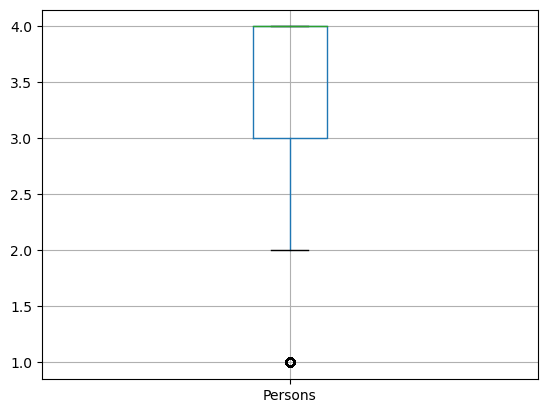

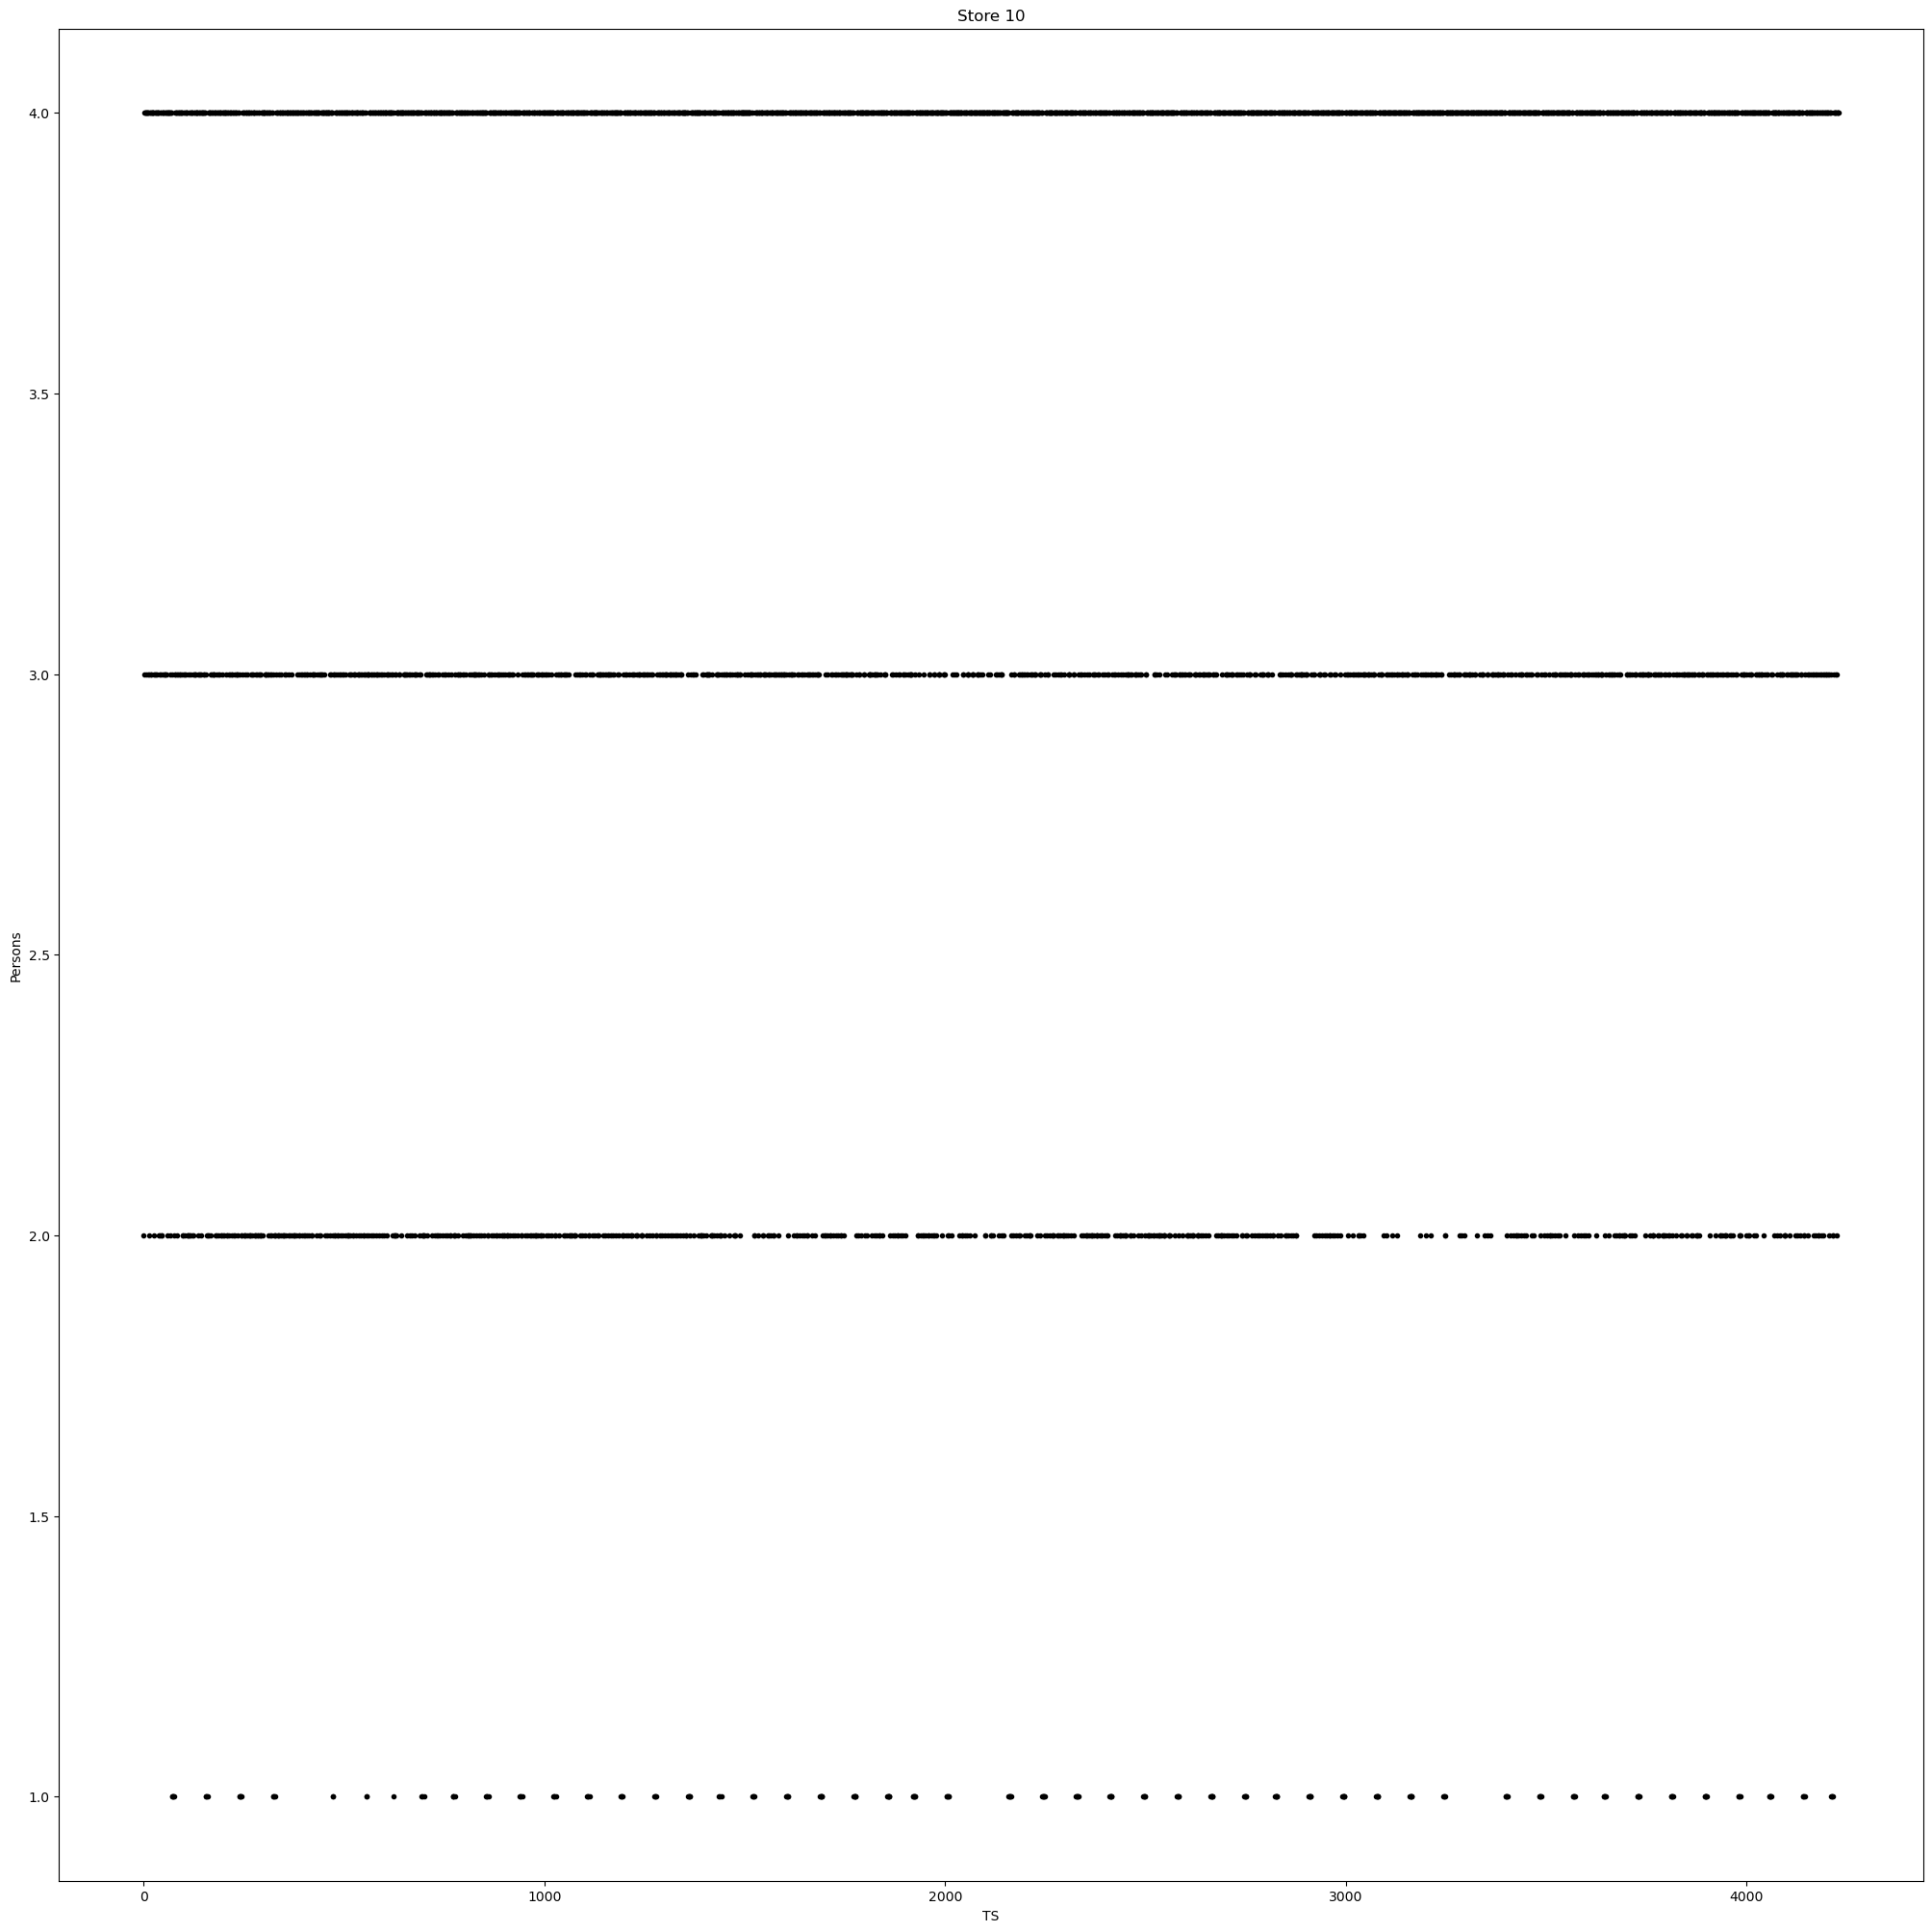

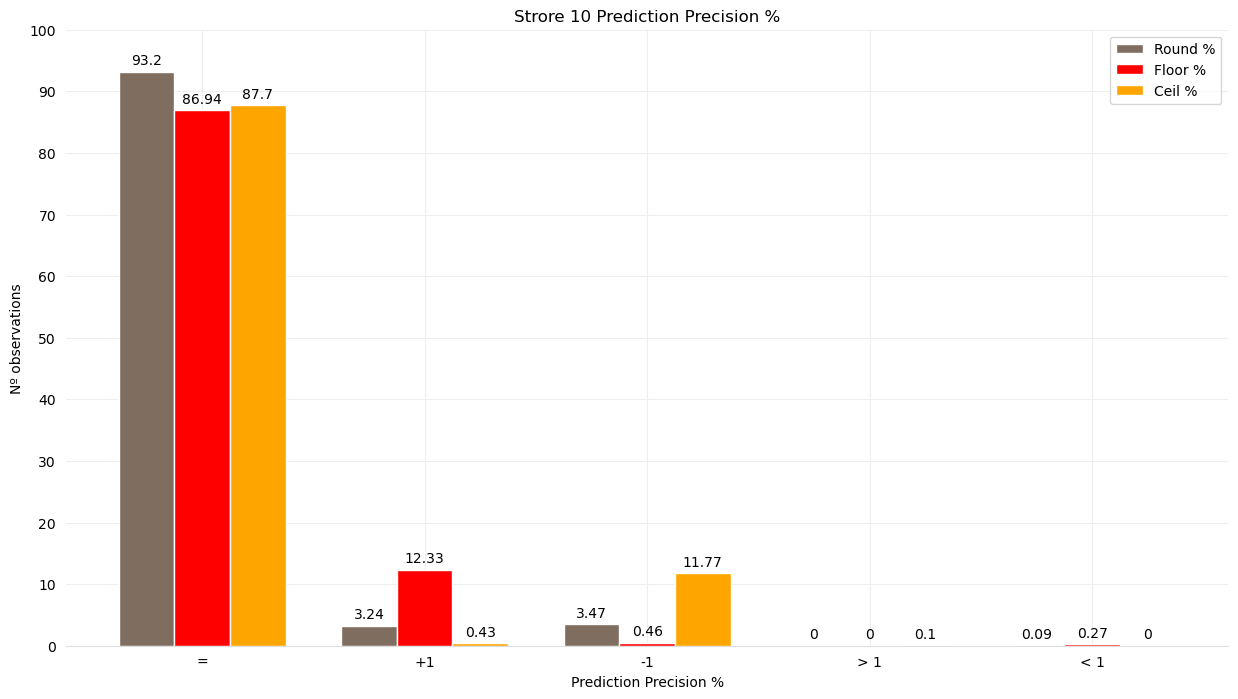

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6523 |        227 |        243 |          0 |          6  
  Floor                |       6085 |        863 |         32 |          0 |         19  
  Ceil                 |       6138 |         30 |        824 |          7 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |       93.2 |       3.24 |       3.47 |        0.0 |       0.09  
  Floor % 

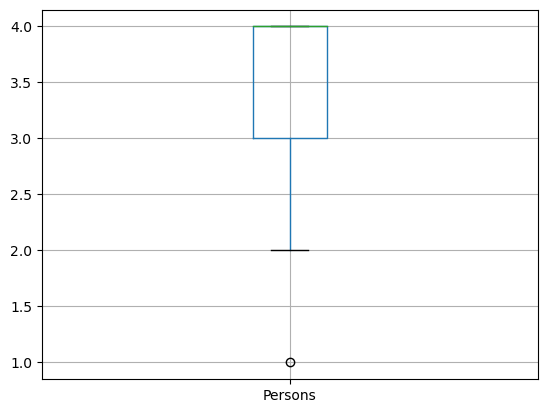

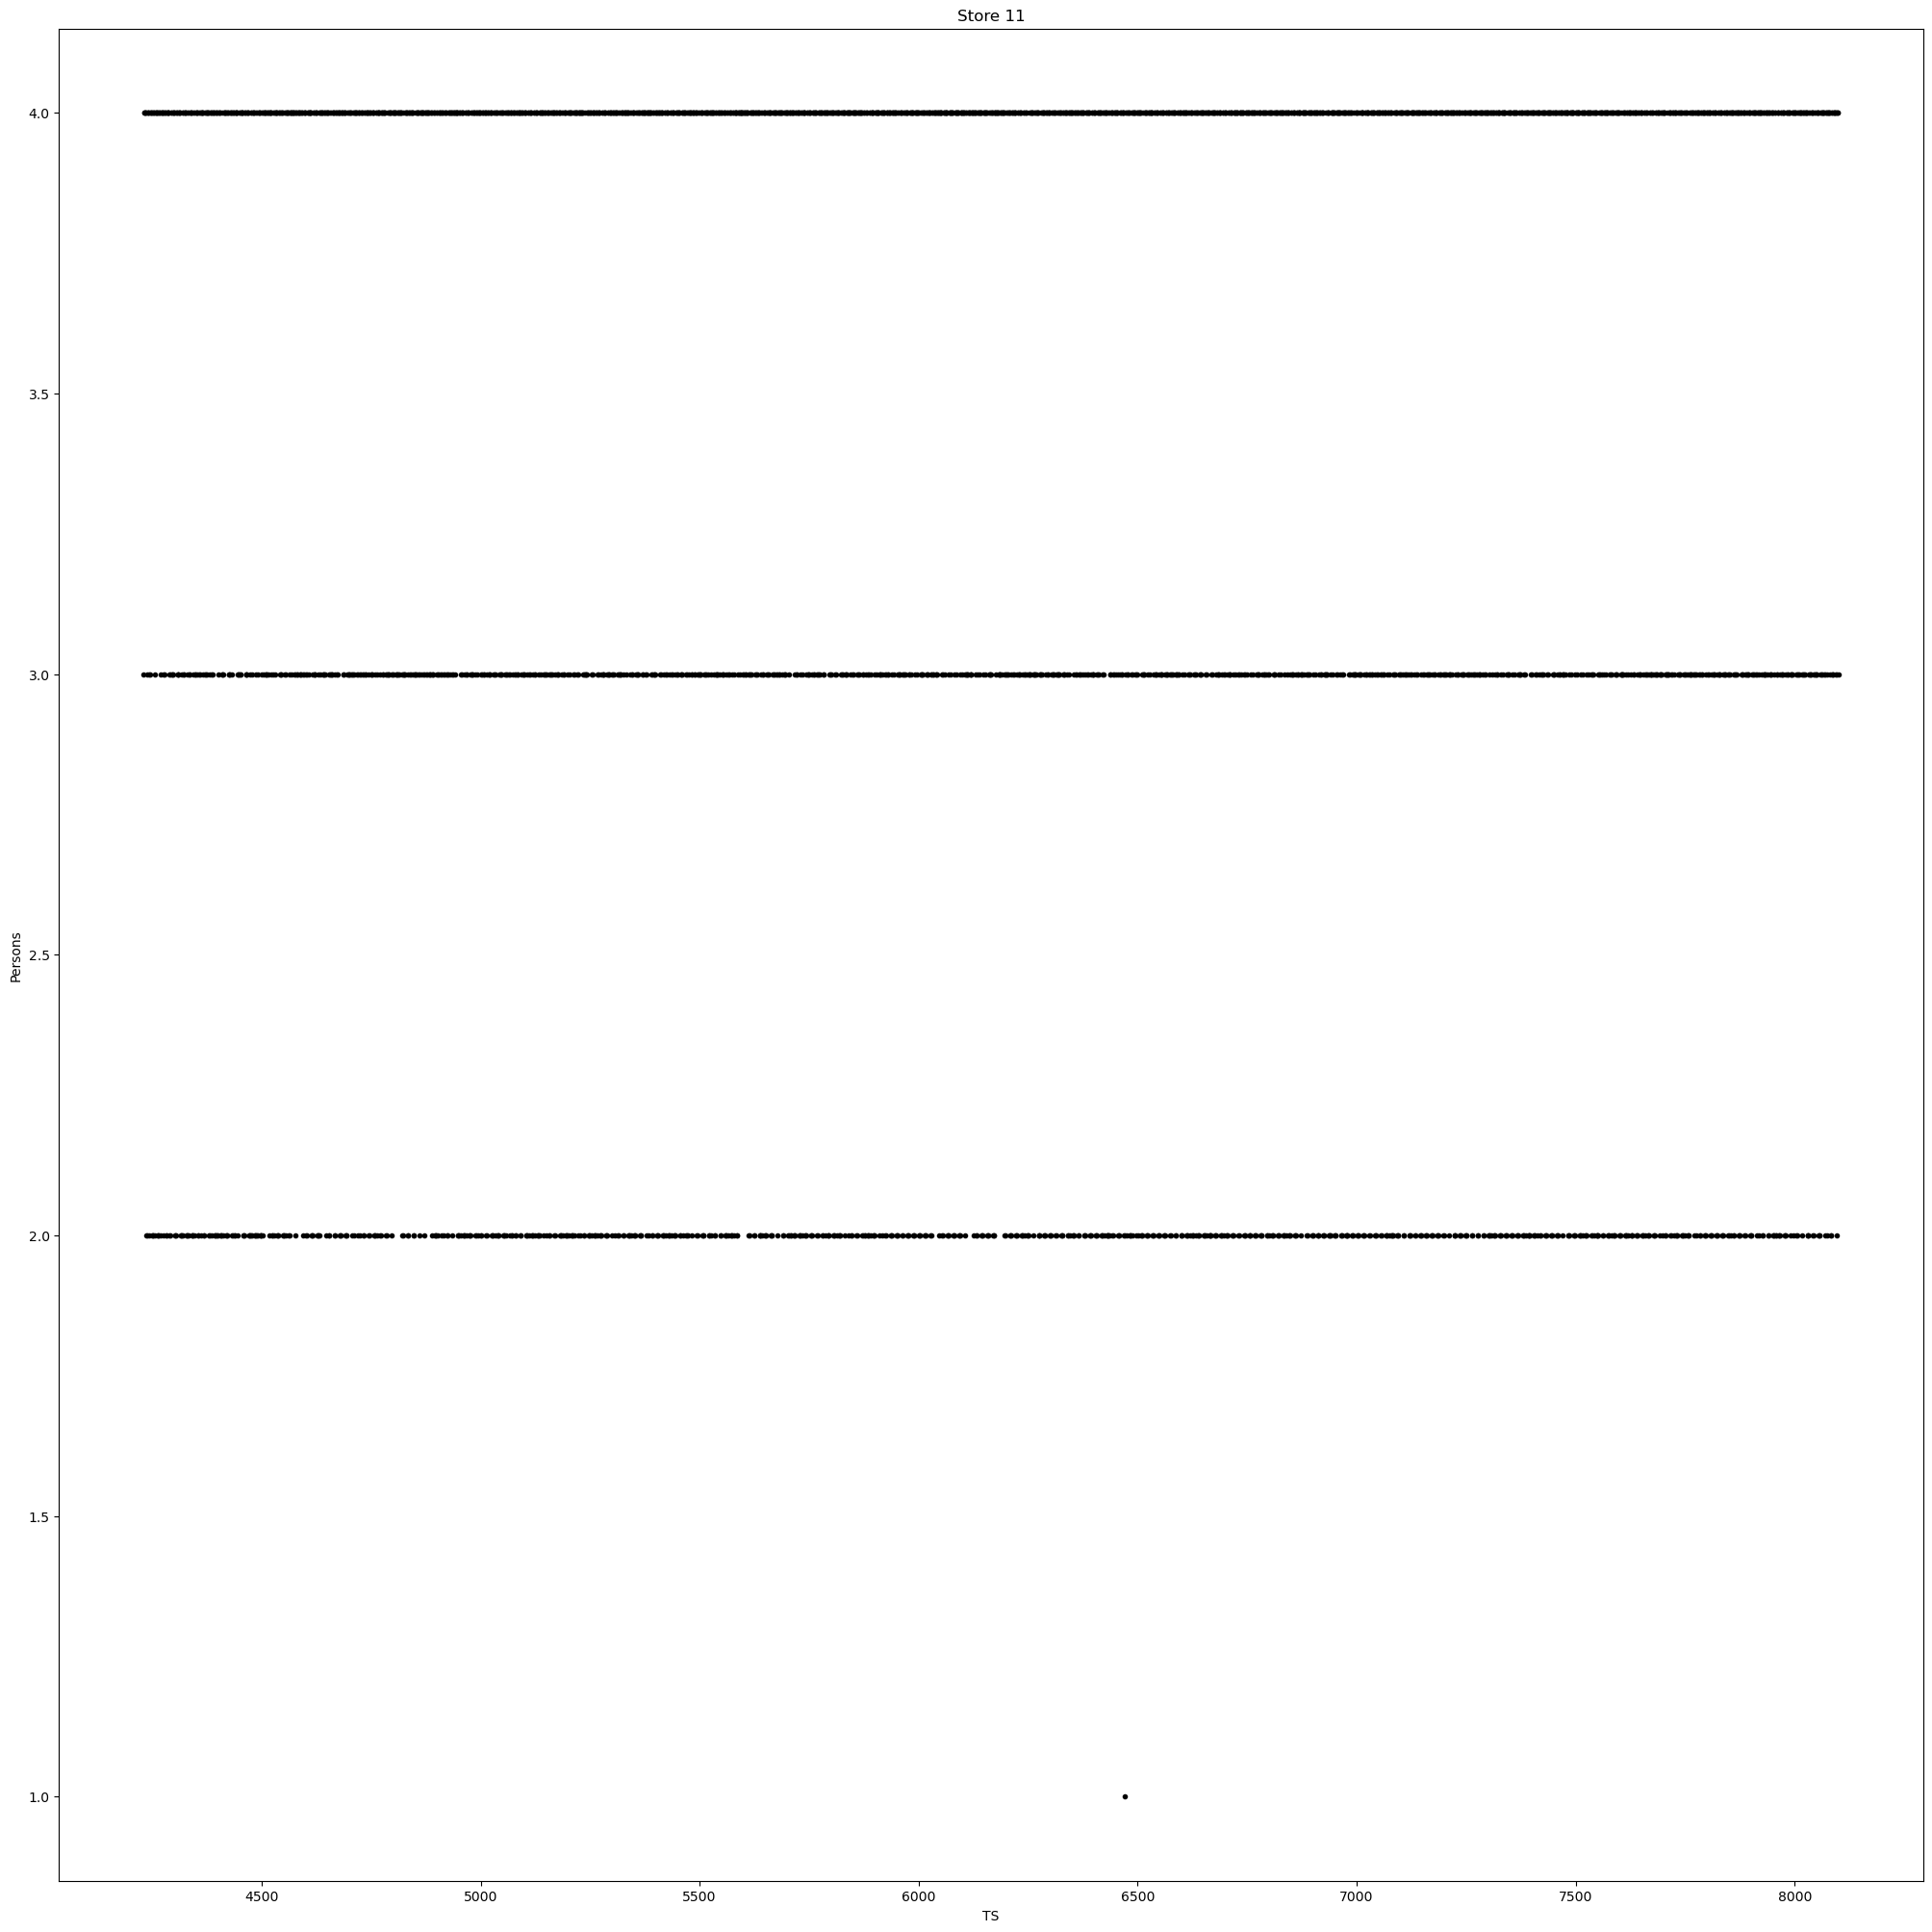

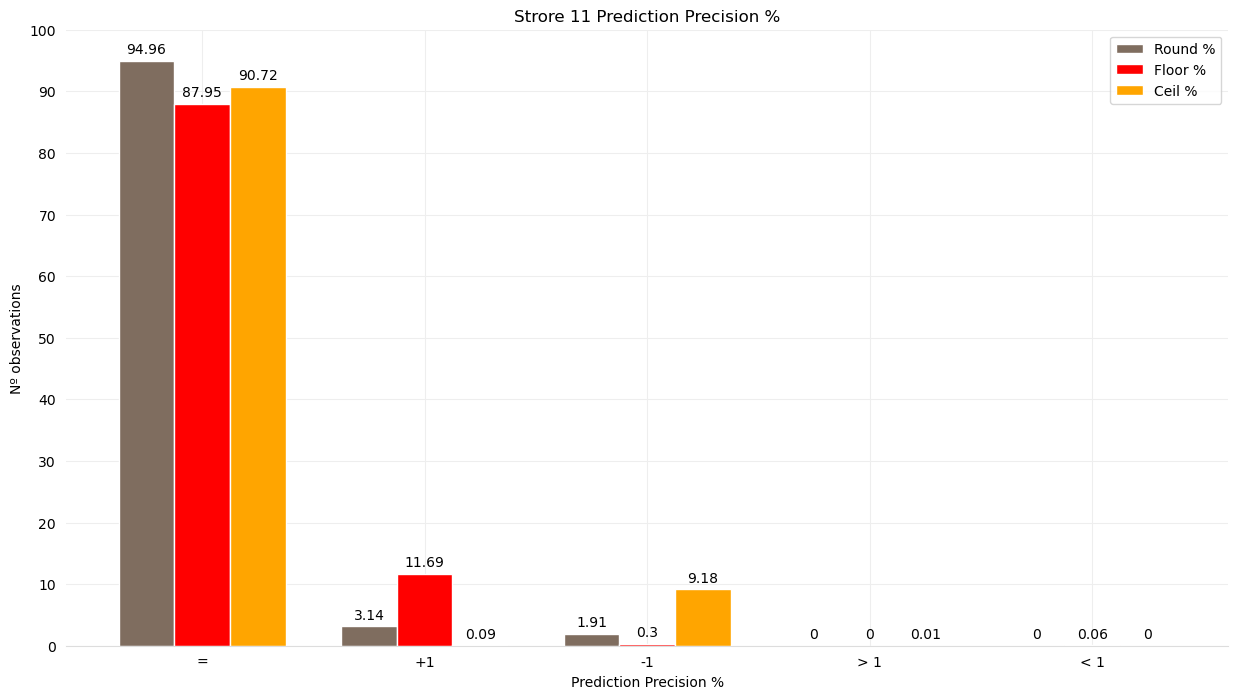

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6628 |        219 |        133 |          0 |          0  
  Floor                |       6139 |        816 |         21 |          0 |          4  
  Ceil                 |       6332 |          6 |        641 |          1 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.96 |       3.14 |       1.91 |        0.0 |        0.0  
  Floor % 

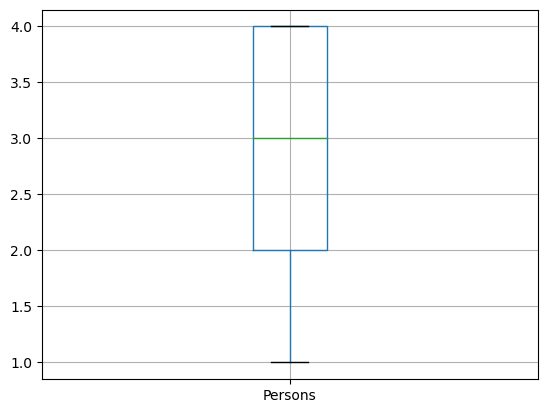

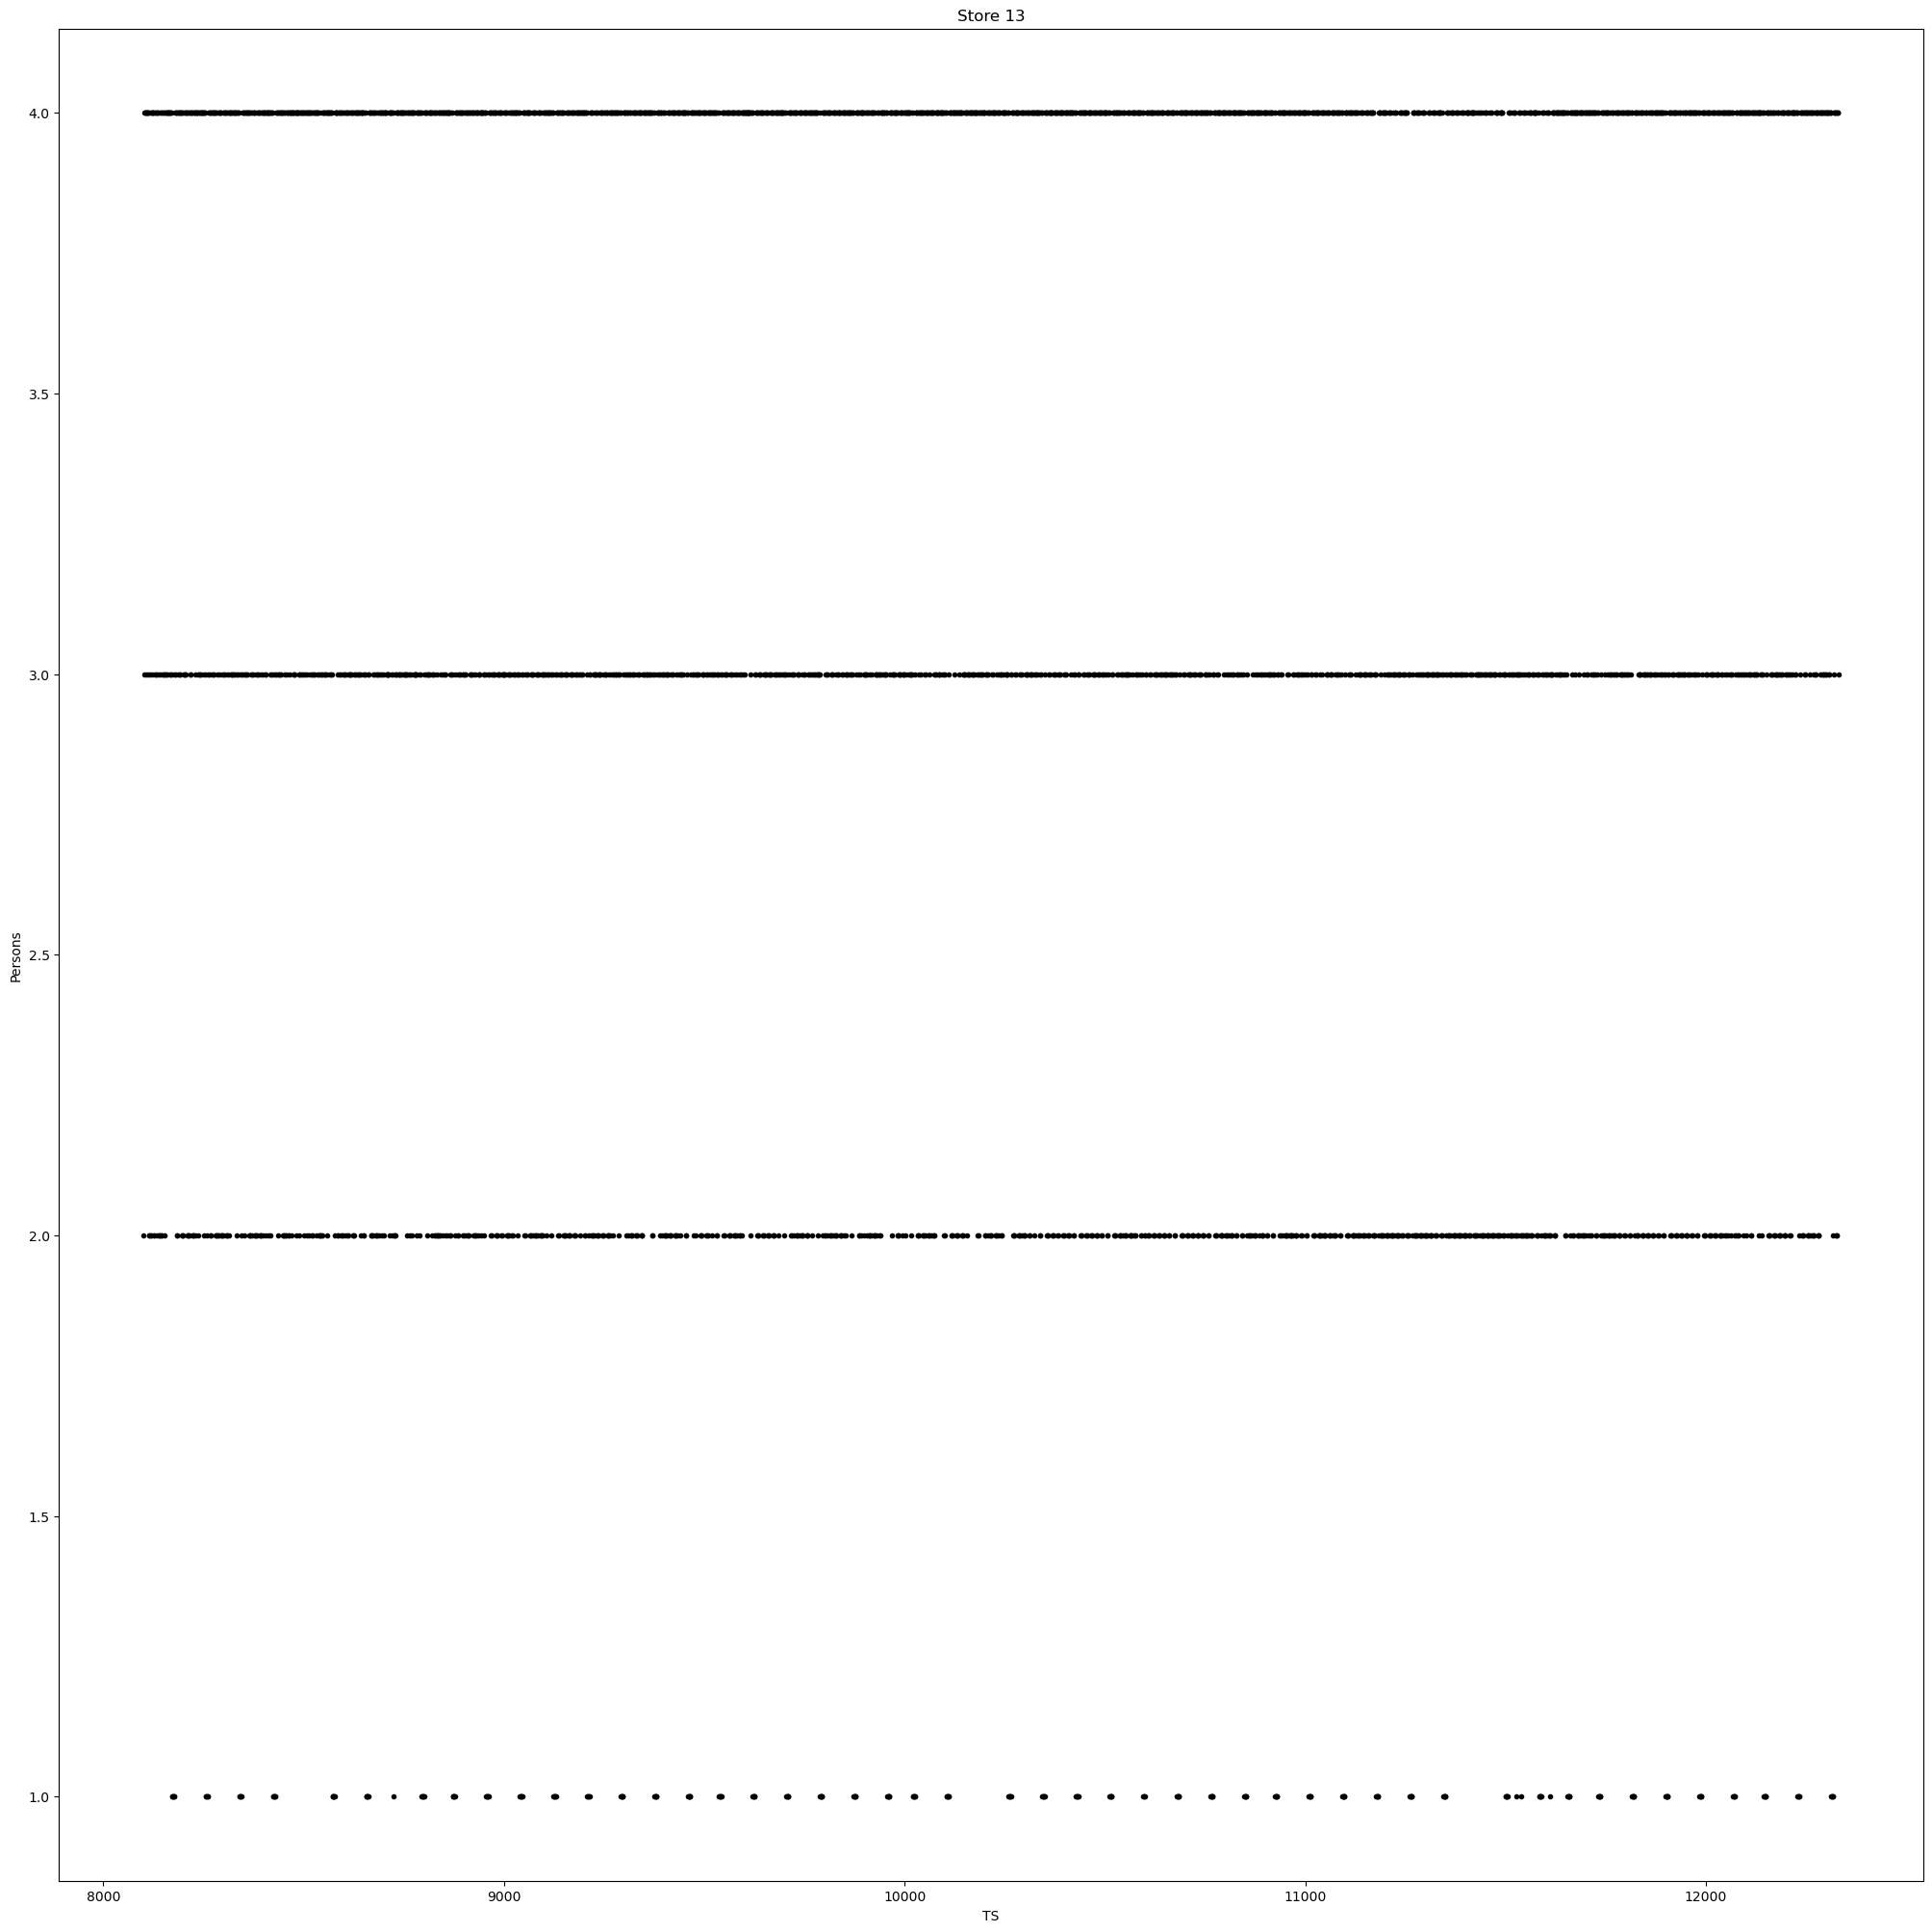

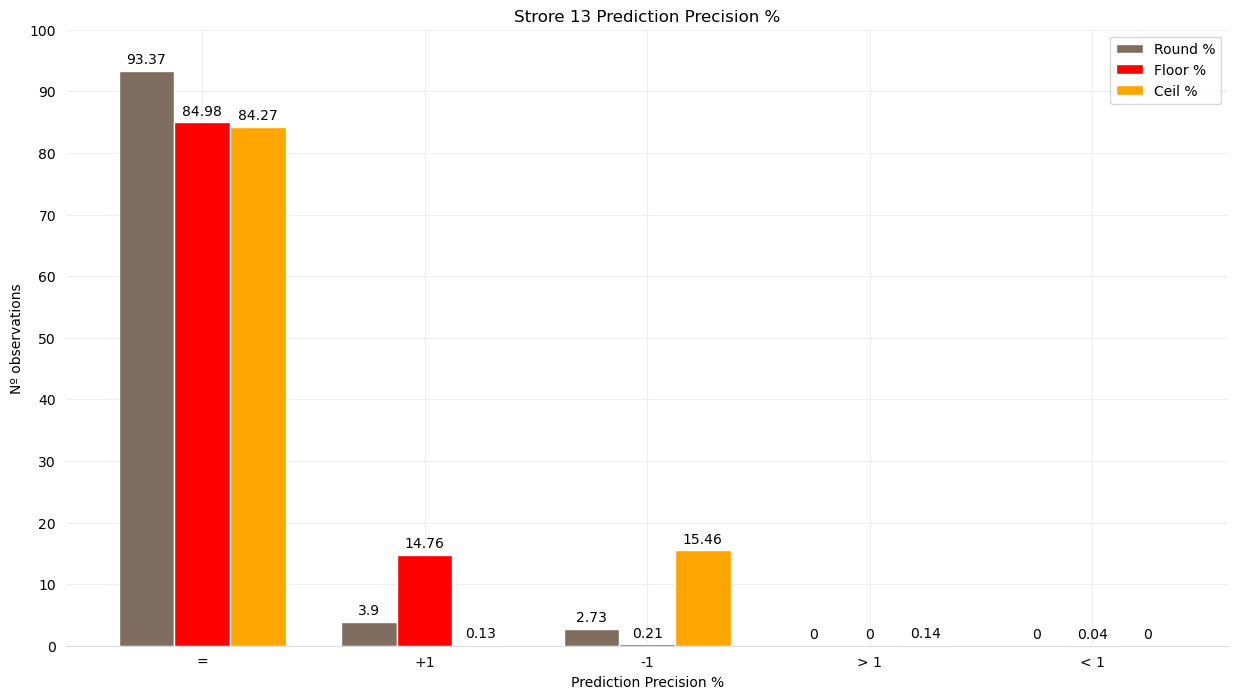

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6535 |        273 |        191 |          0 |          0  
  Floor                |       5948 |       1033 |         15 |          0 |          3  
  Ceil                 |       5898 |          9 |       1082 |         10 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.37 |        3.9 |       2.73 |        0.0 |        0.0  
  Floor % 

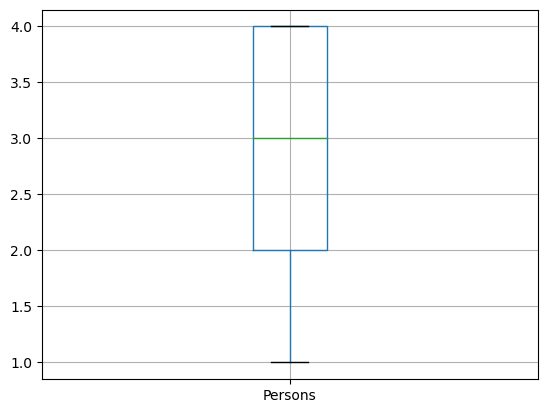

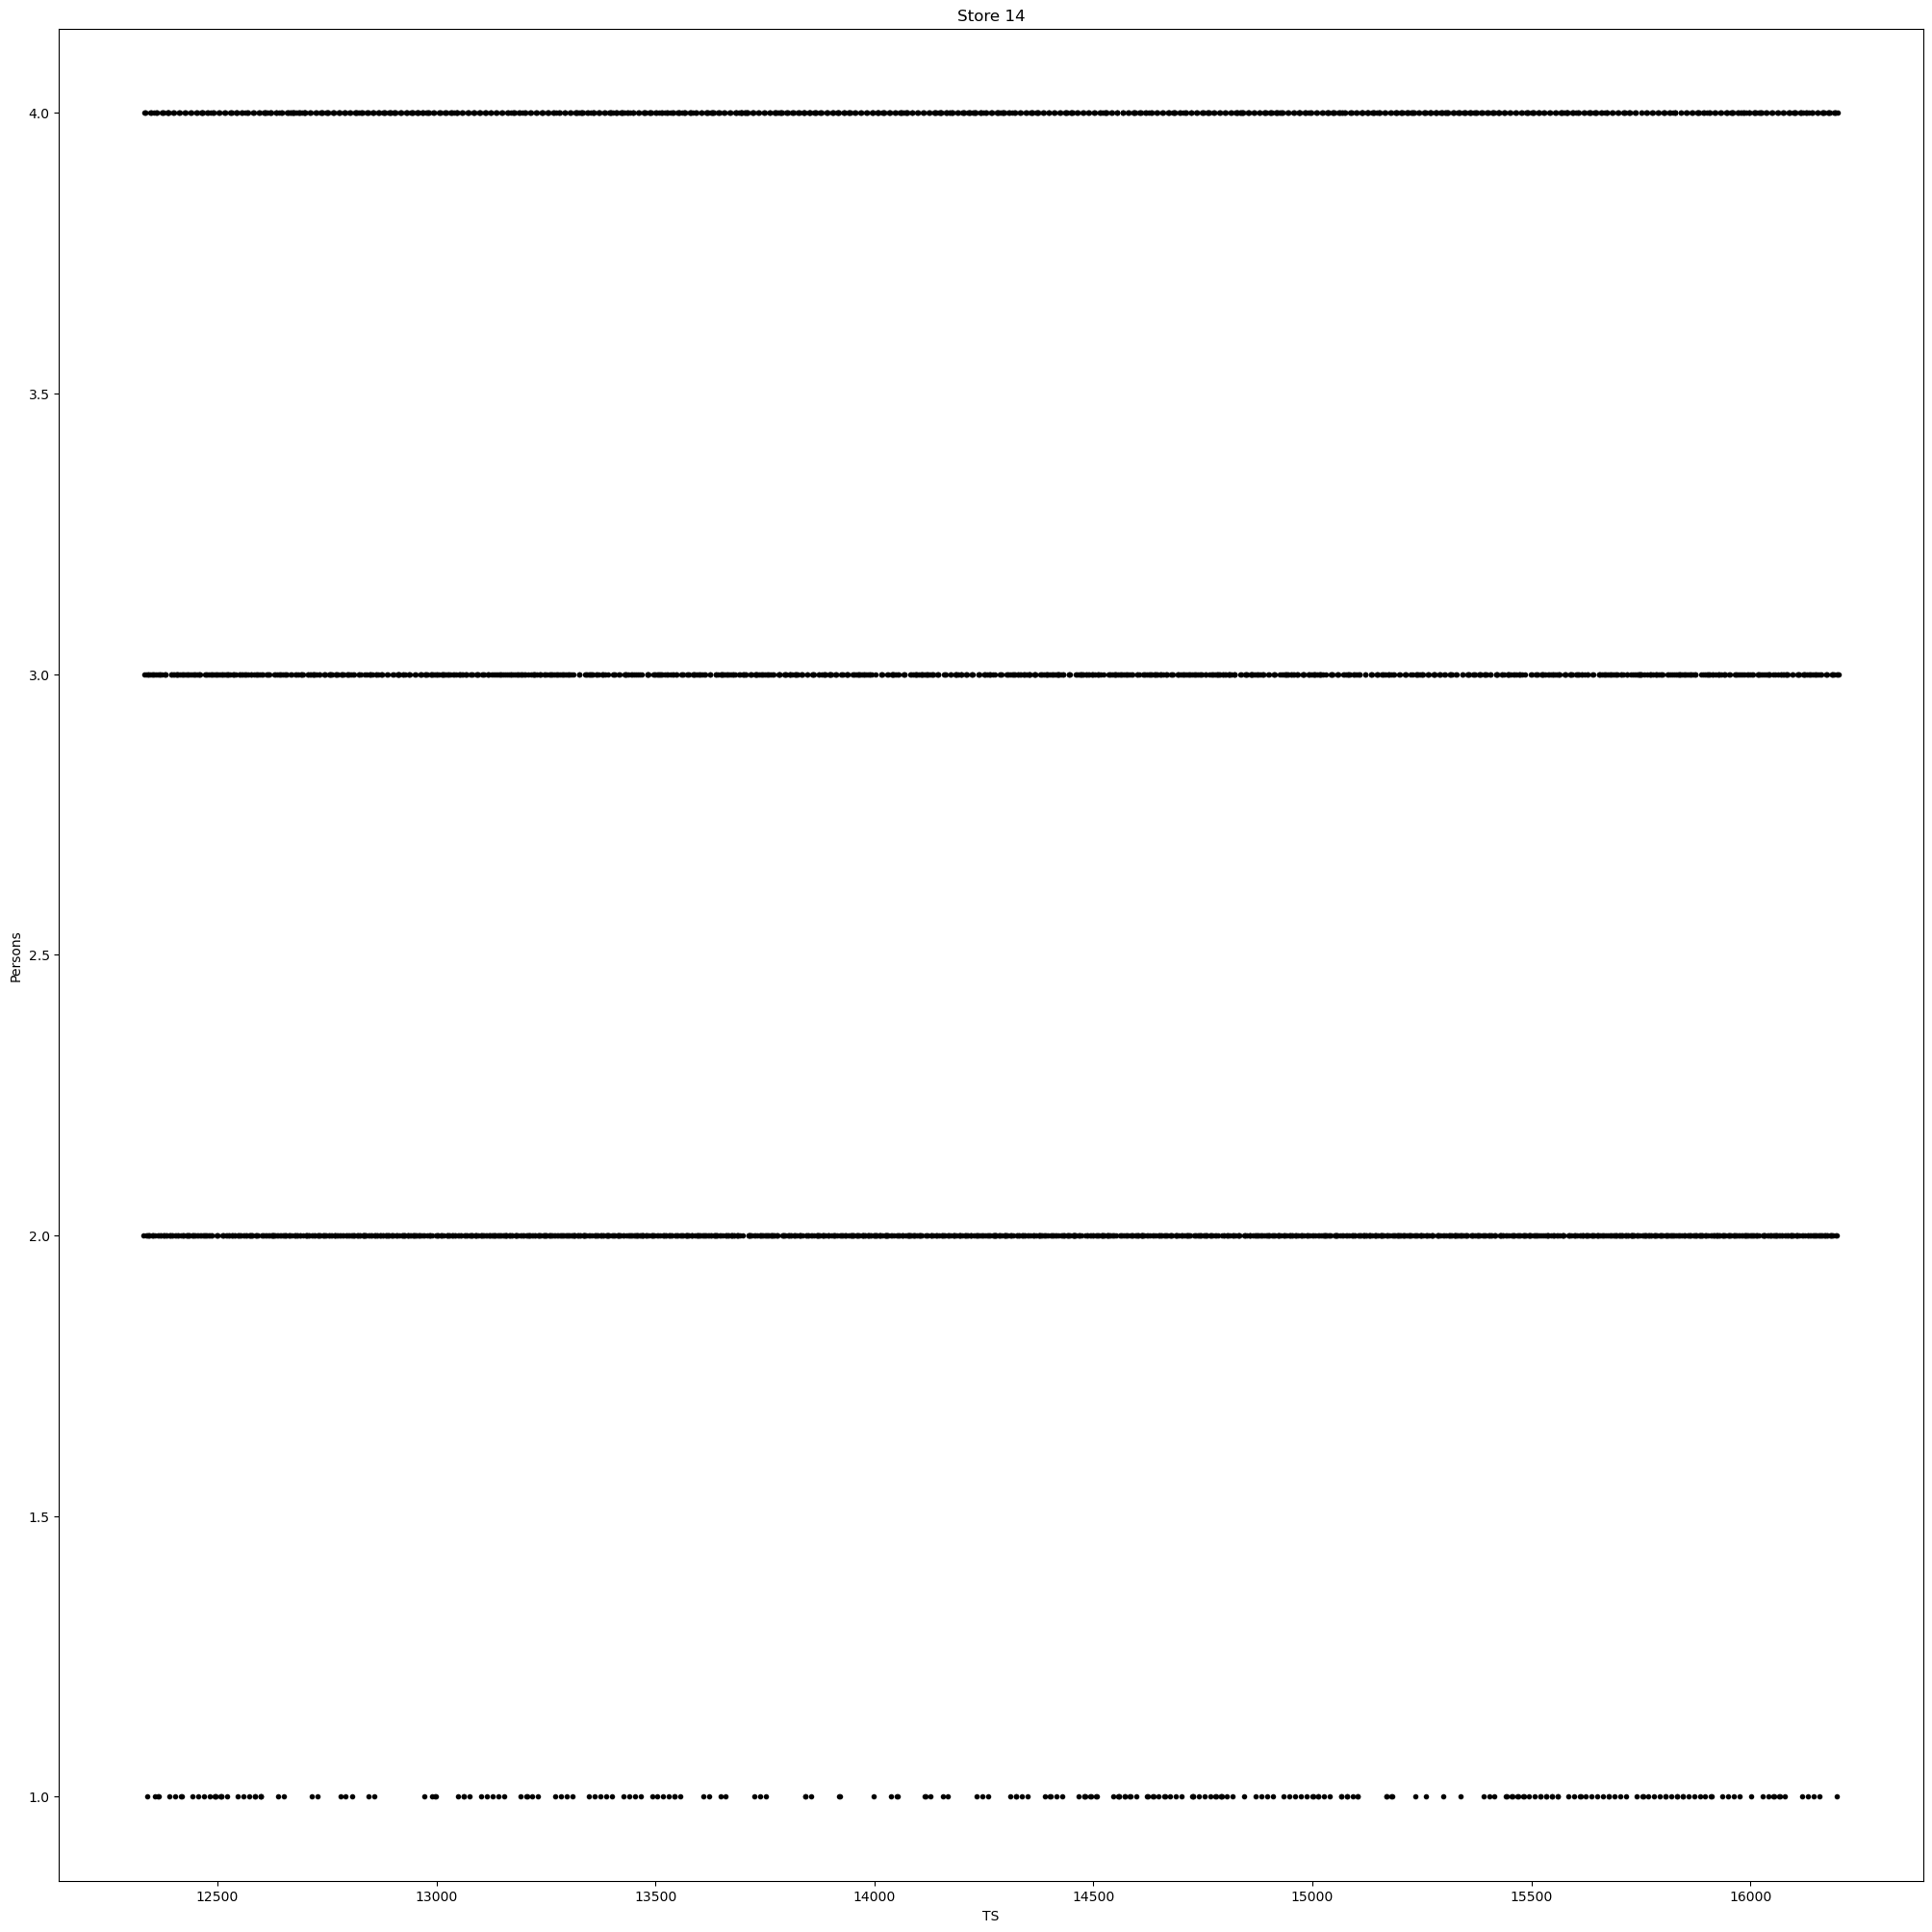

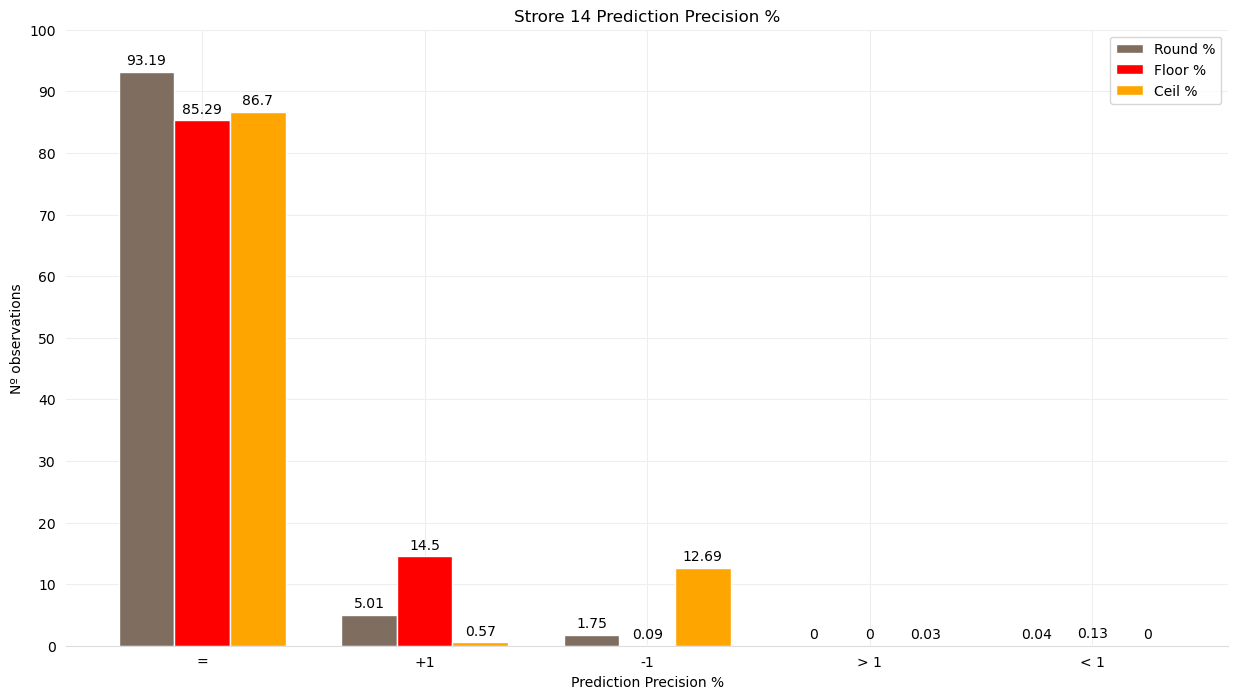

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6505 |        350 |        122 |          0 |          3  
  Floor                |       5953 |       1012 |          6 |          0 |          9  
  Ceil                 |       6052 |         40 |        886 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.19 |       5.01 |       1.75 |        0.0 |       0.04  
  Floor % 

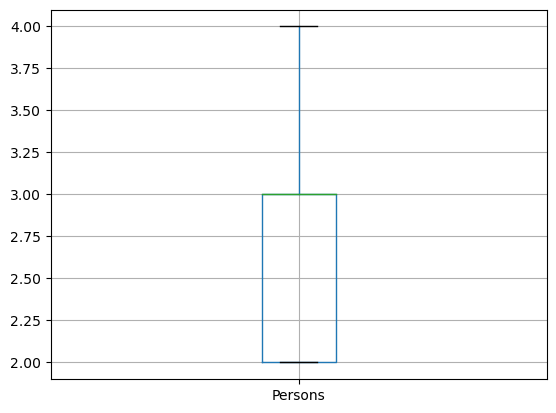

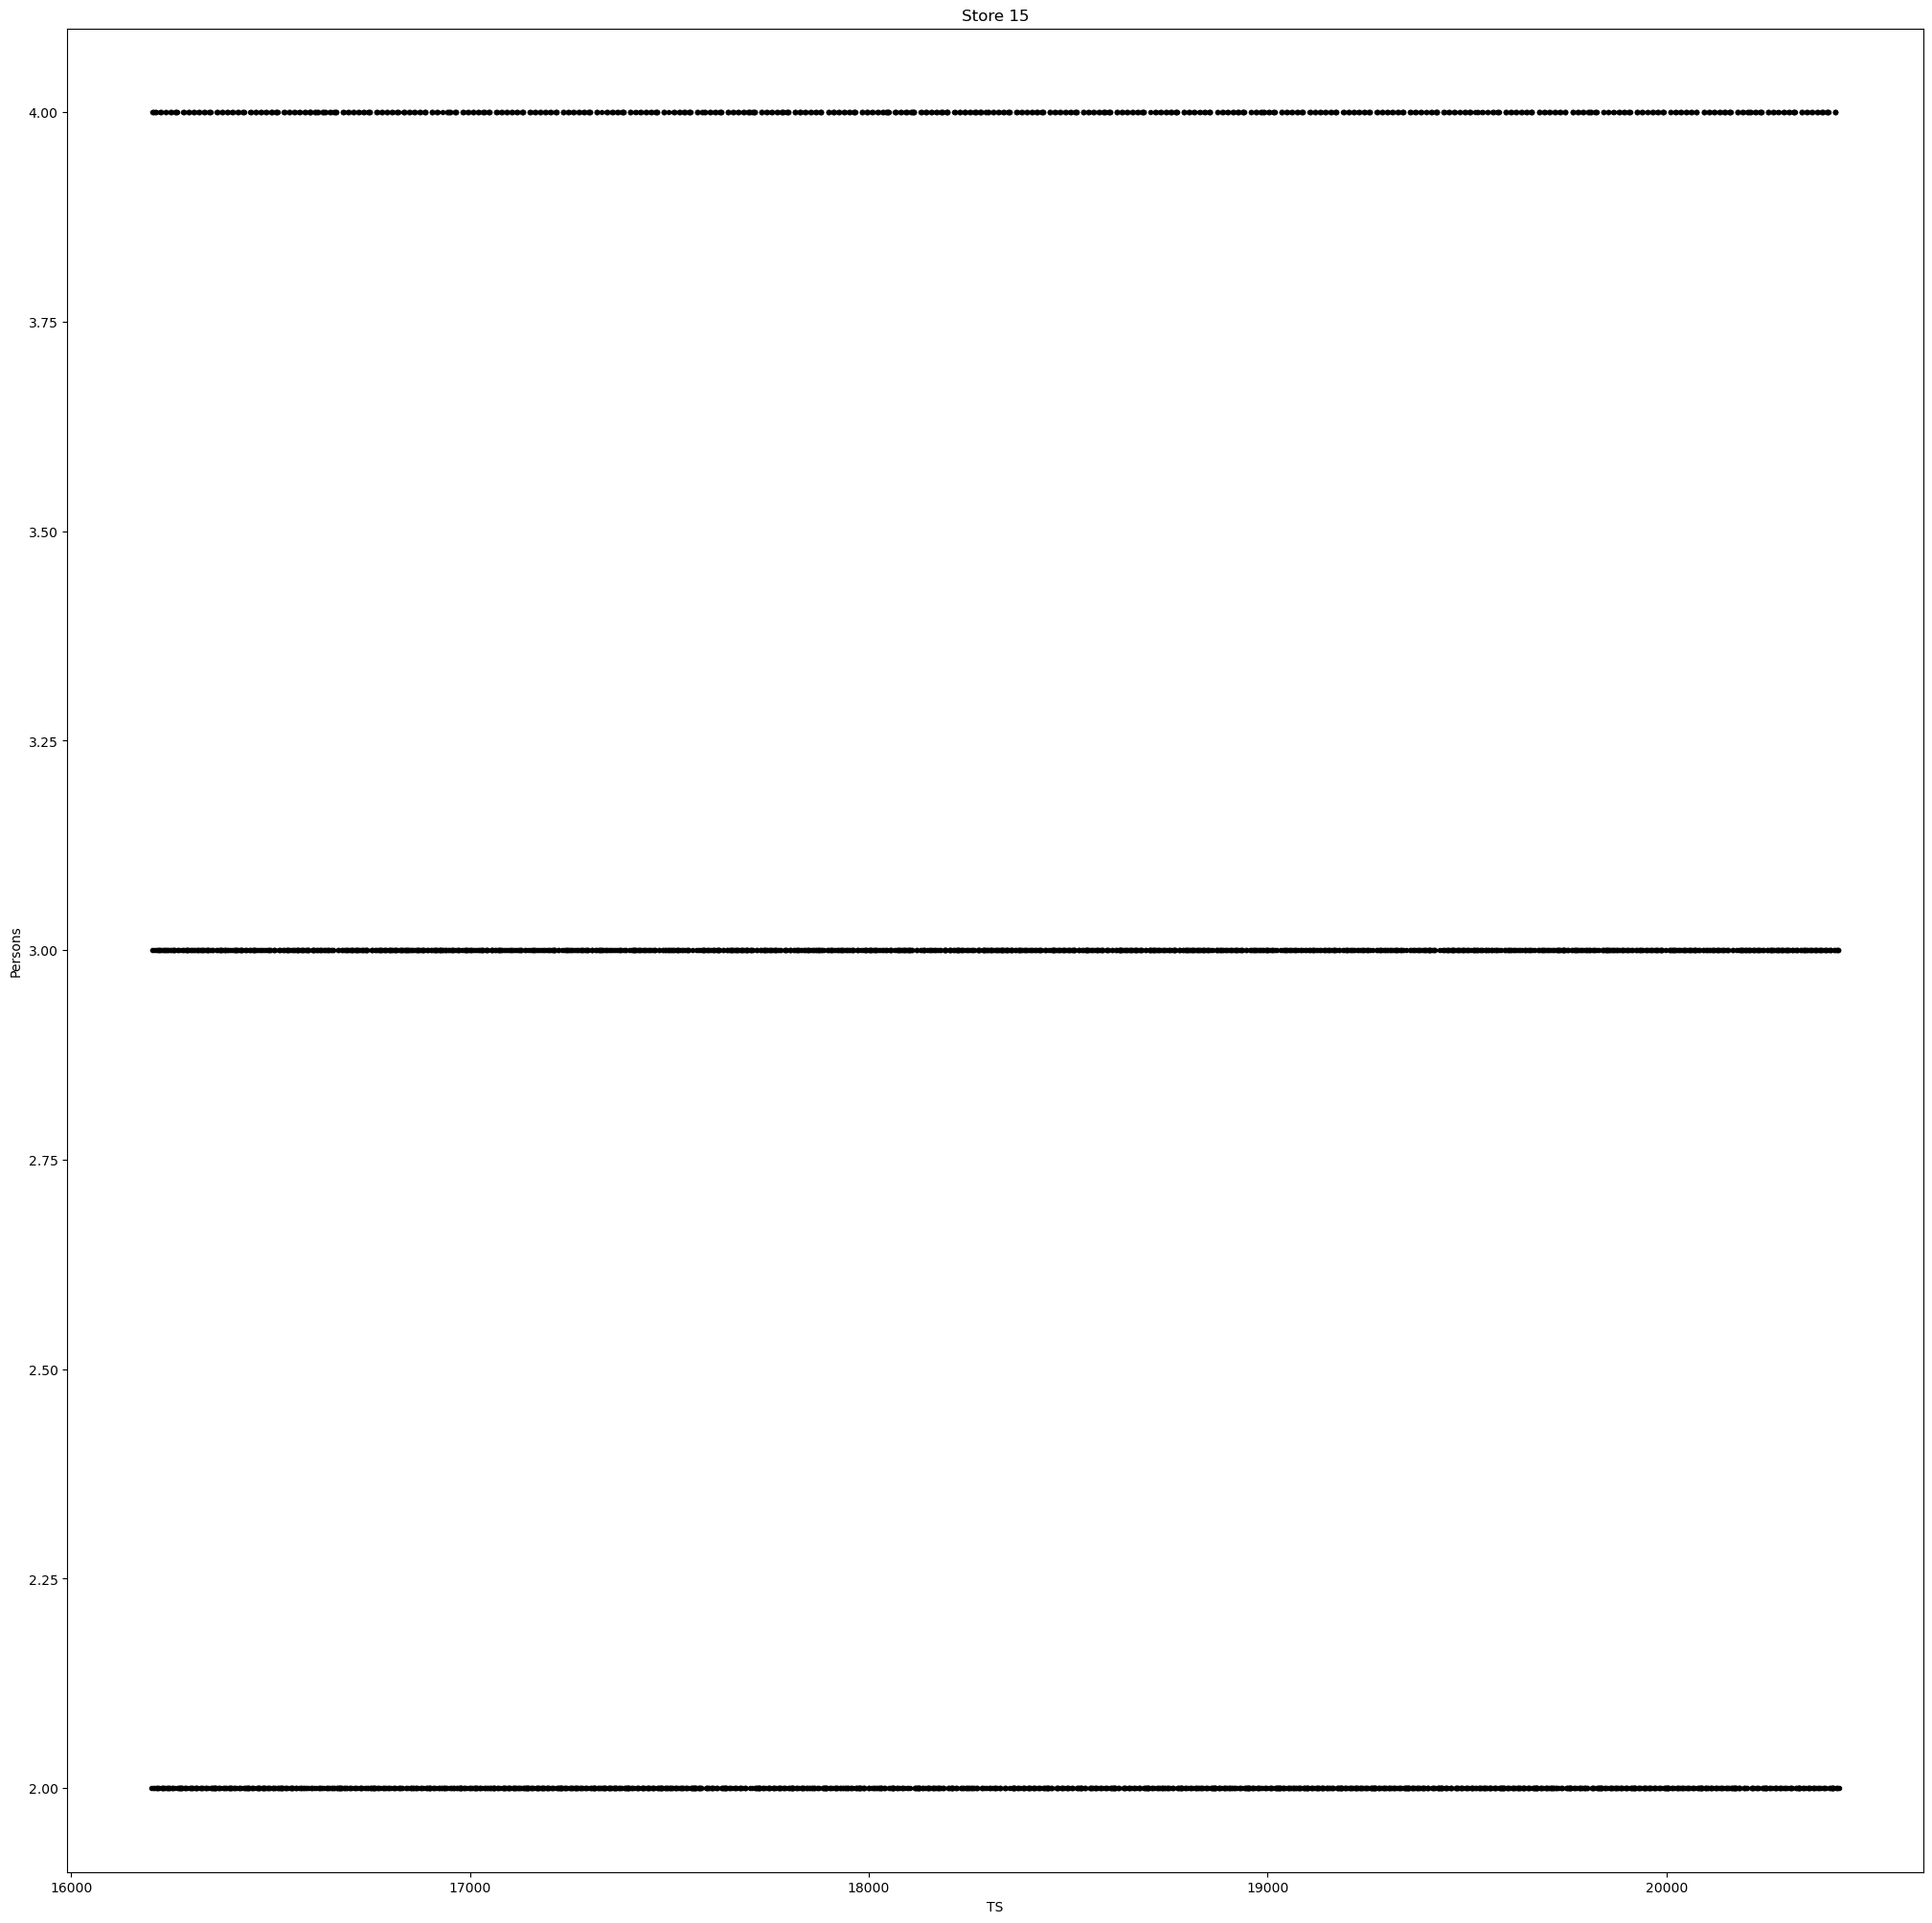

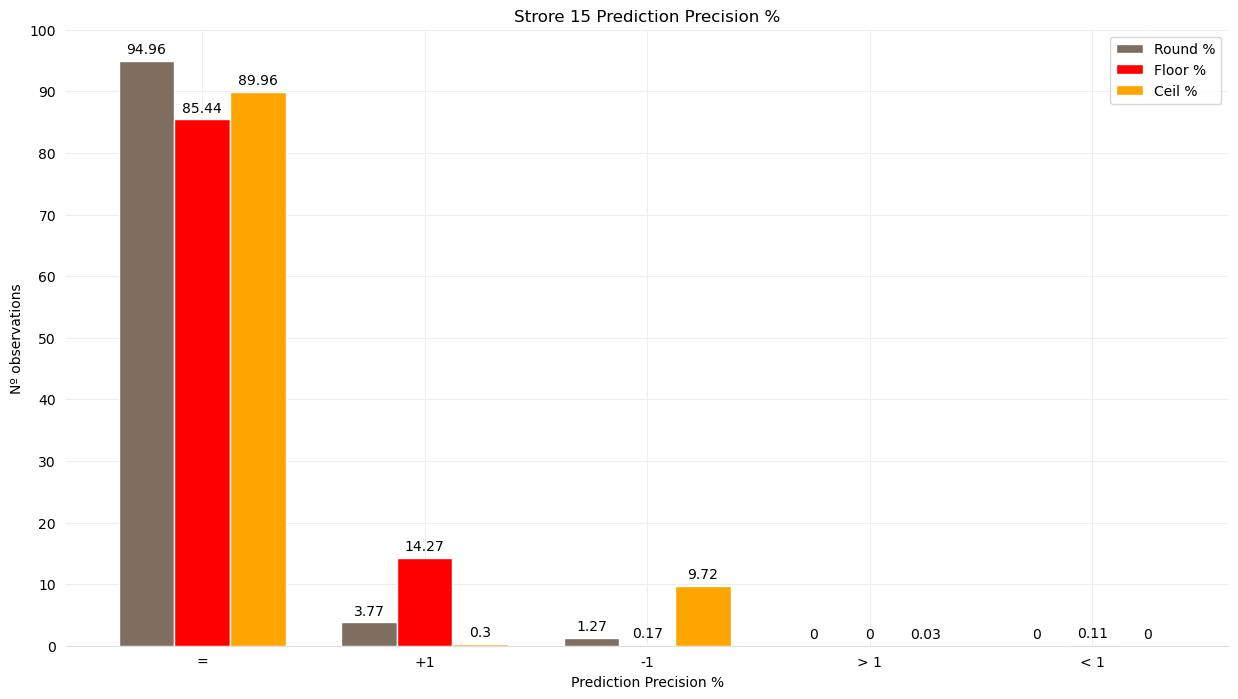

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6646 |        264 |         89 |          0 |          0  
  Floor                |       5980 |        999 |         12 |          0 |          8  
  Ceil                 |       6296 |         21 |        680 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.96 |       3.77 |       1.27 |        0.0 |        0.0  
  Floor % 

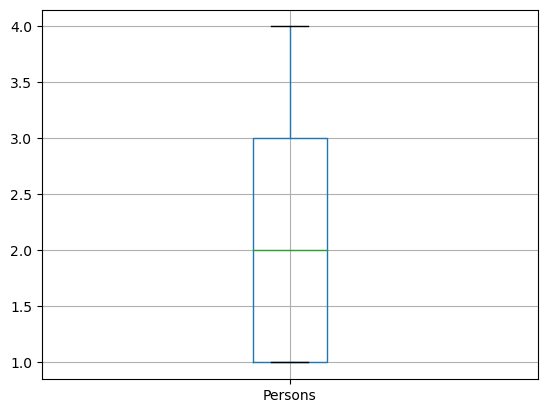

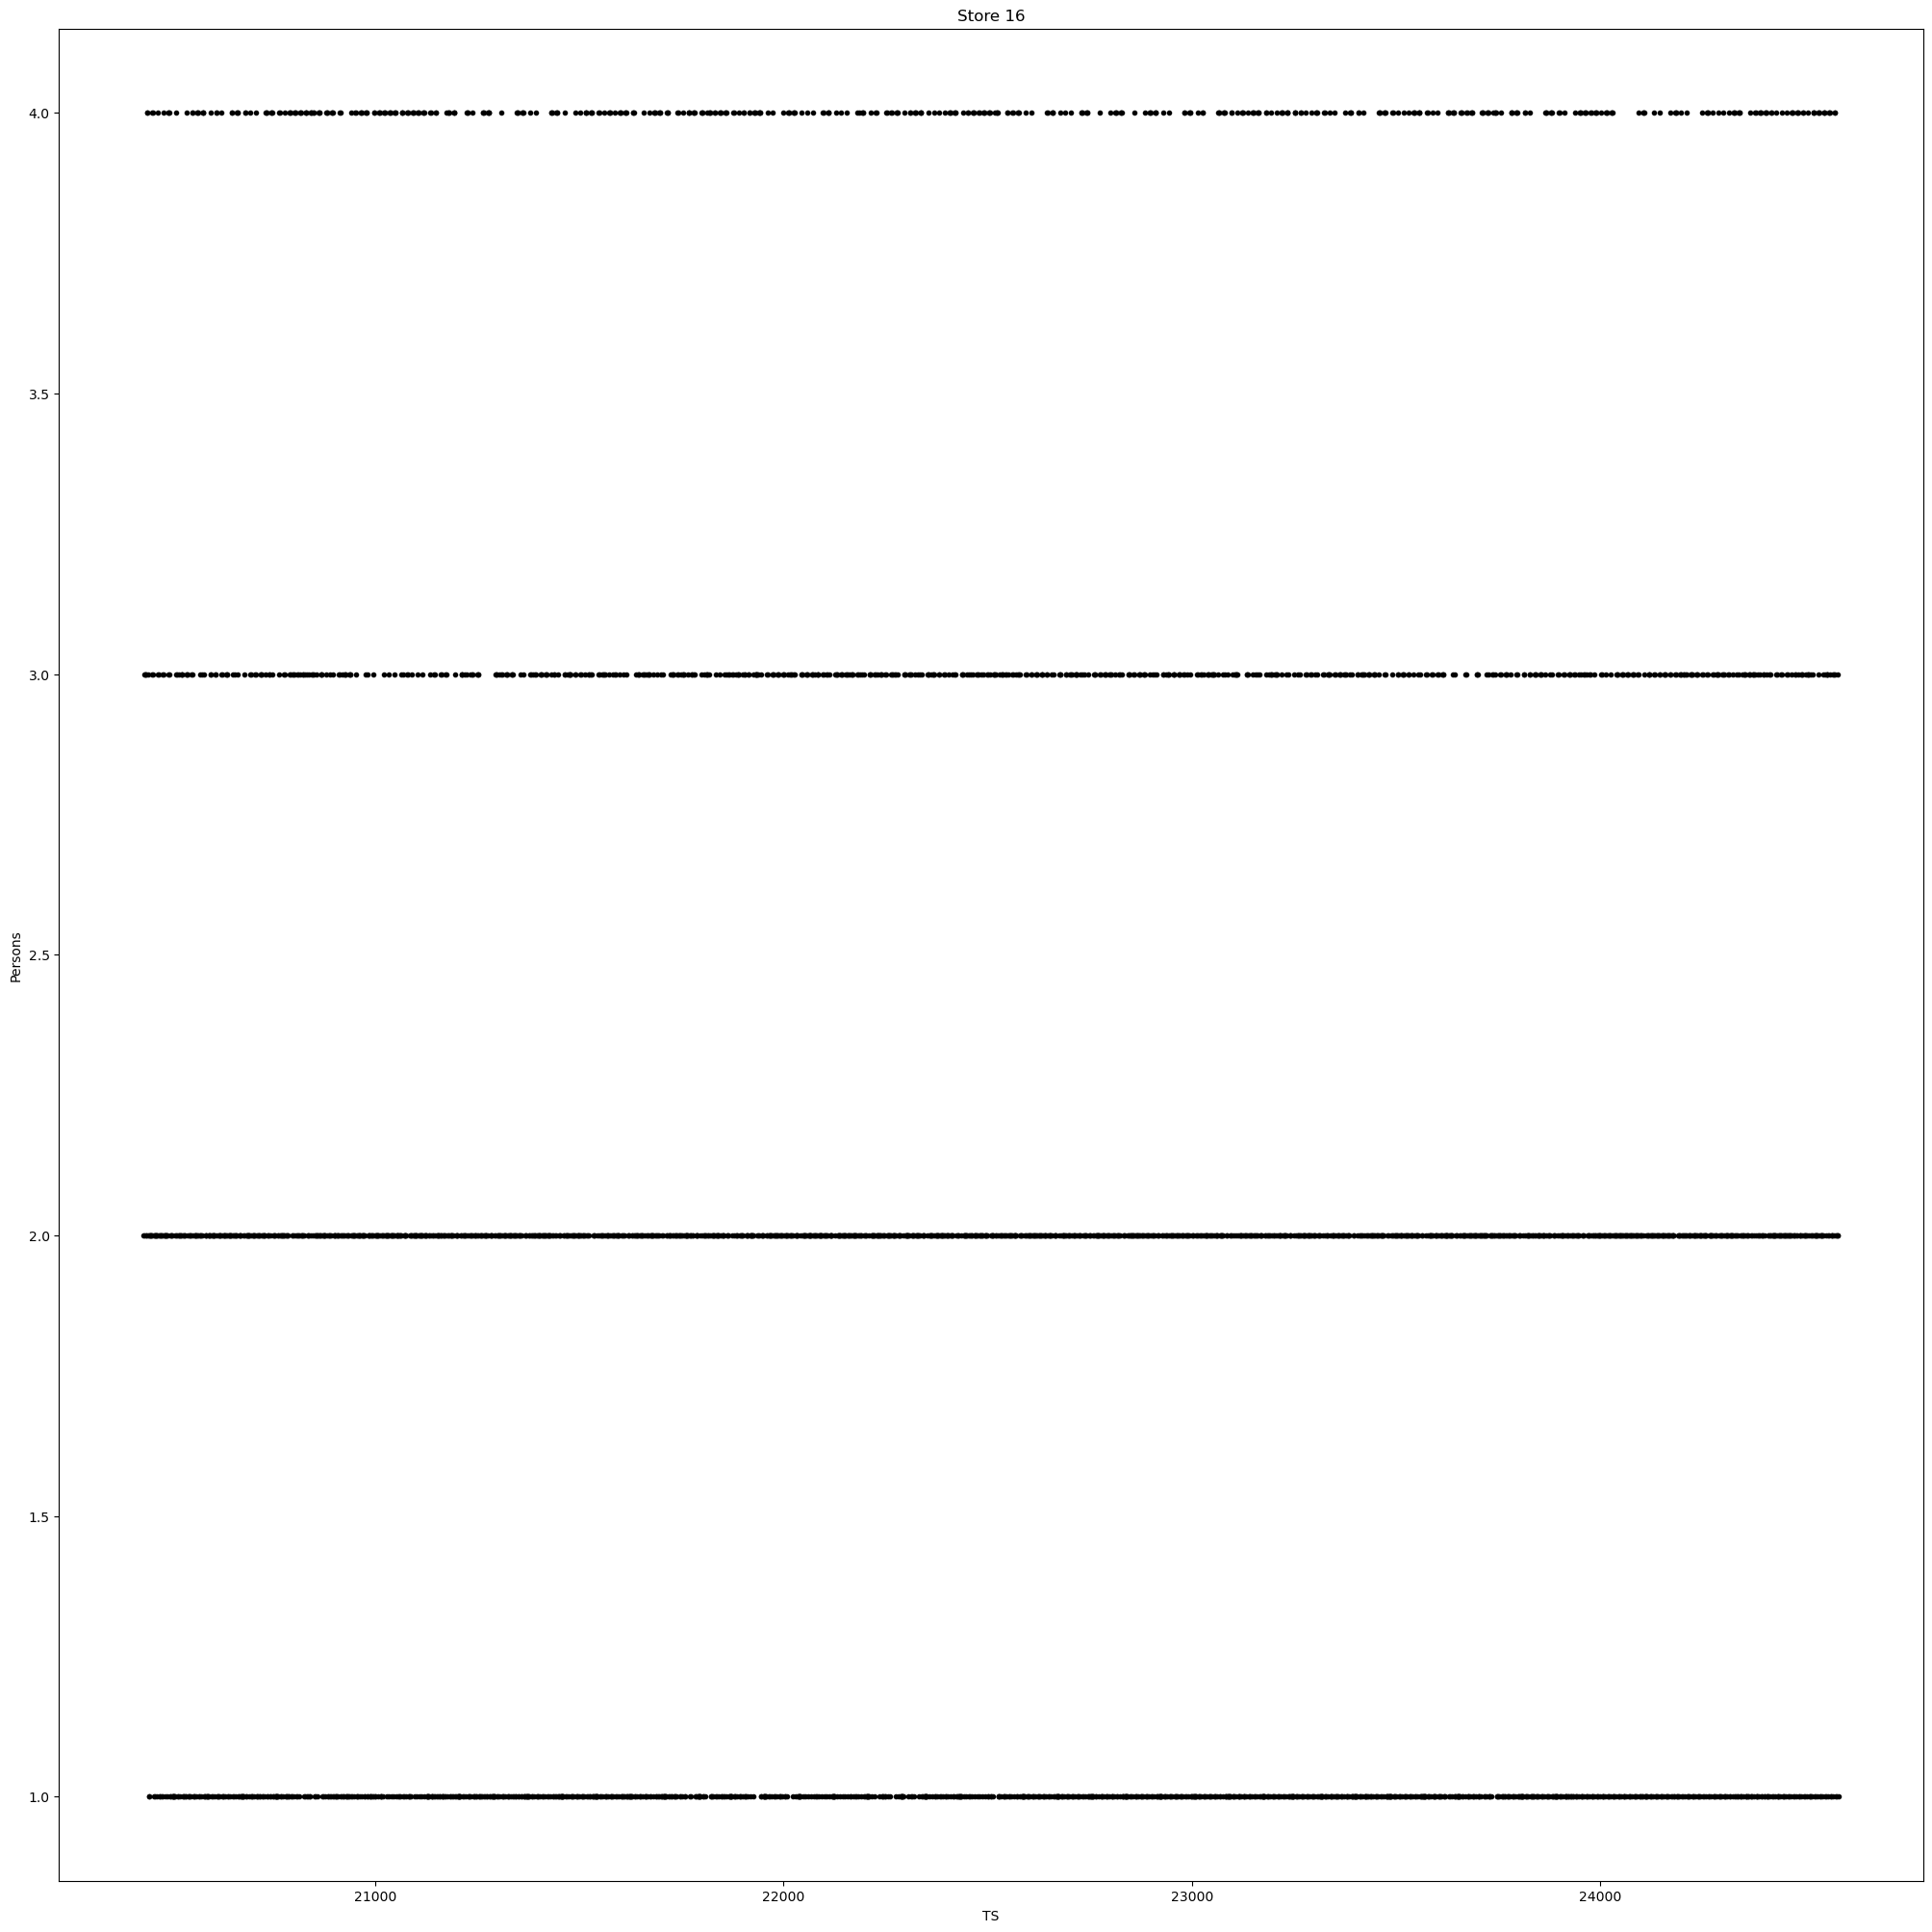

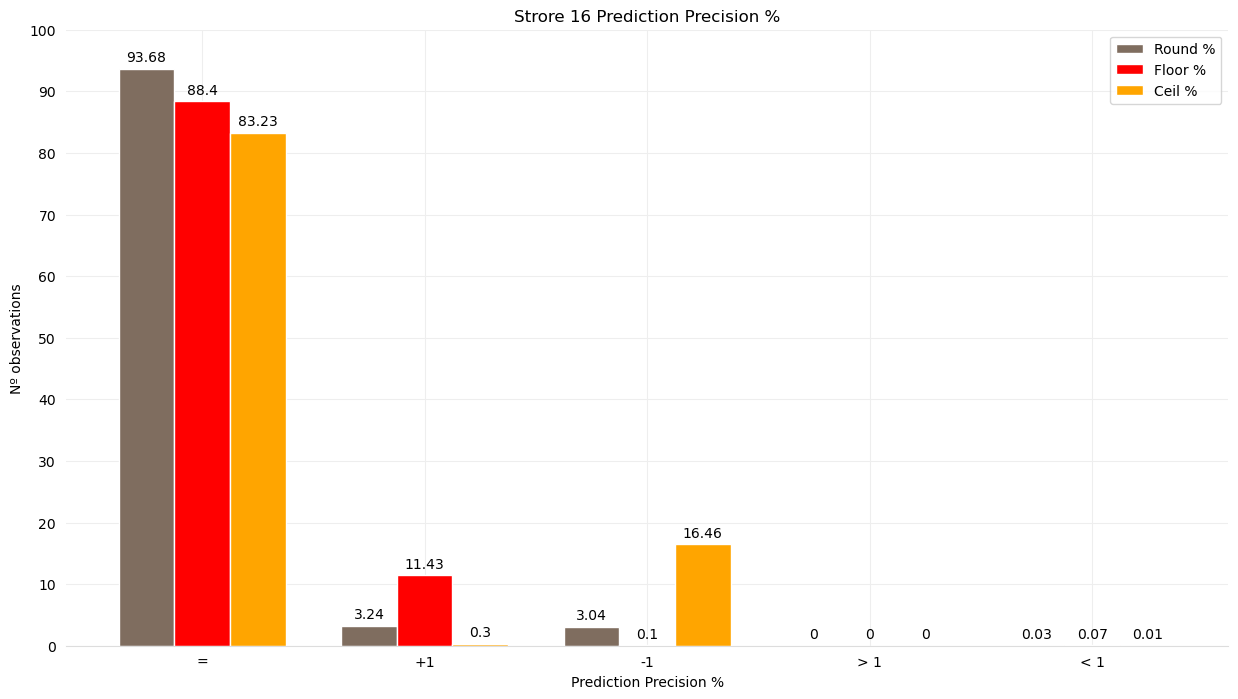

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6557 |        227 |        213 |          0 |          2  
  Floor                |       6187 |        800 |          7 |          0 |          5  
  Ceil                 |       5825 |         21 |       1152 |          0 |          1  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.68 |       3.24 |       3.04 |        0.0 |       0.03  
  Floor % 

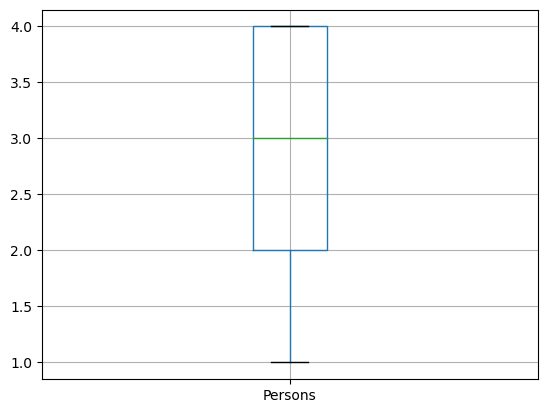

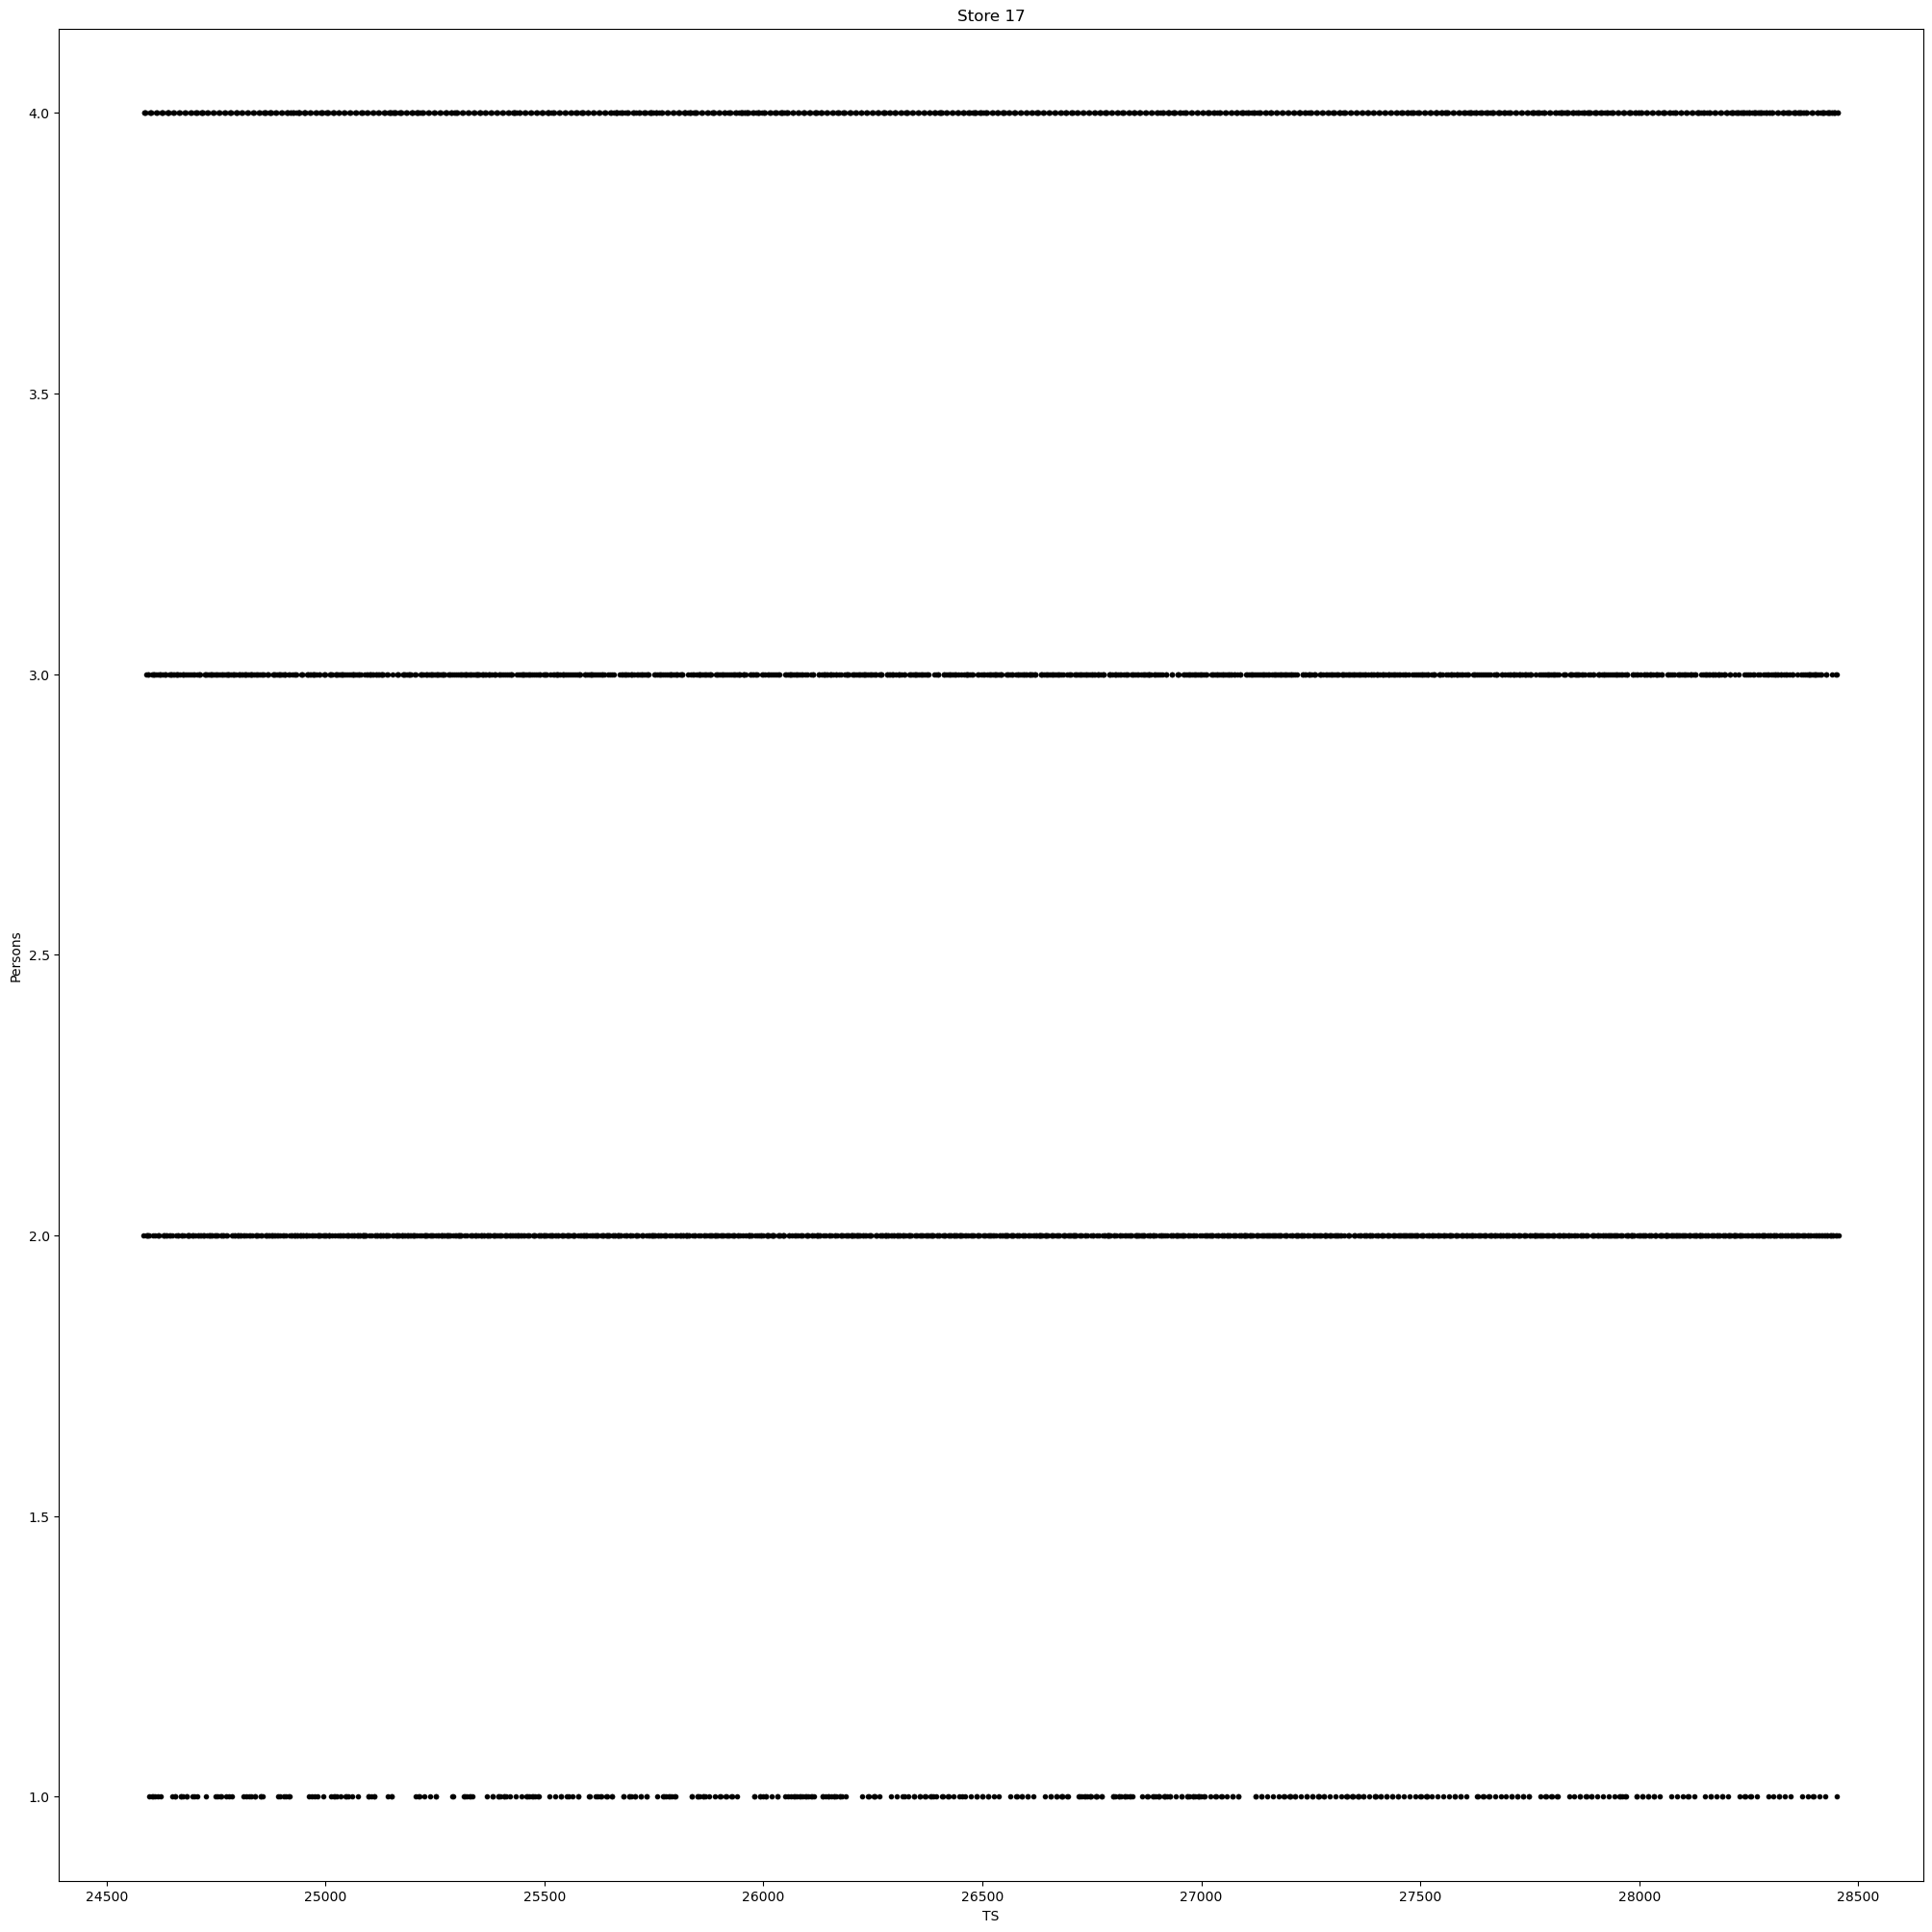

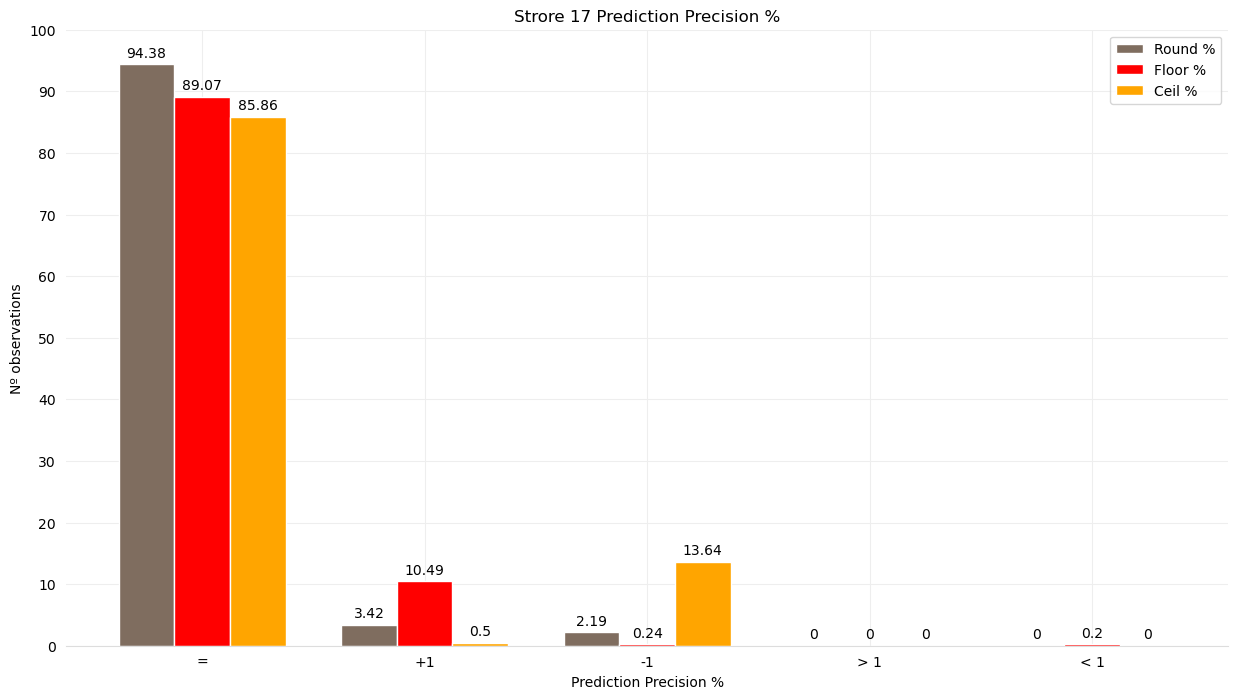

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6588 |        239 |        153 |          0 |          0  
  Floor                |       6217 |        732 |         17 |          0 |         14  
  Ceil                 |       5993 |         35 |        952 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.38 |       3.42 |       2.19 |        0.0 |        0.0  
  Floor % 

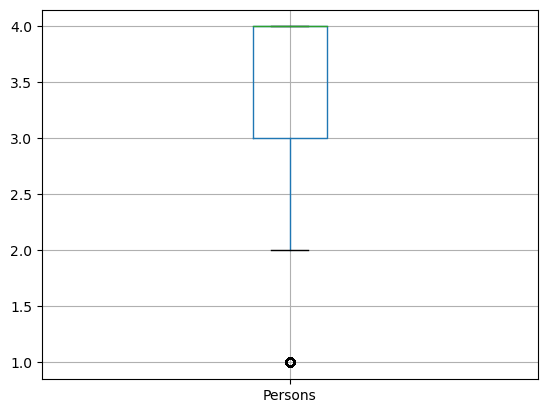

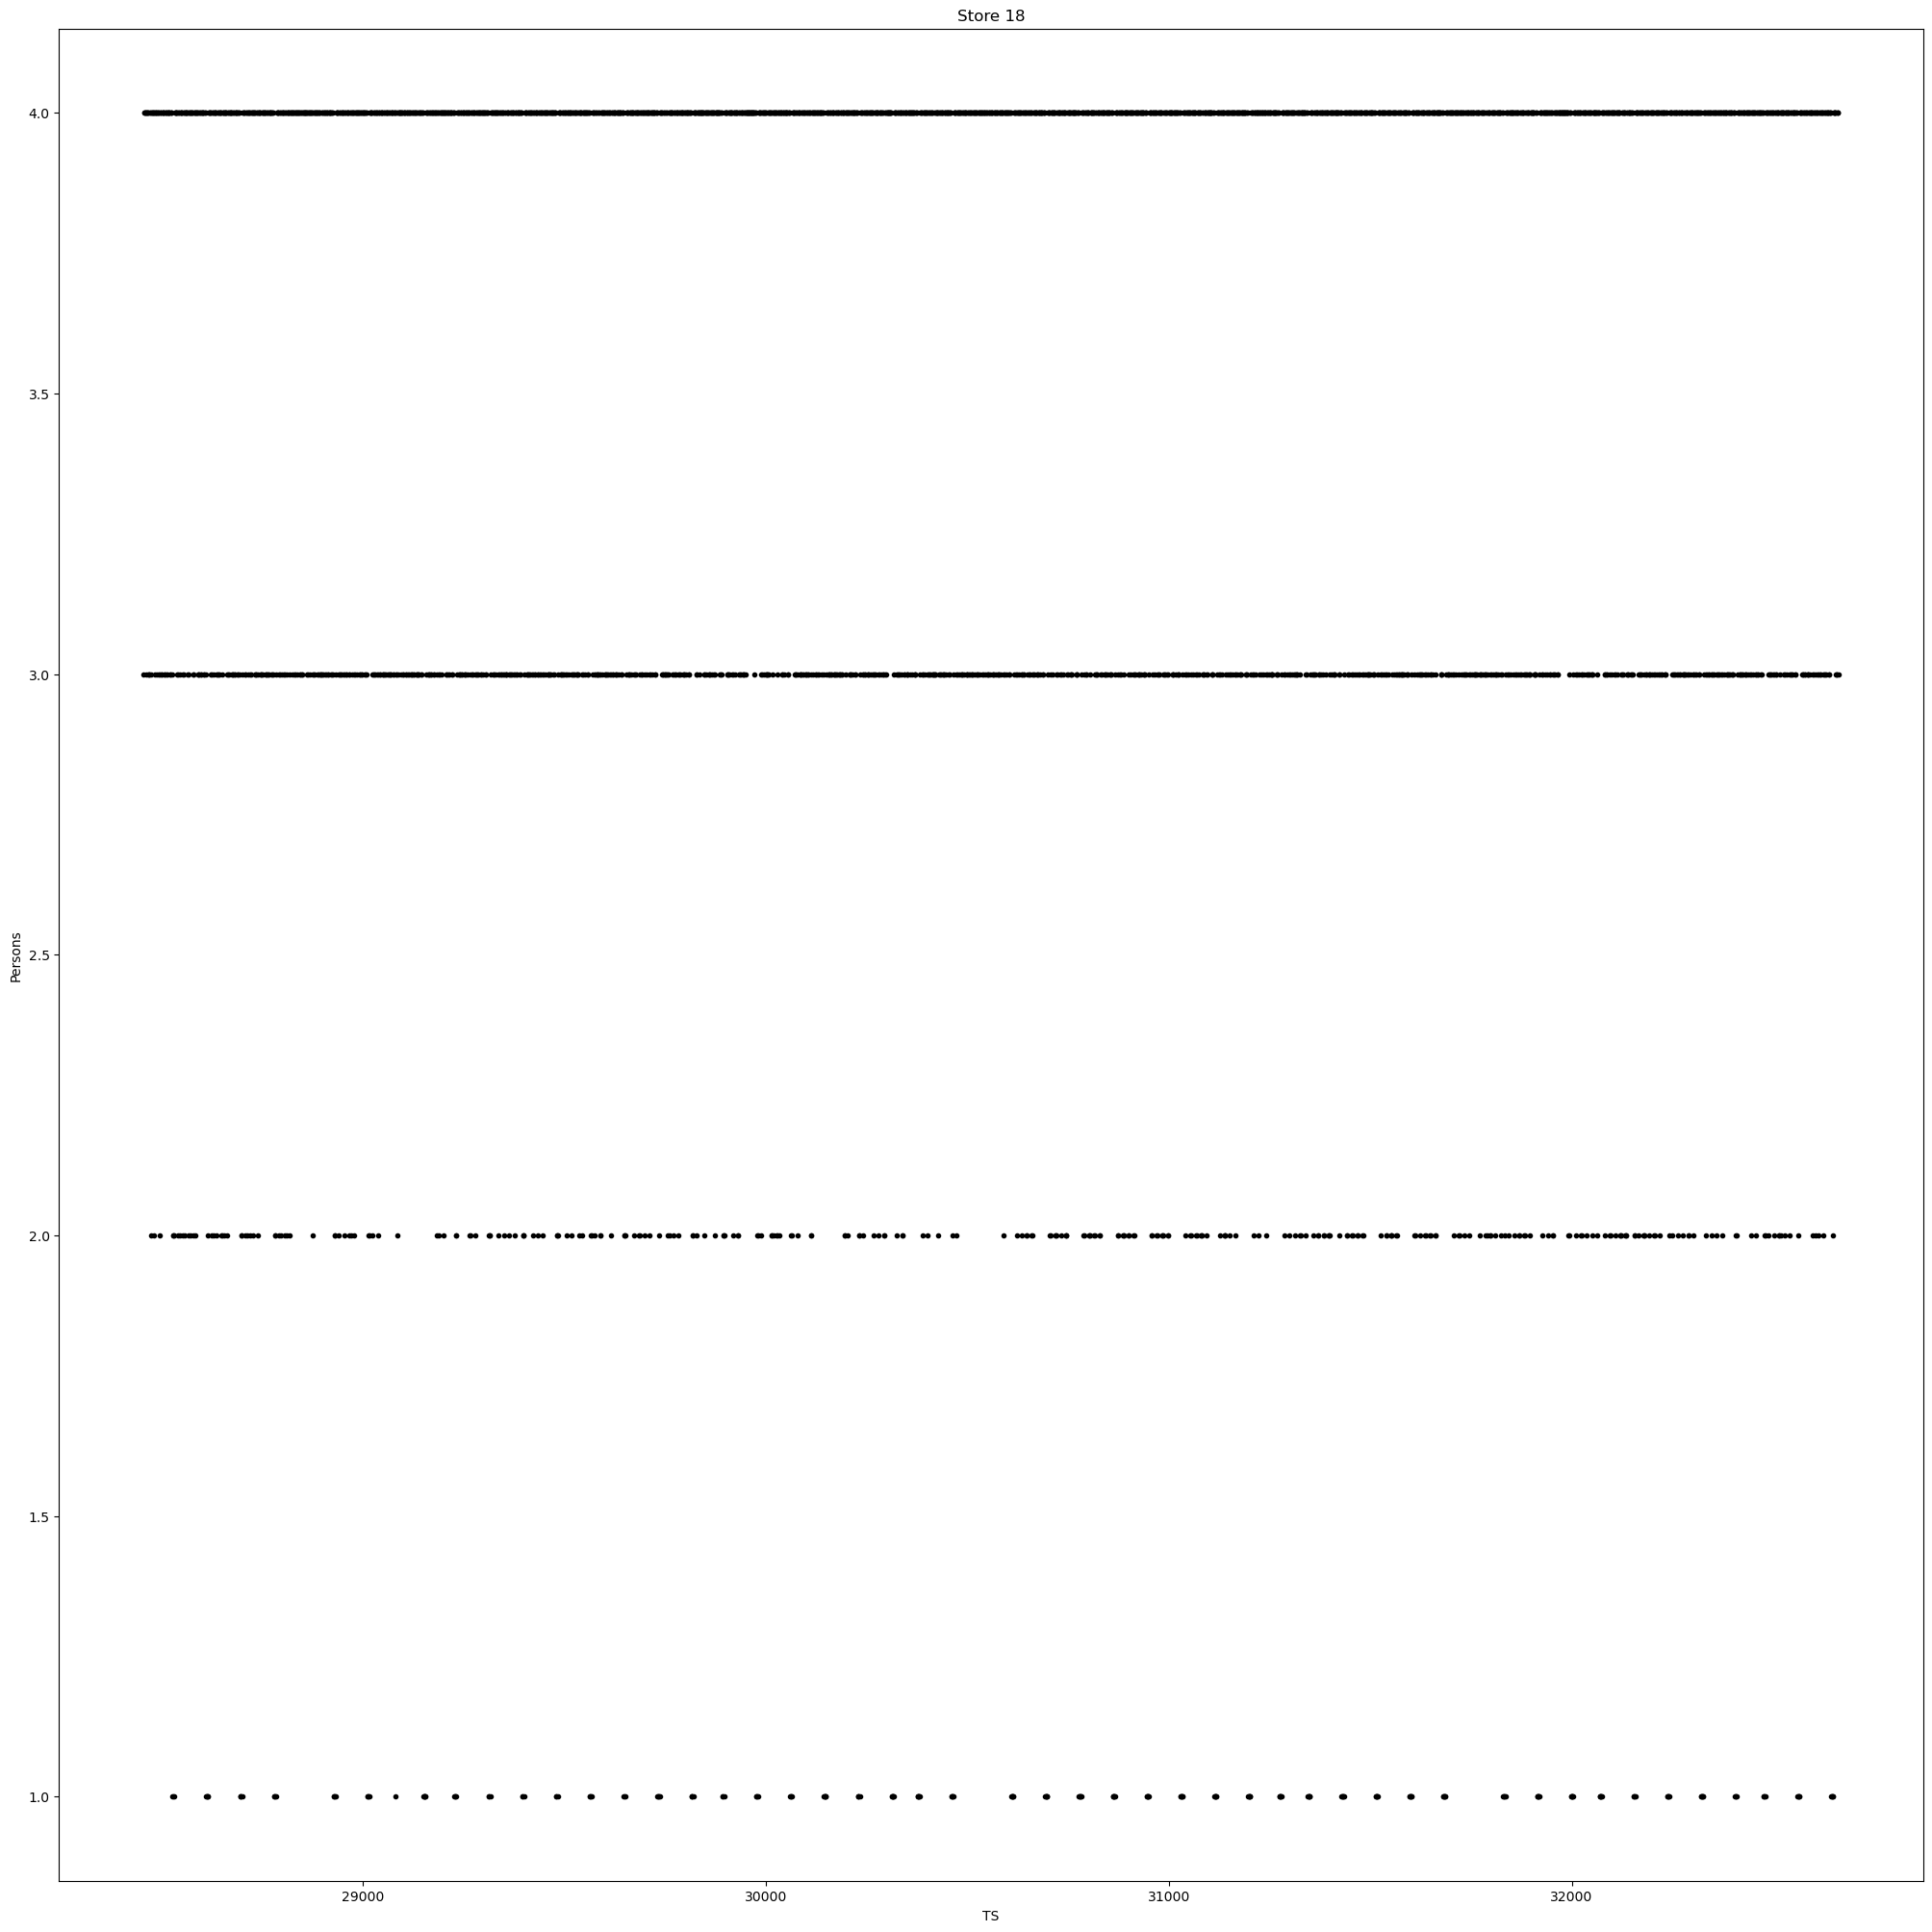

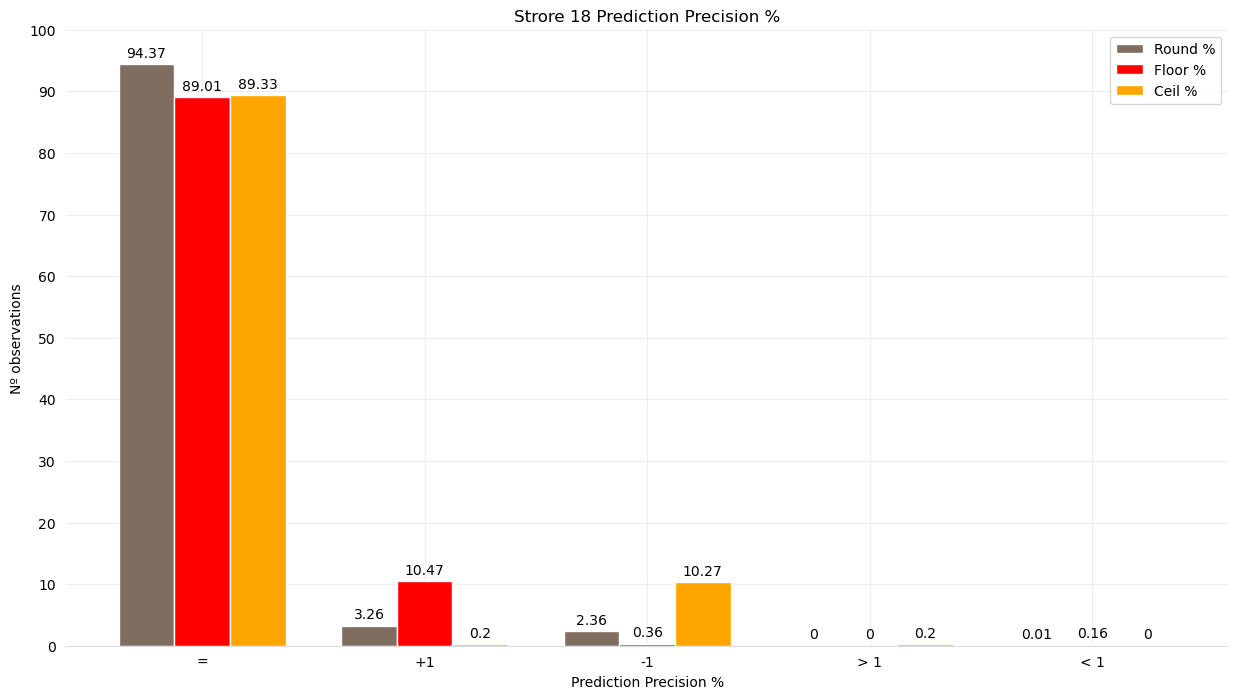

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6605 |        228 |        165 |          0 |          1  
  Floor                |       6230 |        733 |         25 |          0 |         11  
  Ceil                 |       6252 |         14 |        719 |         14 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.37 |       3.26 |       2.36 |        0.0 |       0.01  
  Floor % 

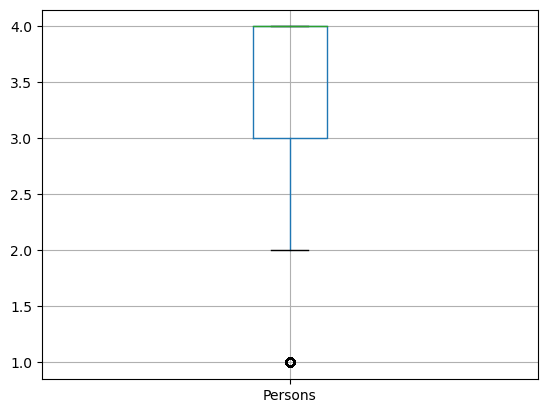

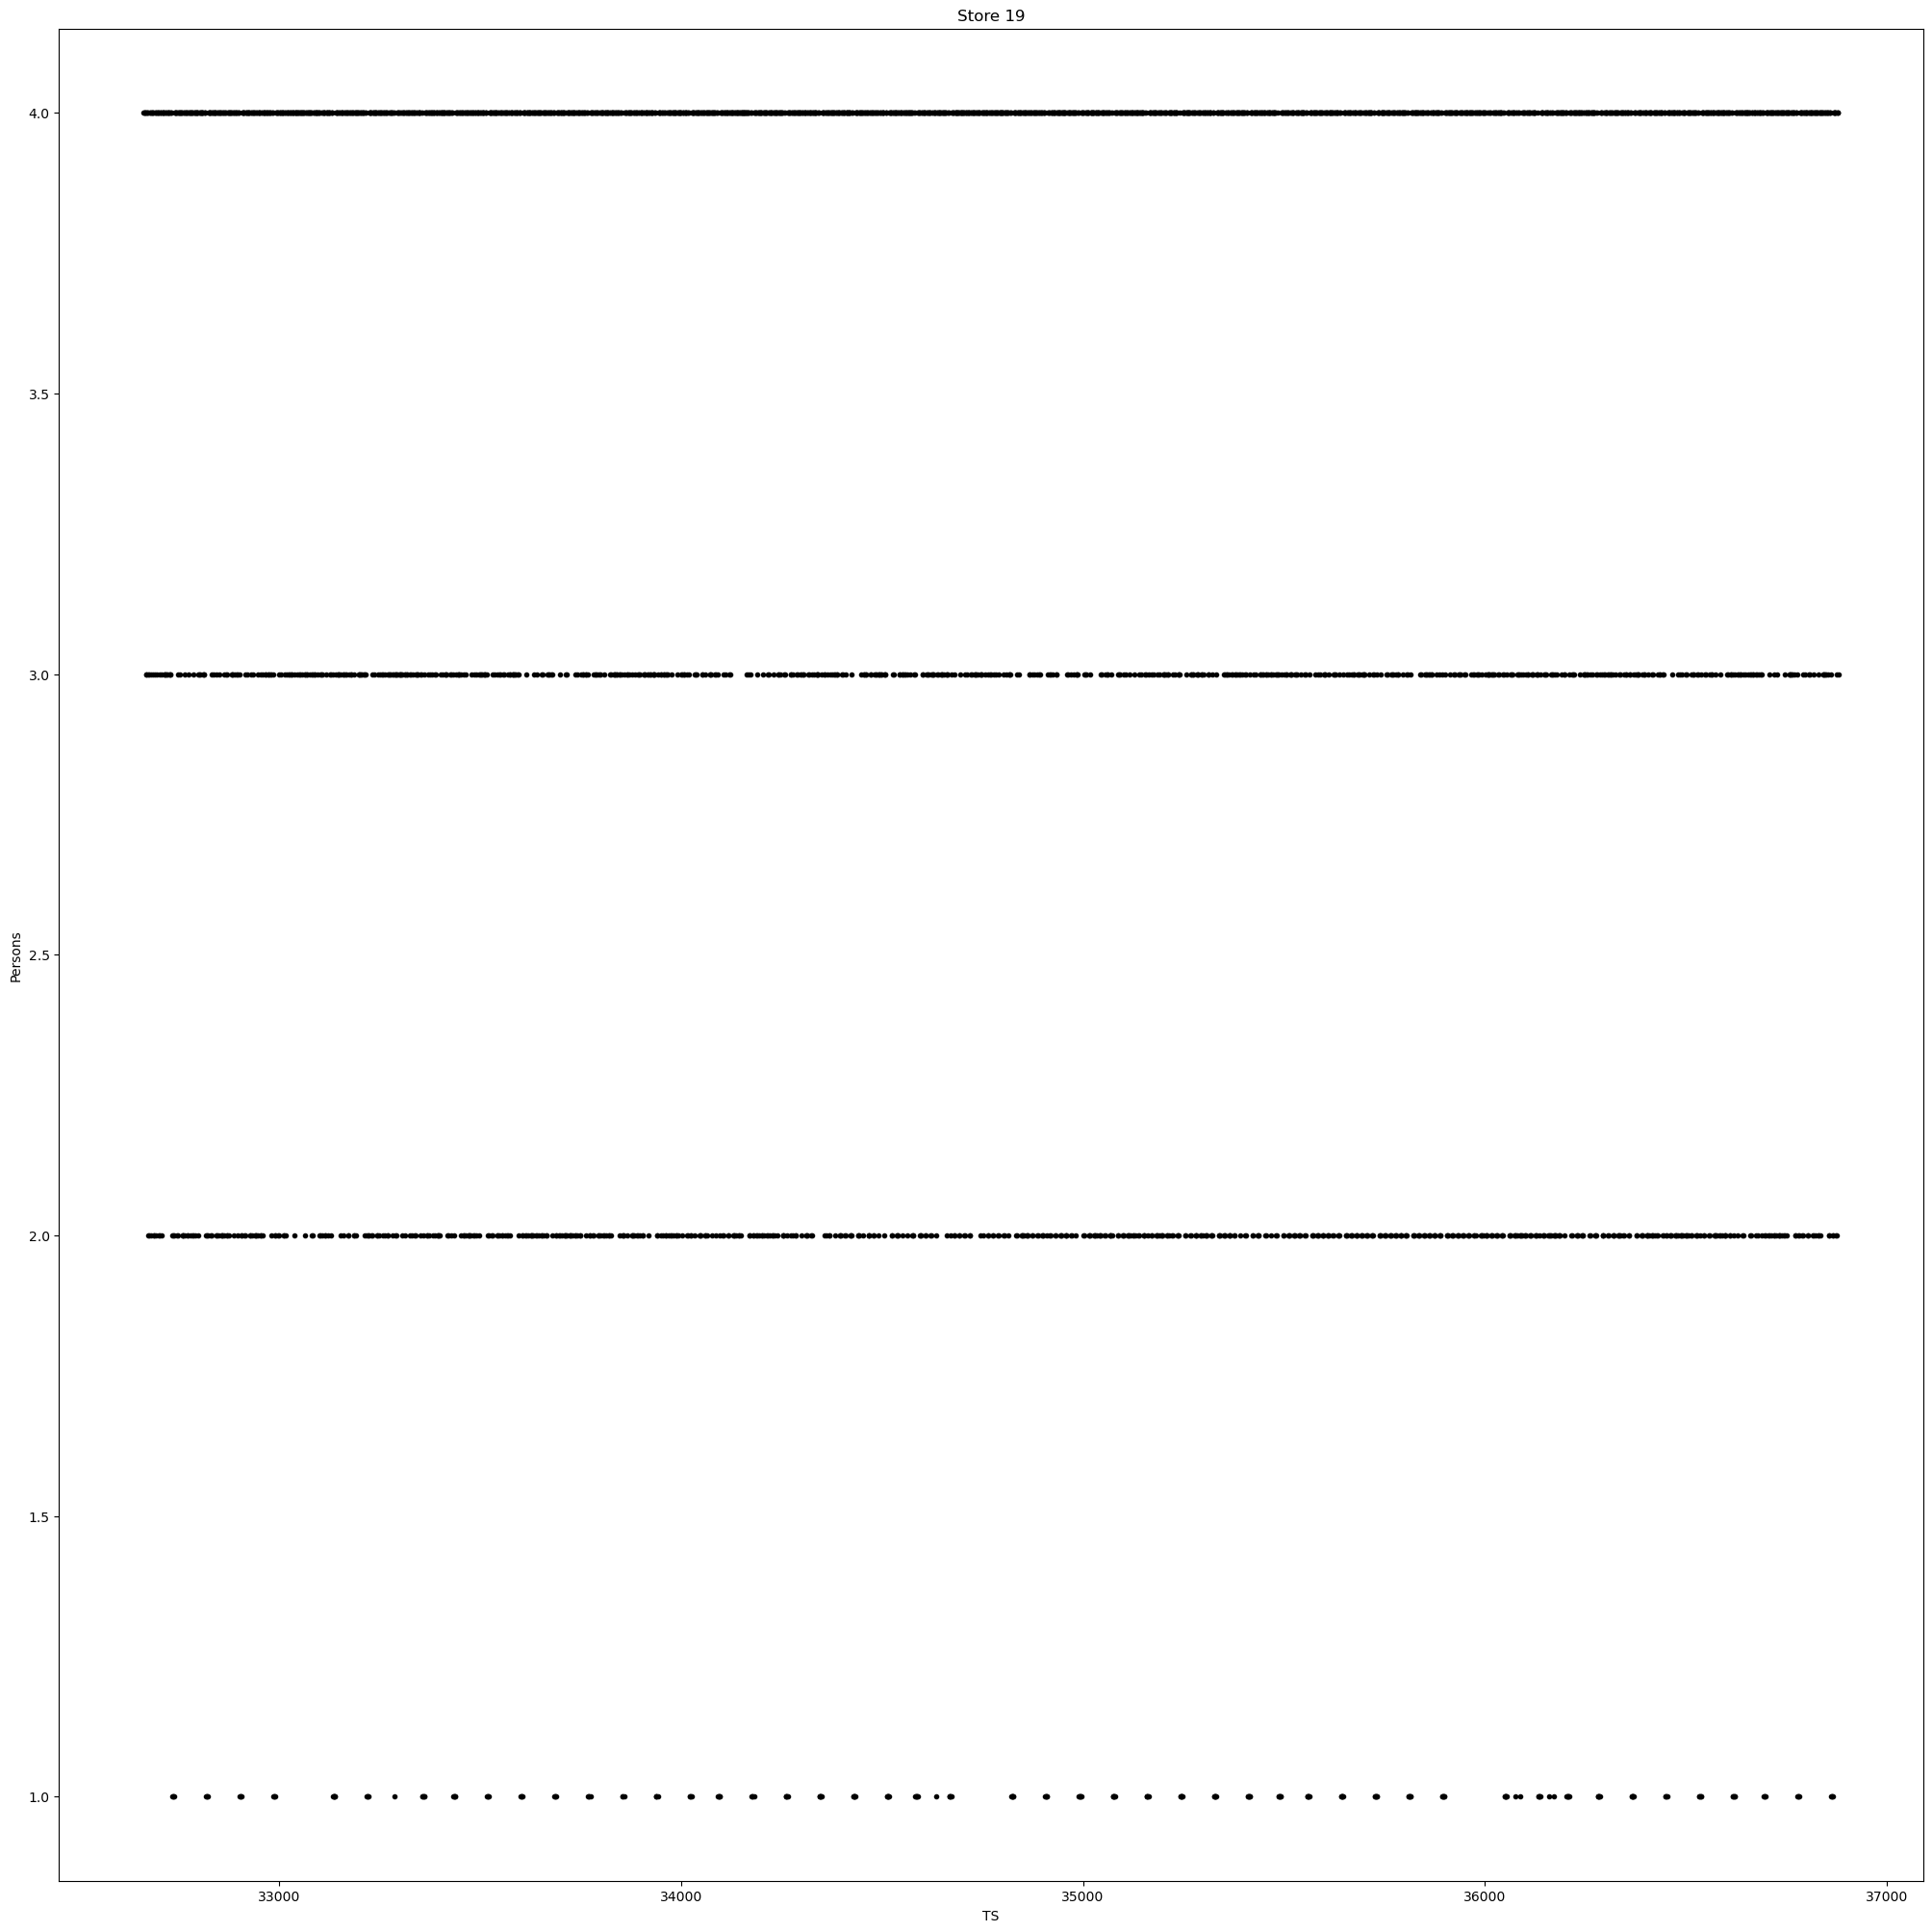

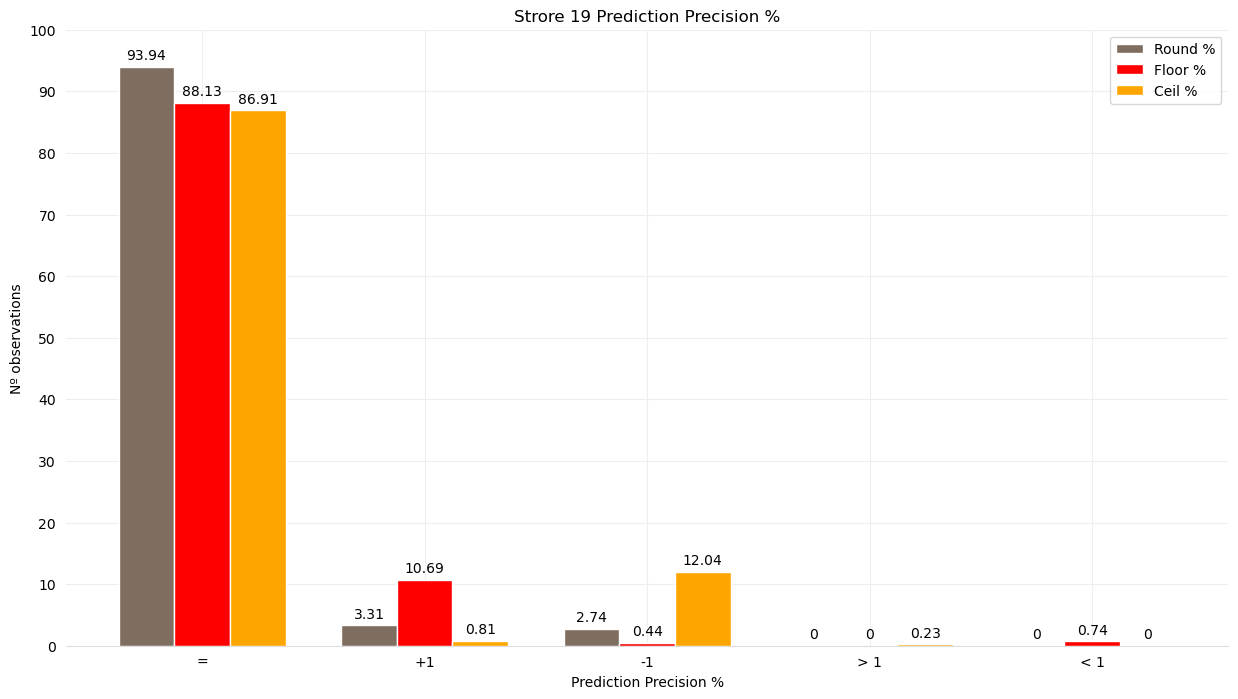

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6575 |        232 |        192 |          0 |          0  
  Floor                |       6168 |        748 |         31 |          0 |         52  
  Ceil                 |       6083 |         57 |        843 |         16 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.94 |       3.31 |       2.74 |        0.0 |        0.0  
  Floor % 

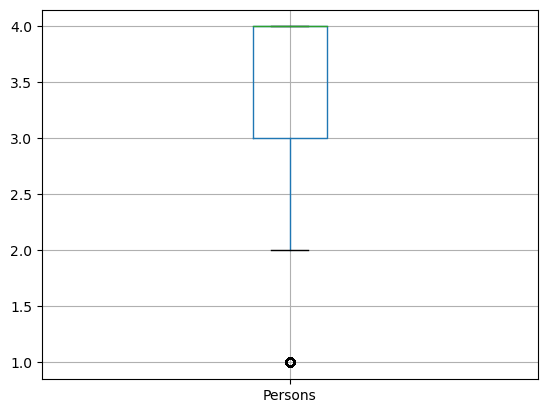

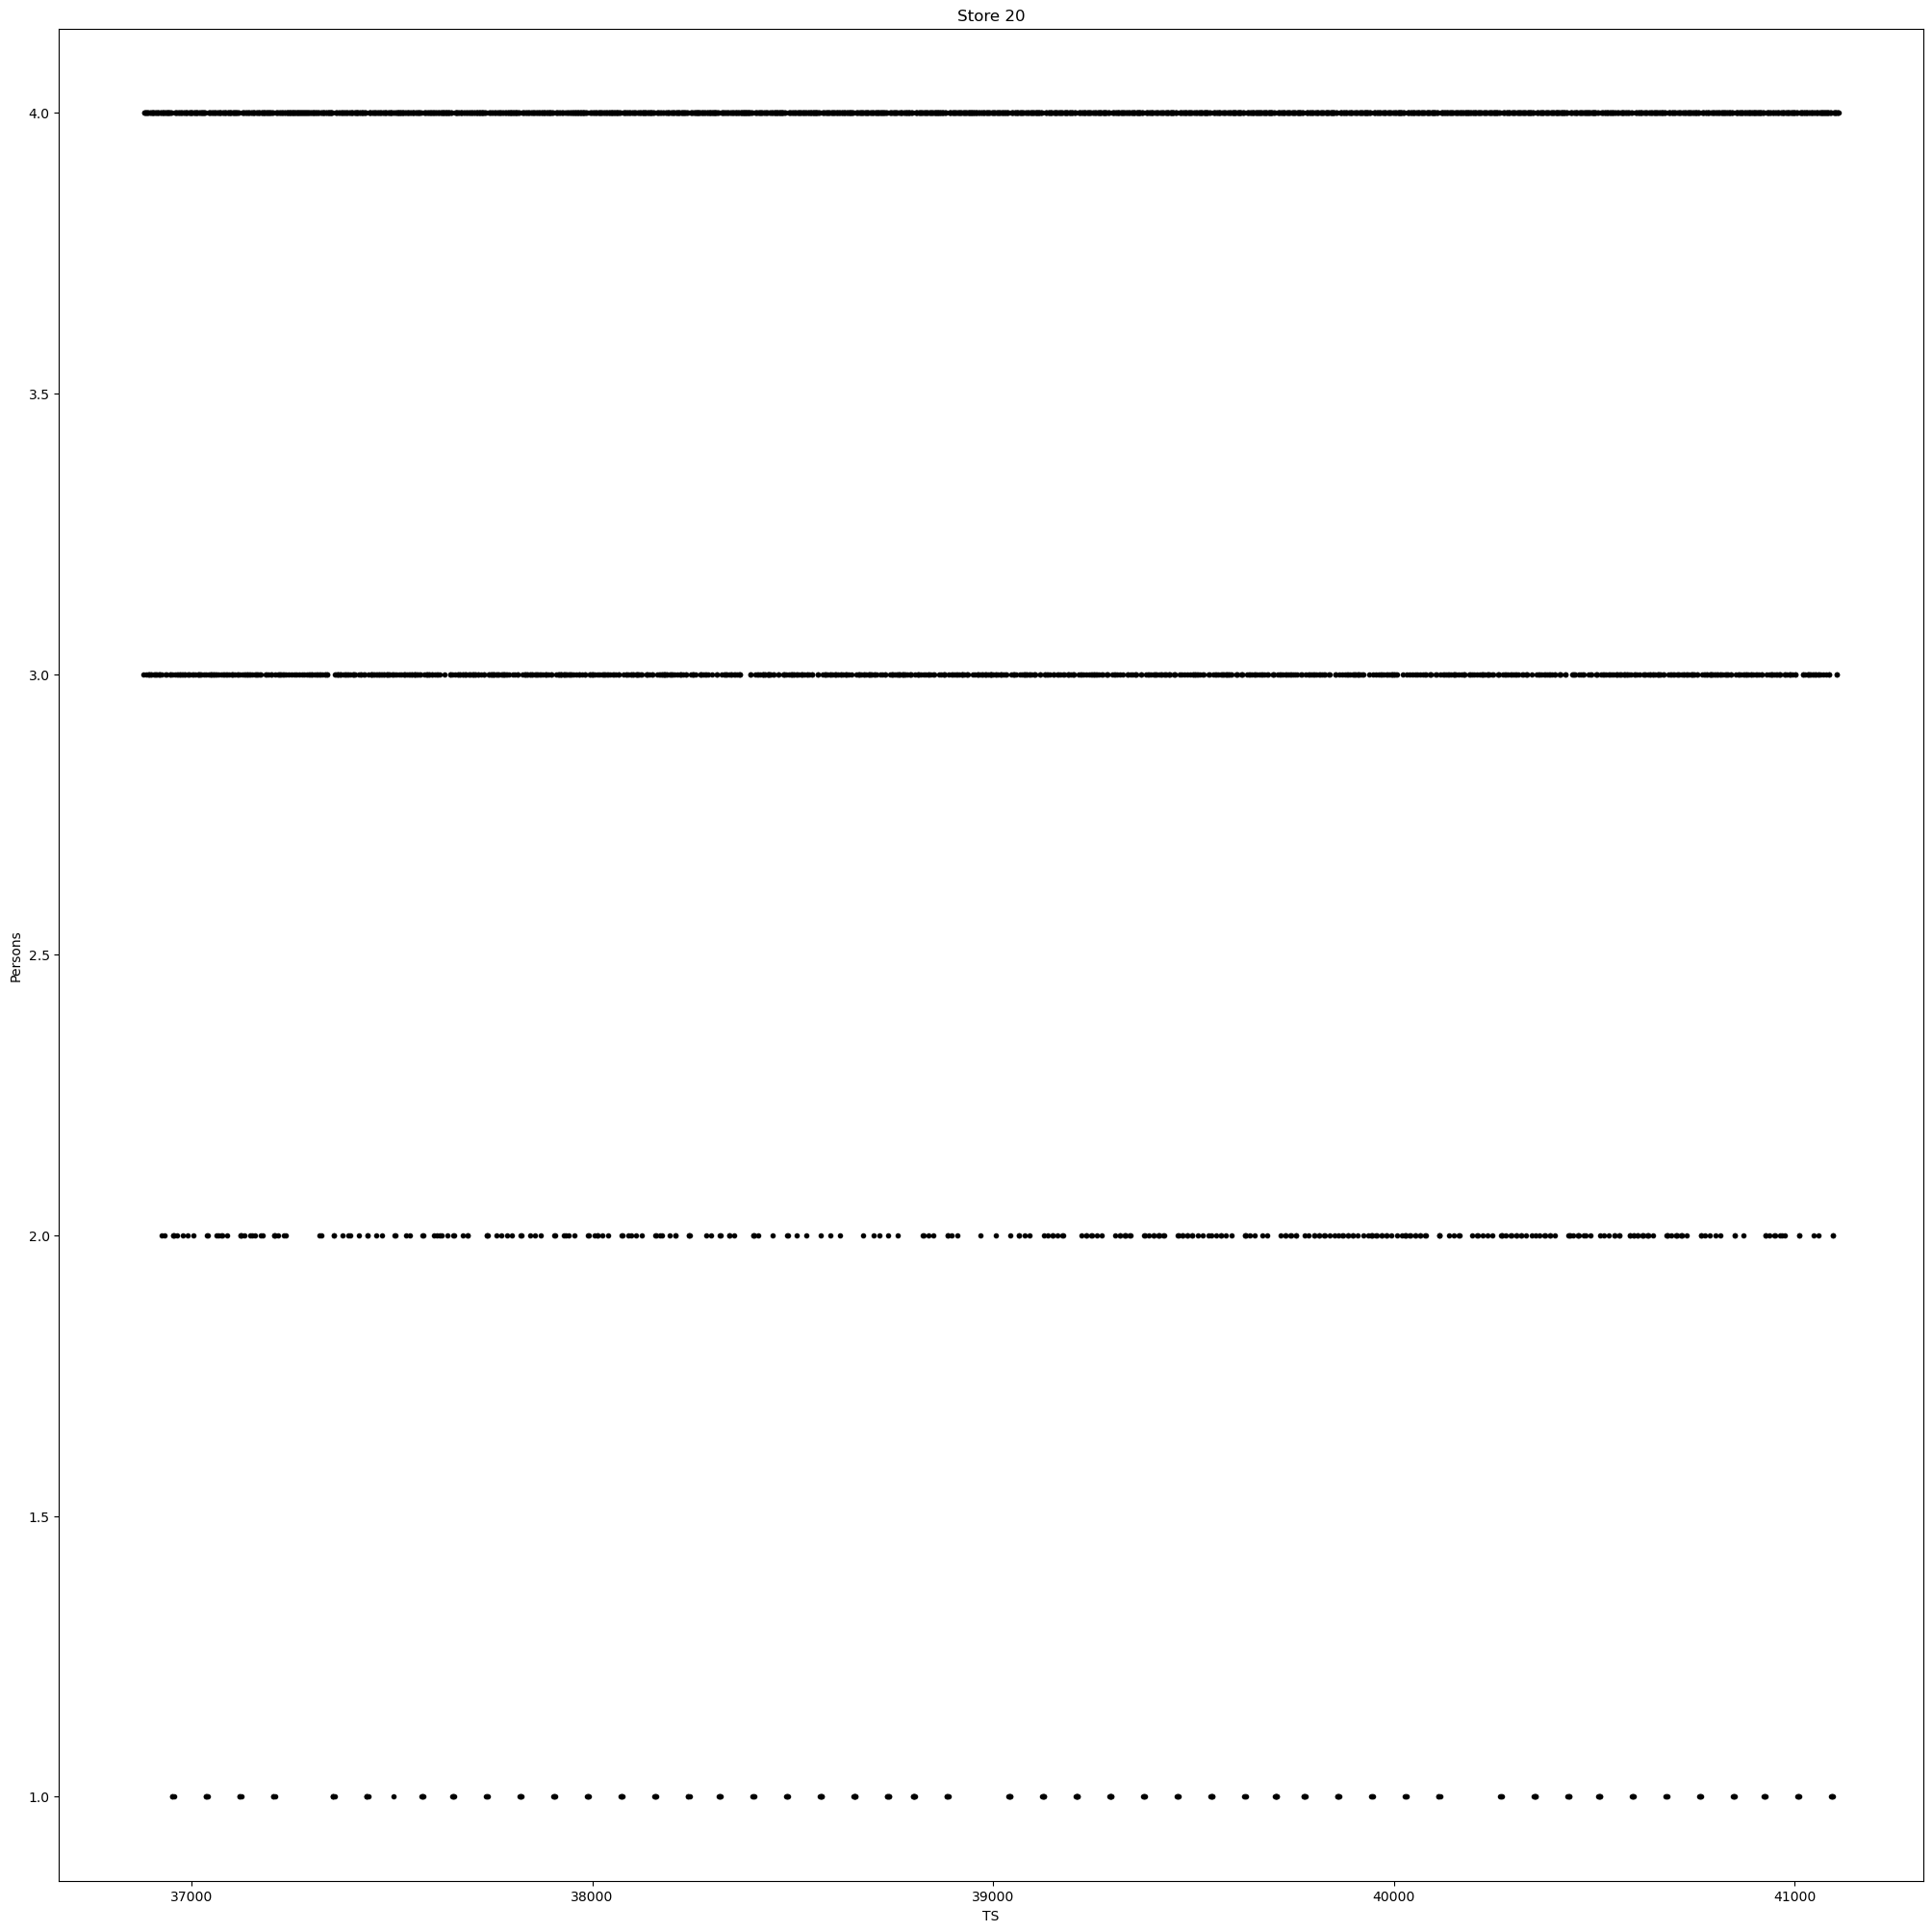

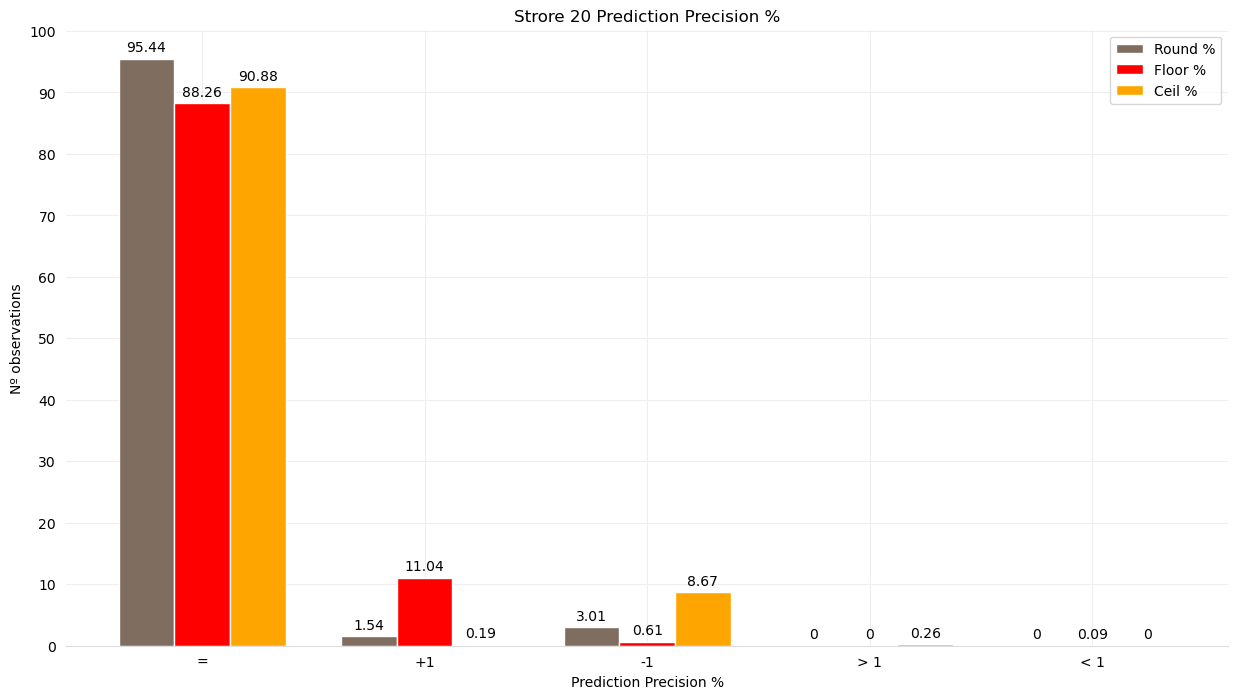

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6680 |        108 |        211 |          0 |          0  
  Floor                |       6177 |        773 |         43 |          0 |          6  
  Ceil                 |       6361 |         13 |        607 |         18 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.44 |       1.54 |       3.01 |        0.0 |        0.0  
  Floor % 

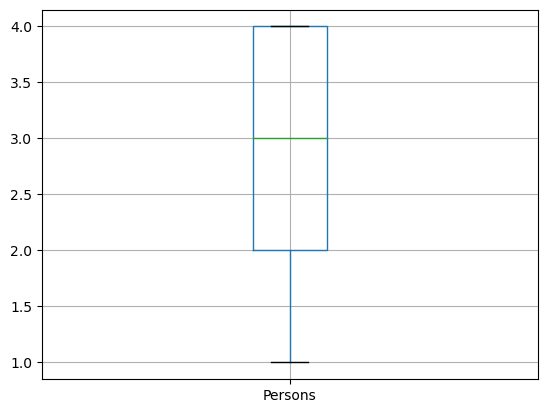

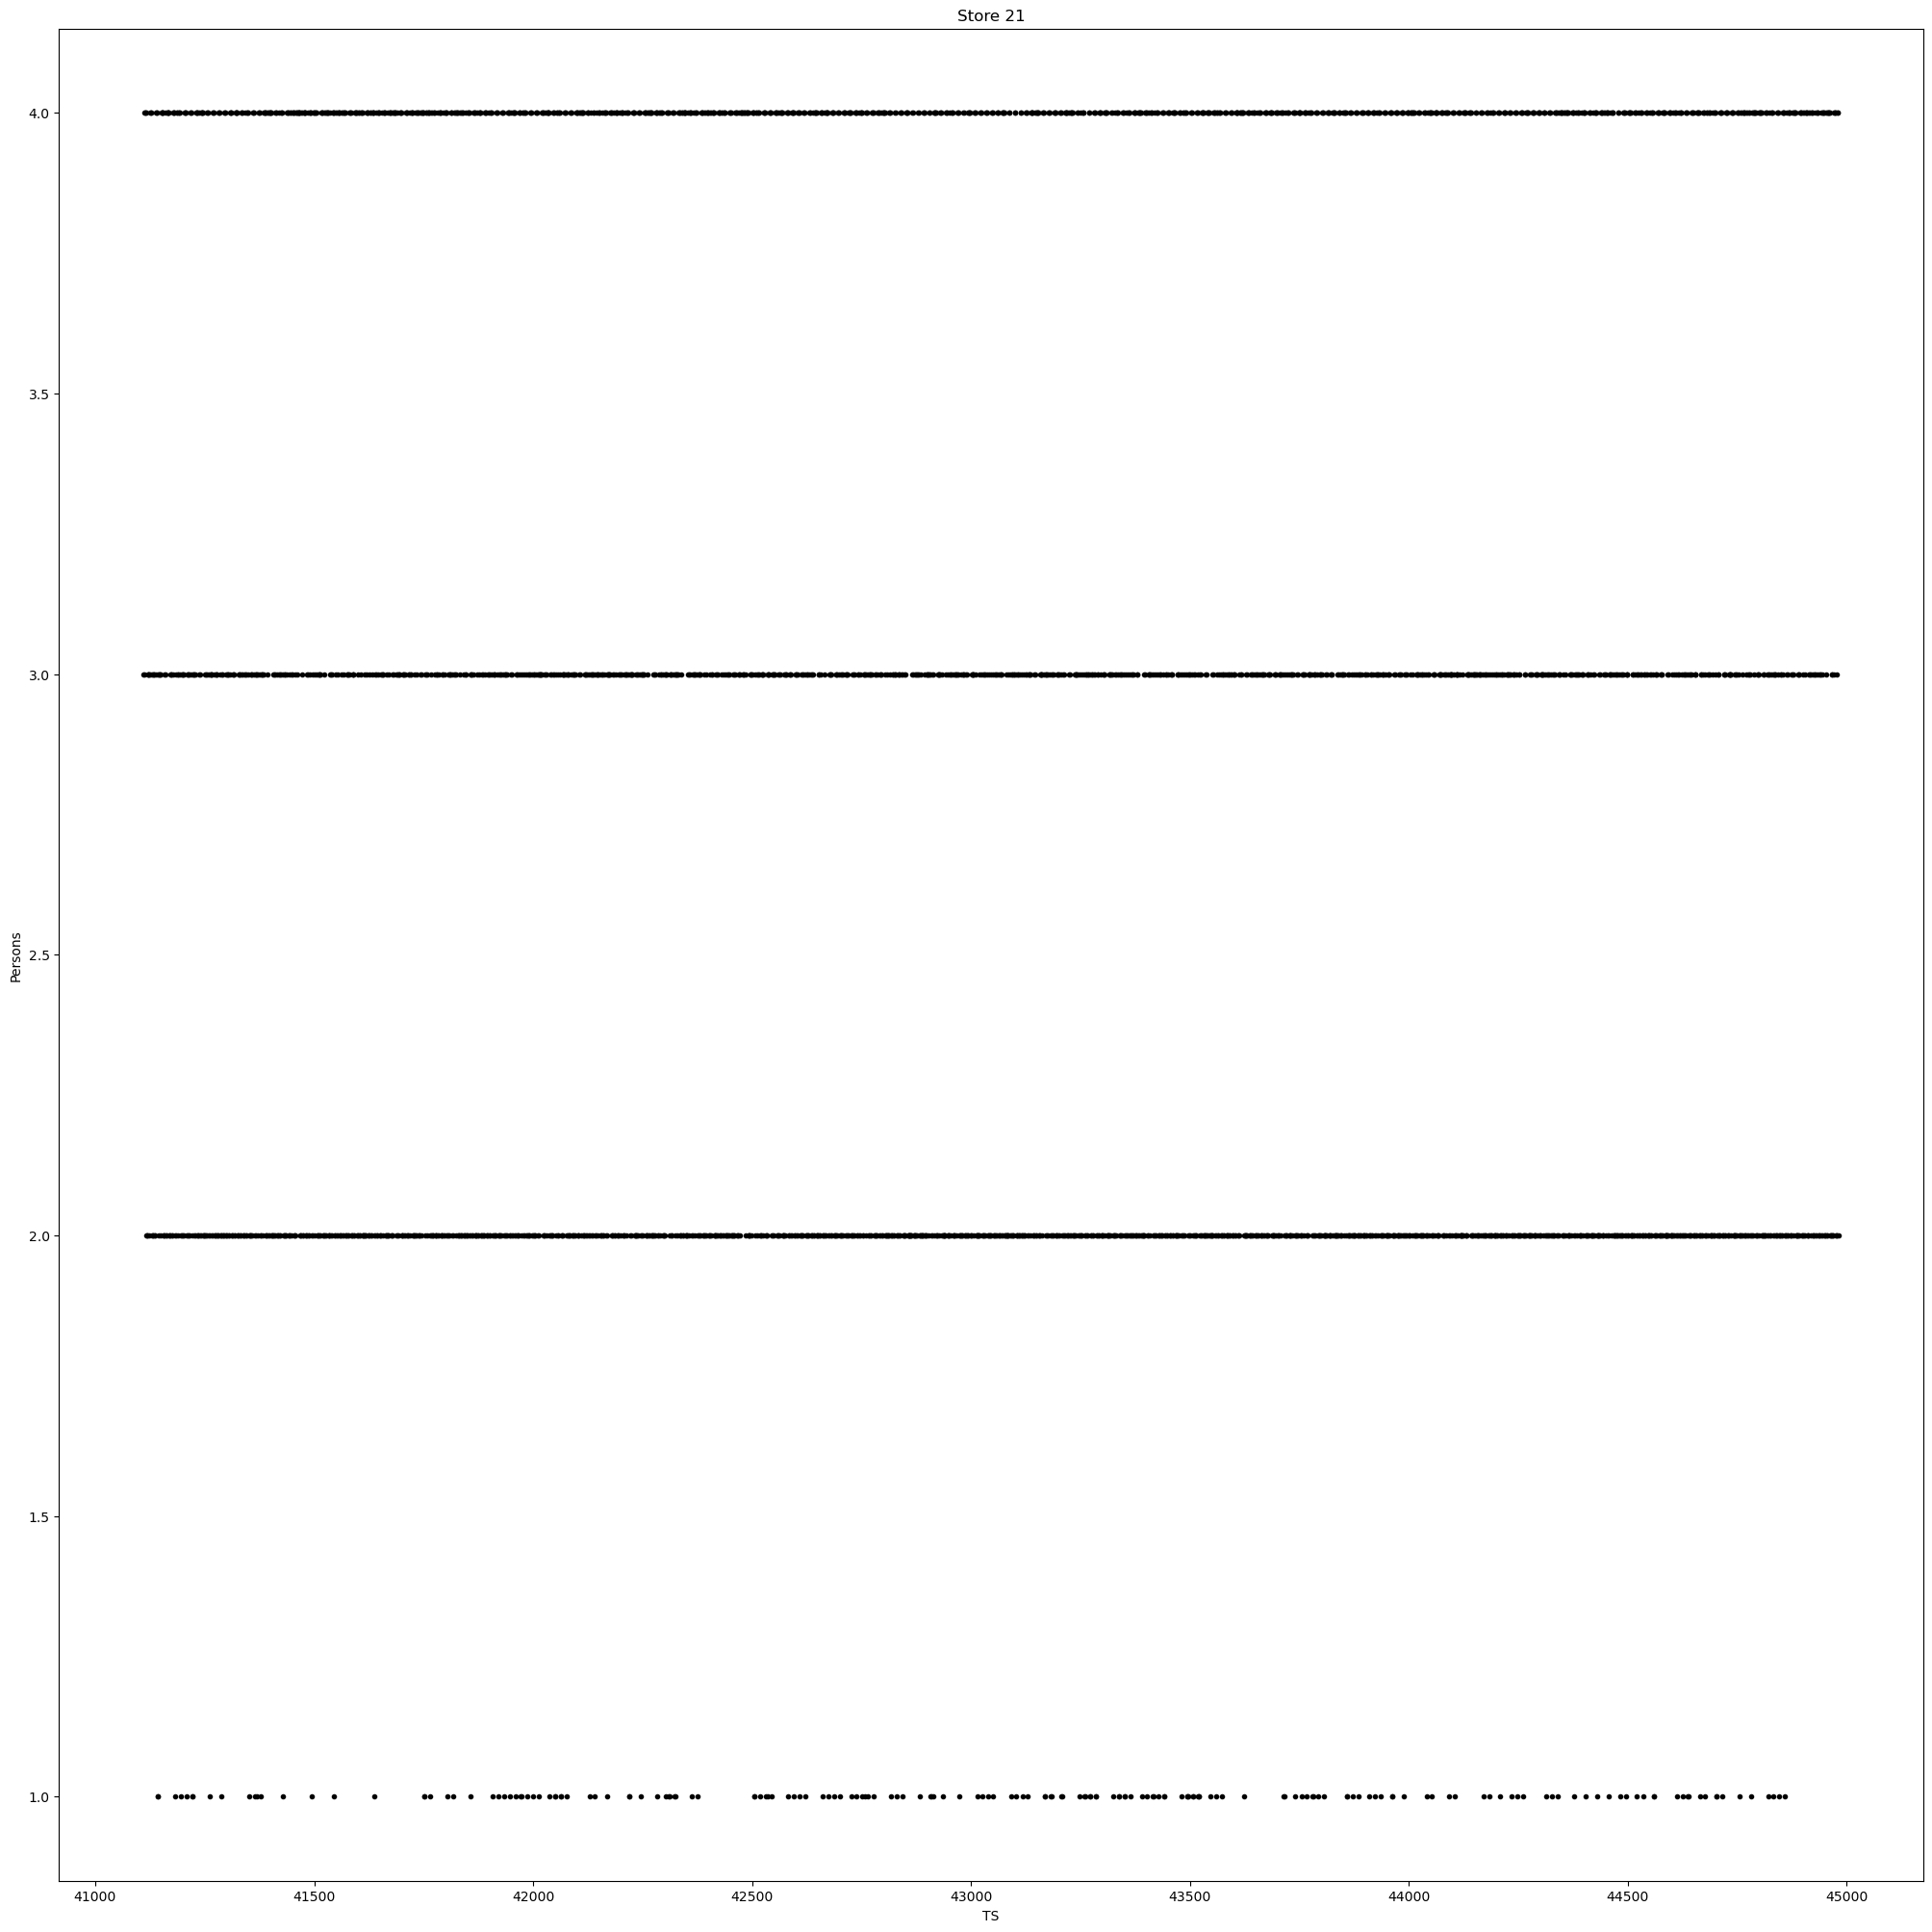

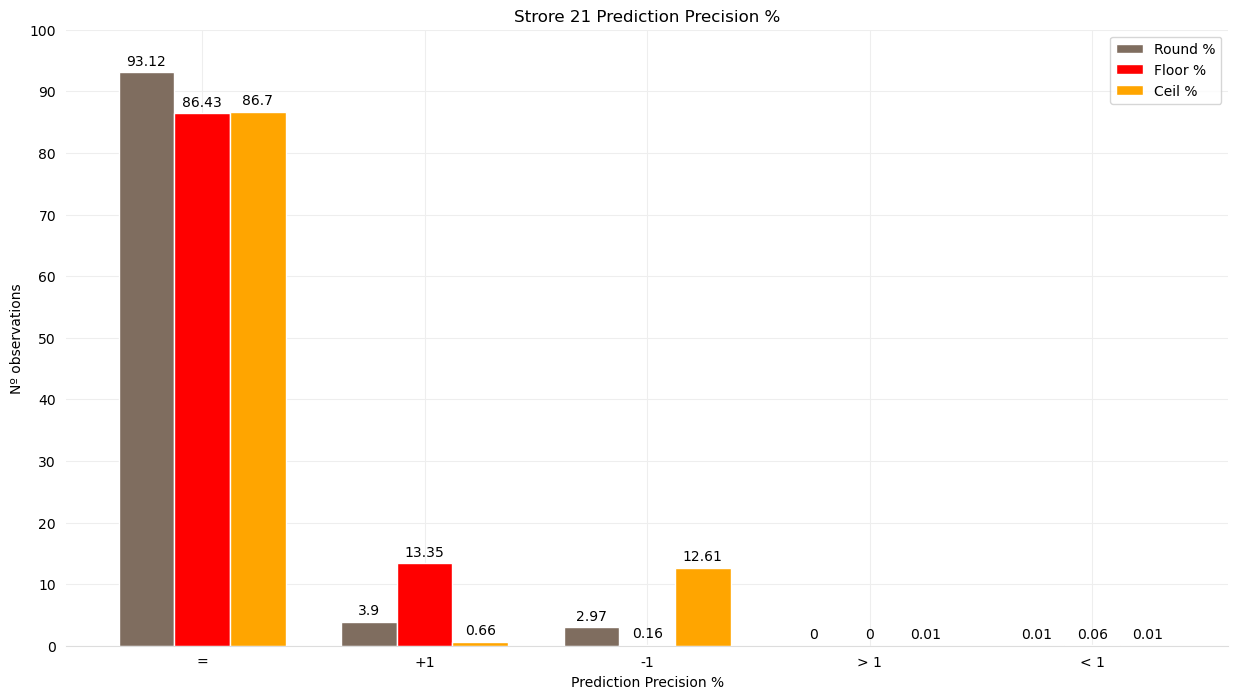

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6500 |        272 |        207 |          0 |          1  
  Floor                |       6033 |        932 |         11 |          0 |          4  
  Ceil                 |       6052 |         46 |        880 |          1 |          1  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.12 |        3.9 |       2.97 |        0.0 |       0.01  
  Floor % 

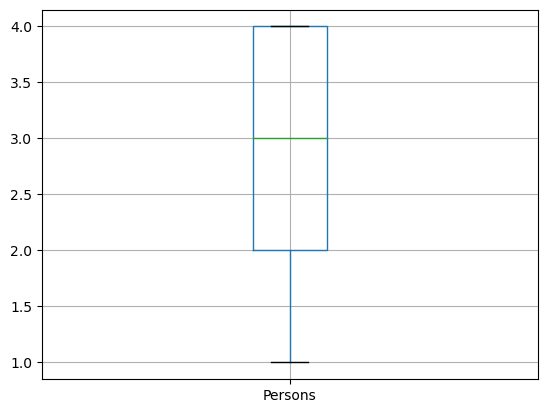

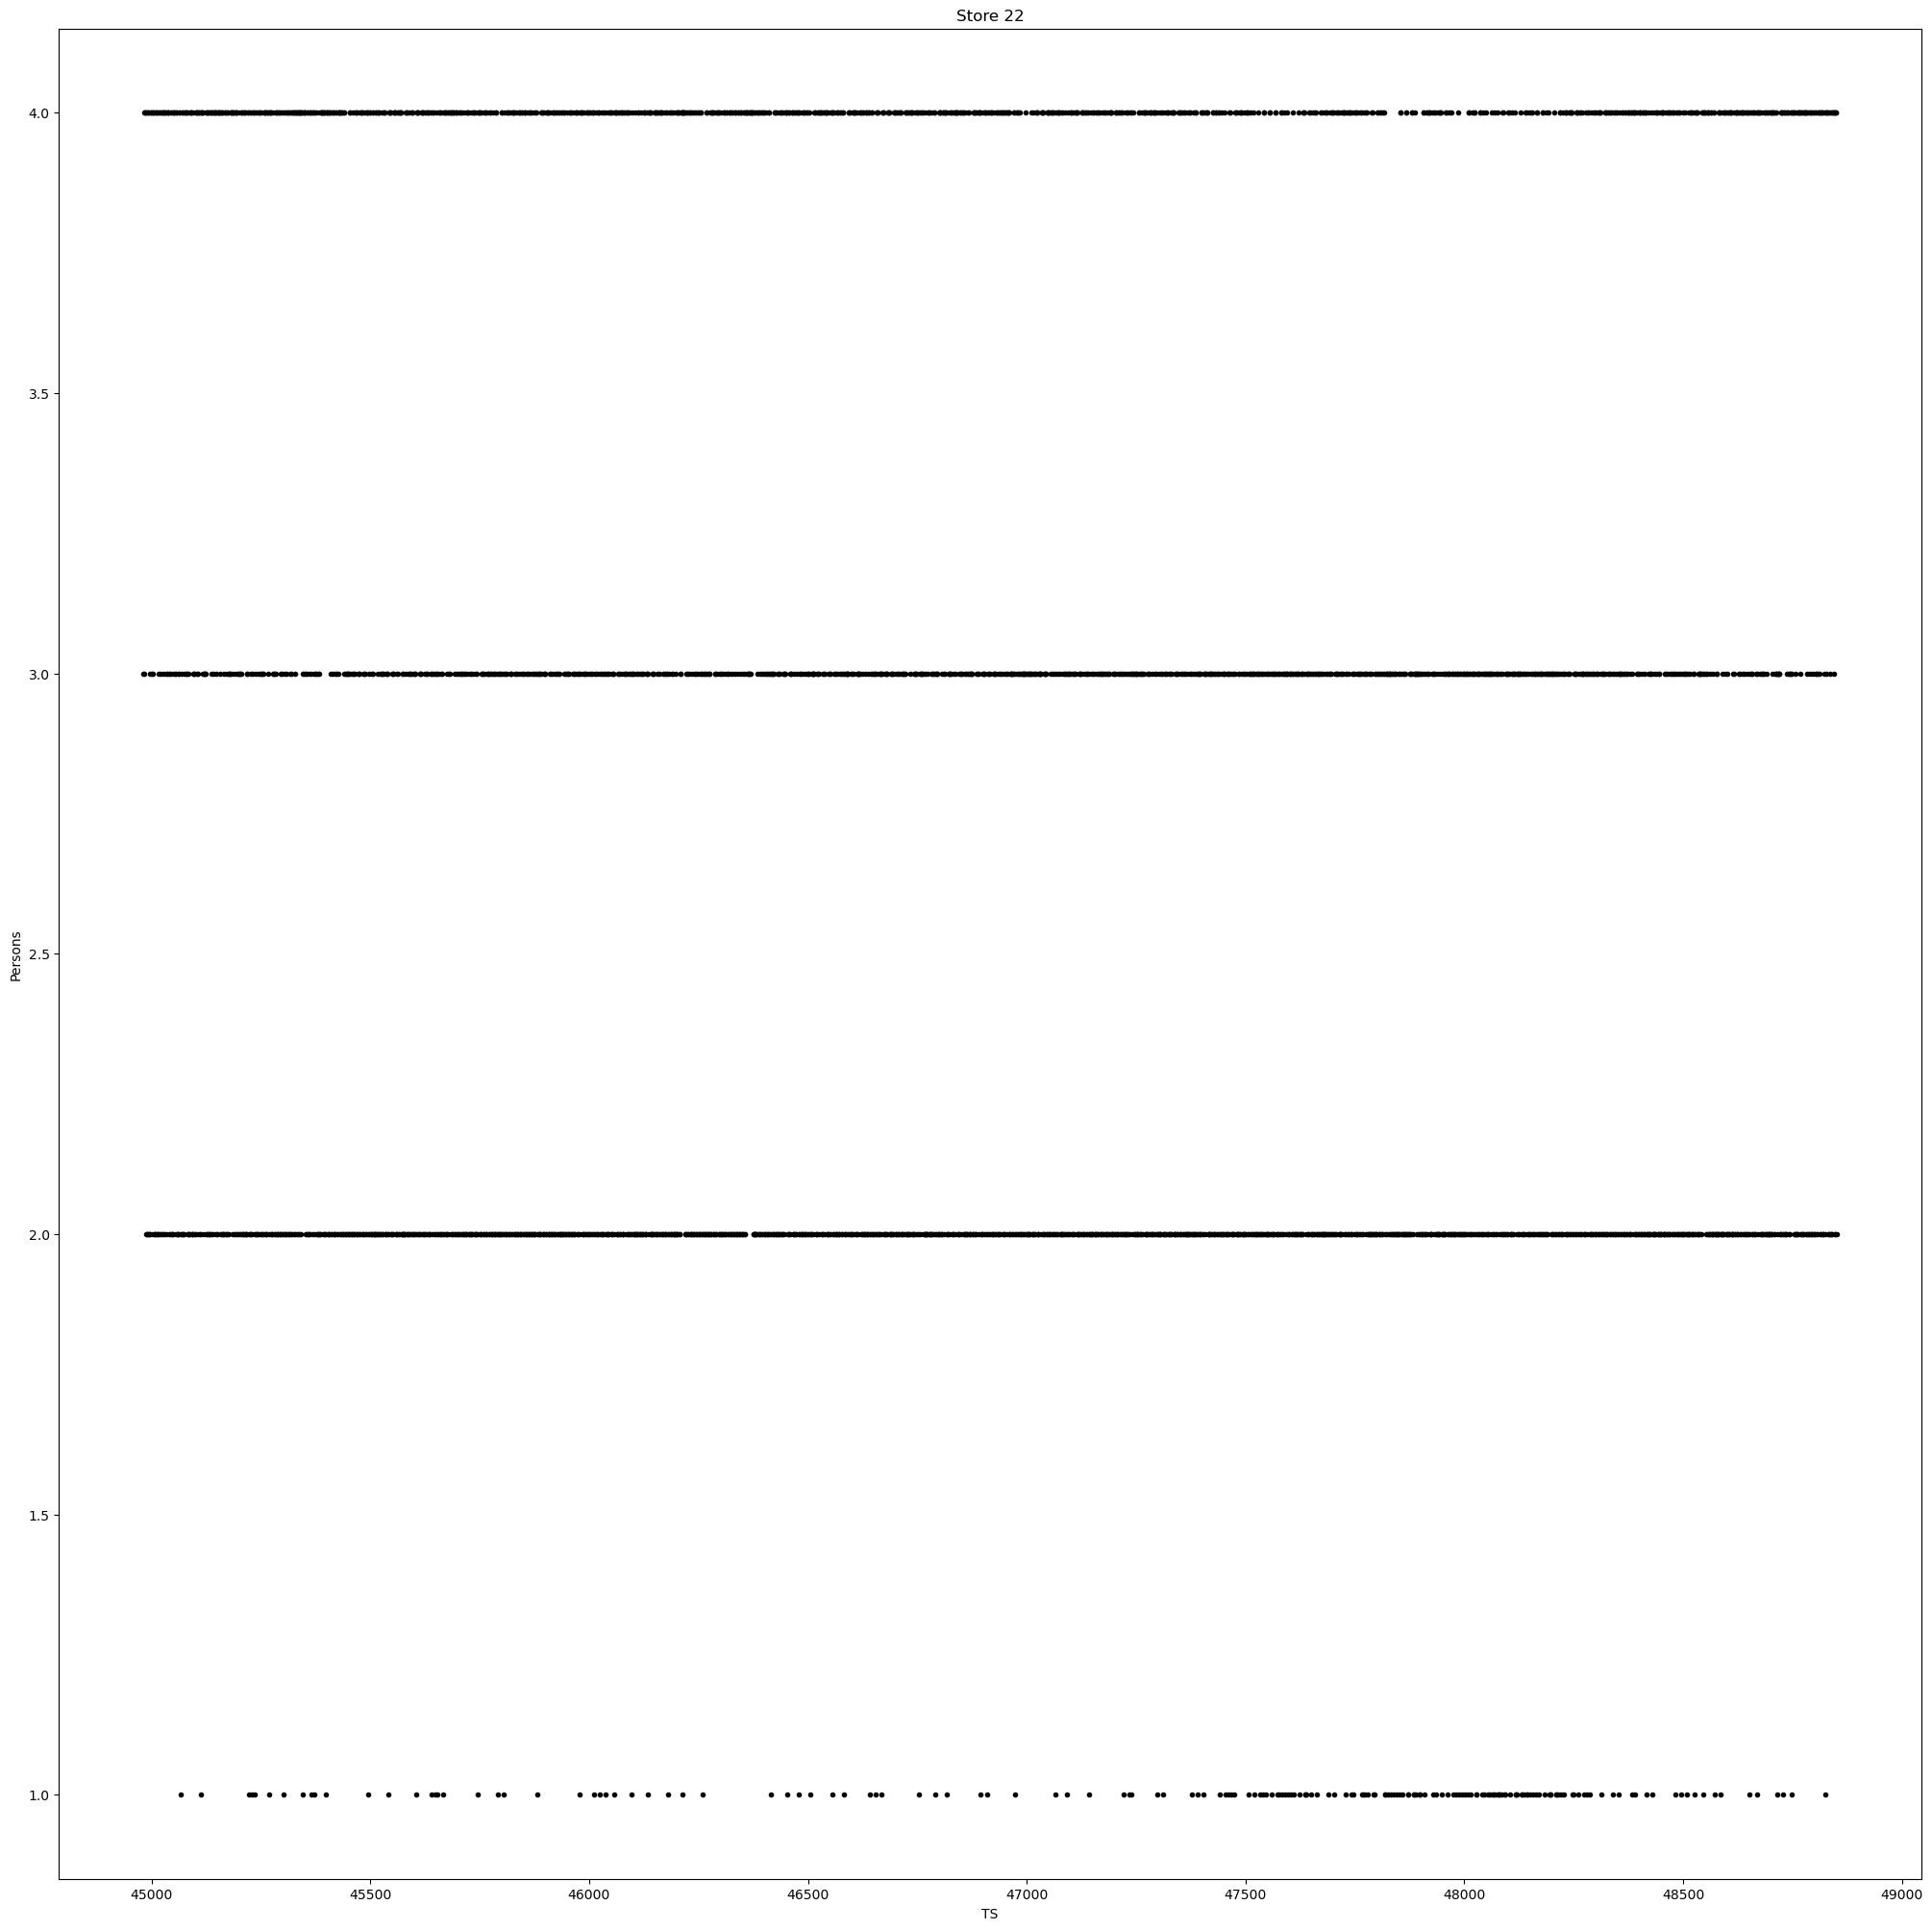

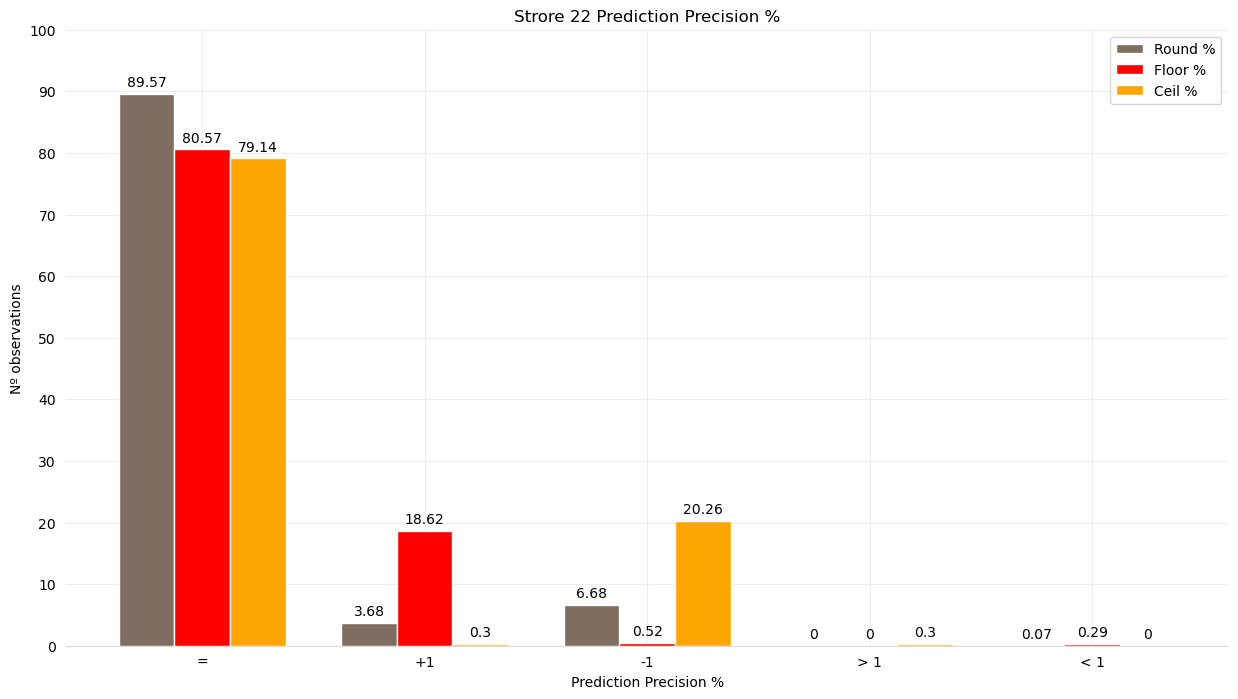

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6252 |        257 |        466 |          0 |          5  
  Floor                |       5624 |       1300 |         36 |          0 |         20  
  Ceil                 |       5524 |         21 |       1414 |         21 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      89.57 |       3.68 |       6.68 |        0.0 |       0.07  
  Floor % 

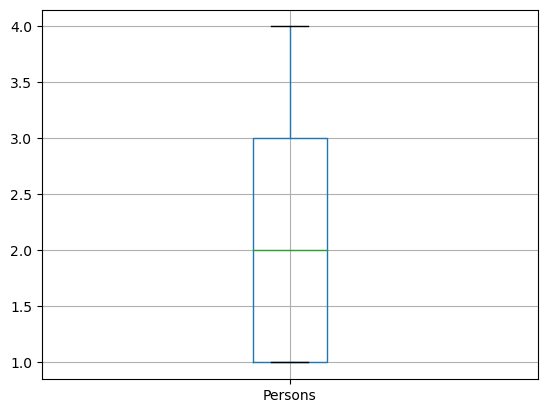

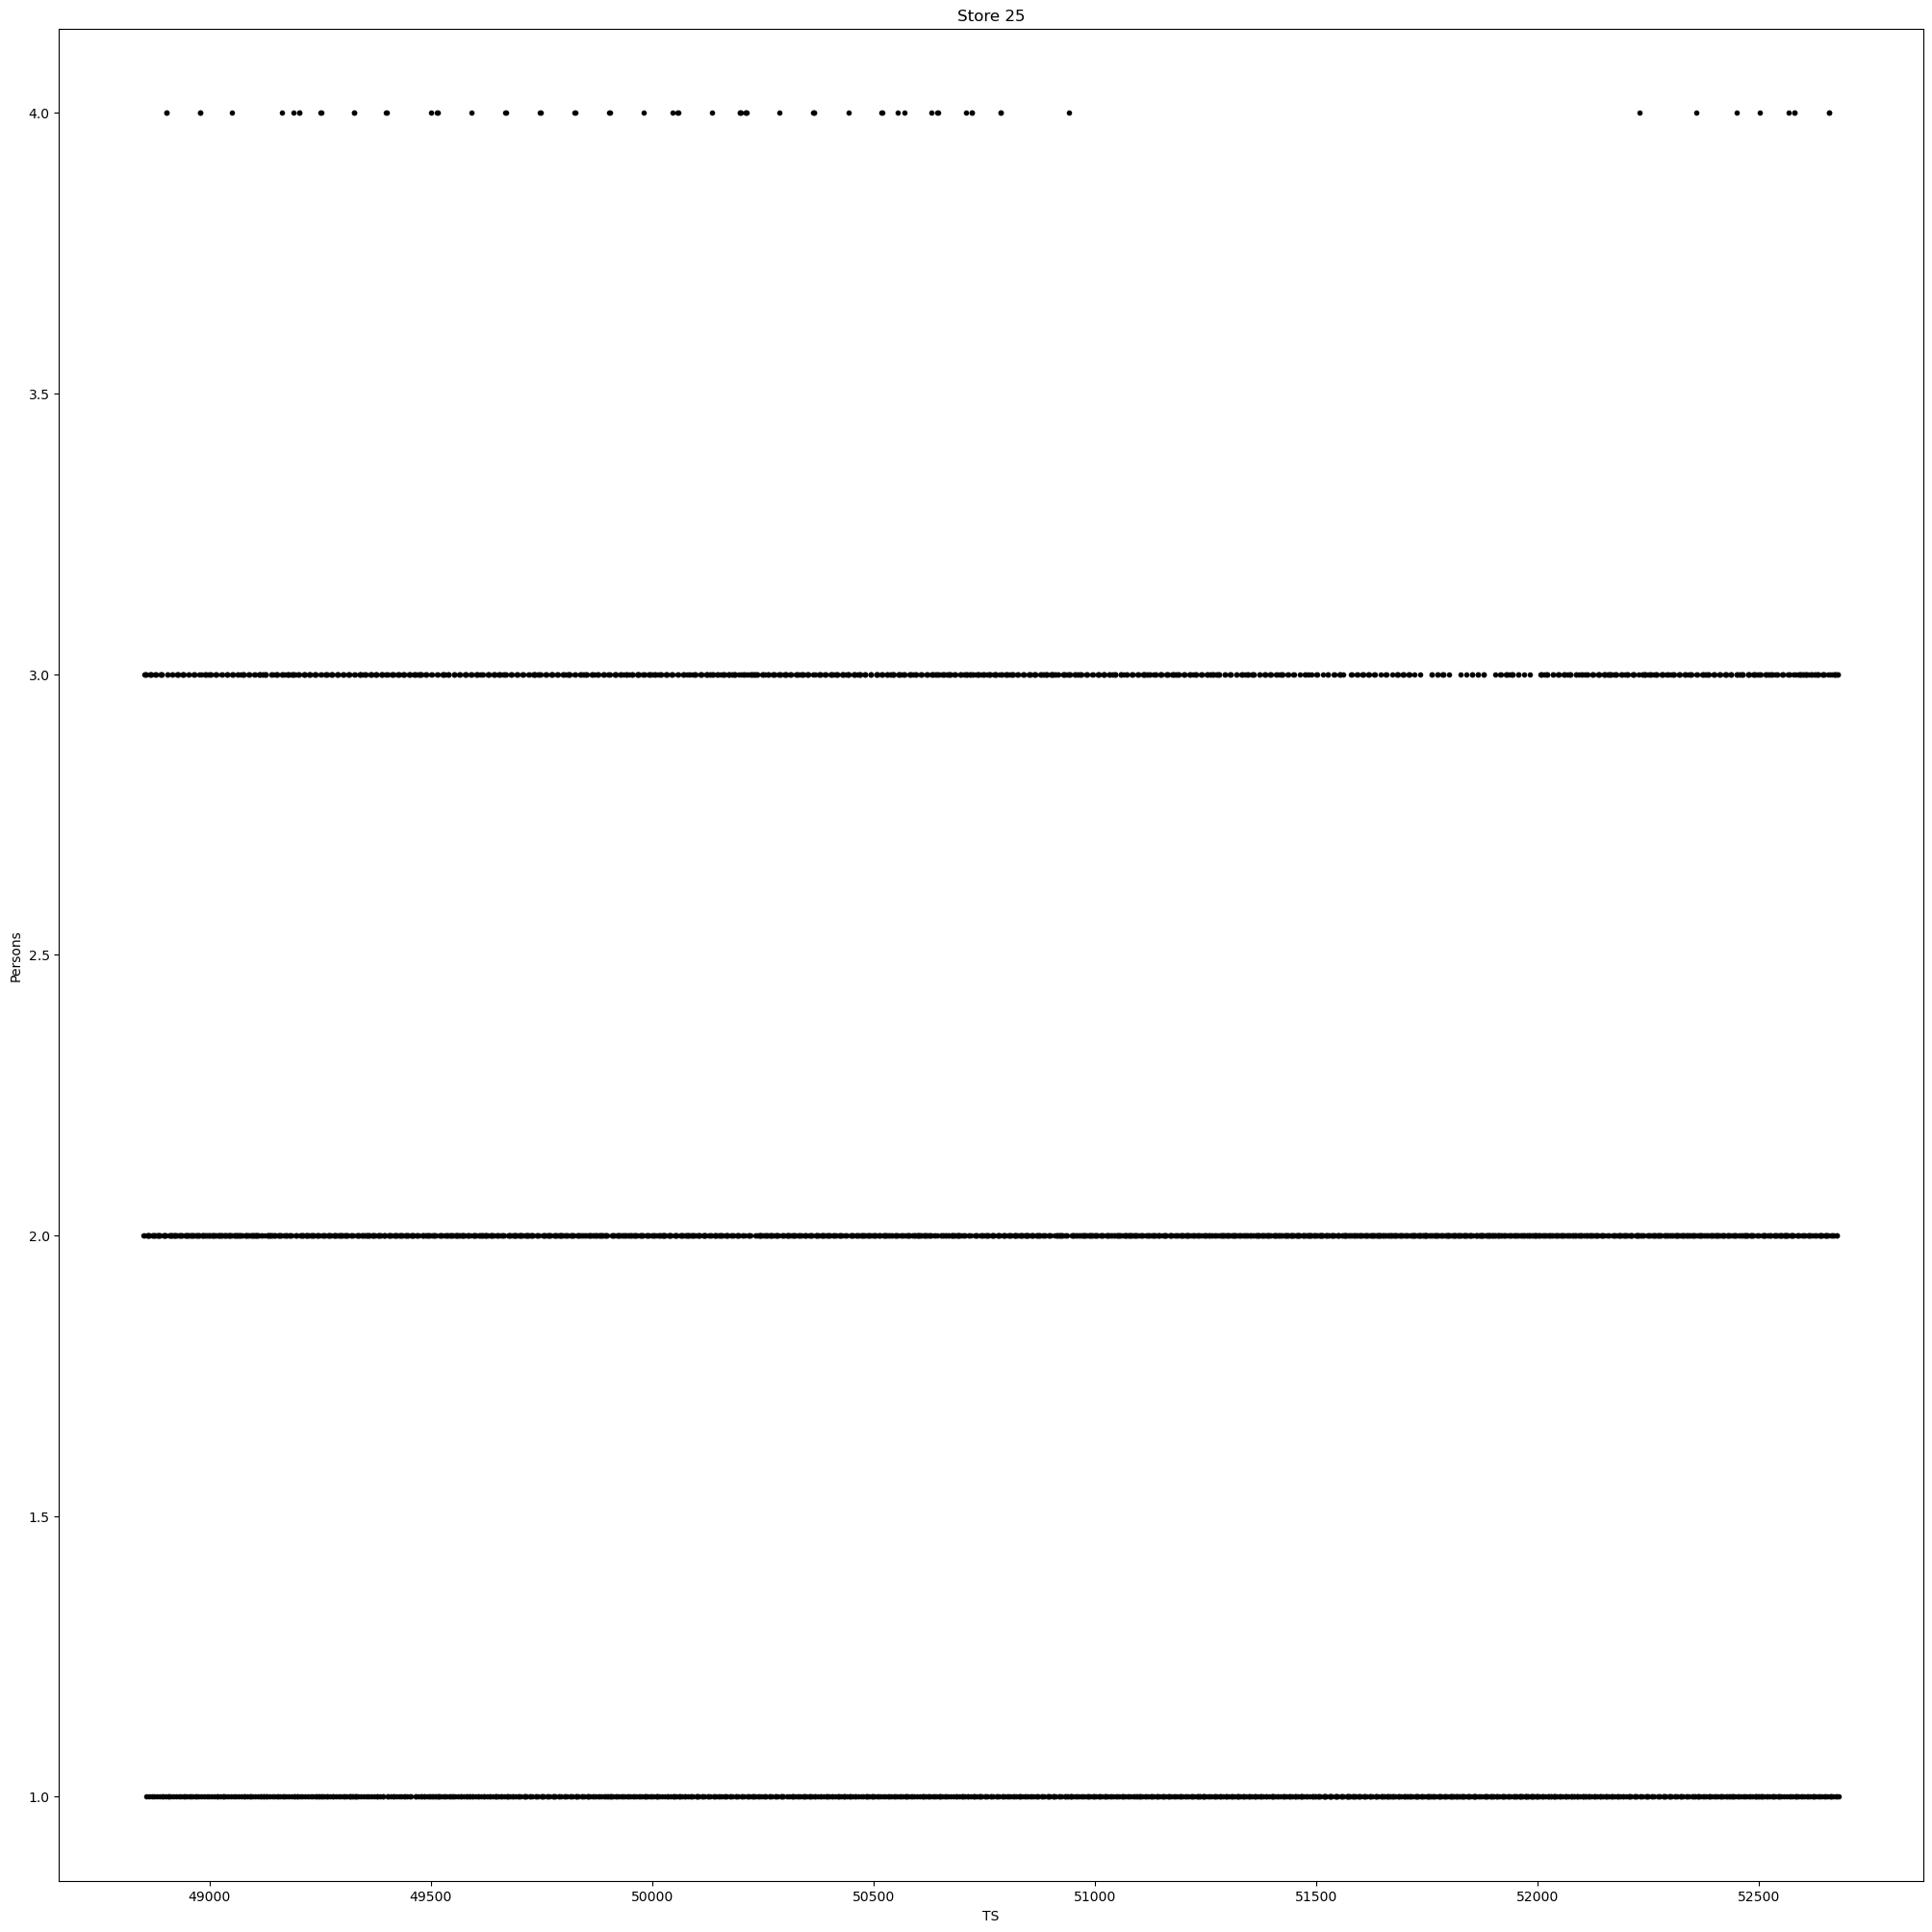

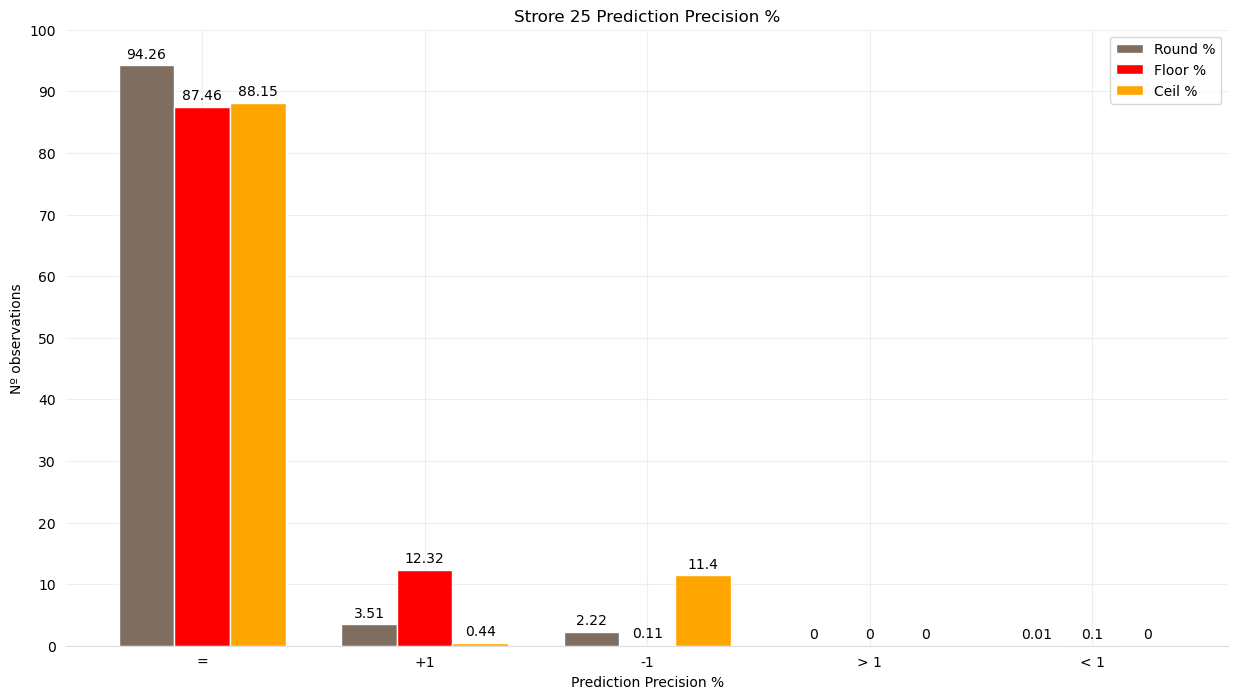

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6579 |        245 |        155 |          0 |          1  
  Floor                |       6105 |        860 |          8 |          0 |          7  
  Ceil                 |       6153 |         31 |        796 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.26 |       3.51 |       2.22 |        0.0 |       0.01  
  Floor % 

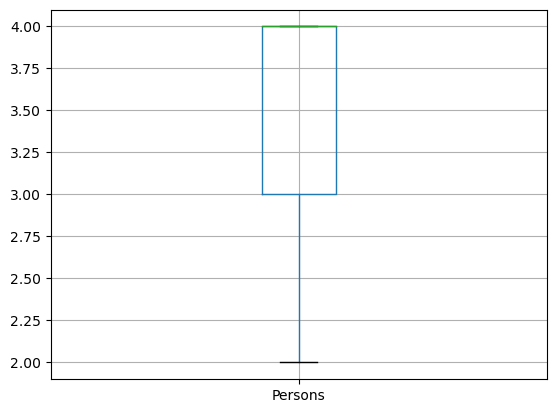

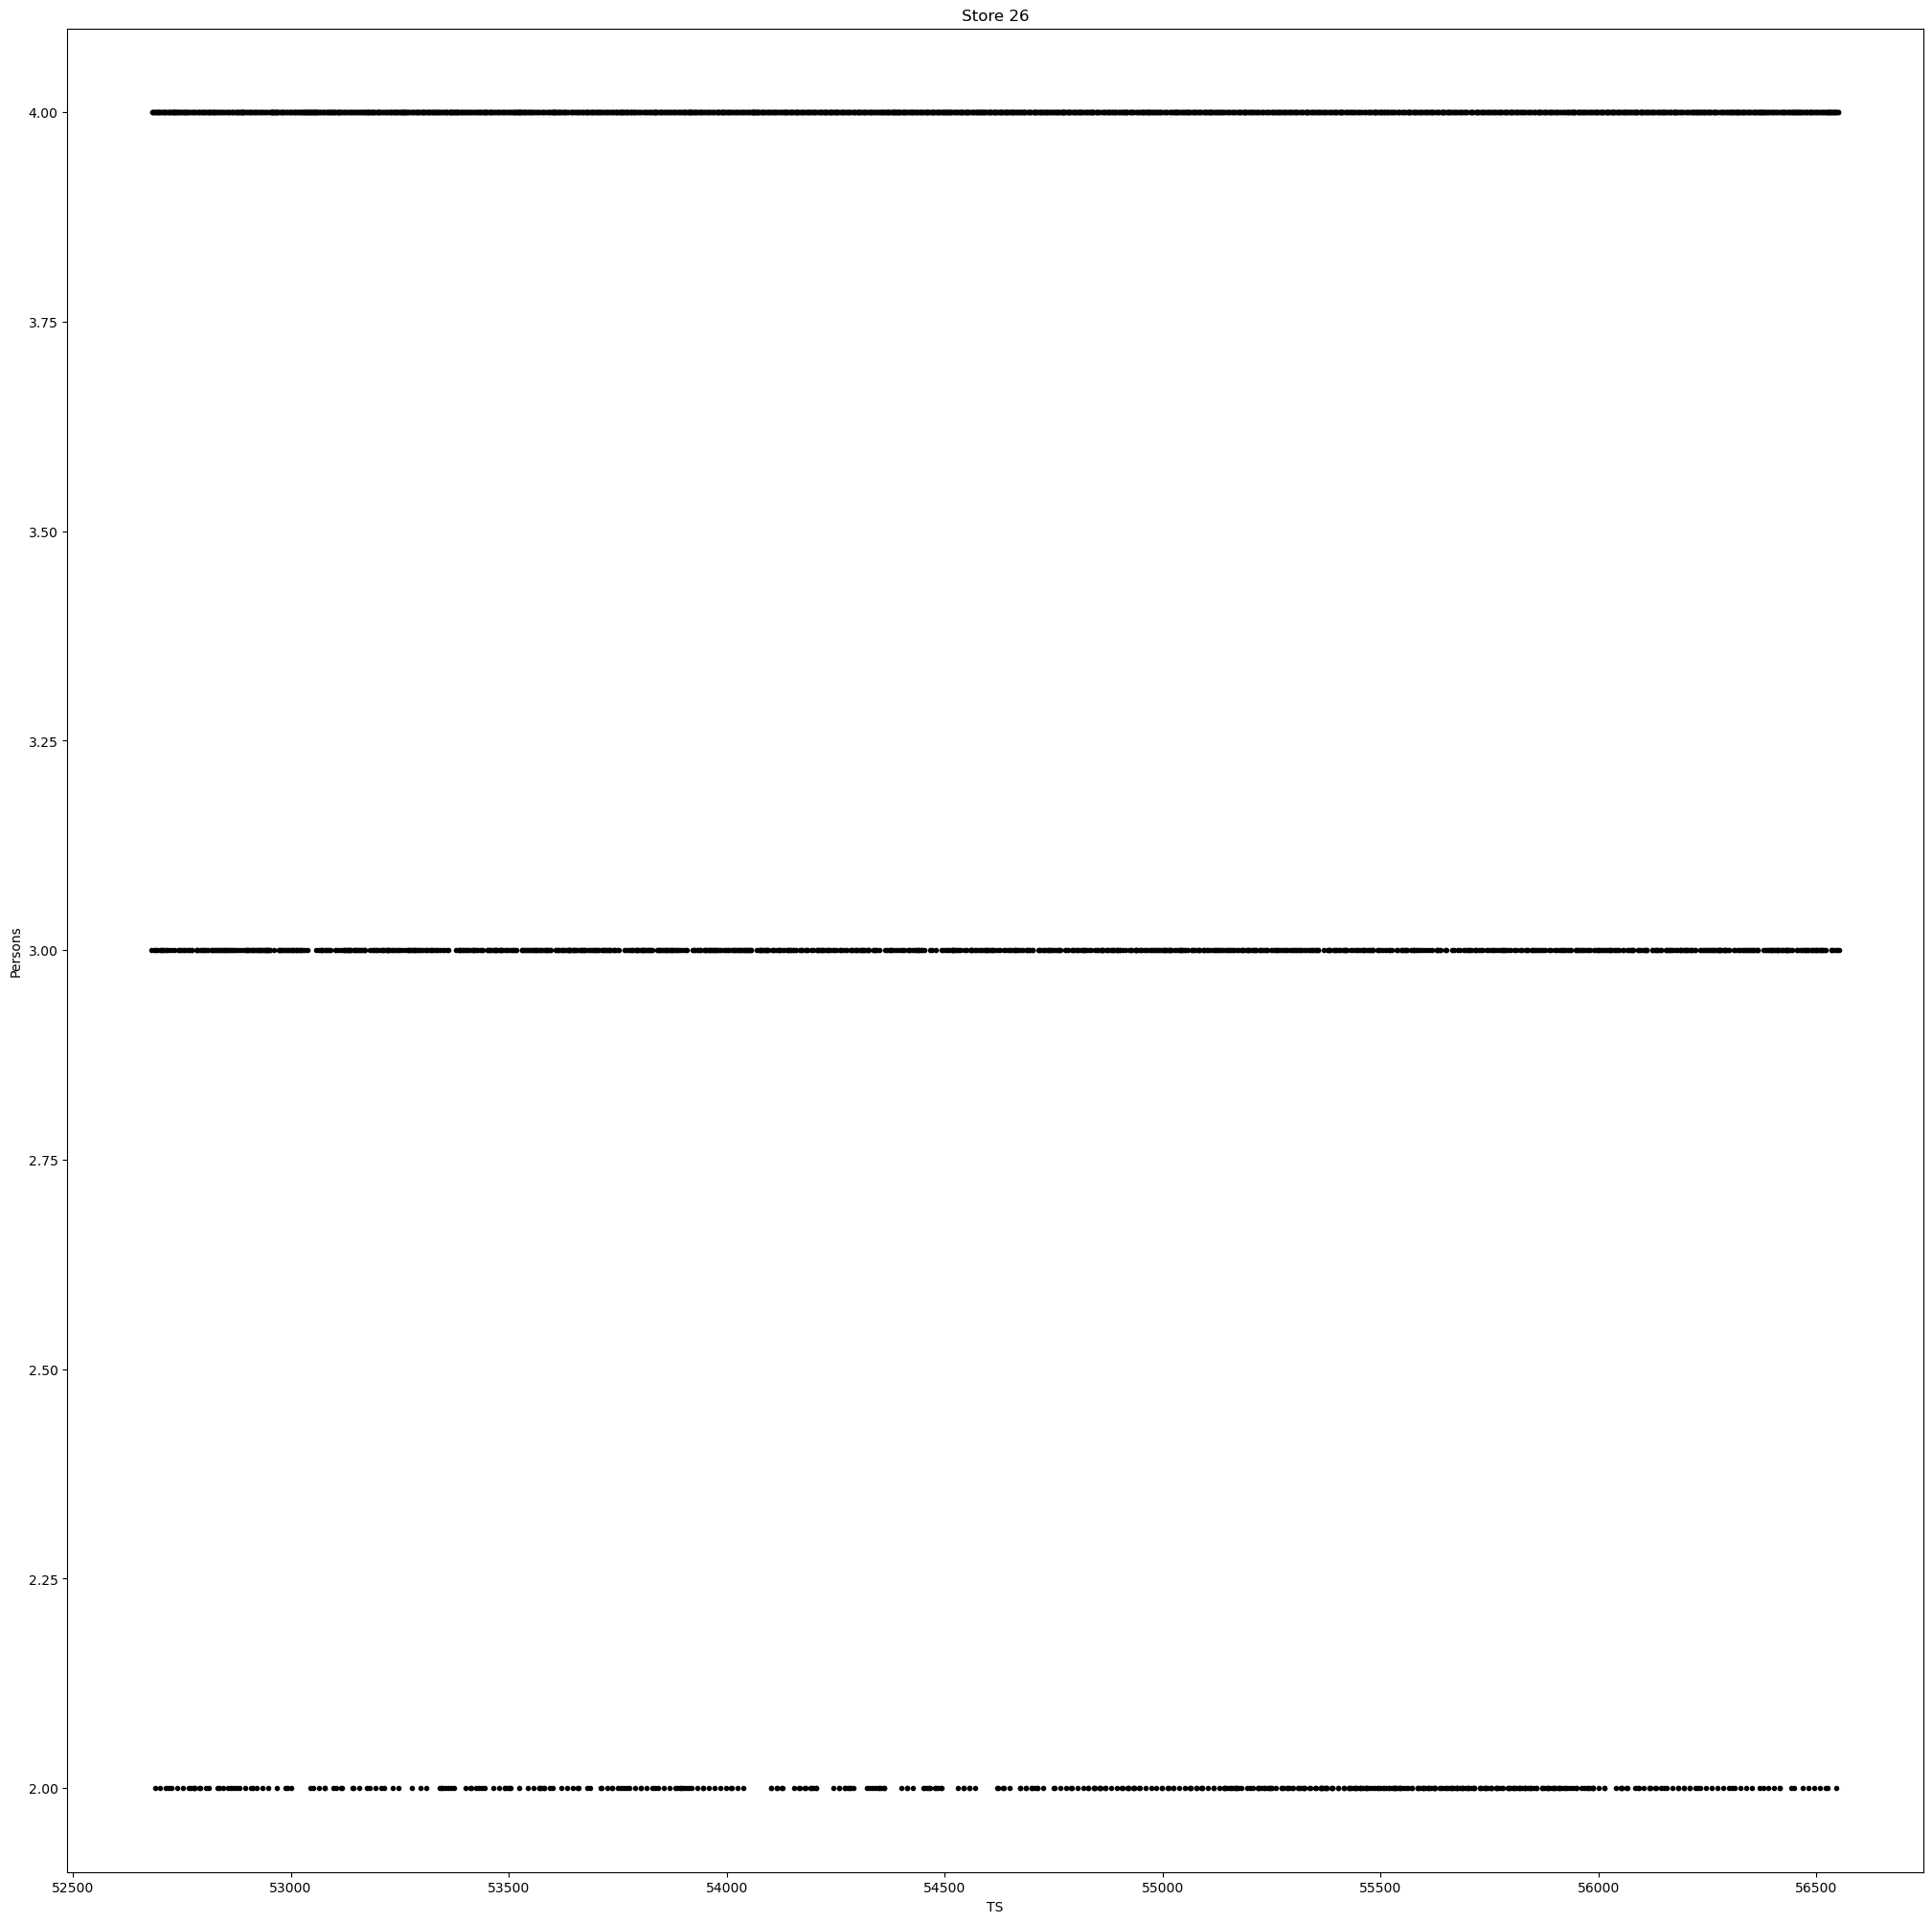

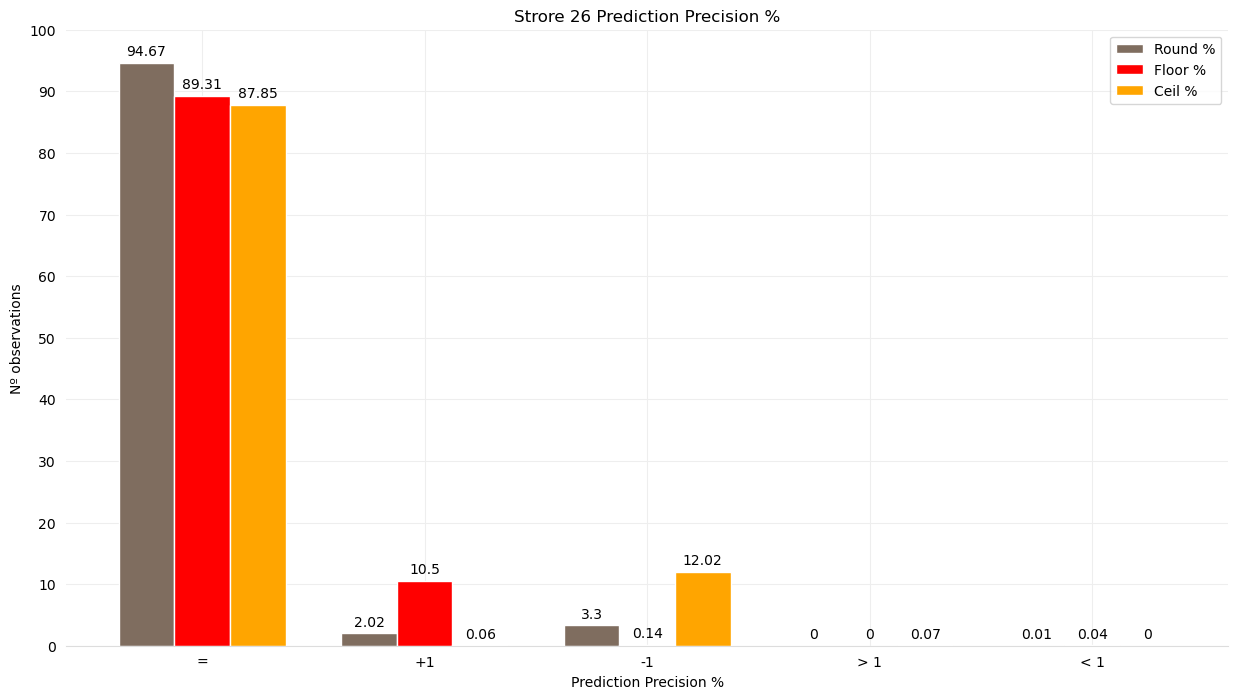

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6608 |        141 |        230 |          0 |          1  
  Floor                |       6234 |        733 |         10 |          0 |          3  
  Ceil                 |       6132 |          4 |        839 |          5 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.67 |       2.02 |        3.3 |        0.0 |       0.01  
  Floor % 

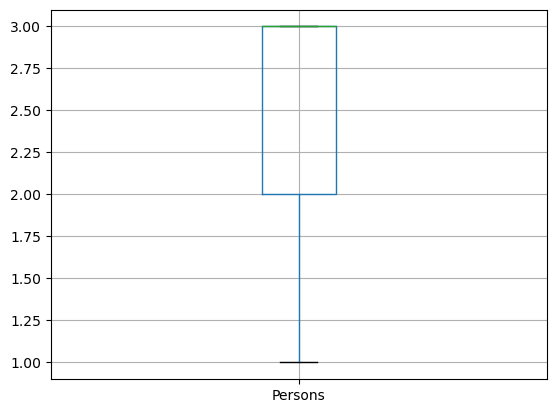

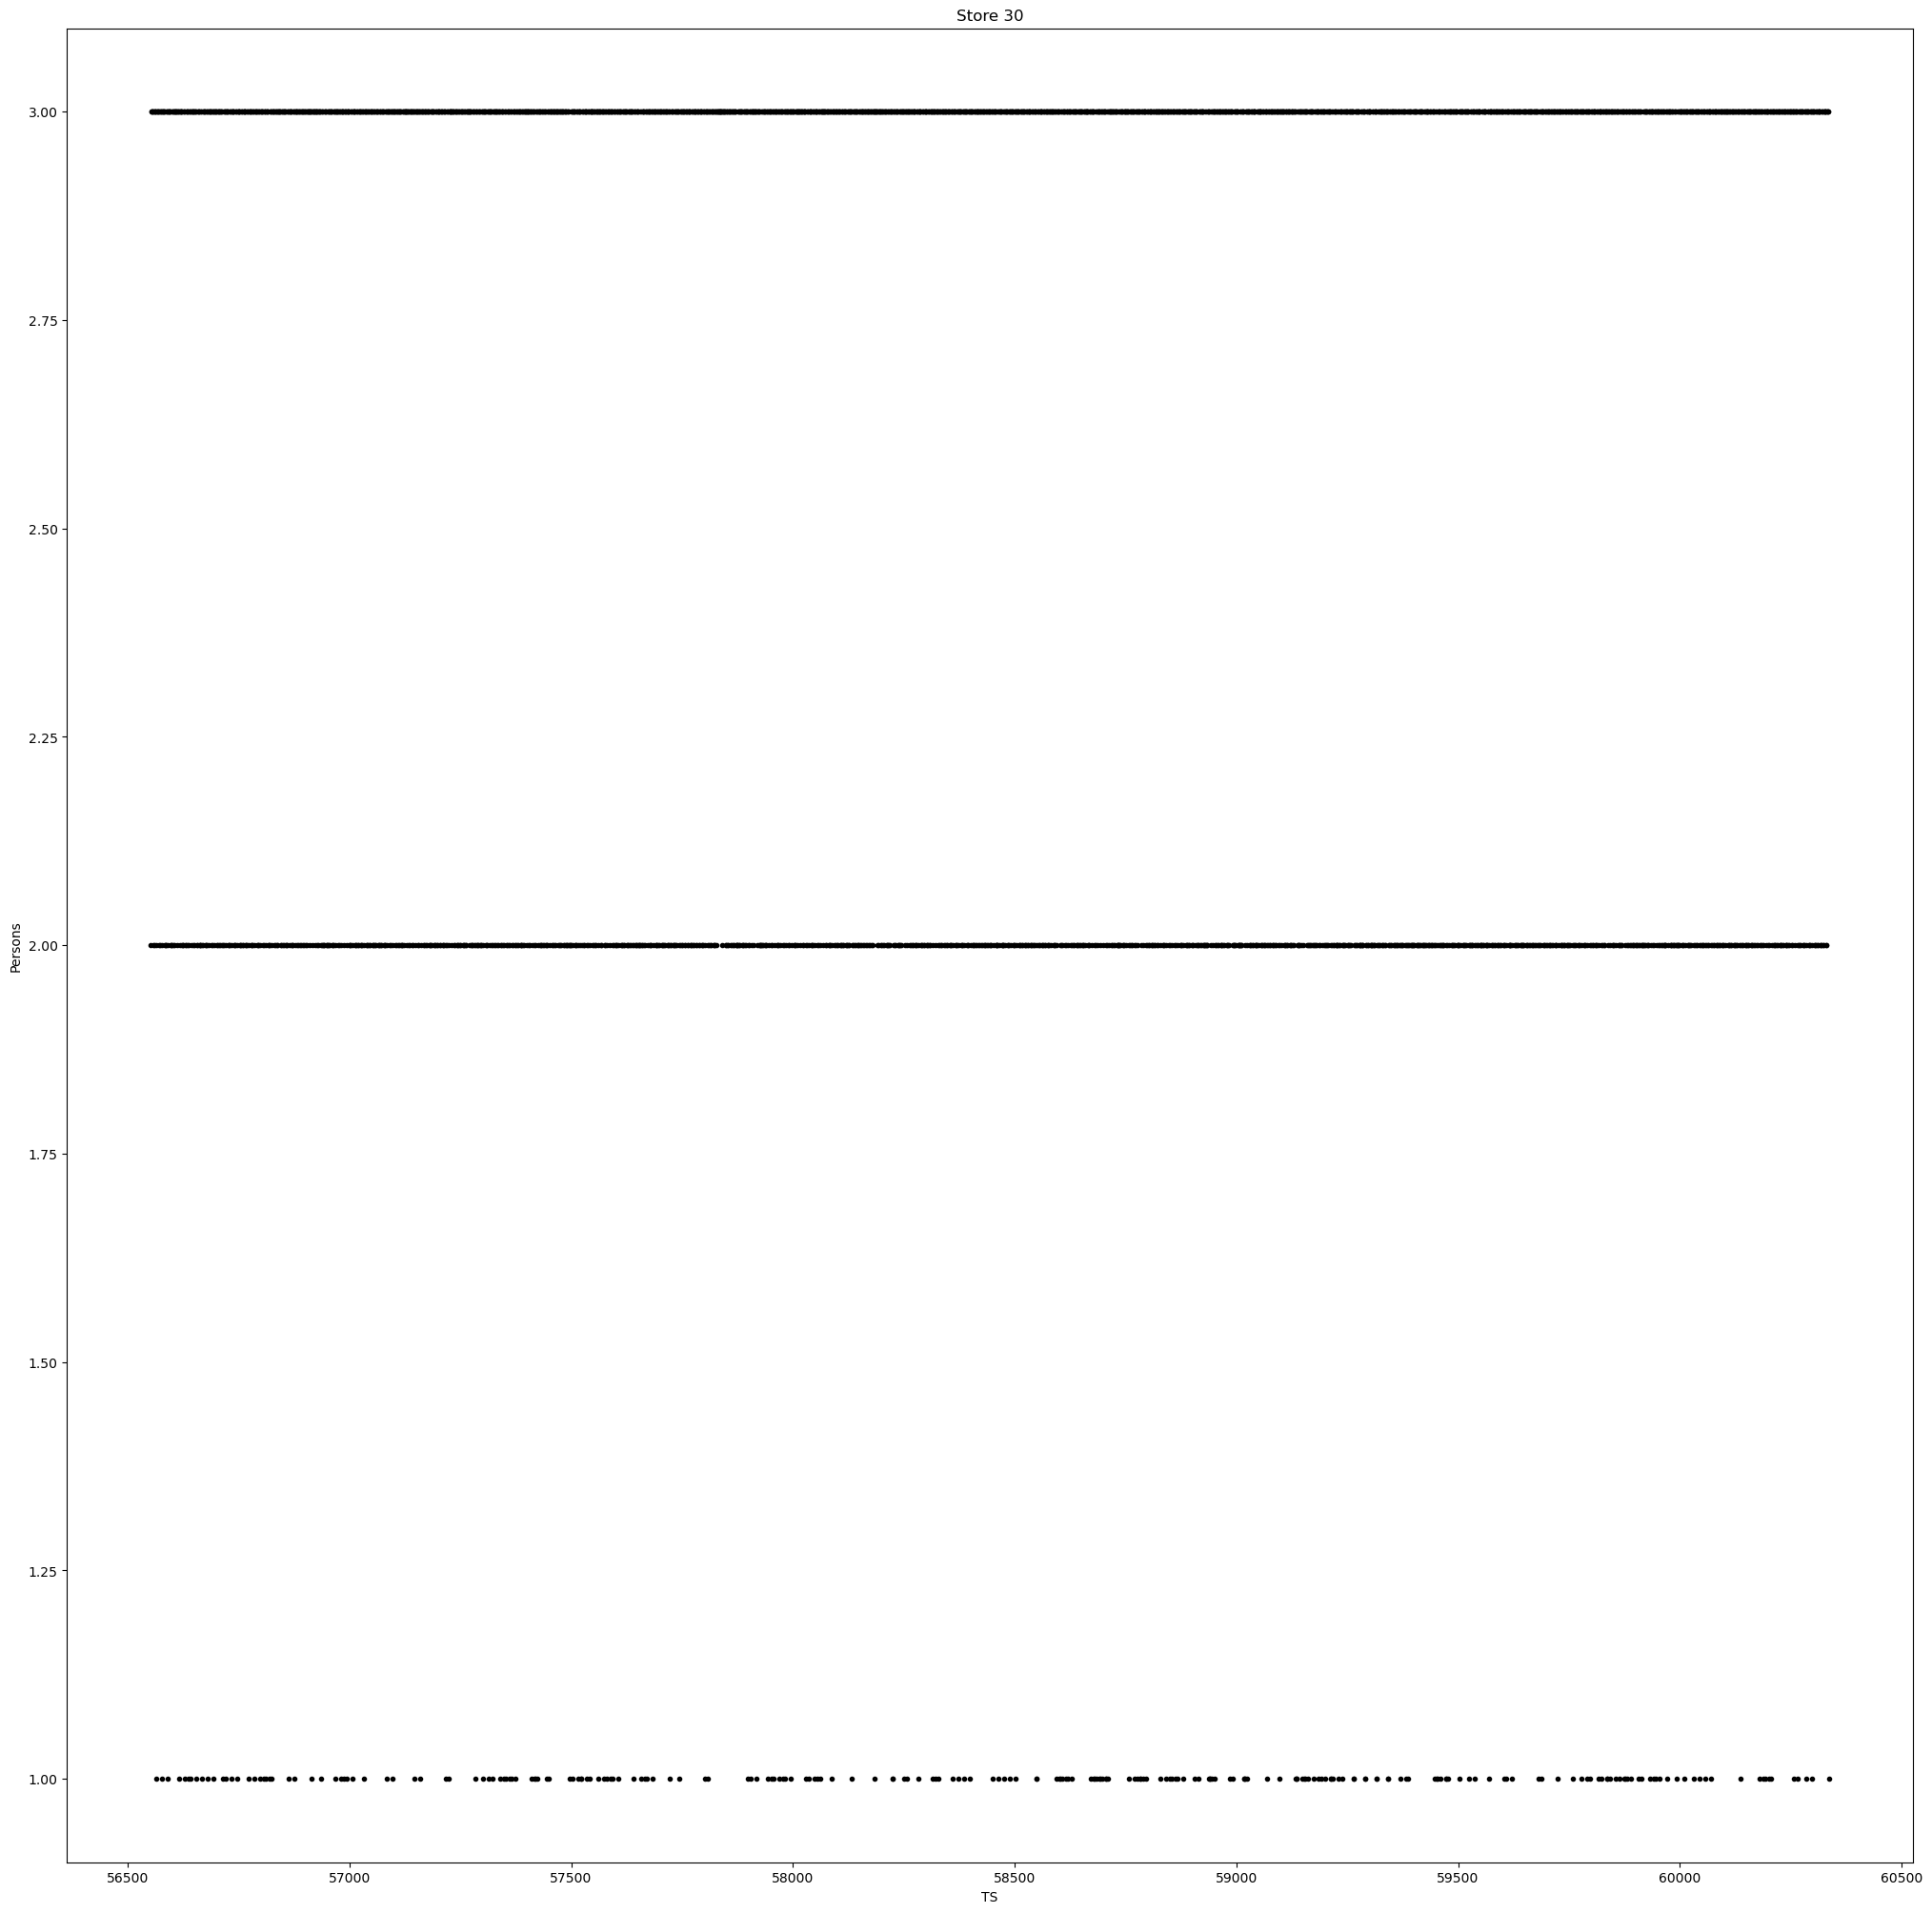

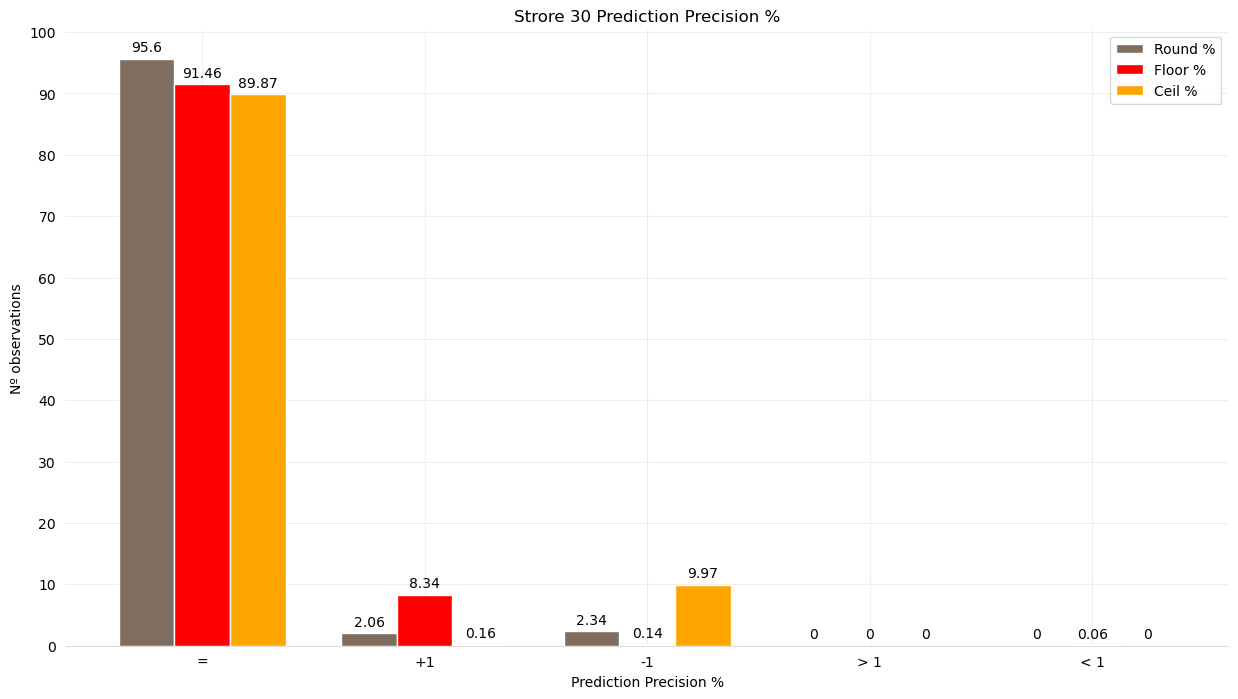

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6673 |        144 |        163 |          0 |          0  
  Floor                |       6384 |        582 |         10 |          0 |          4  
  Ceil                 |       6273 |         11 |        696 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |       95.6 |       2.06 |       2.34 |        0.0 |        0.0  
  Floor % 

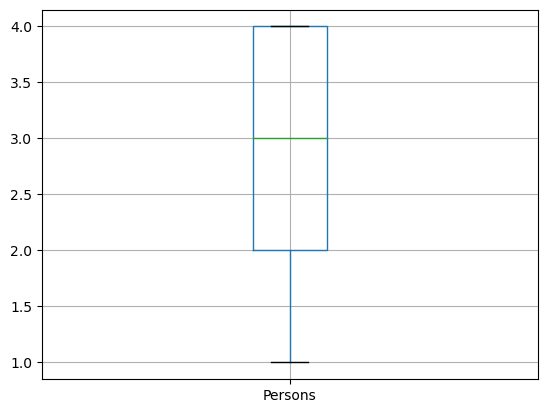

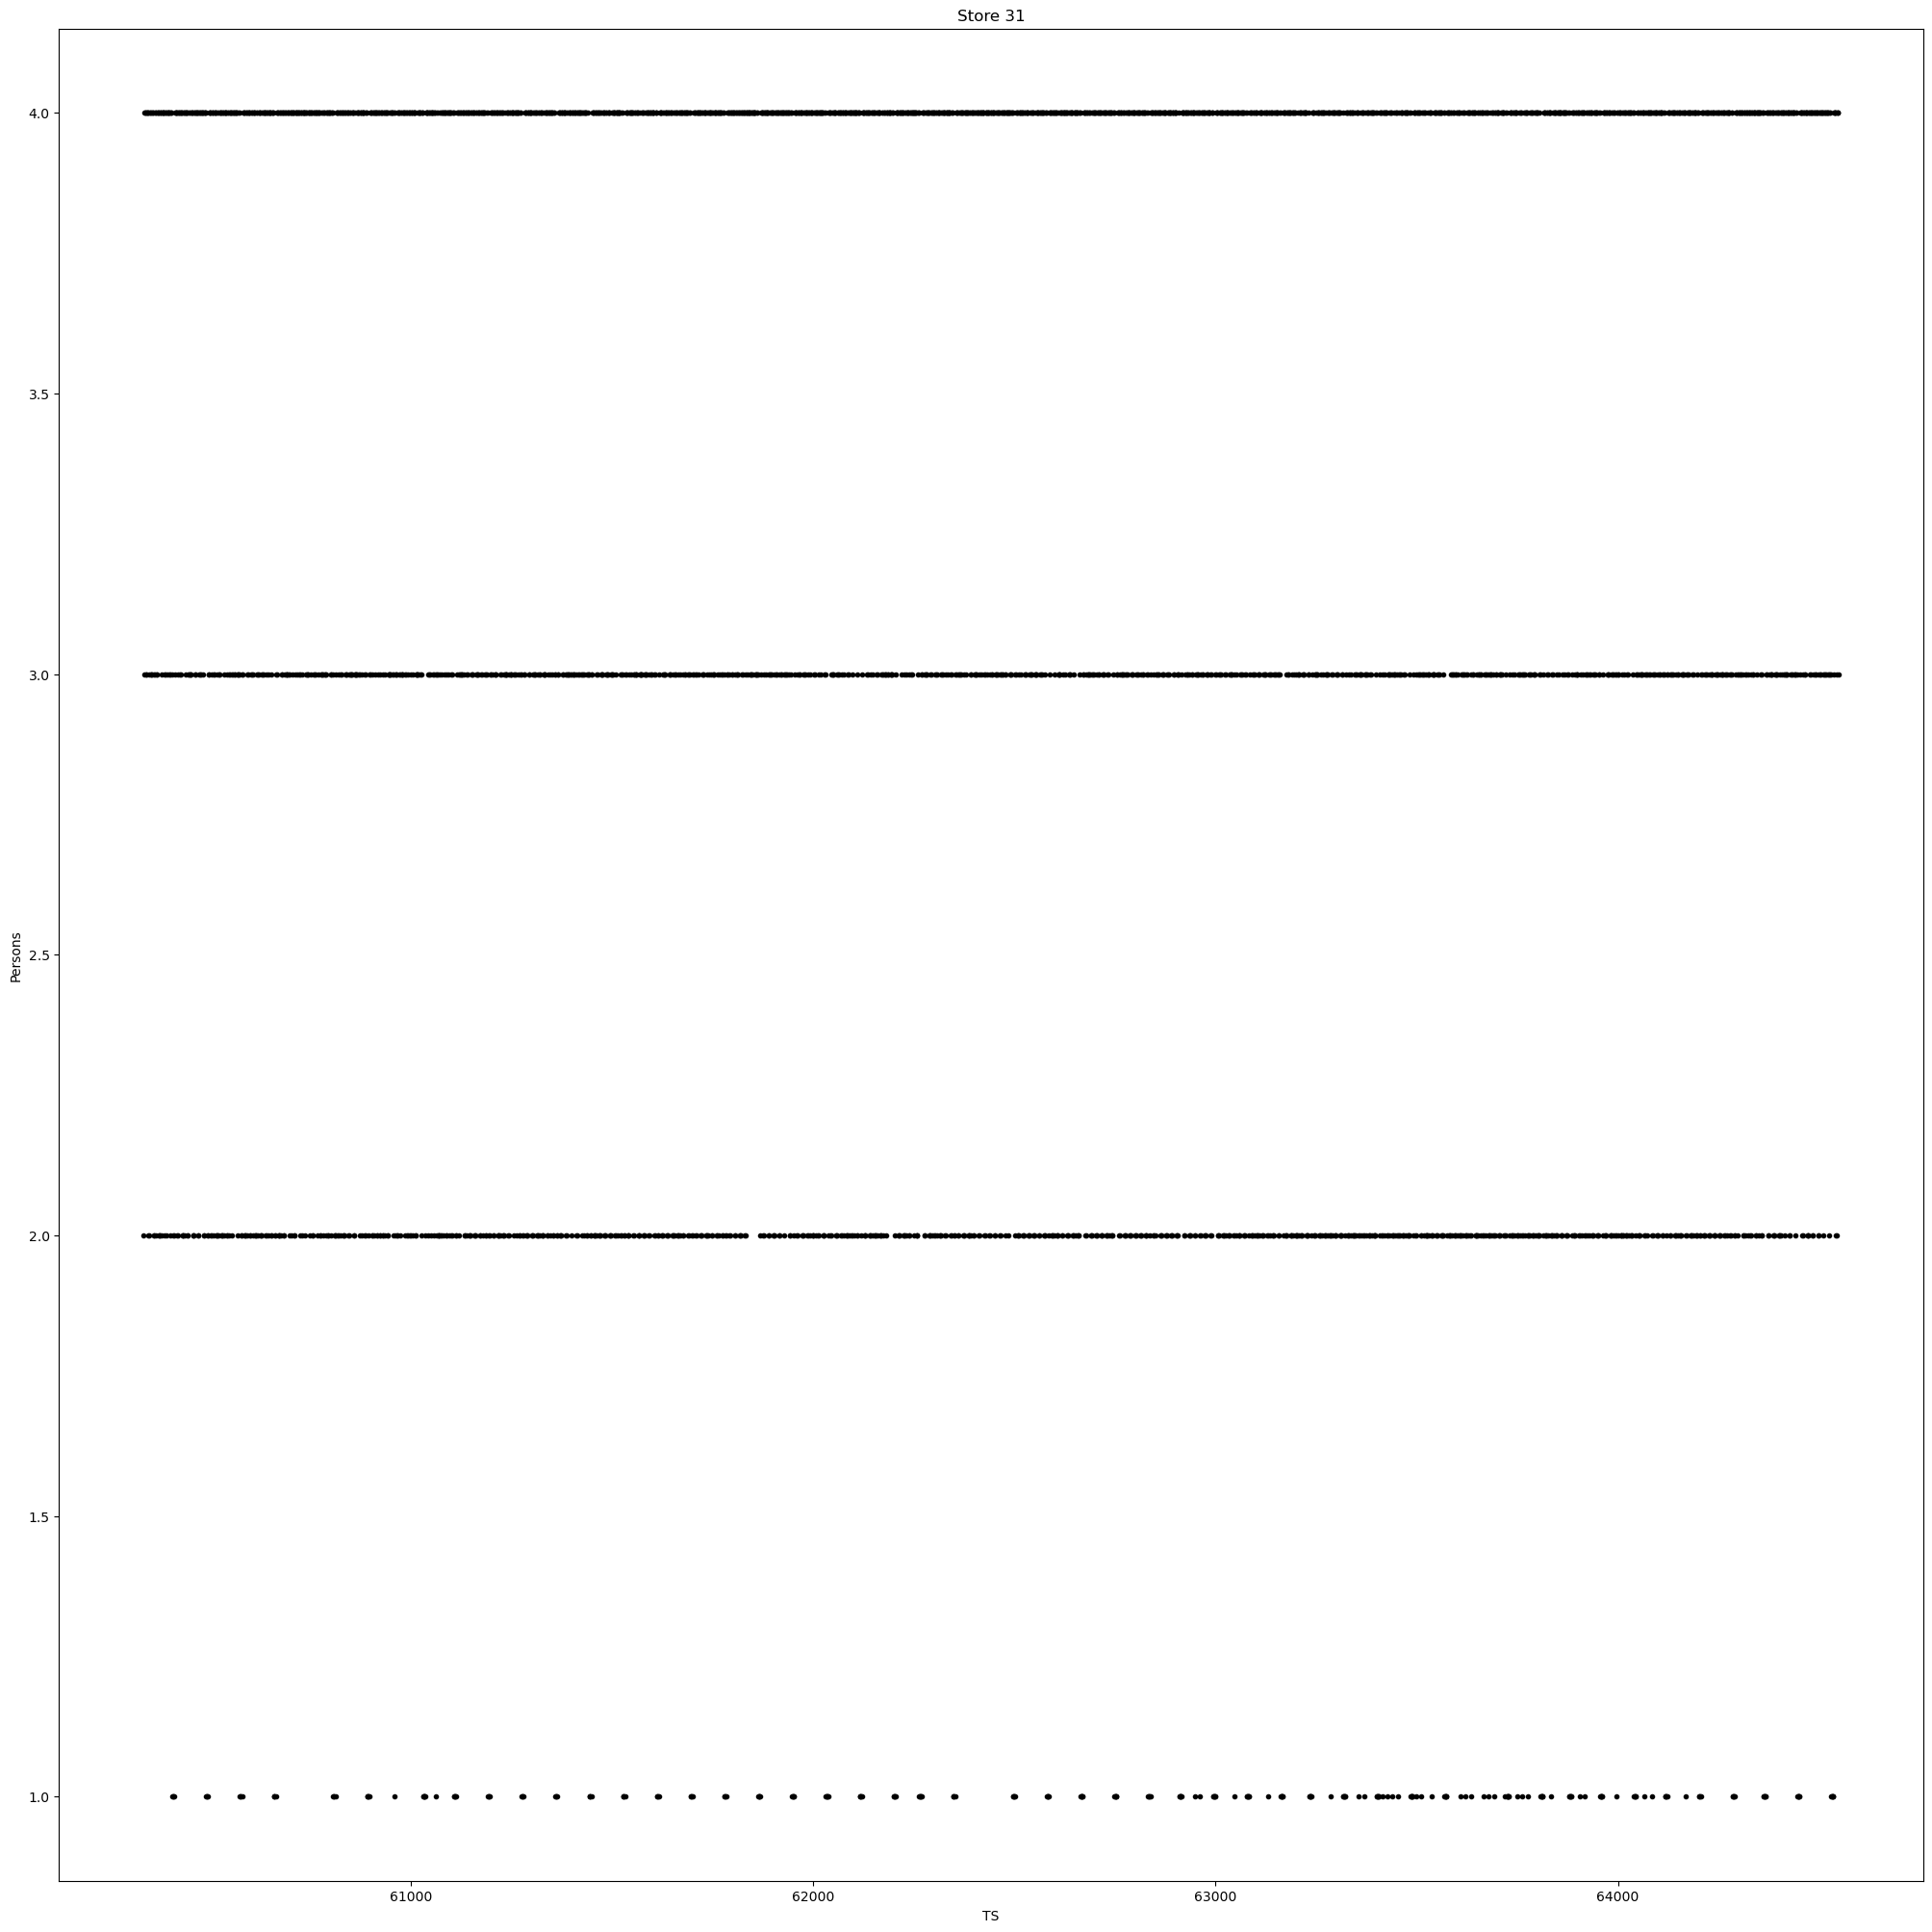

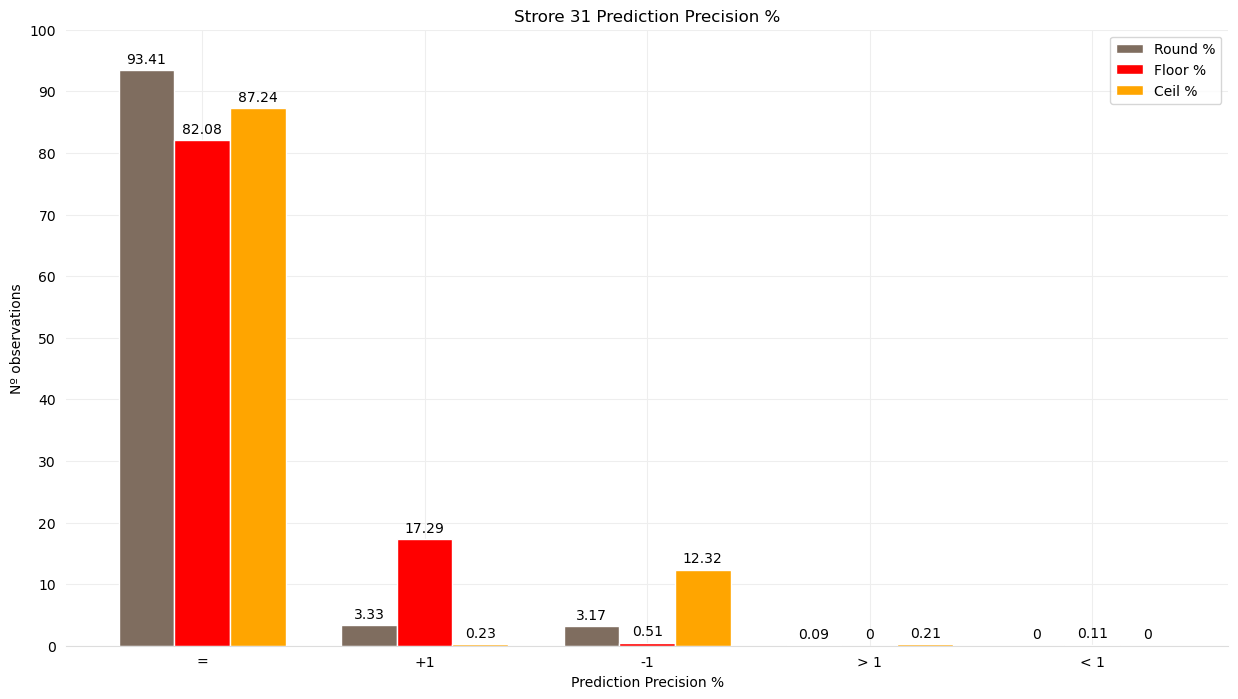

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6538 |        233 |        222 |          6 |          0  
  Floor                |       5745 |       1210 |         36 |          0 |          8  
  Ceil                 |       6106 |         16 |        862 |         15 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.41 |       3.33 |       3.17 |       0.09 |        0.0  
  Floor % 

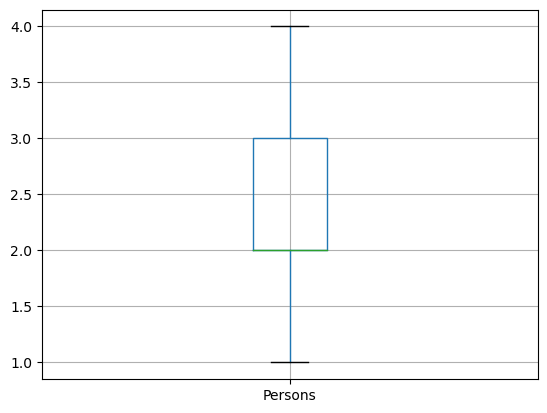

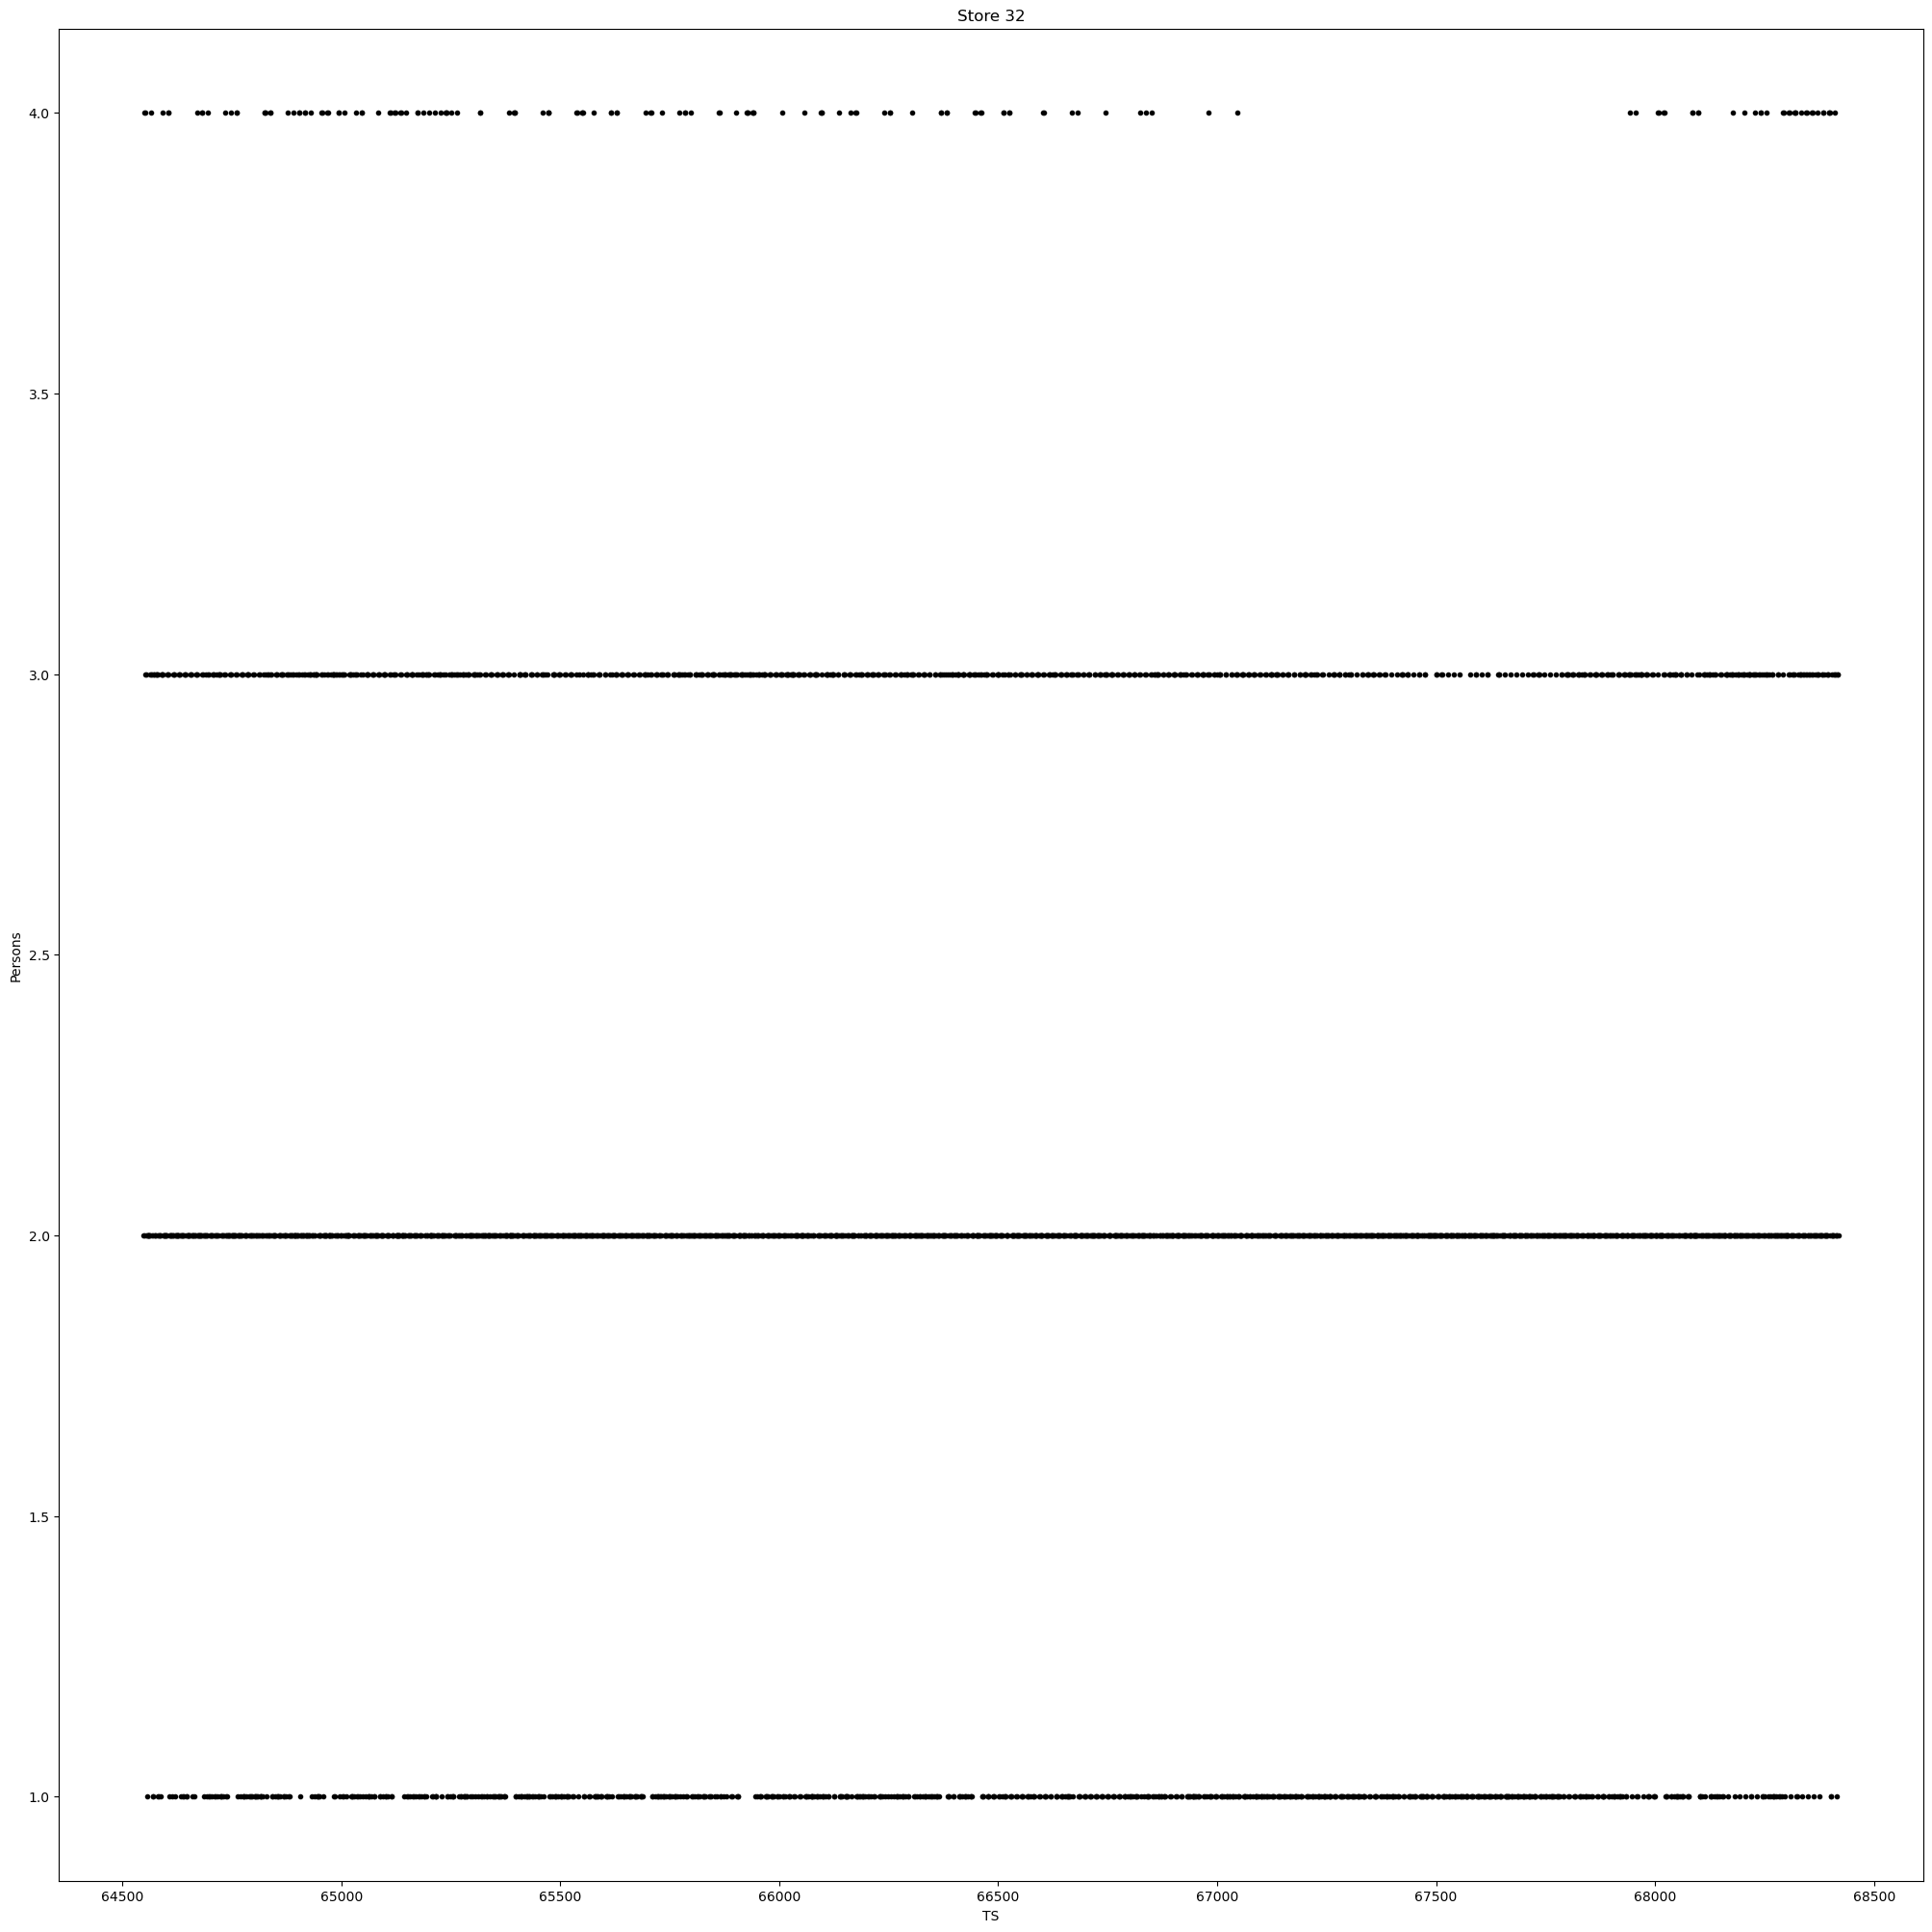

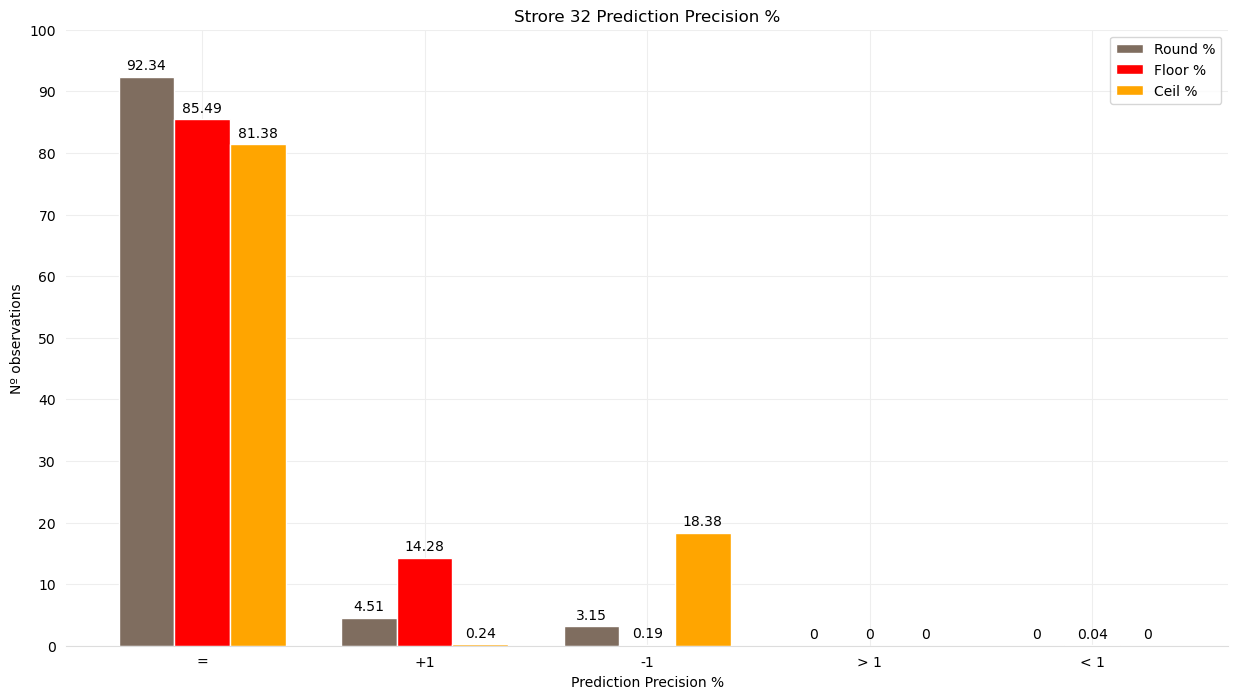

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6445 |        315 |        220 |          0 |          0  
  Floor                |       5967 |        997 |         13 |          0 |          3  
  Ceil                 |       5680 |         17 |       1283 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      92.34 |       4.51 |       3.15 |        0.0 |        0.0  
  Floor % 

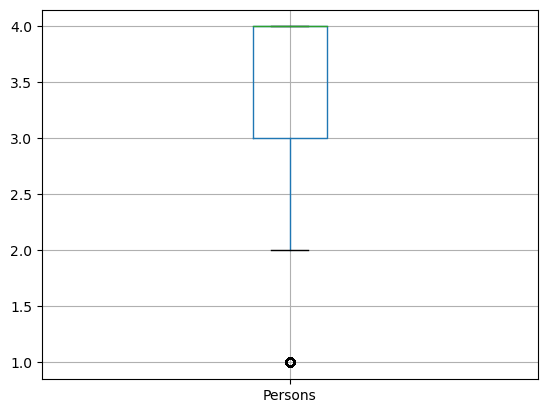

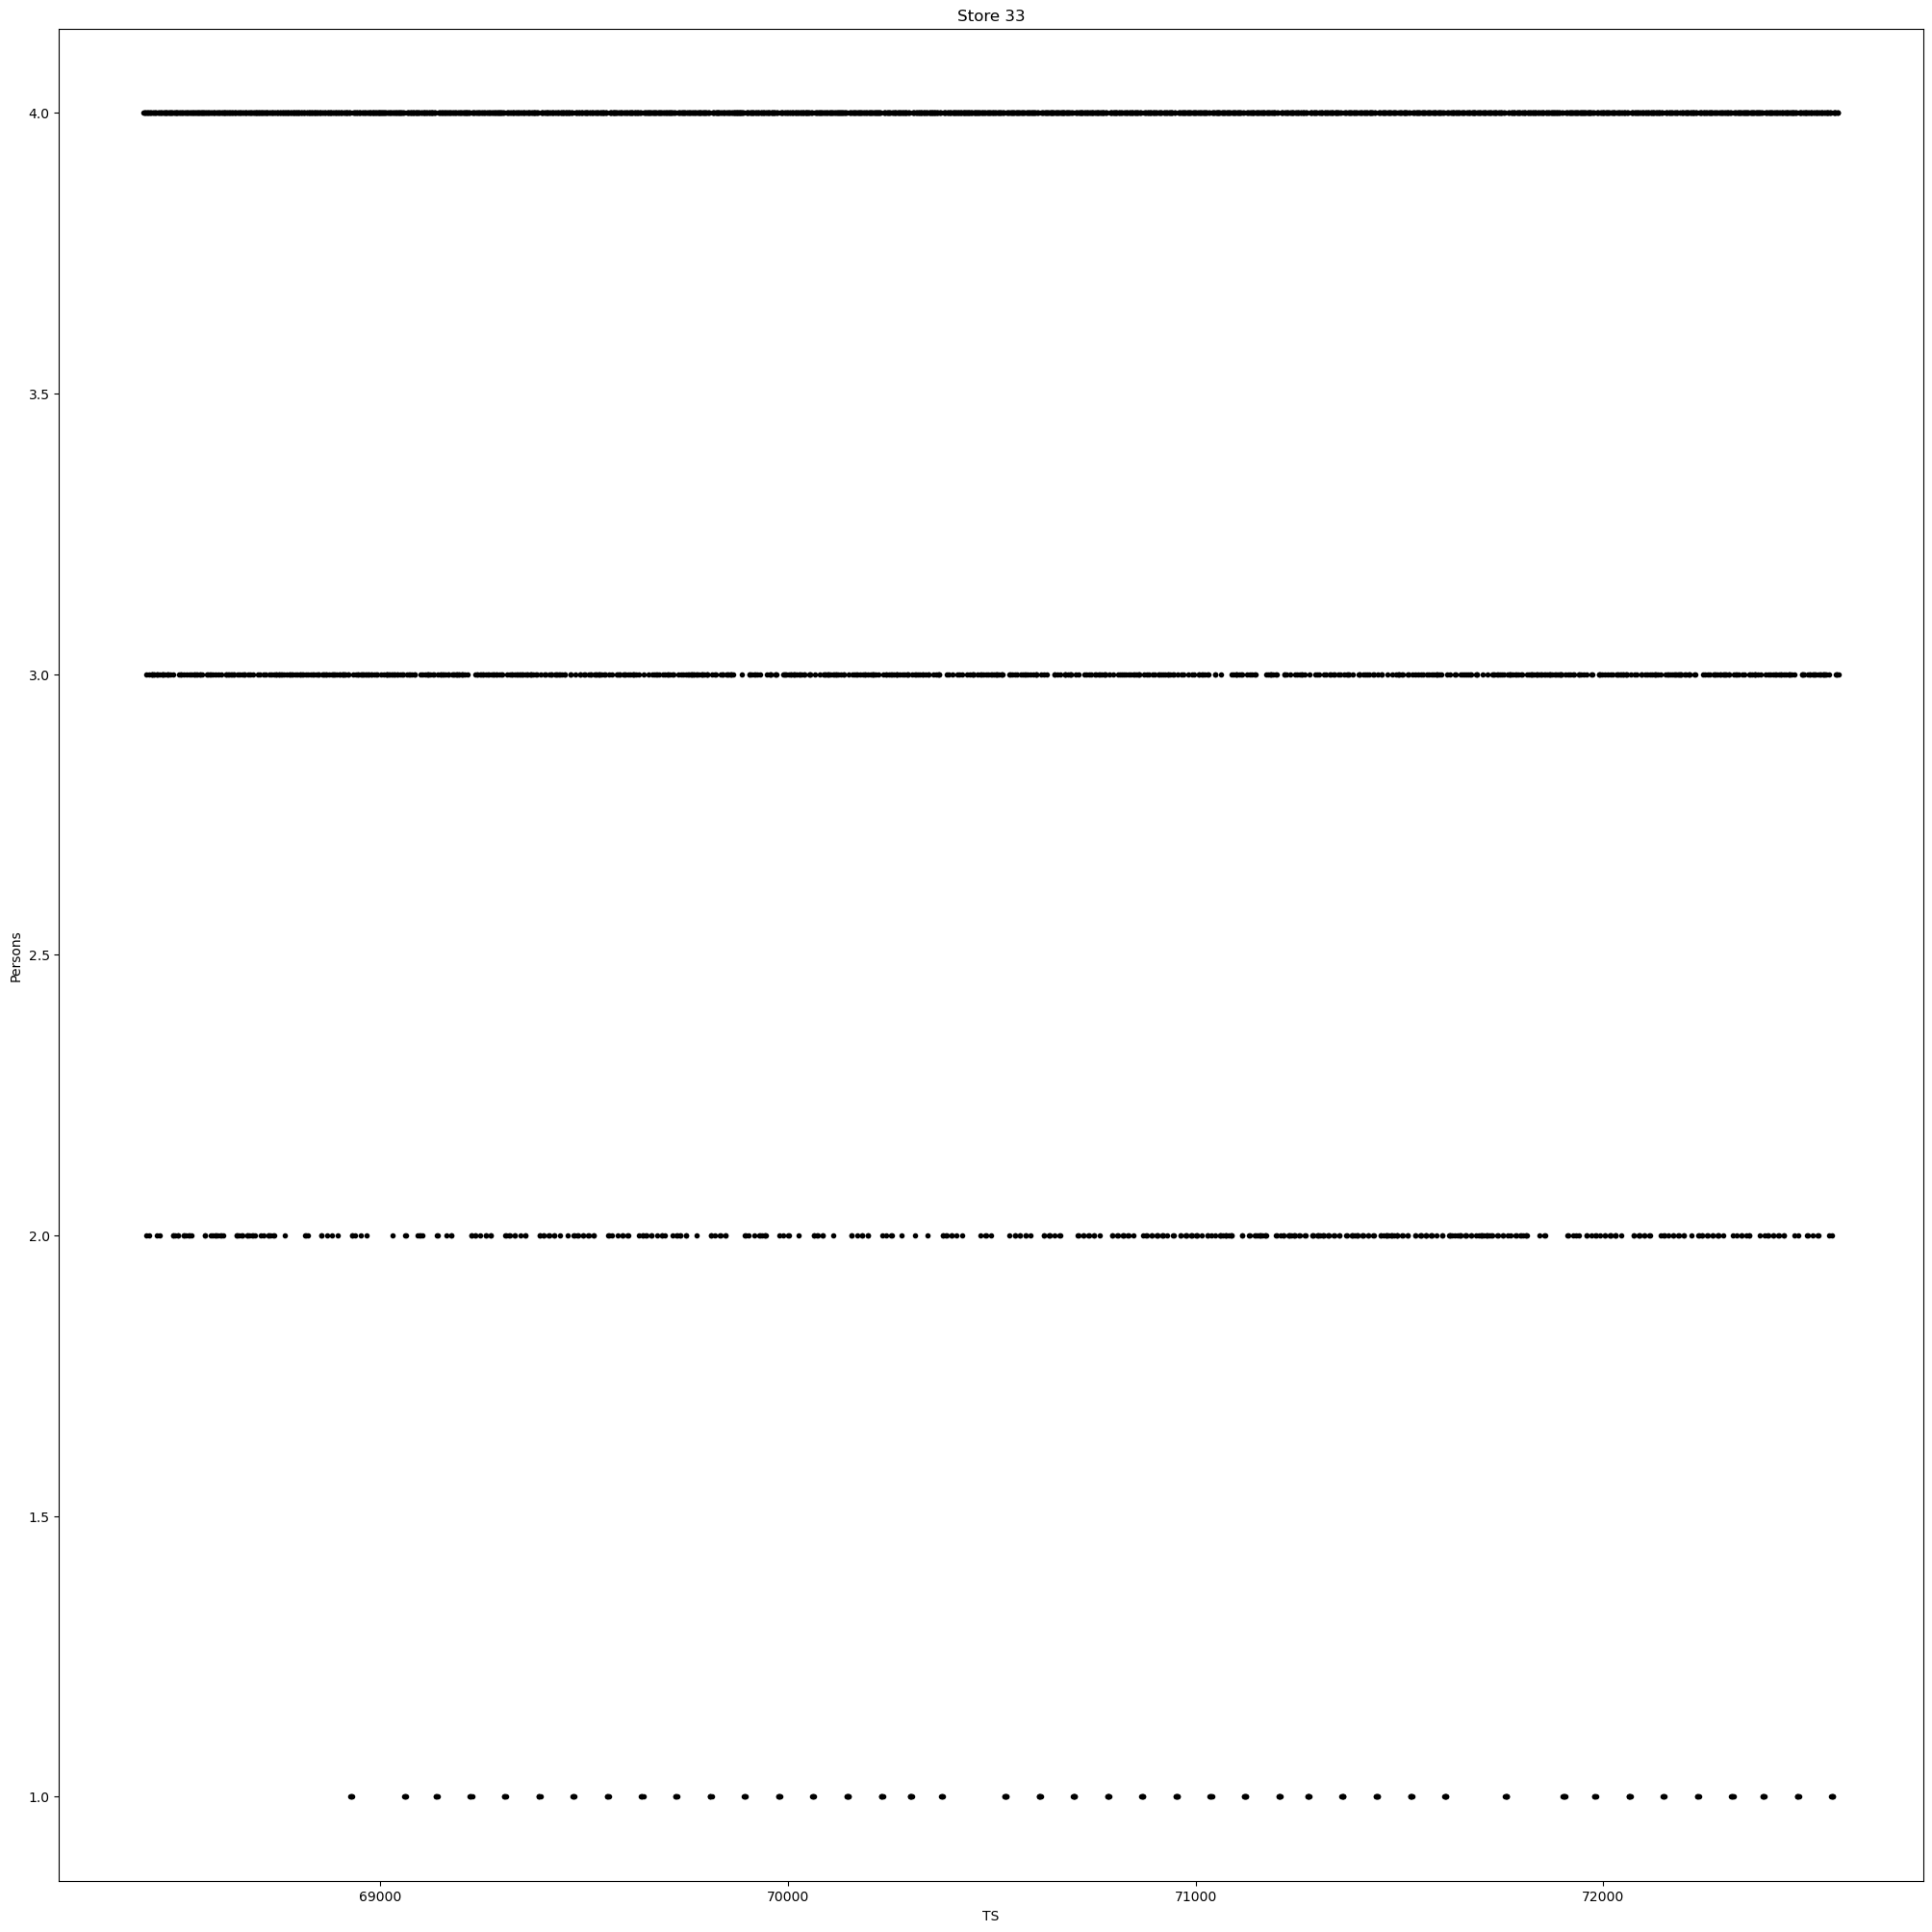

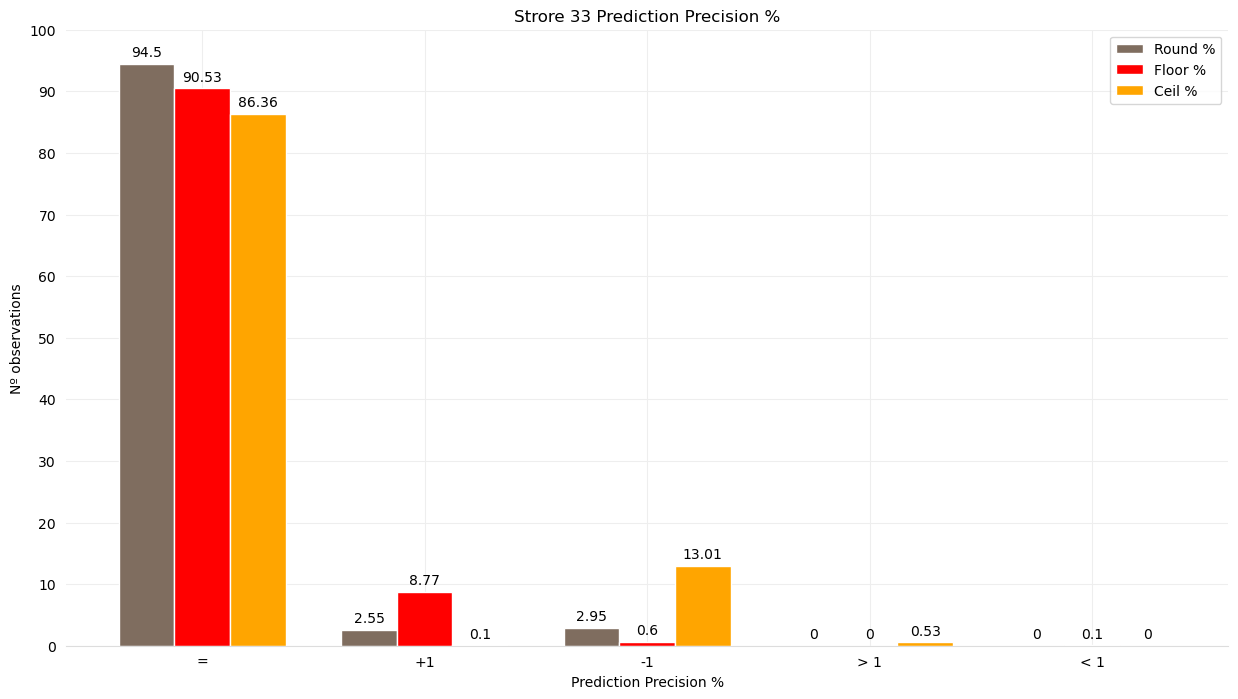

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6596 |        178 |        206 |          0 |          0  
  Floor                |       6319 |        612 |         42 |          0 |          7  
  Ceil                 |       6028 |          7 |        908 |         37 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |       94.5 |       2.55 |       2.95 |        0.0 |        0.0  
  Floor % 

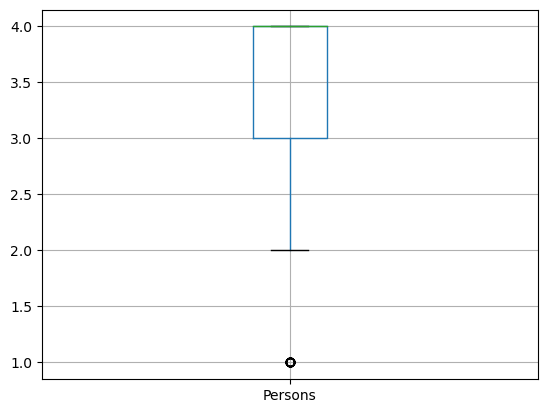

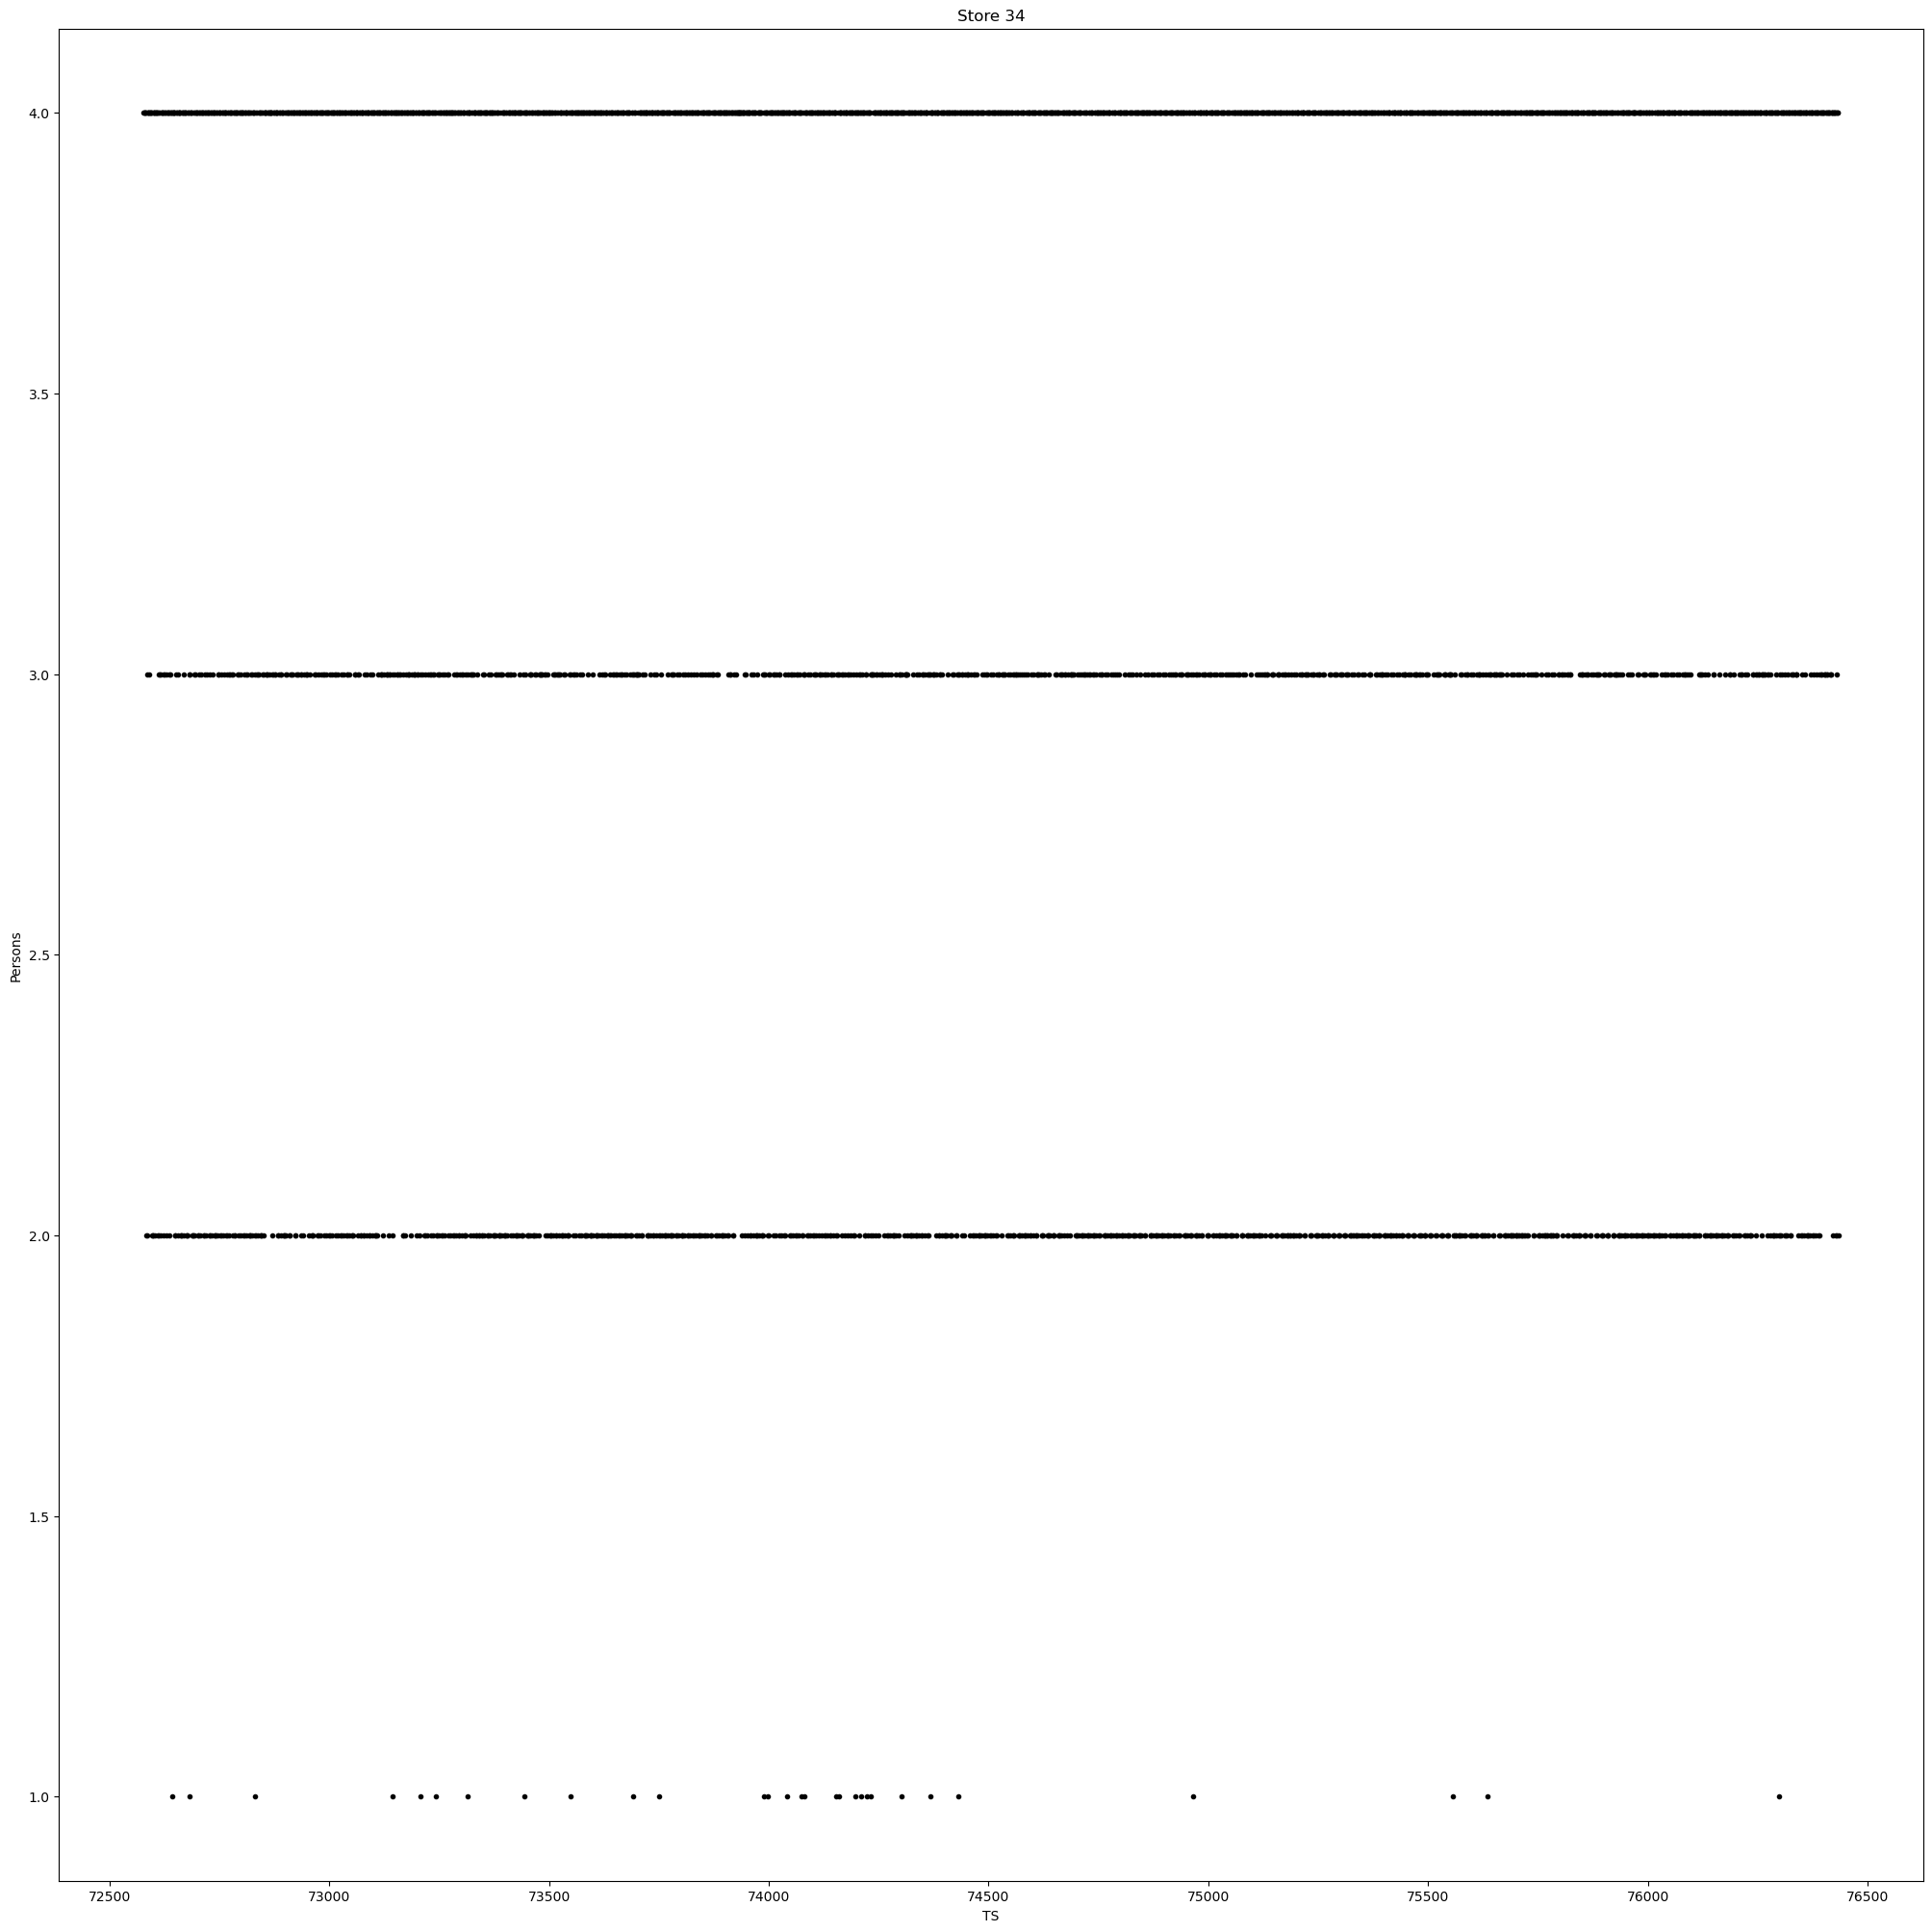

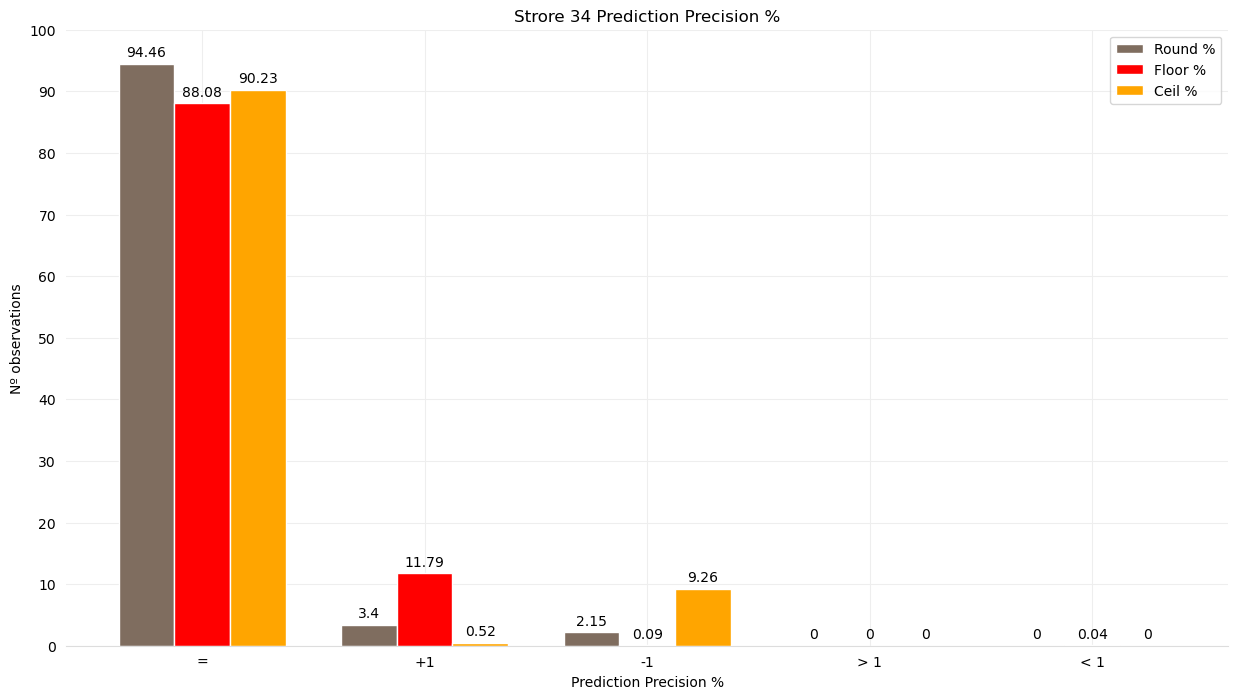

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6593 |        237 |        150 |          0 |          0  
  Floor                |       6148 |        823 |          6 |          0 |          3  
  Ceil                 |       6298 |         36 |        646 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.46 |        3.4 |       2.15 |        0.0 |        0.0  
  Floor % 

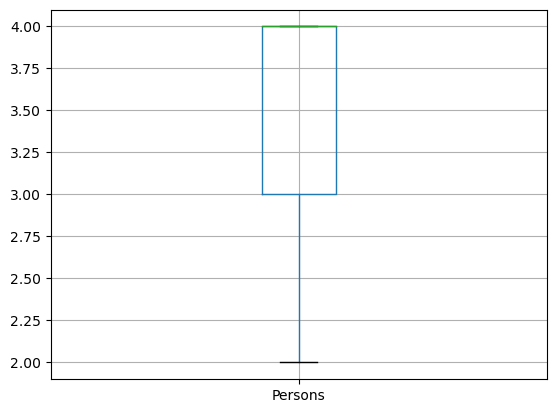

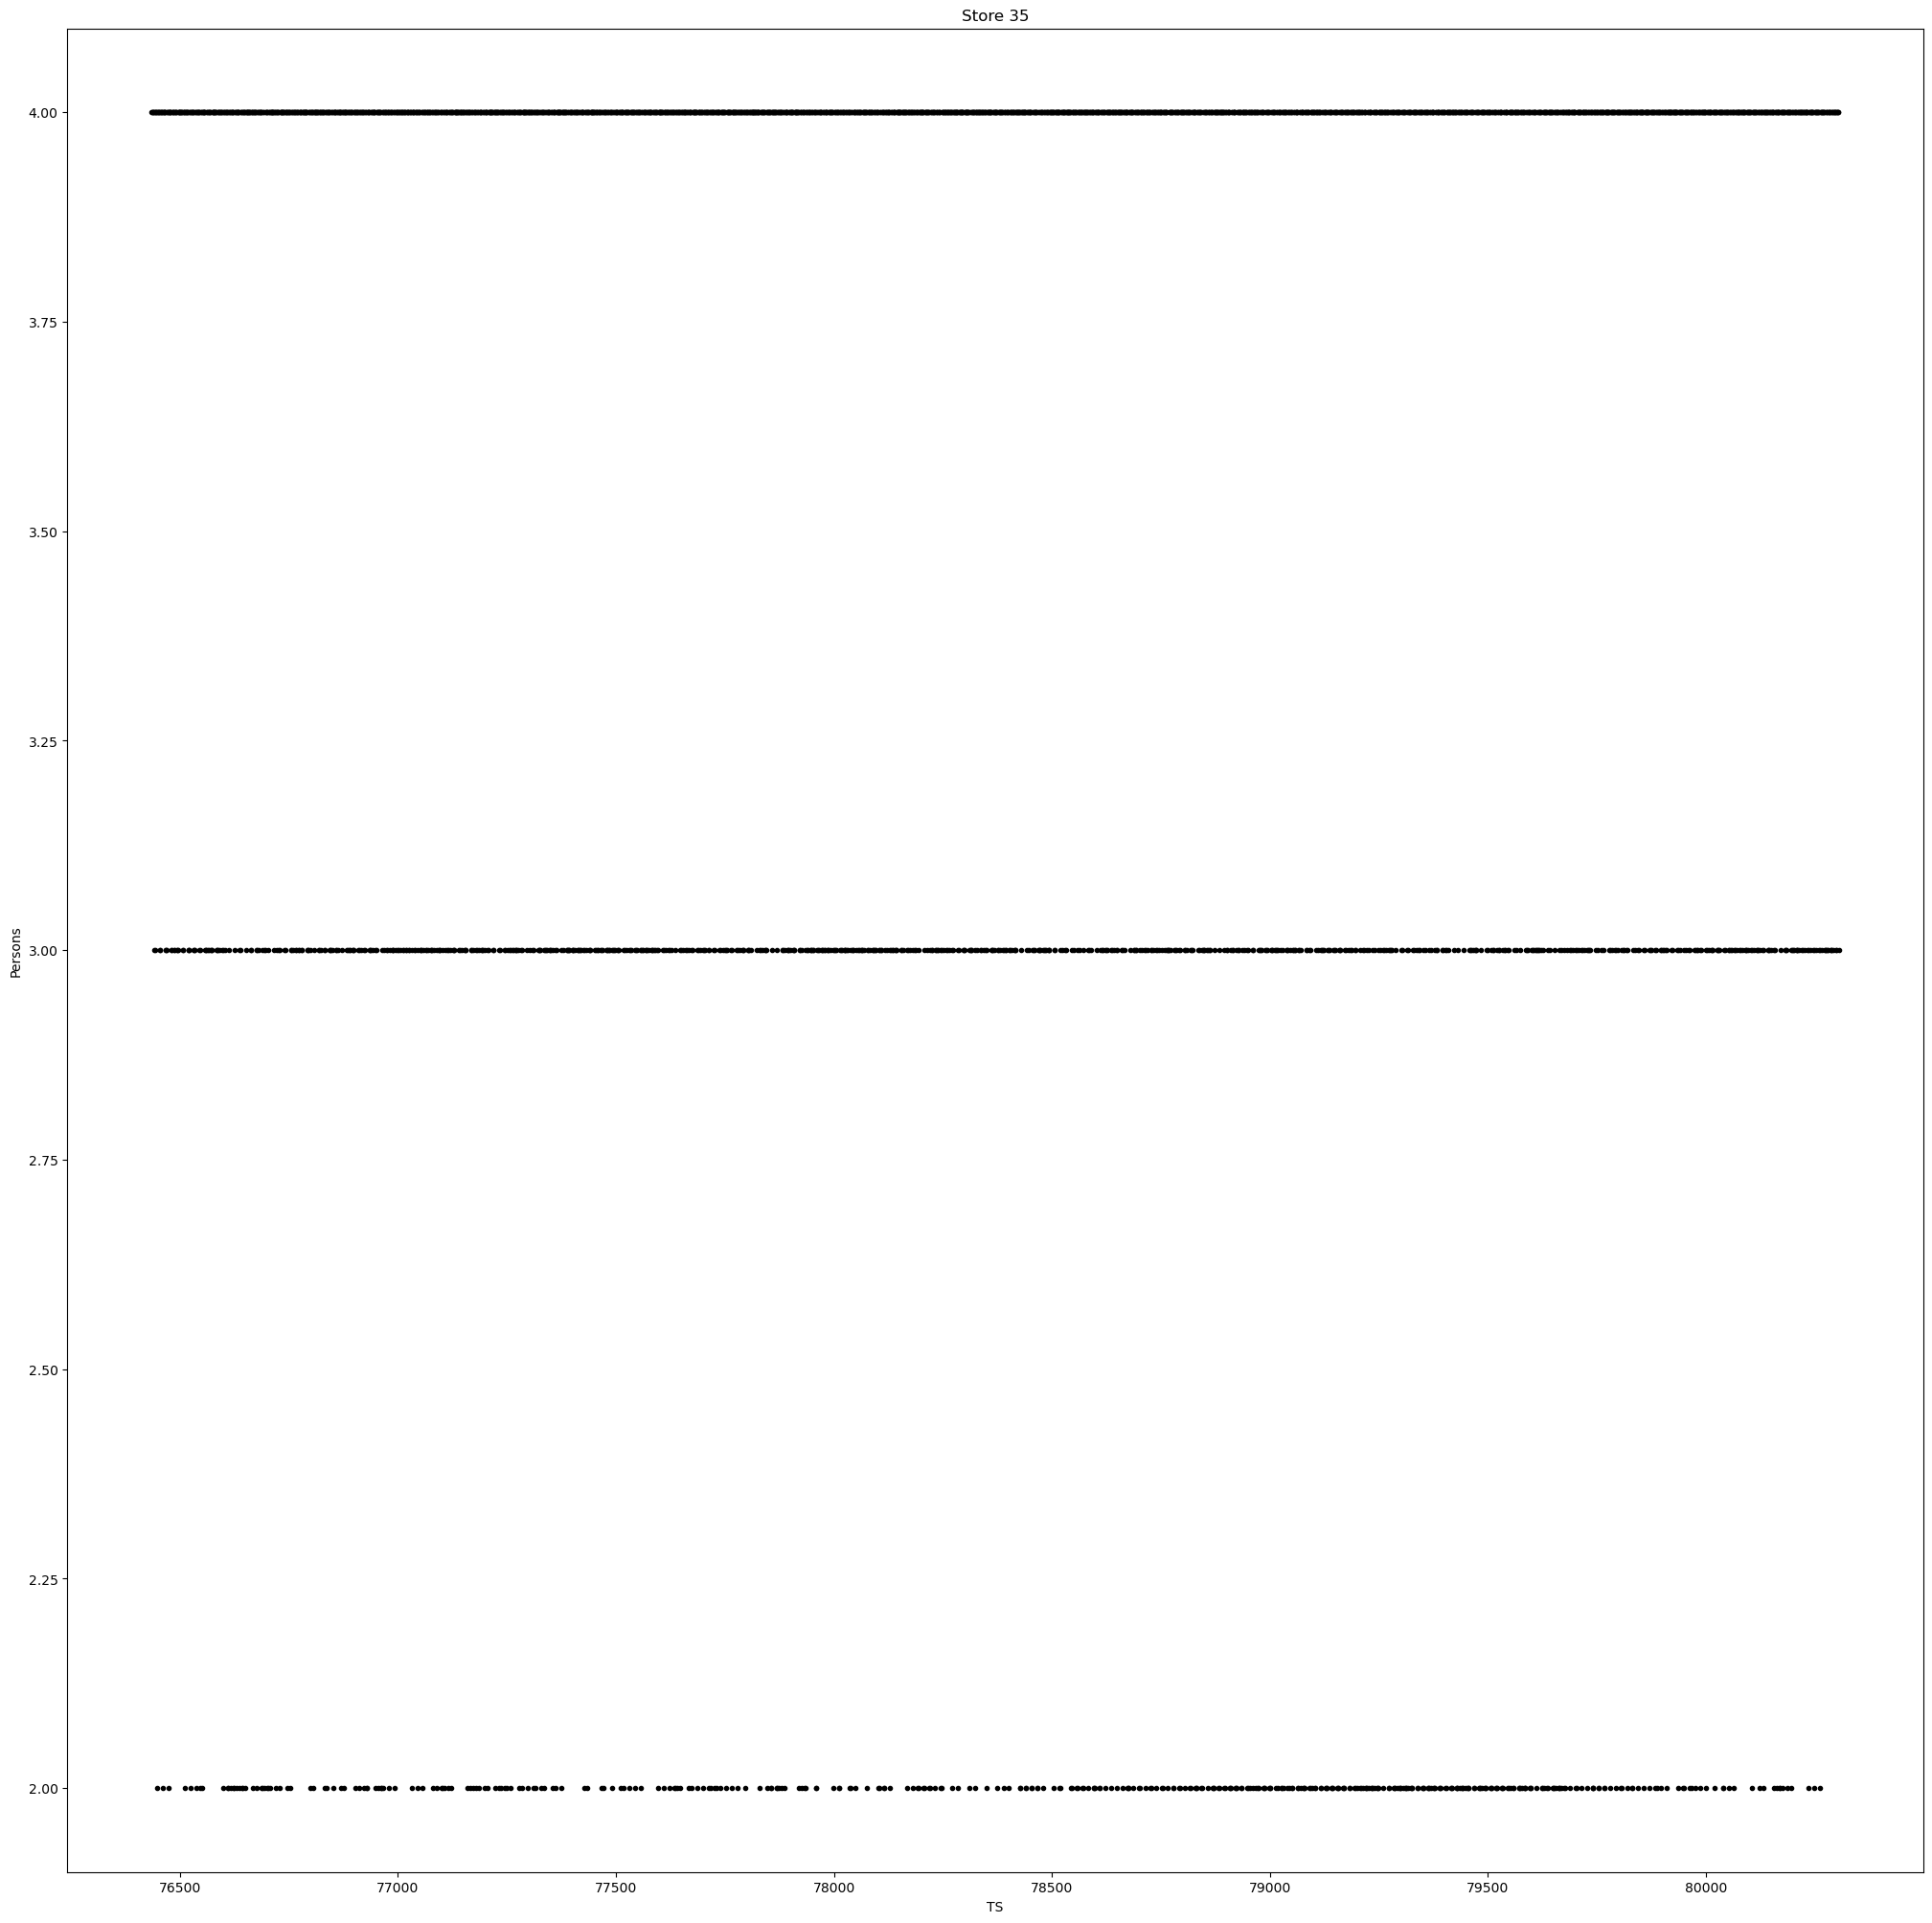

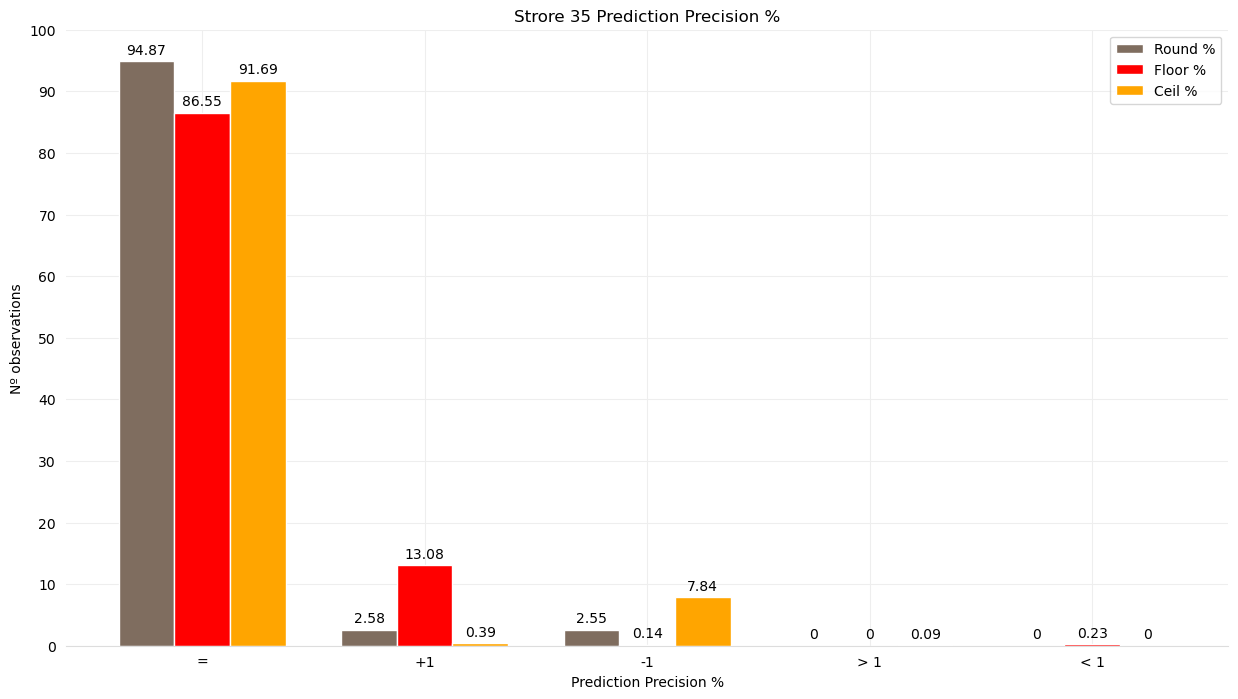

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6622 |        180 |        178 |          0 |          0  
  Floor                |       6041 |        913 |         10 |          0 |         16  
  Ceil                 |       6400 |         27 |        547 |          6 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.87 |       2.58 |       2.55 |        0.0 |        0.0  
  Floor % 

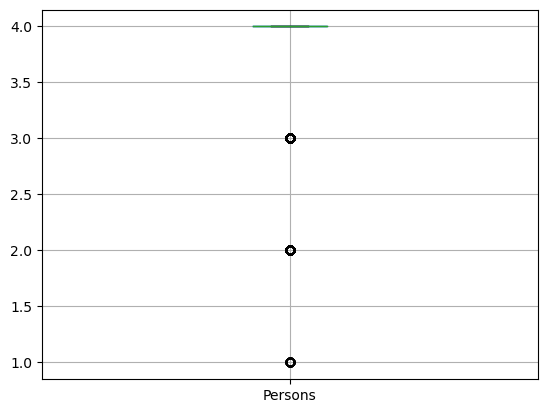

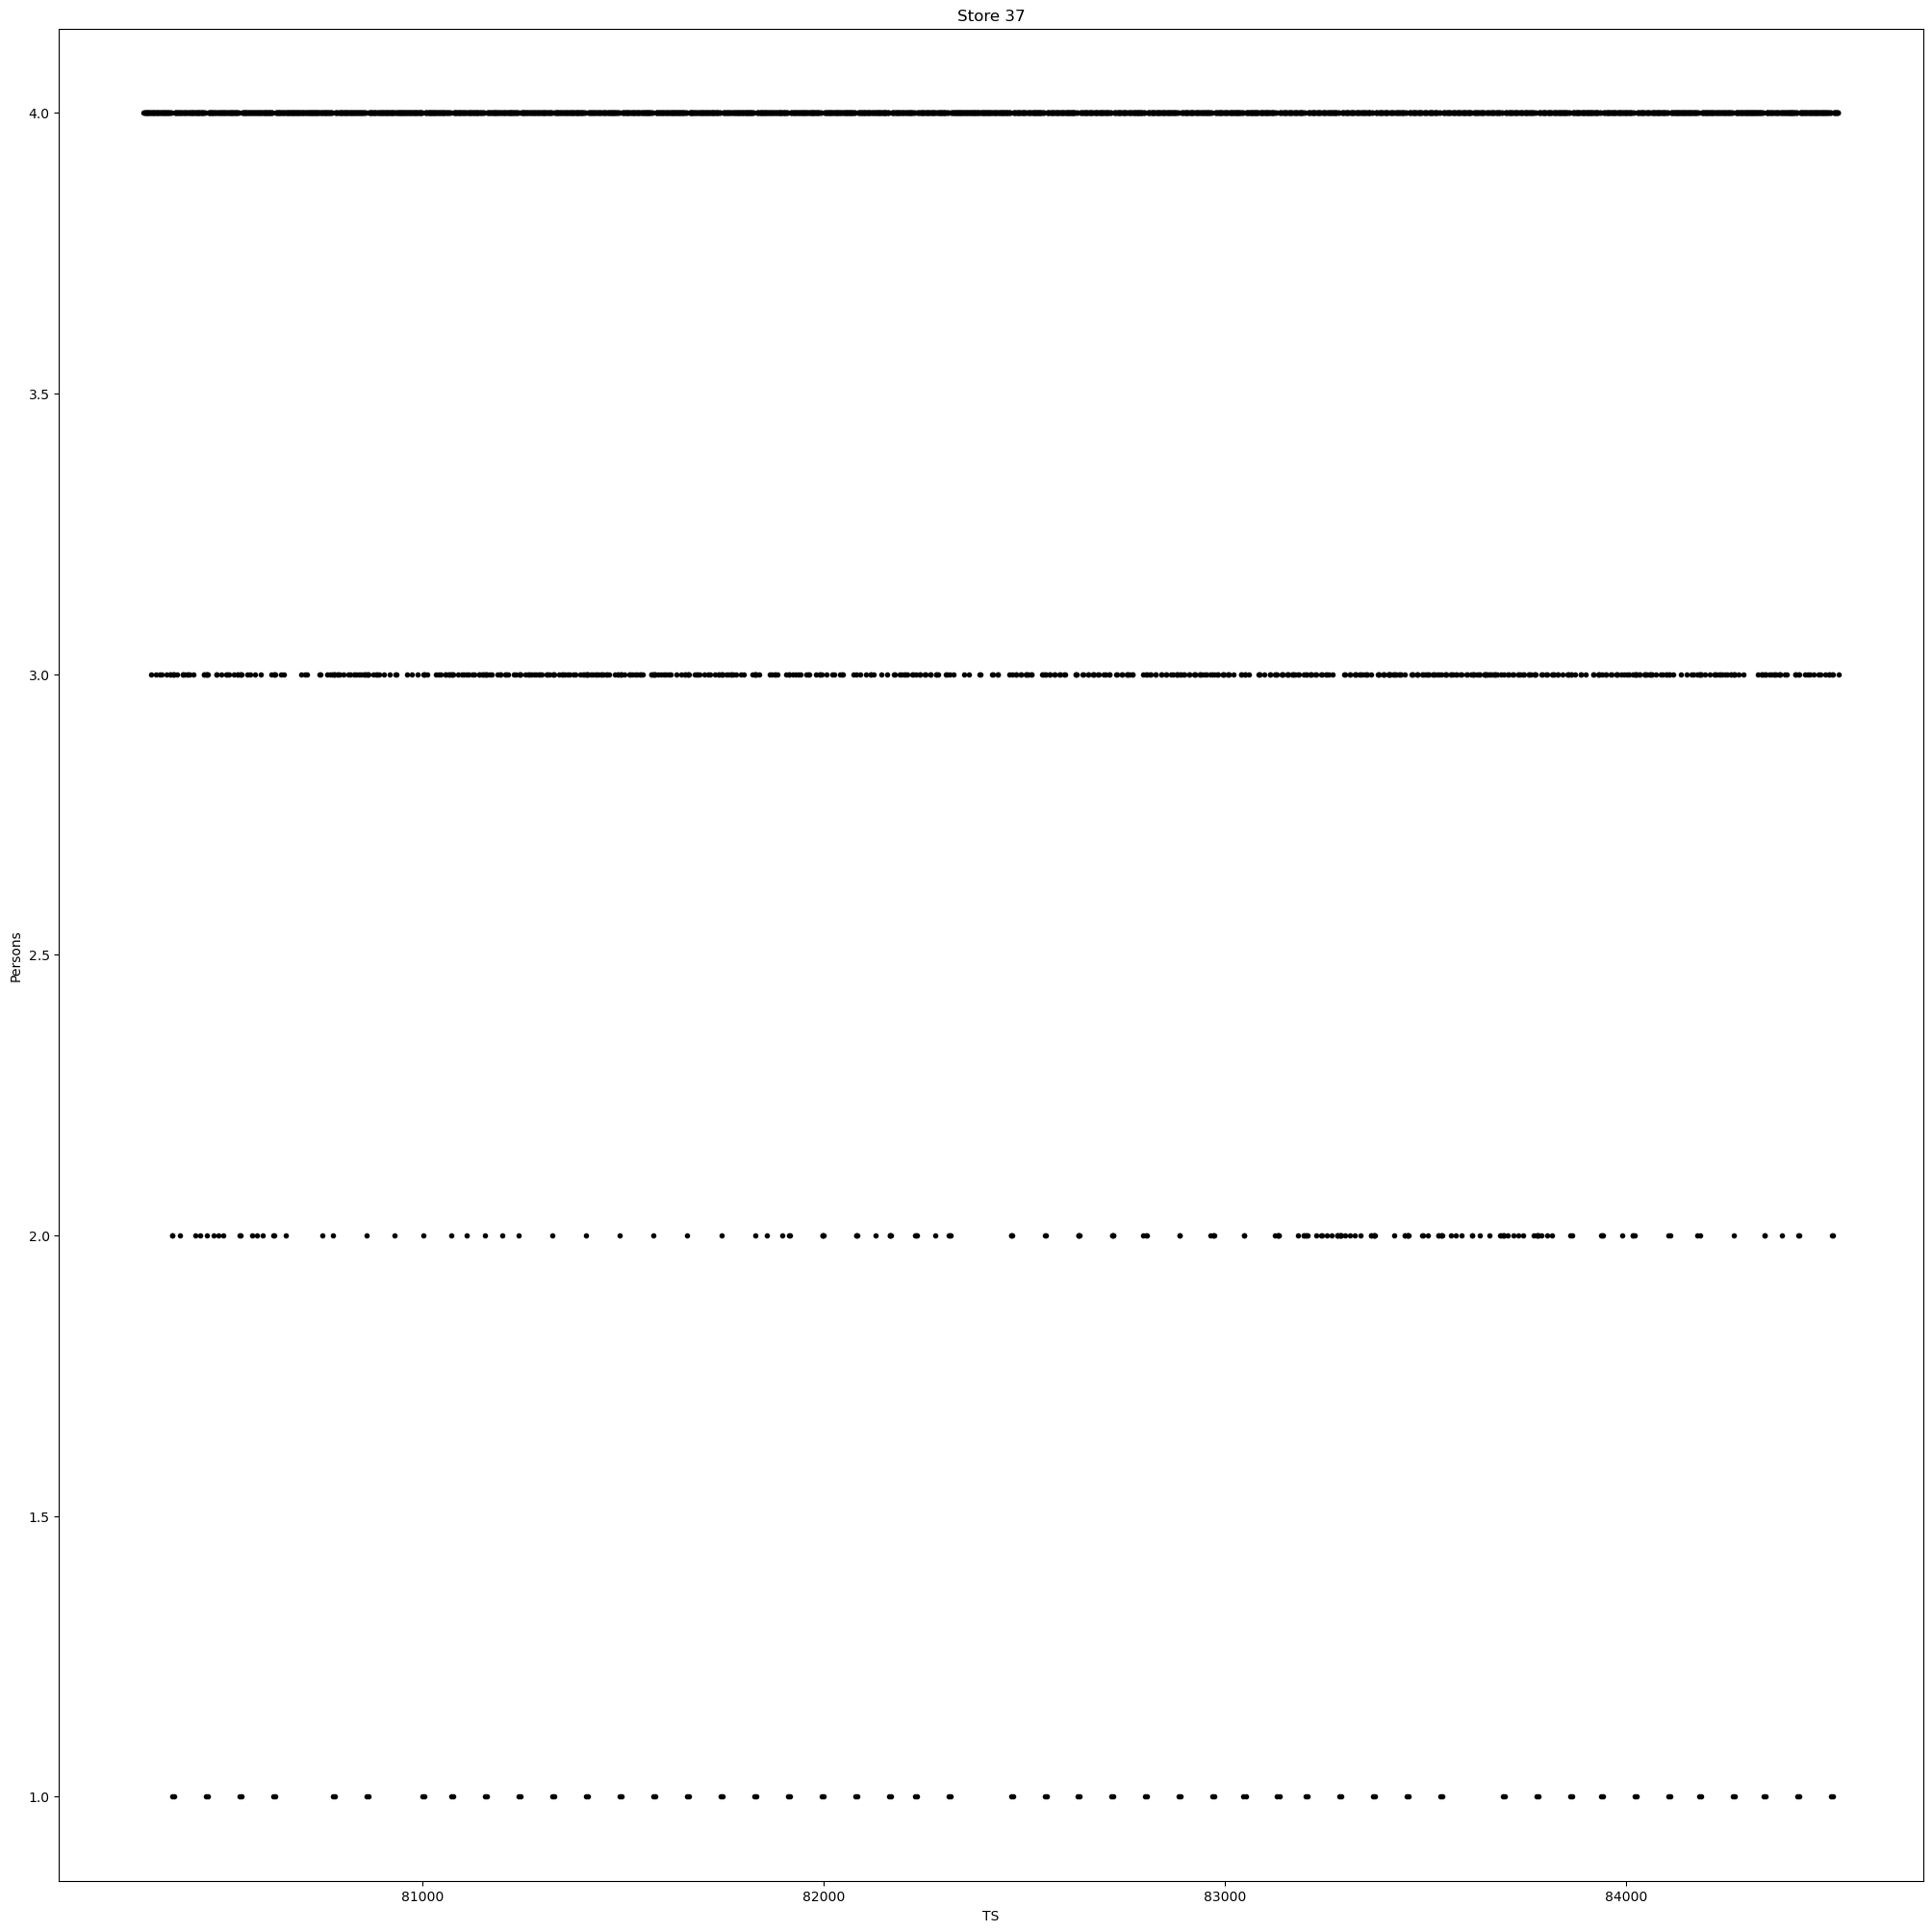

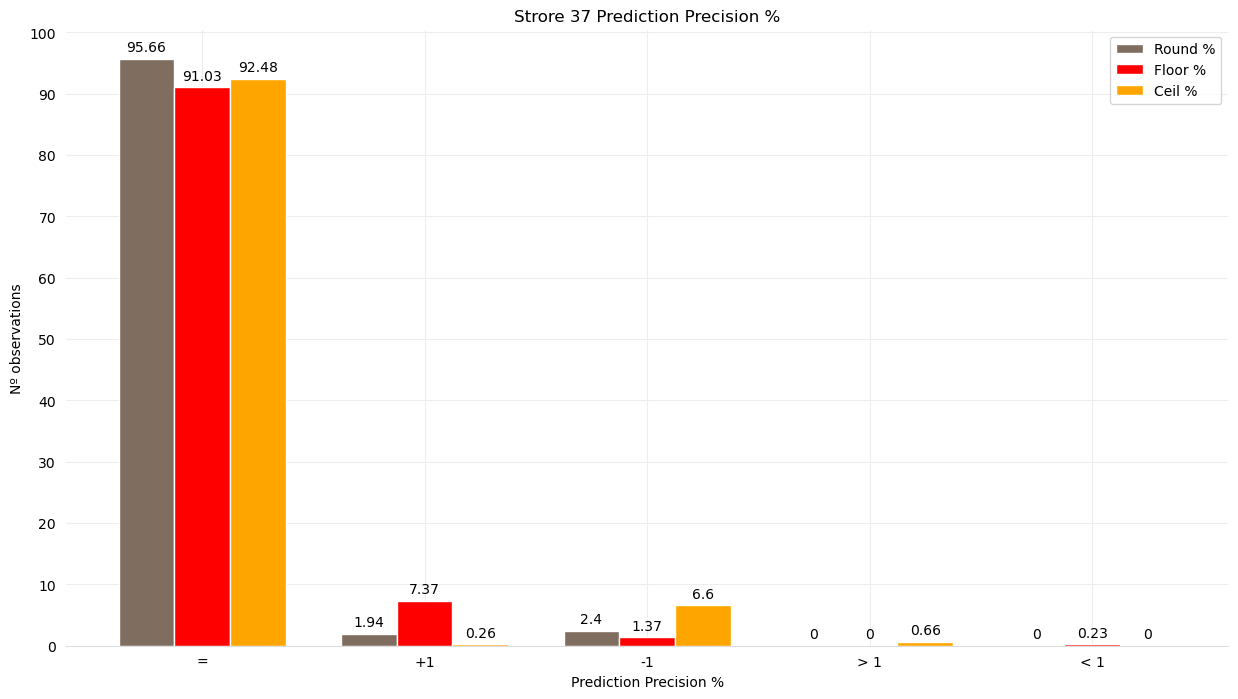

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6695 |        136 |        168 |          0 |          0  
  Floor                |       6371 |        516 |         96 |          0 |         16  
  Ceil                 |       6473 |         18 |        462 |         46 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.66 |       1.94 |        2.4 |        0.0 |        0.0  
  Floor % 

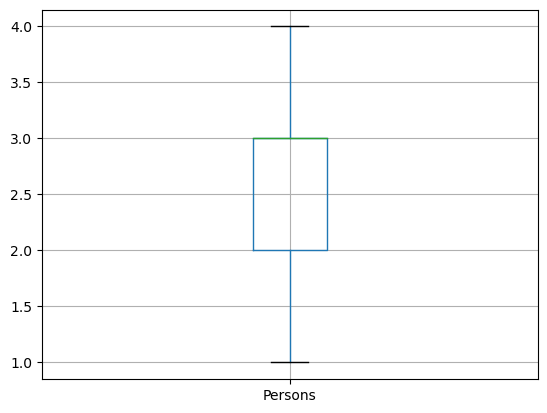

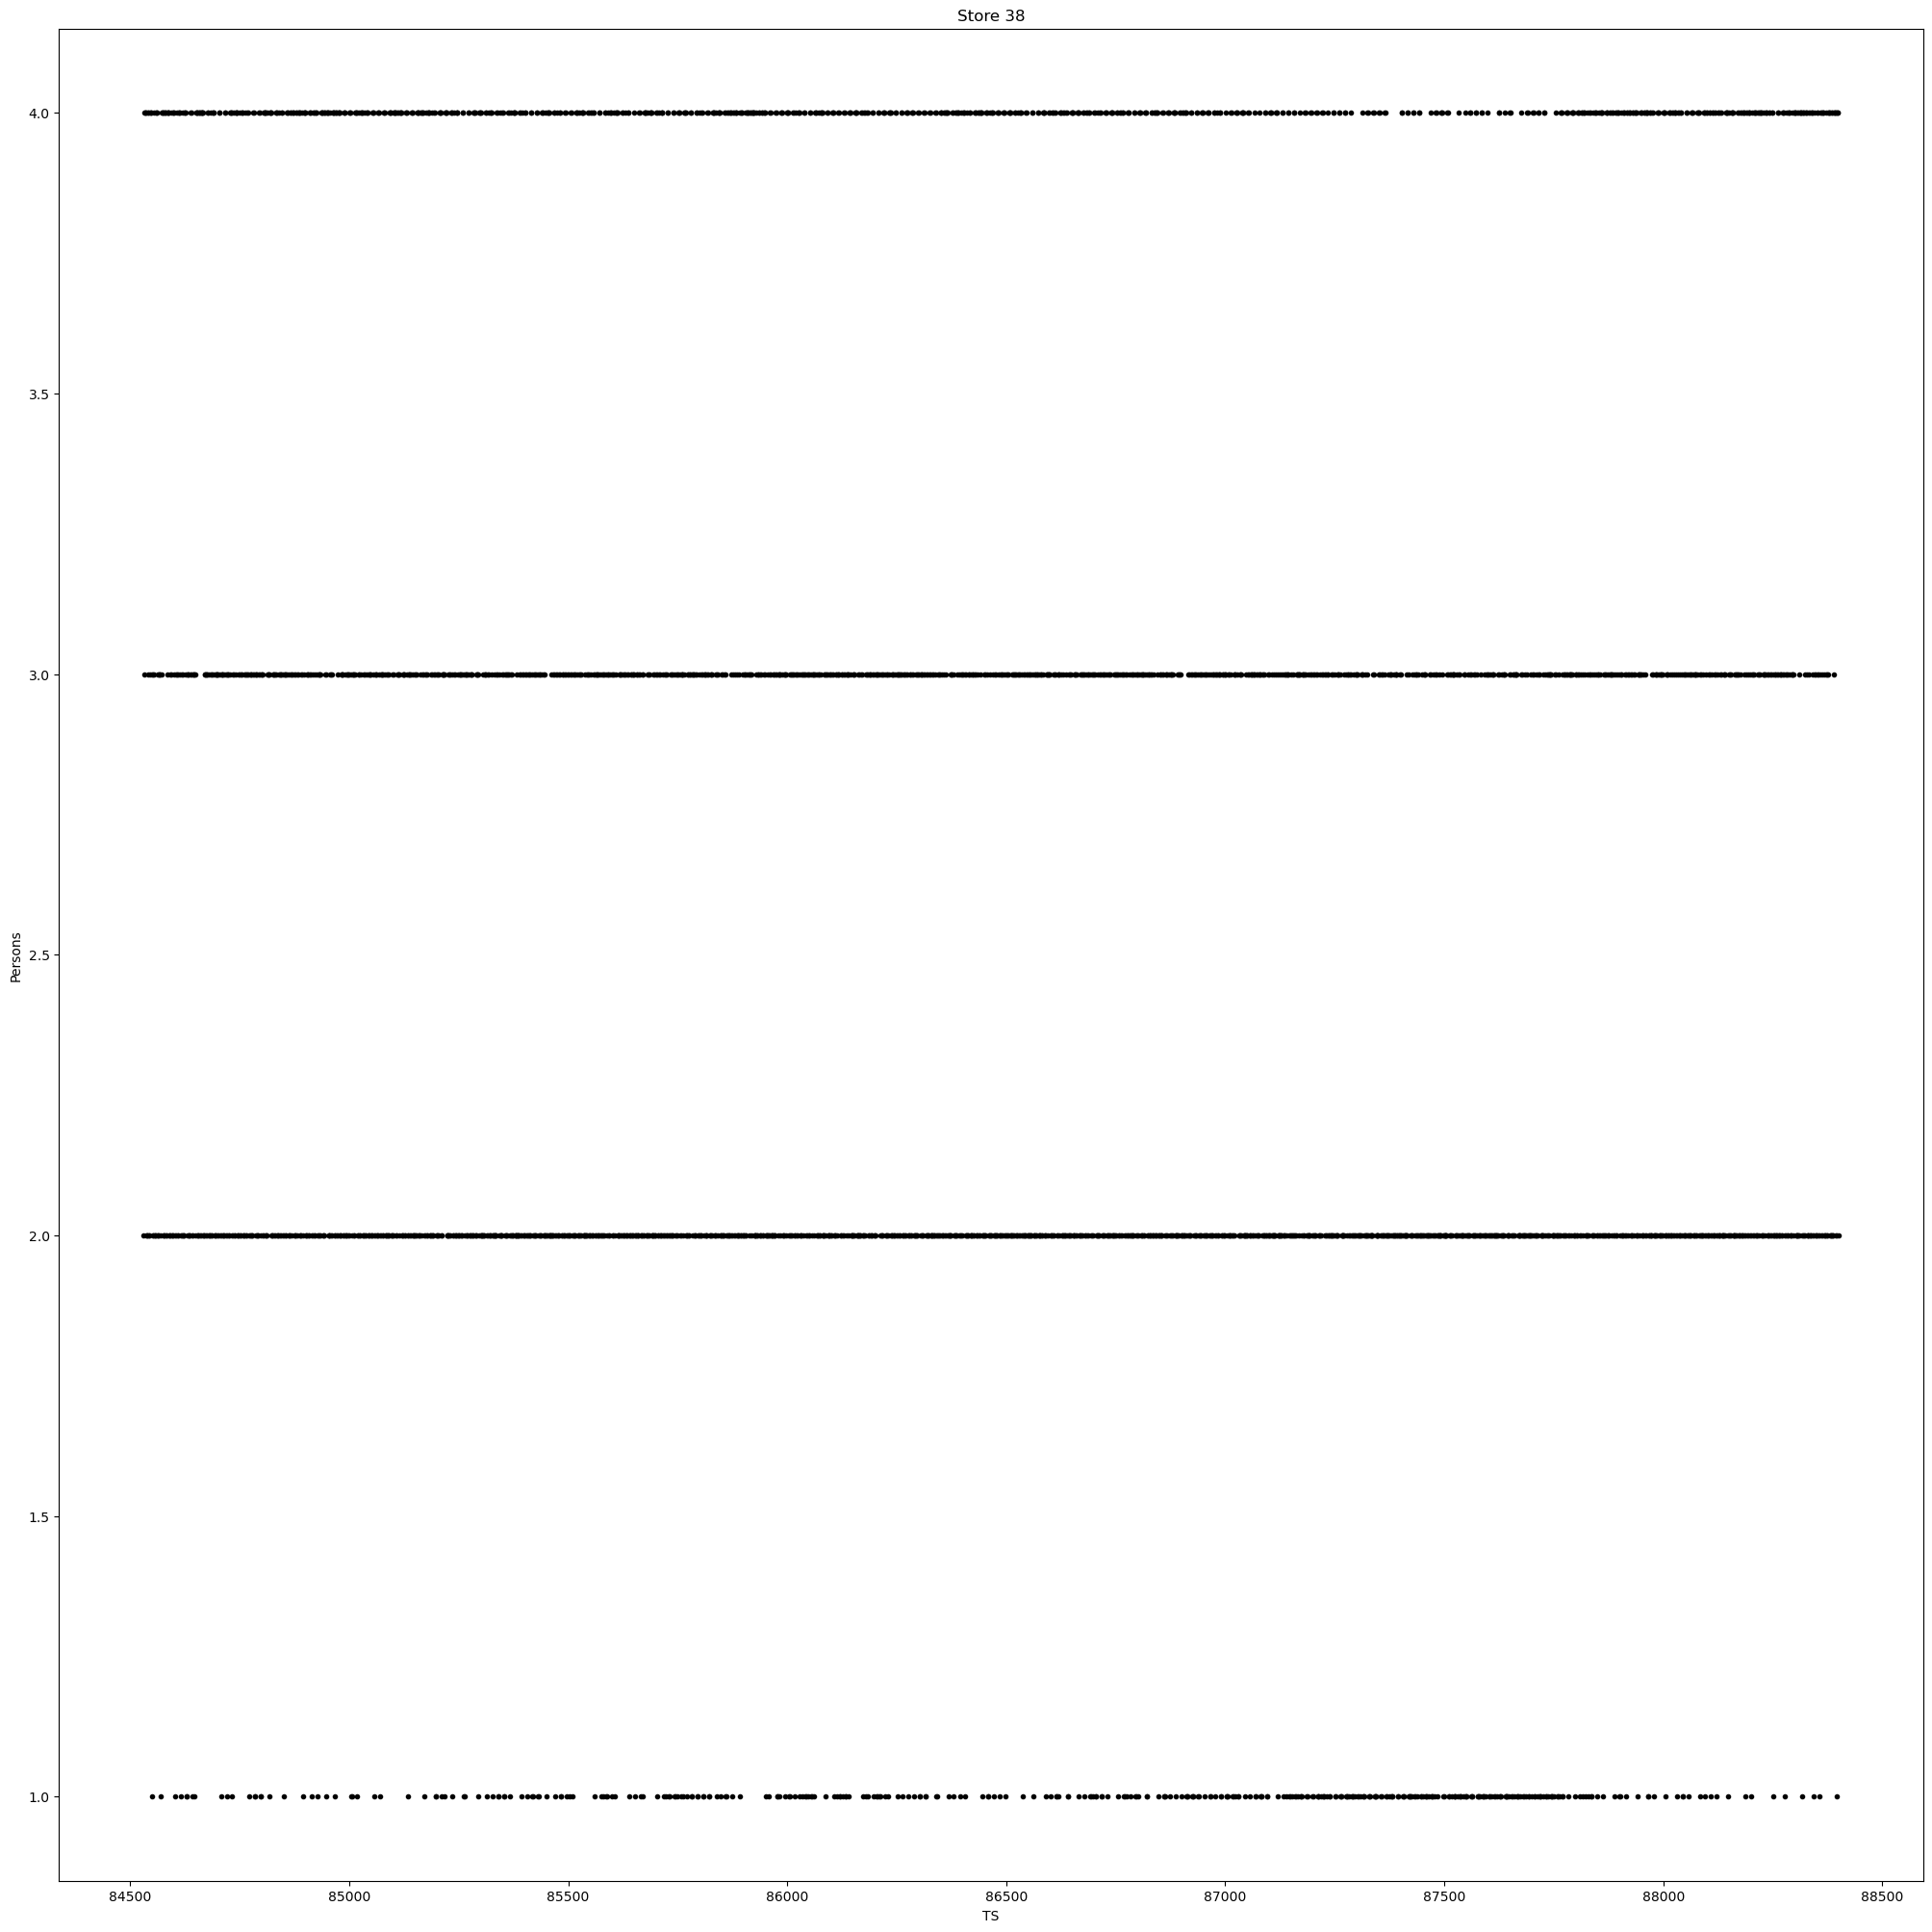

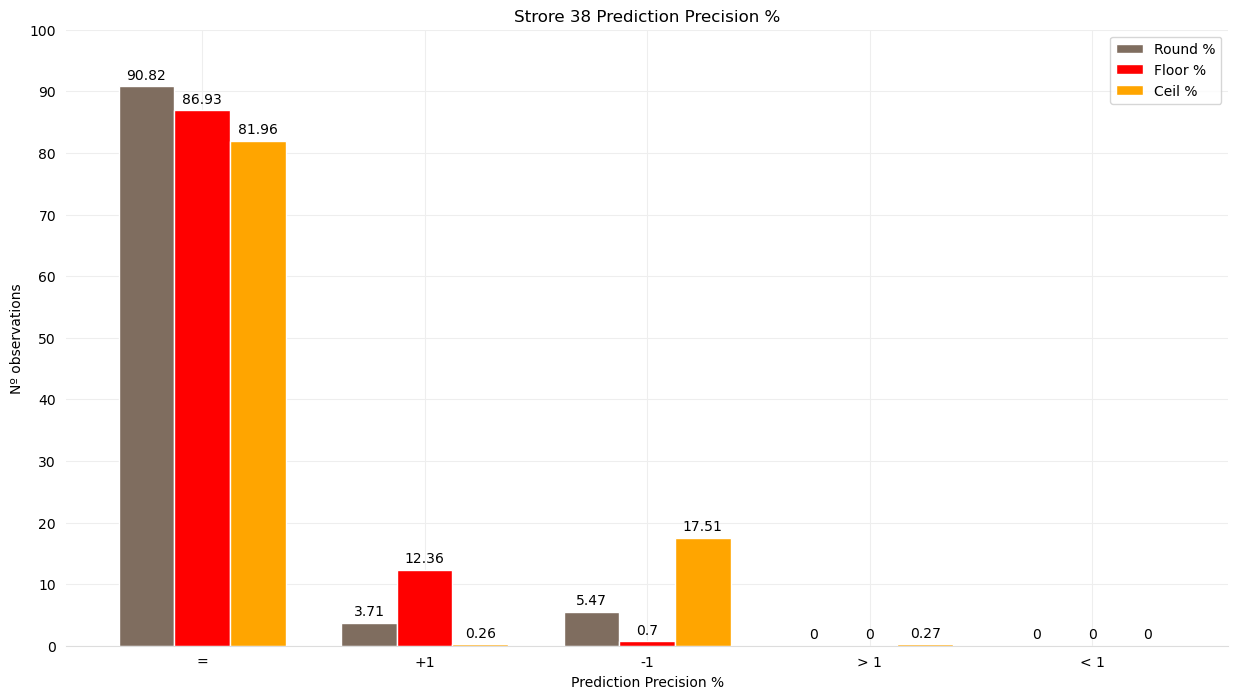

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6339 |        259 |        382 |          0 |          0  
  Floor                |       6068 |        863 |         49 |          0 |          0  
  Ceil                 |       5721 |         18 |       1222 |         19 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      90.82 |       3.71 |       5.47 |        0.0 |        0.0  
  Floor % 

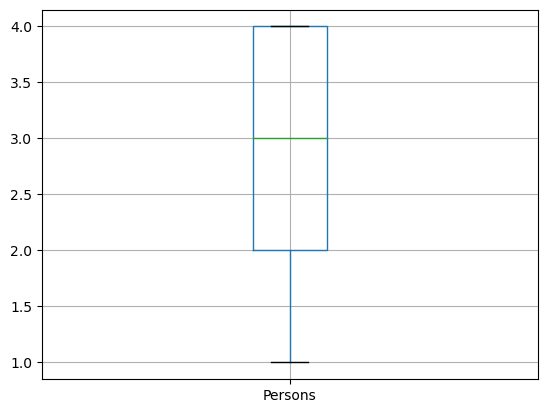

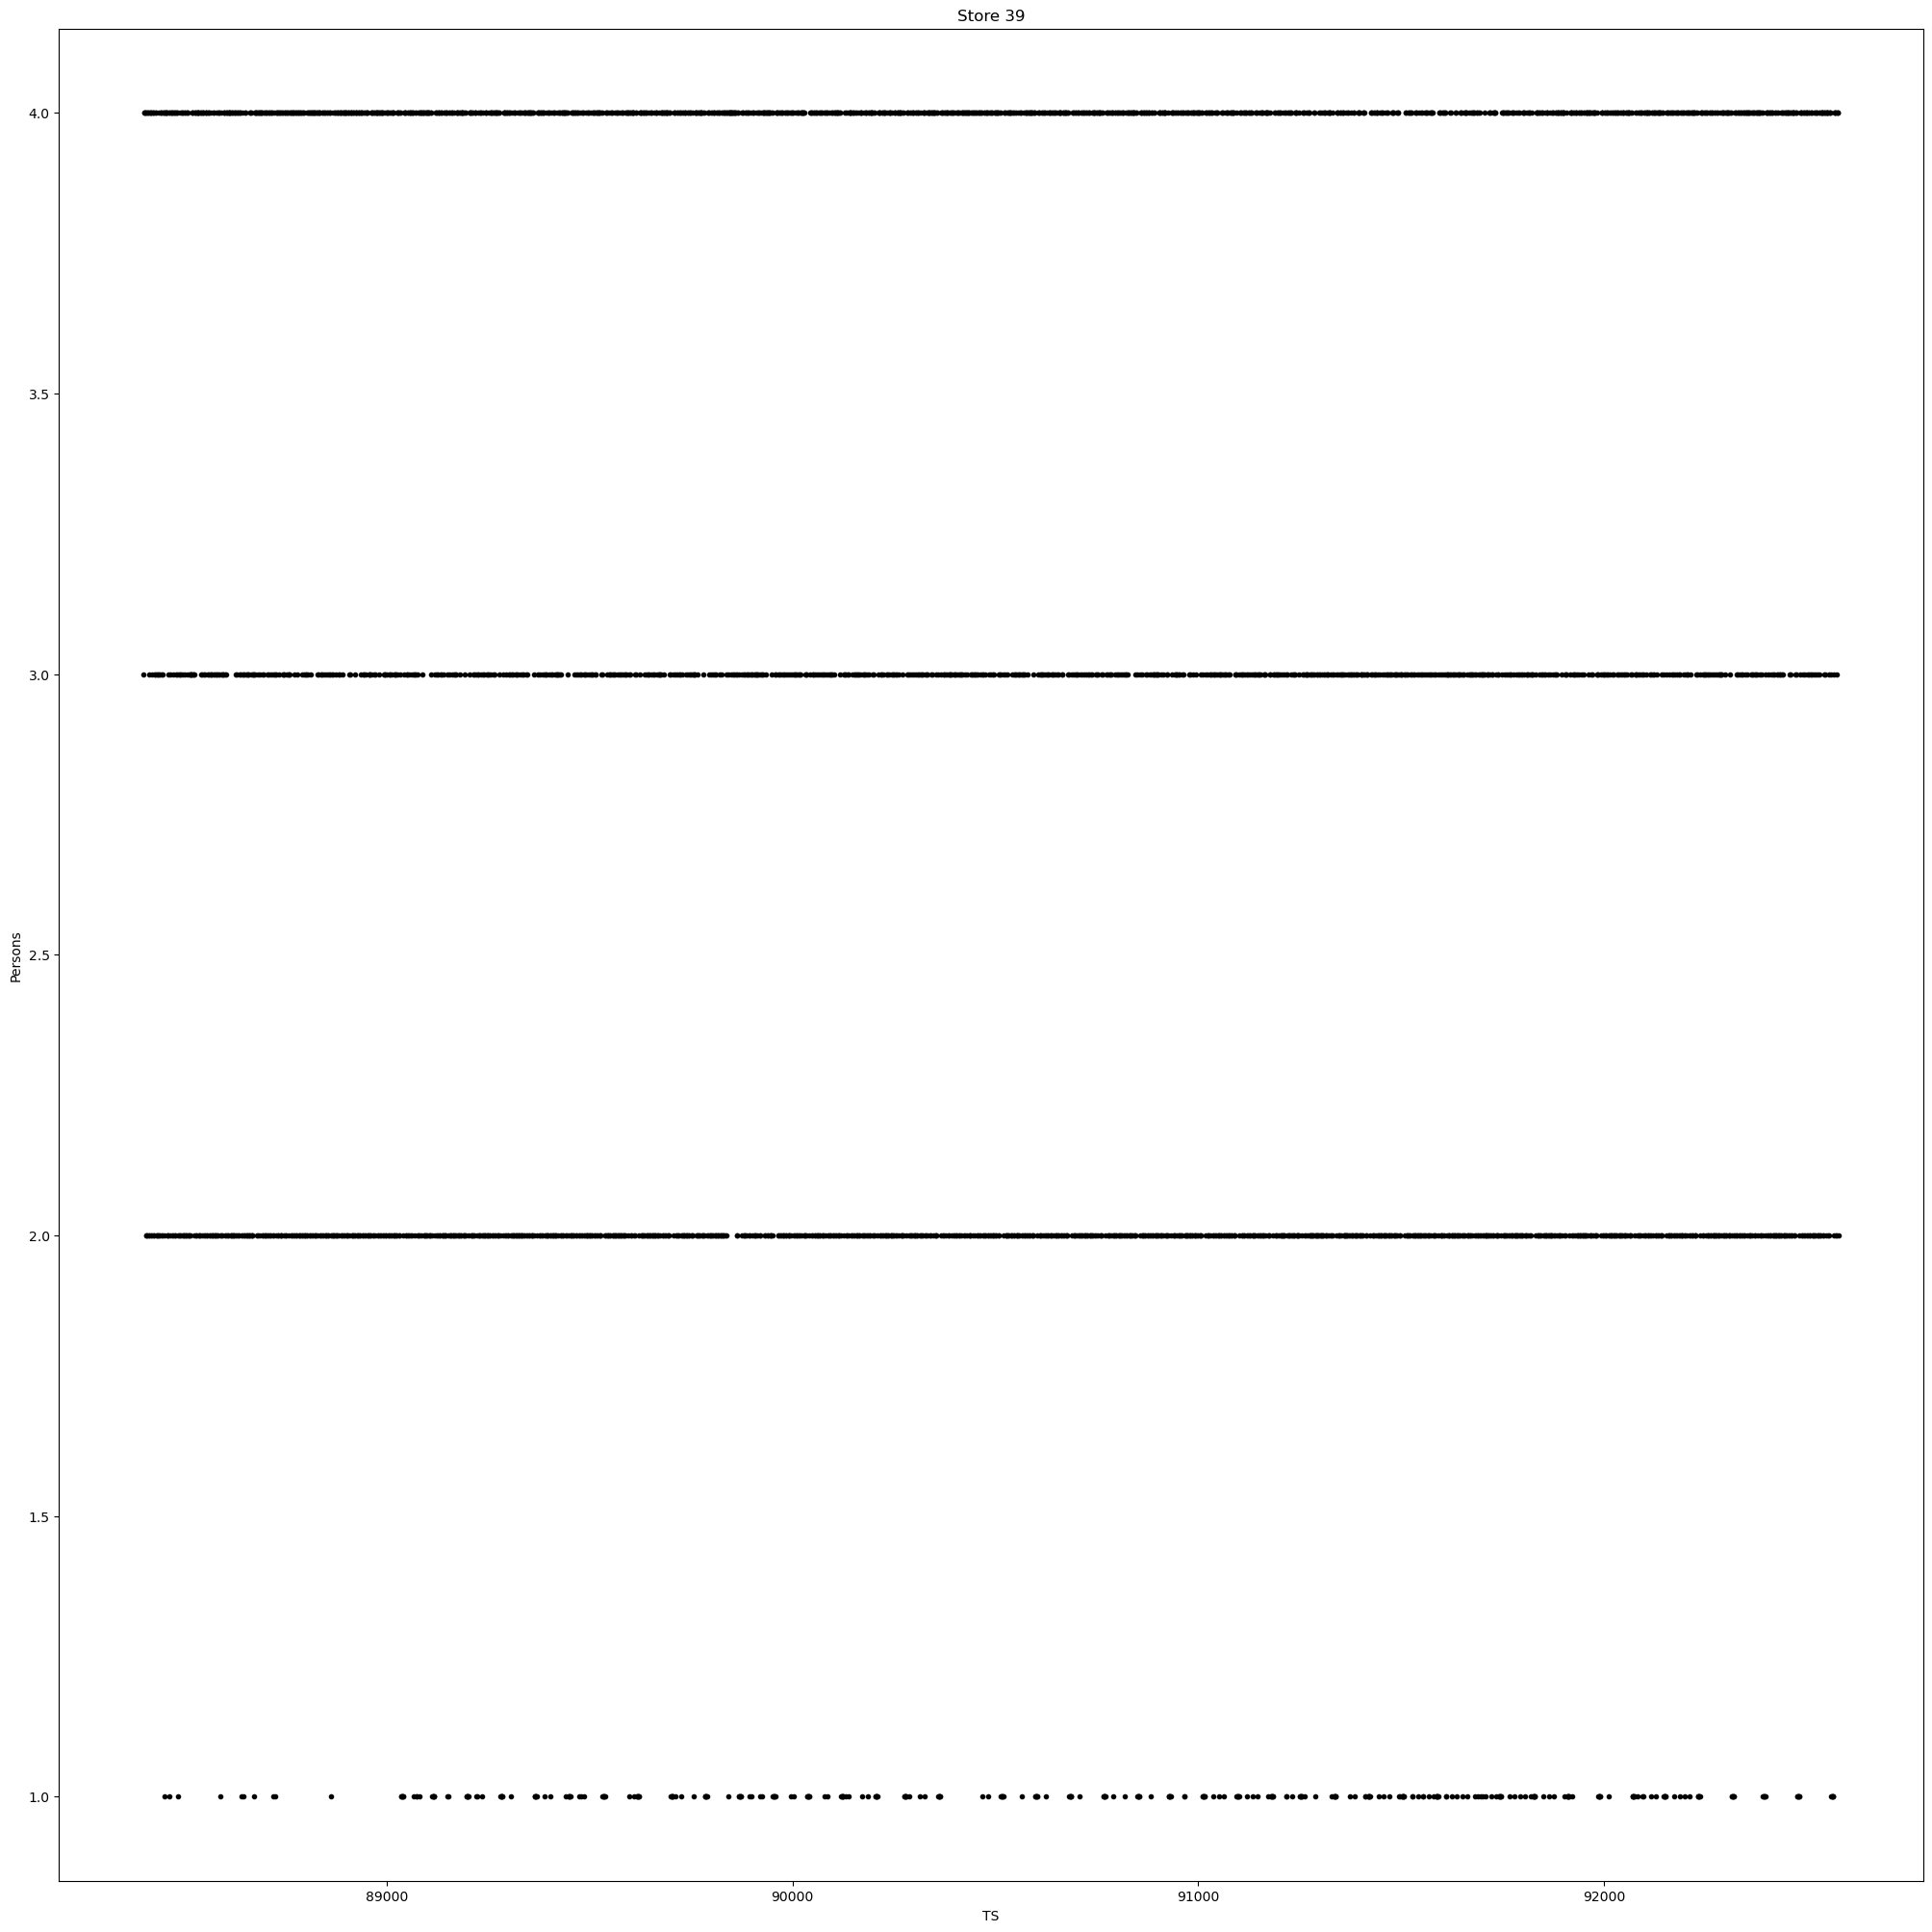

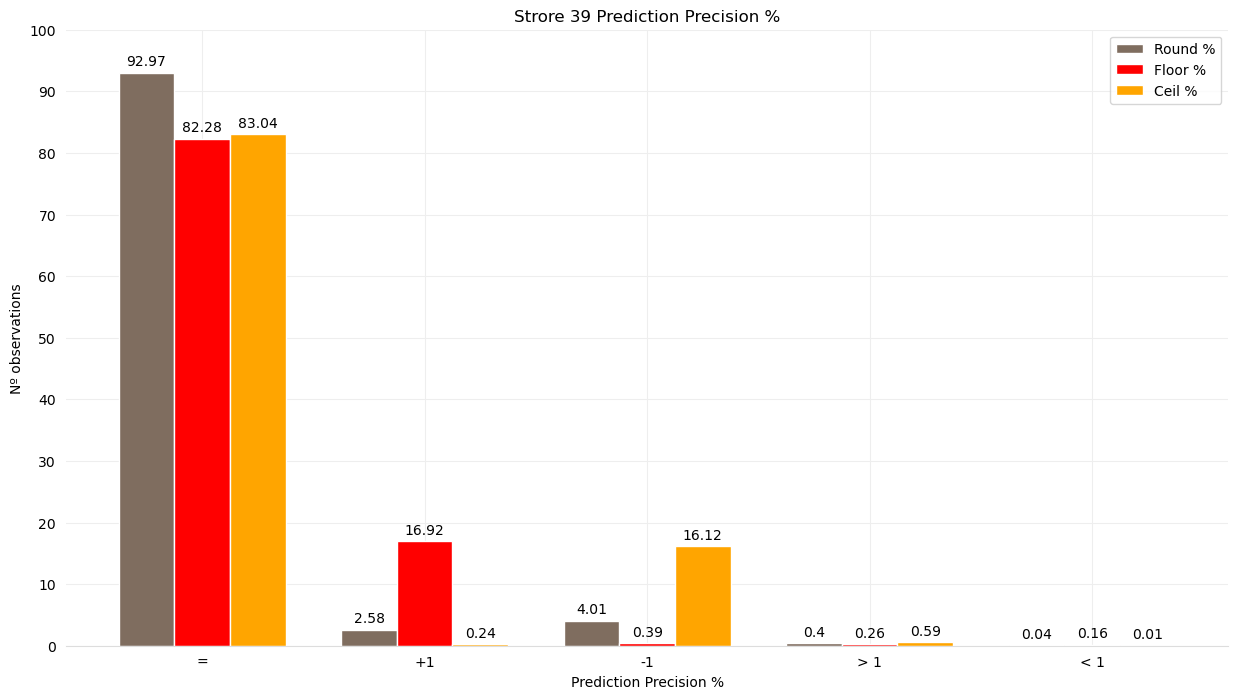

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6489 |        180 |        280 |         28 |          3  
  Floor                |       5743 |       1181 |         27 |         18 |         11  
  Ceil                 |       5796 |         17 |       1125 |         41 |          1  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      92.97 |       2.58 |       4.01 |        0.4 |       0.04  
  Floor % 

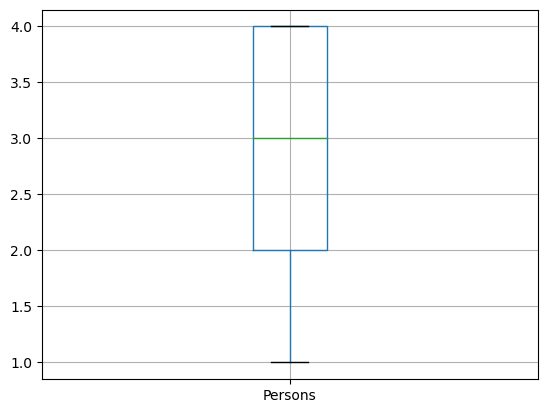

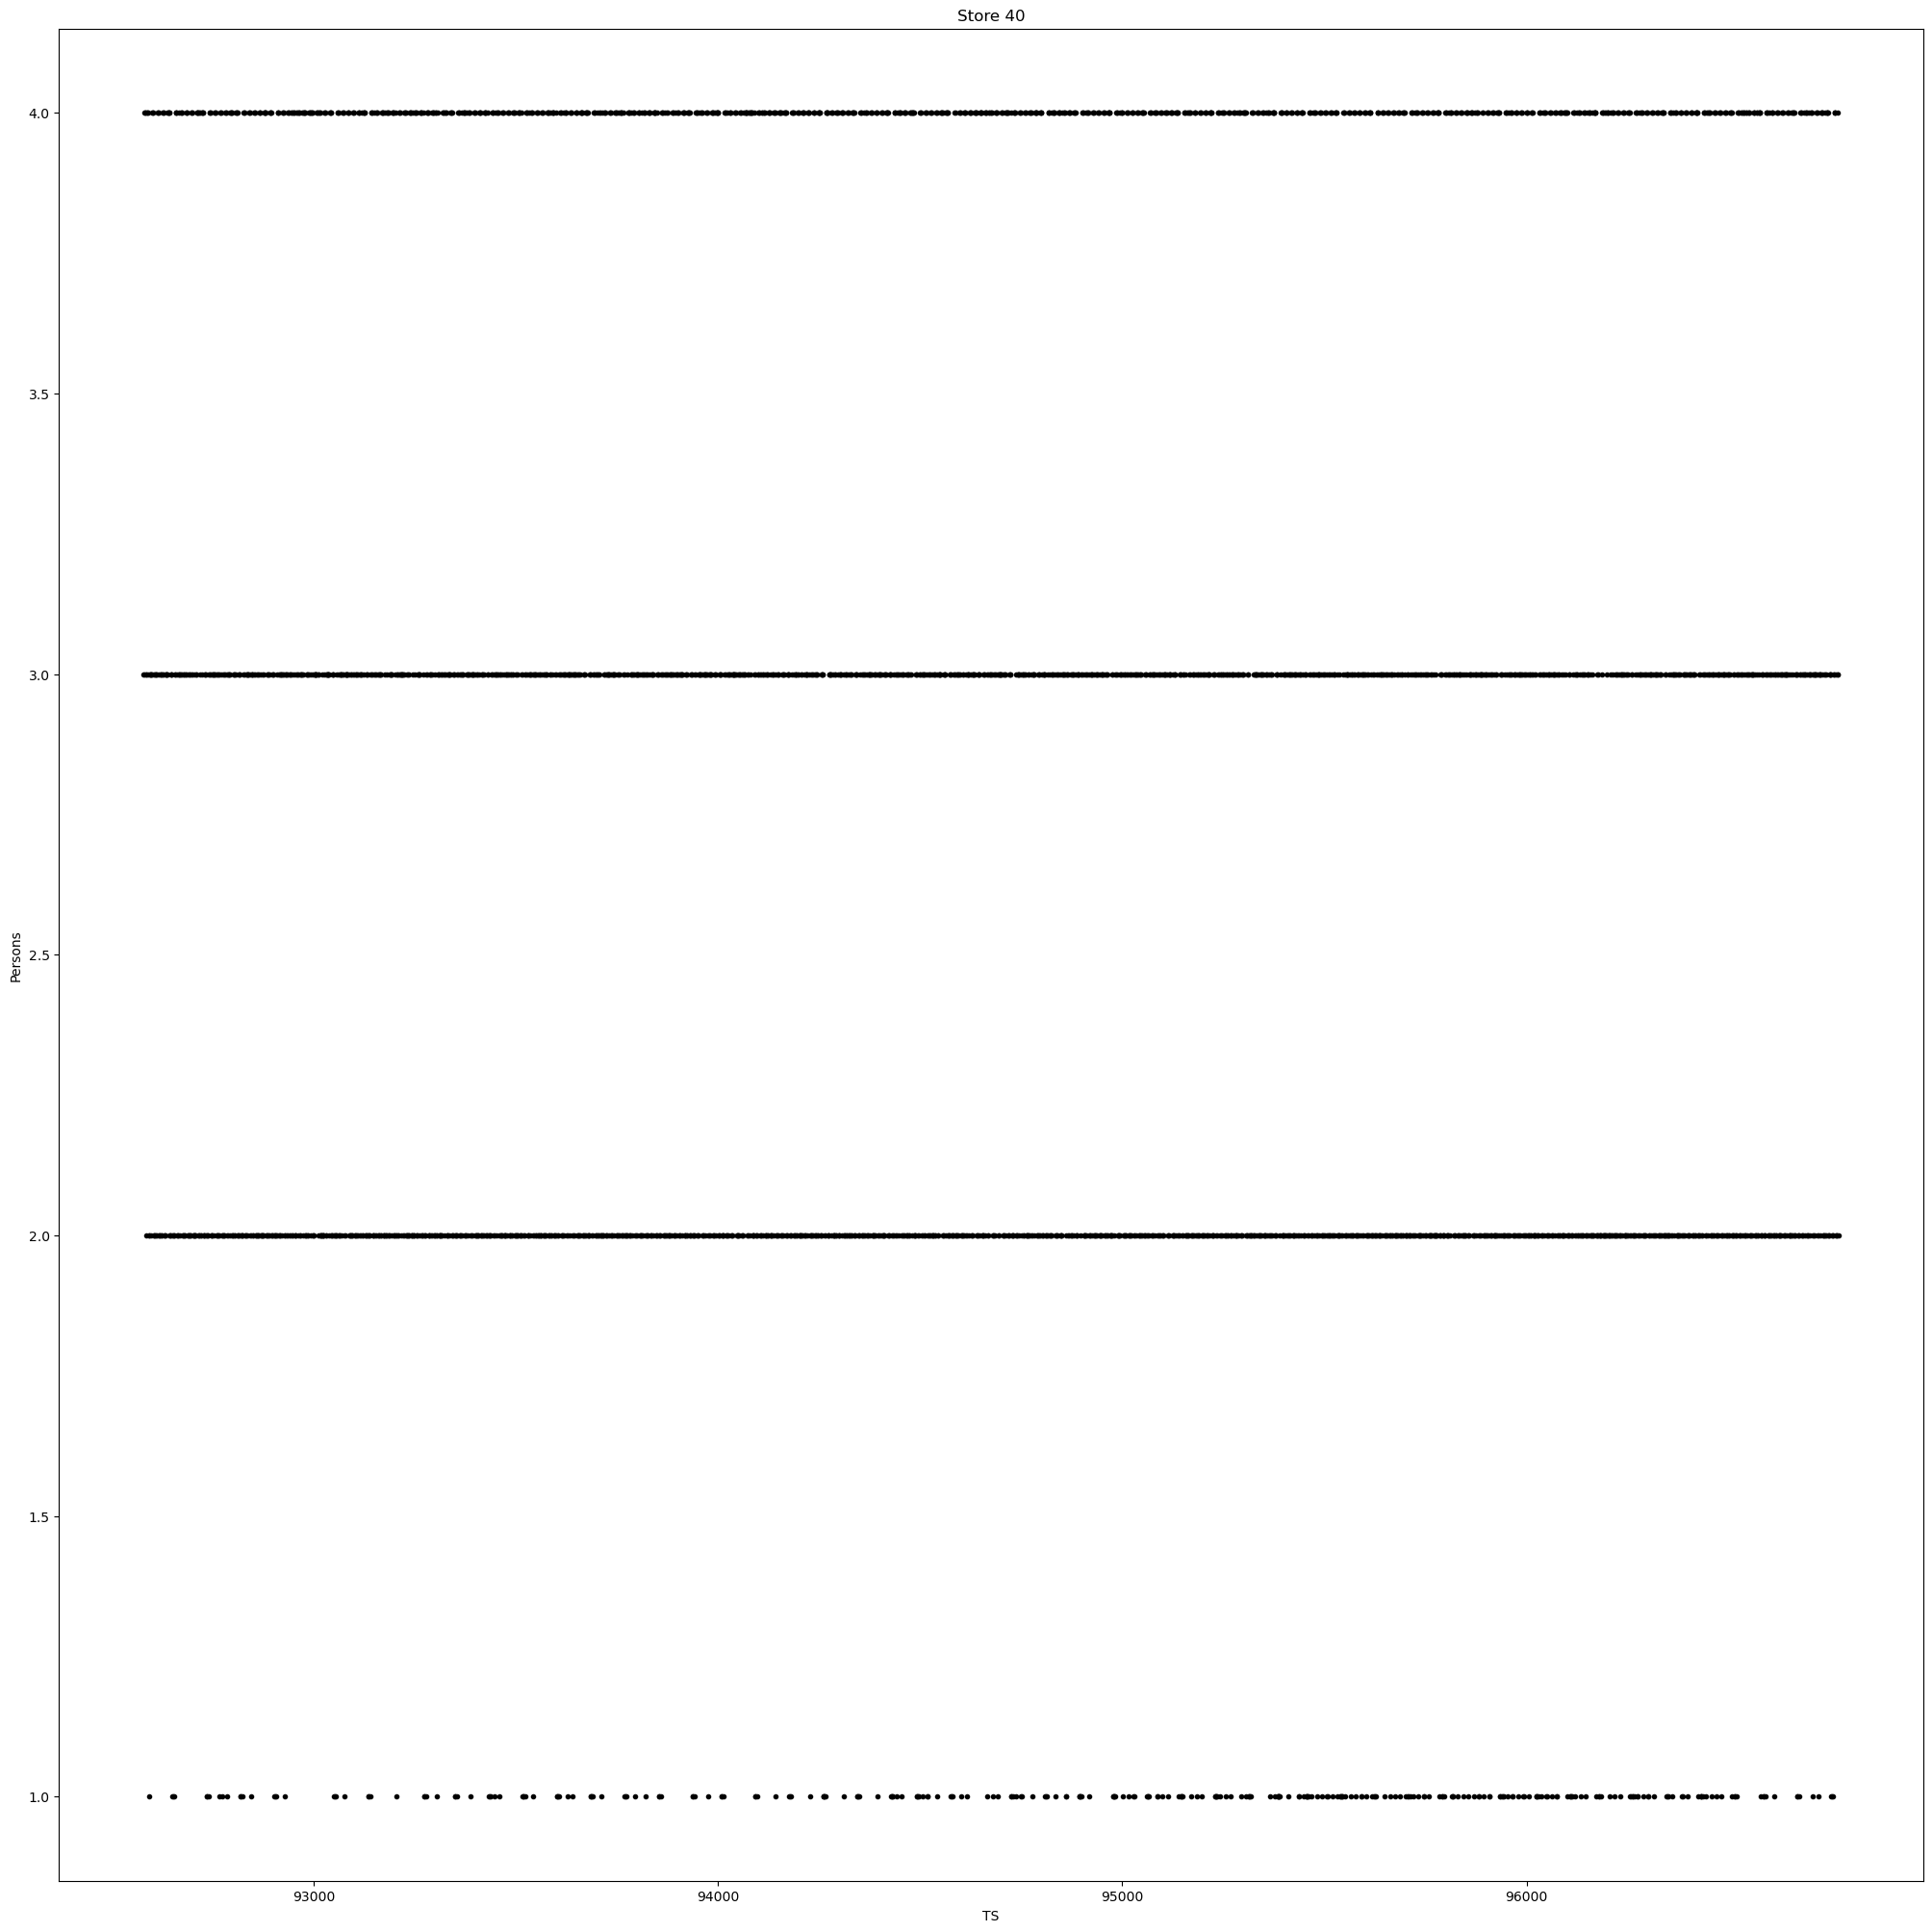

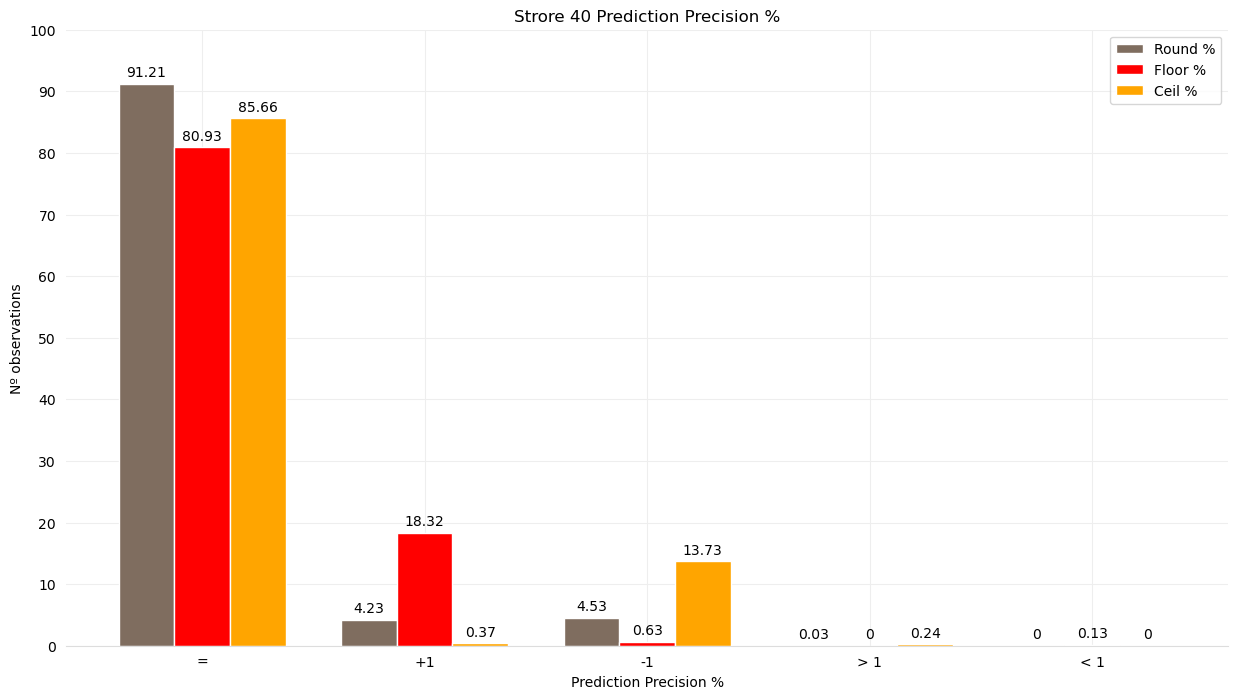

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6384 |        296 |        317 |          2 |          0  
  Floor                |       5664 |       1282 |         44 |          0 |          9  
  Ceil                 |       5995 |         26 |        961 |         17 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.21 |       4.23 |       4.53 |       0.03 |        0.0  
  Floor % 

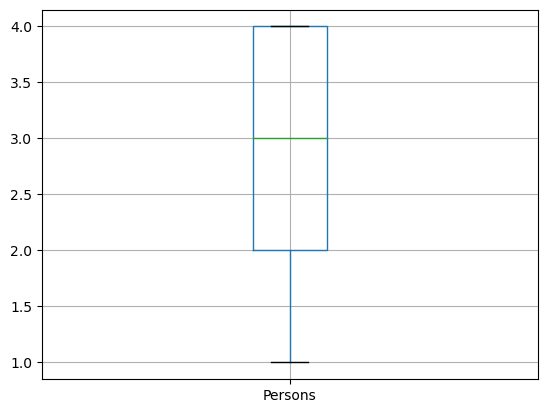

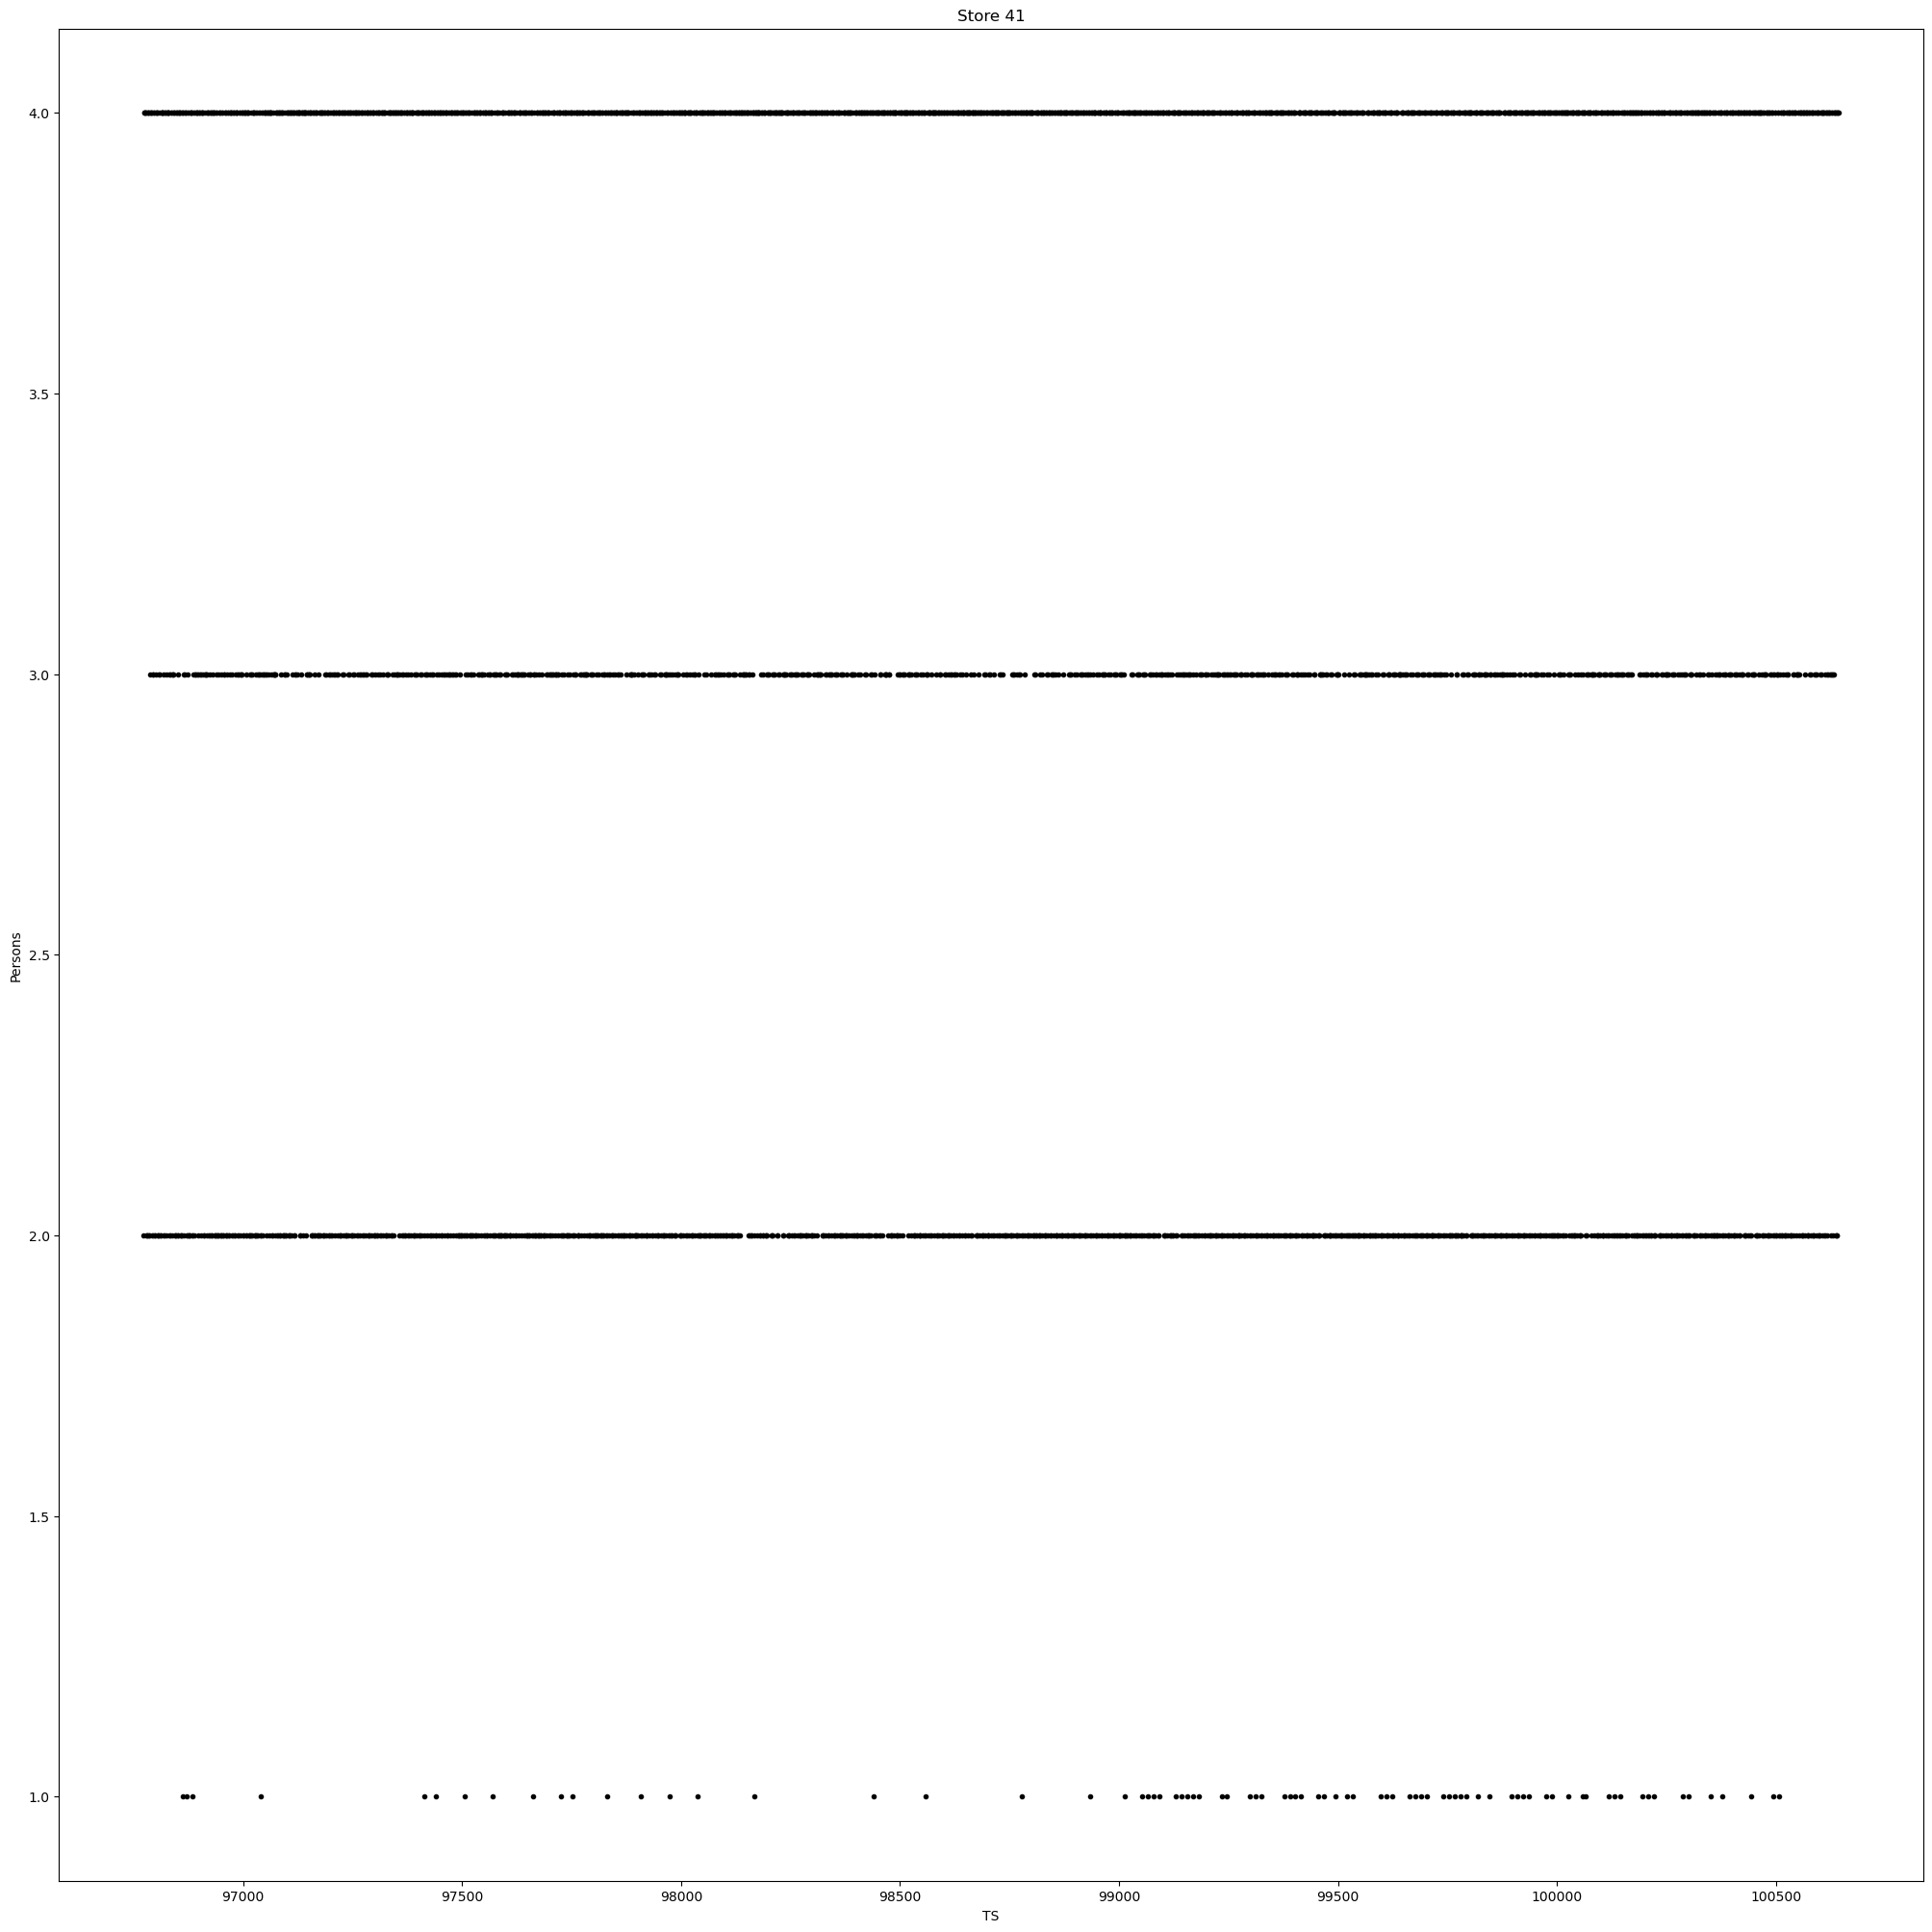

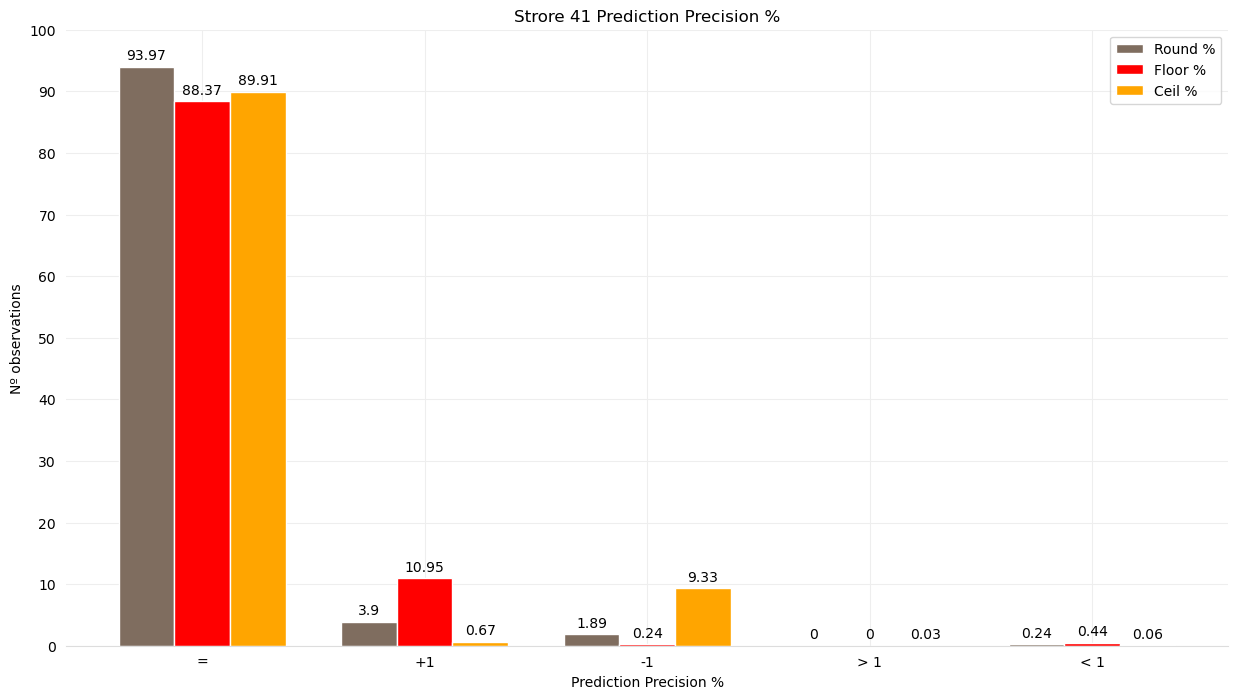

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6559 |        272 |        132 |          0 |         17  
  Floor                |       6168 |        764 |         17 |          0 |         31  
  Ceil                 |       6276 |         47 |        651 |          2 |          4  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.97 |        3.9 |       1.89 |        0.0 |       0.24  
  Floor % 

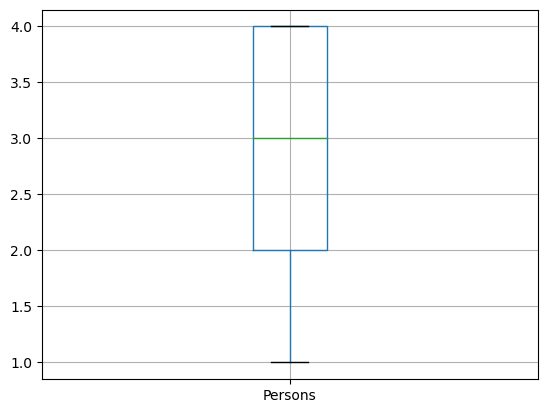

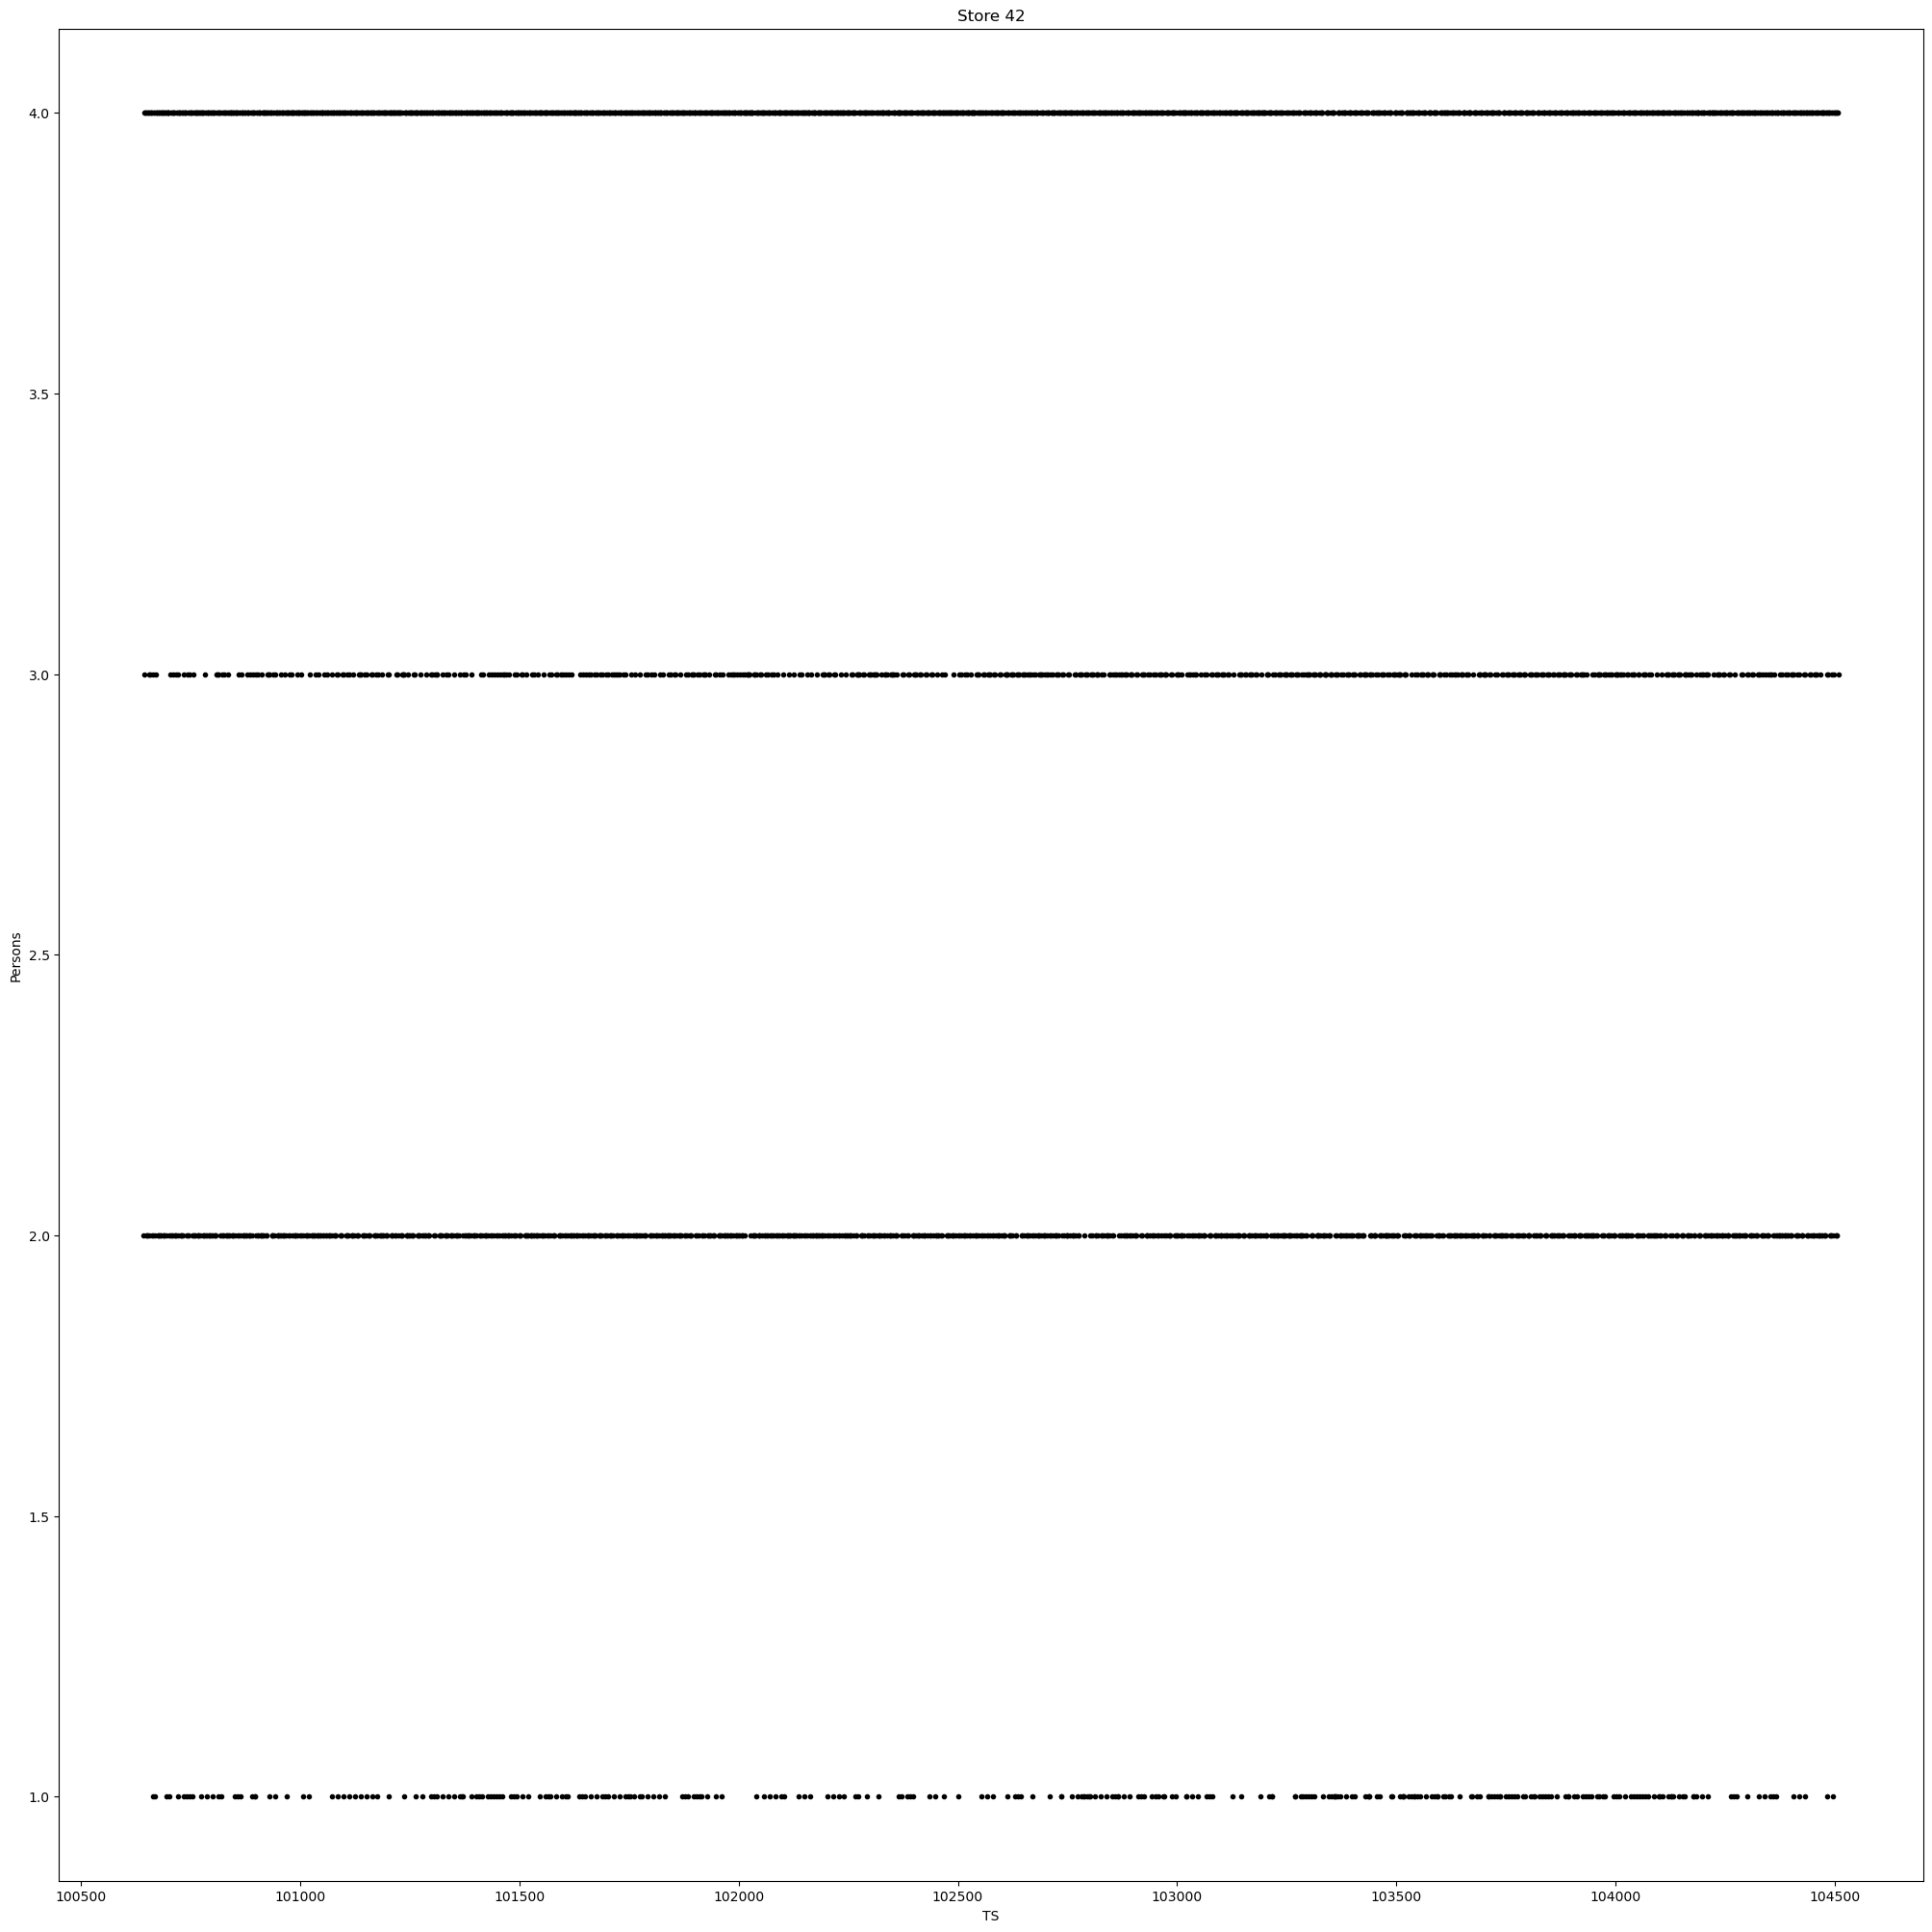

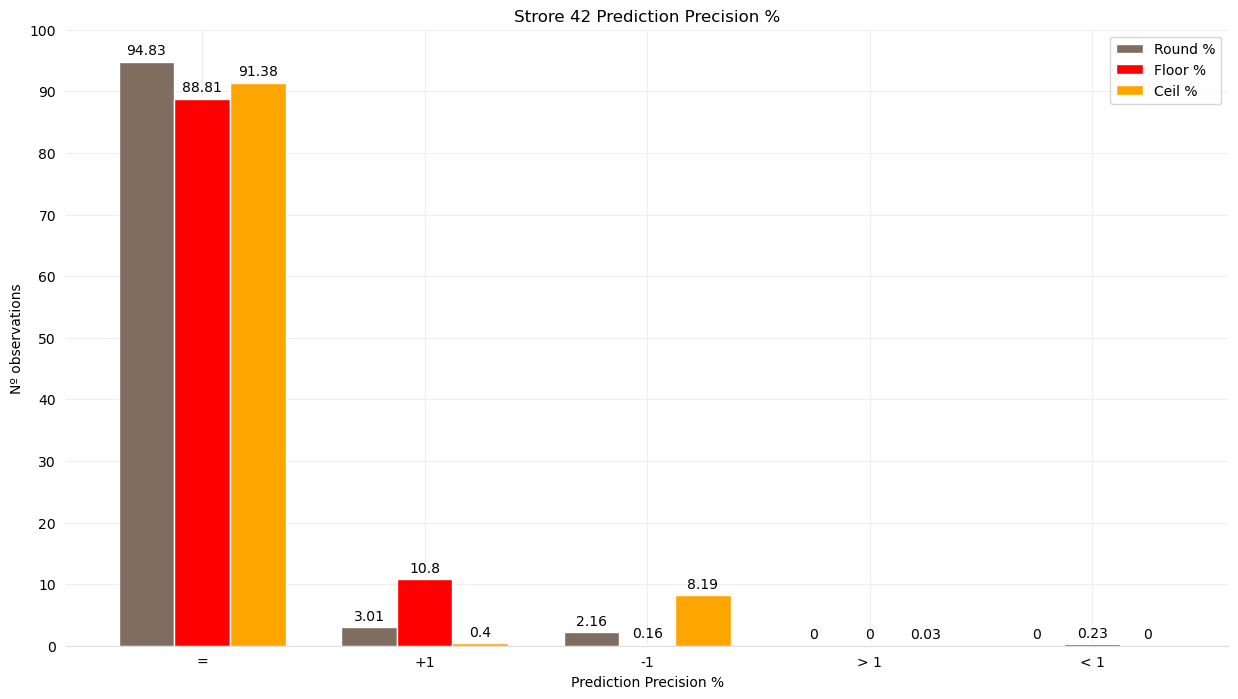

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6619 |        210 |        151 |          0 |          0  
  Floor                |       6199 |        754 |         11 |          0 |         16  
  Ceil                 |       6378 |         28 |        572 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.83 |       3.01 |       2.16 |        0.0 |        0.0  
  Floor % 

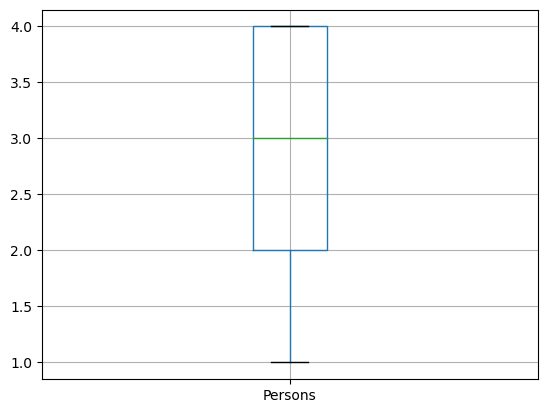

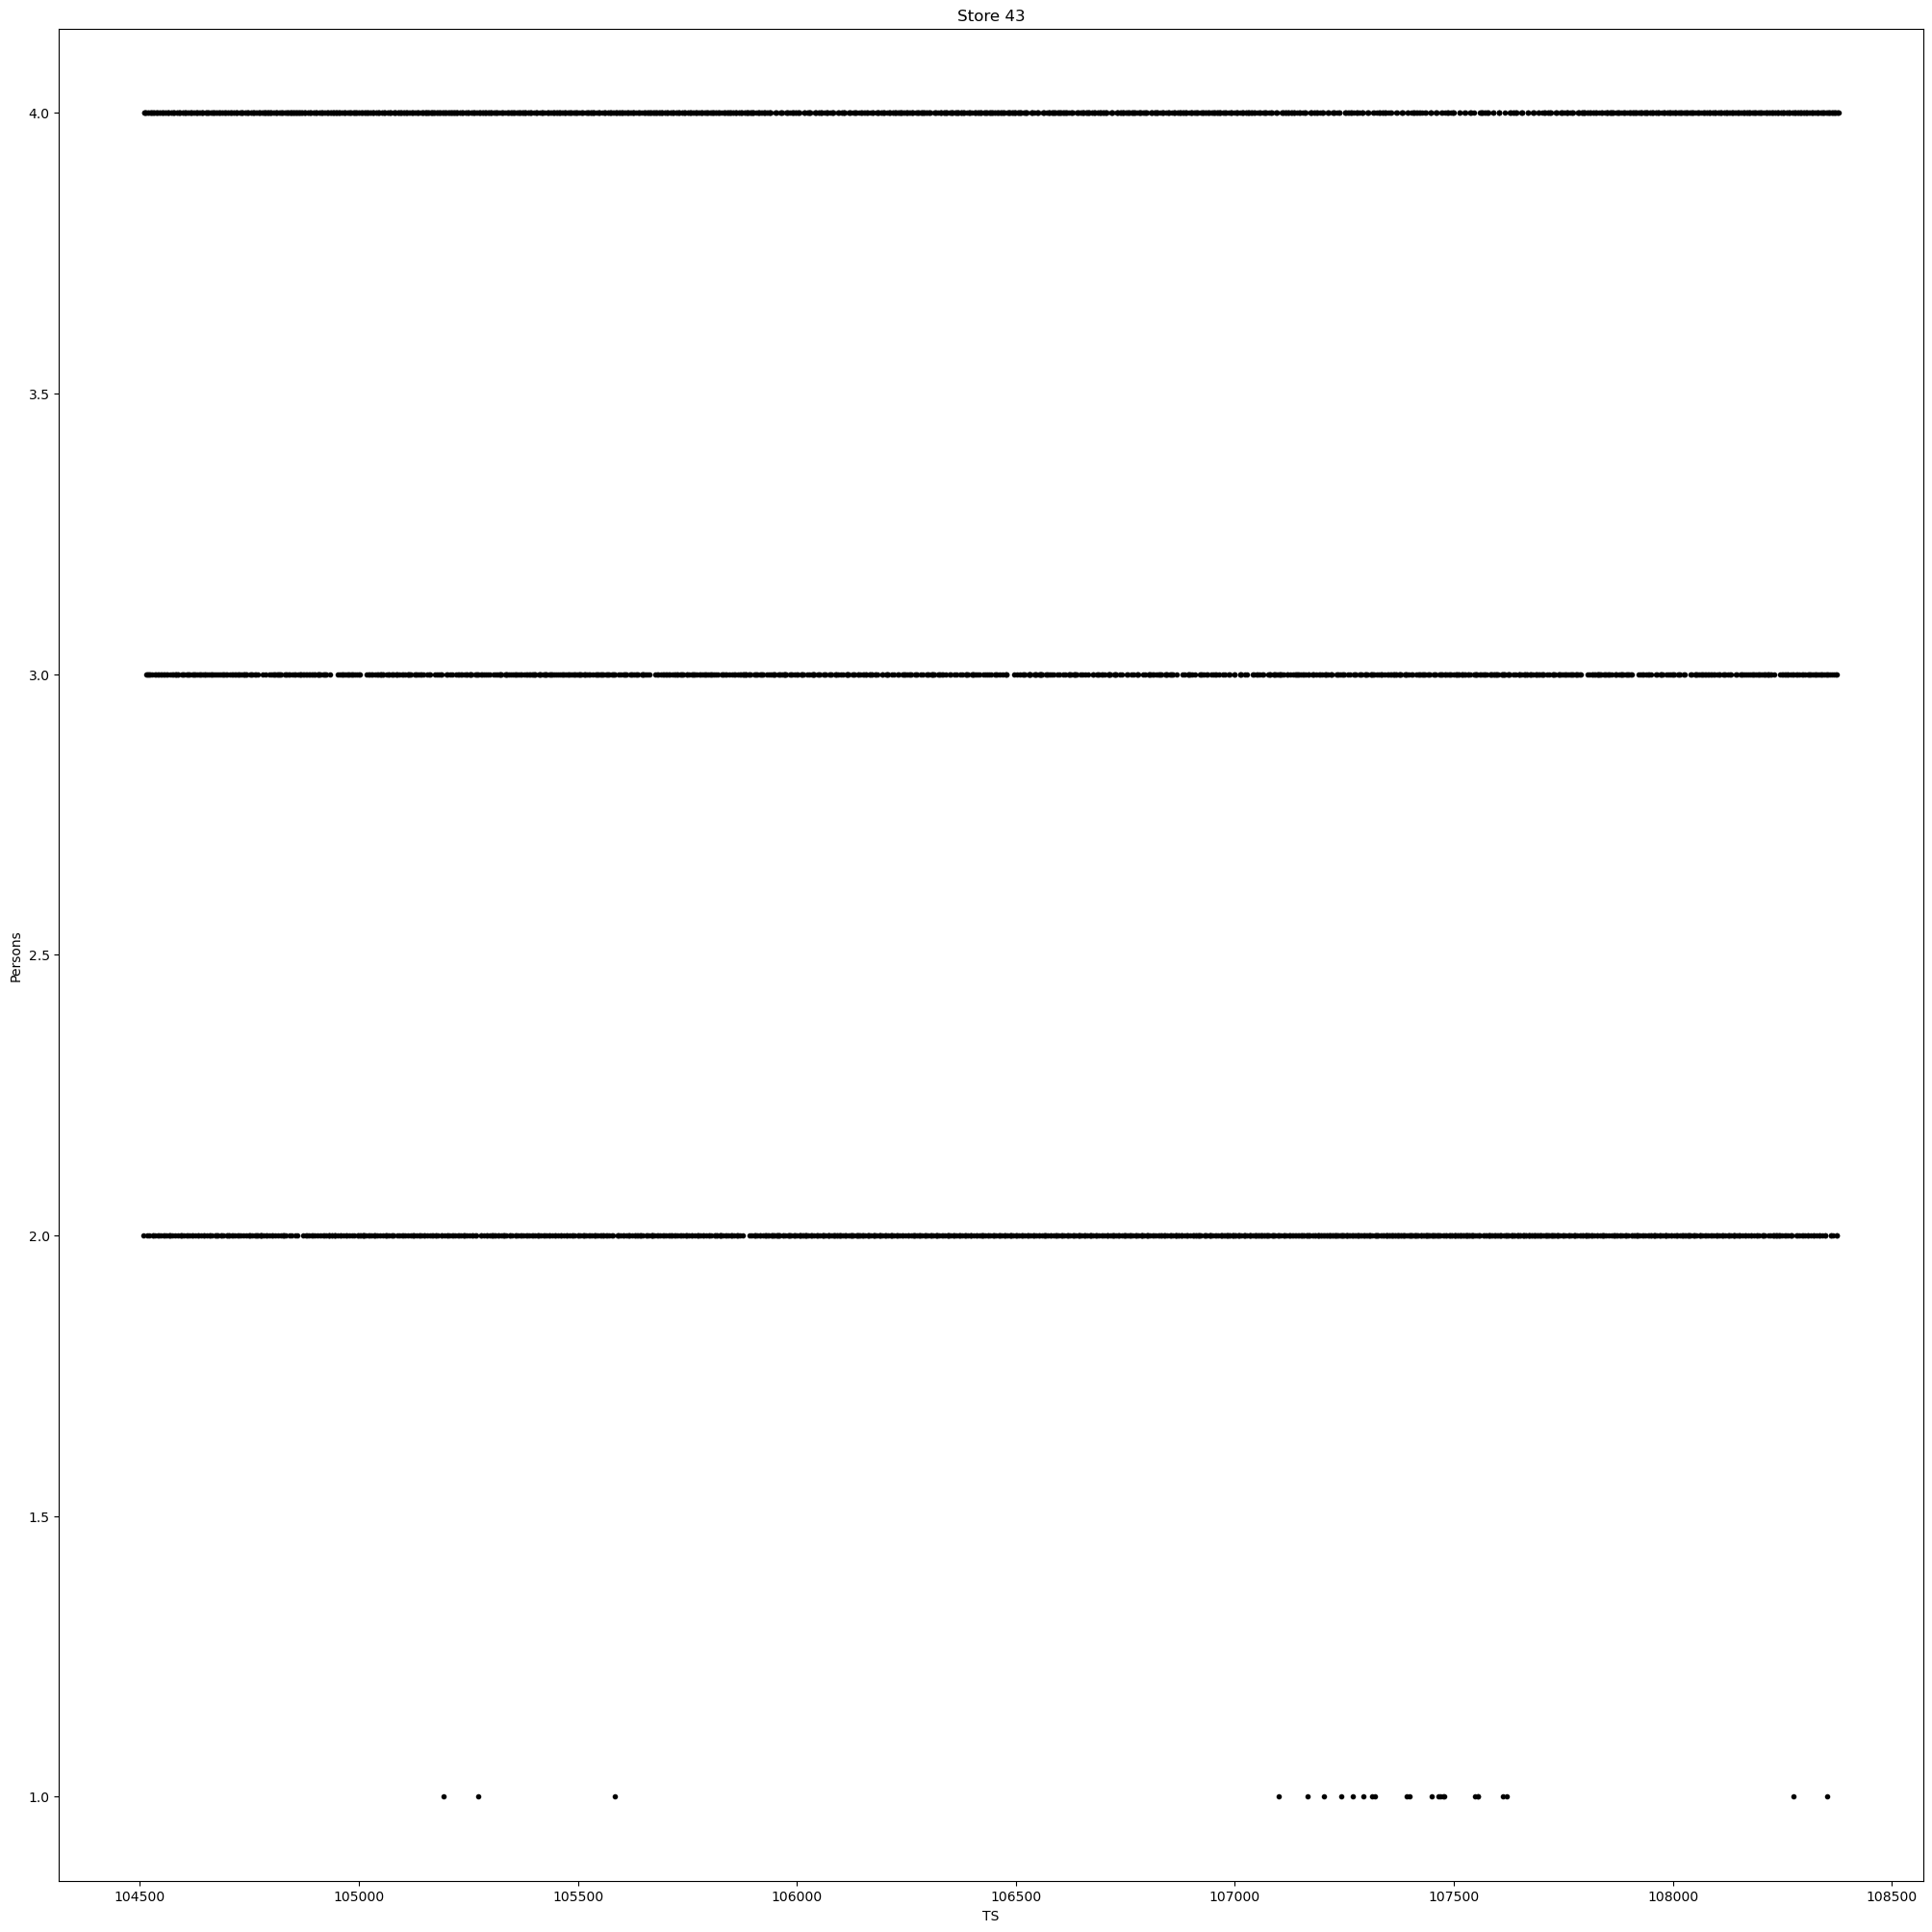

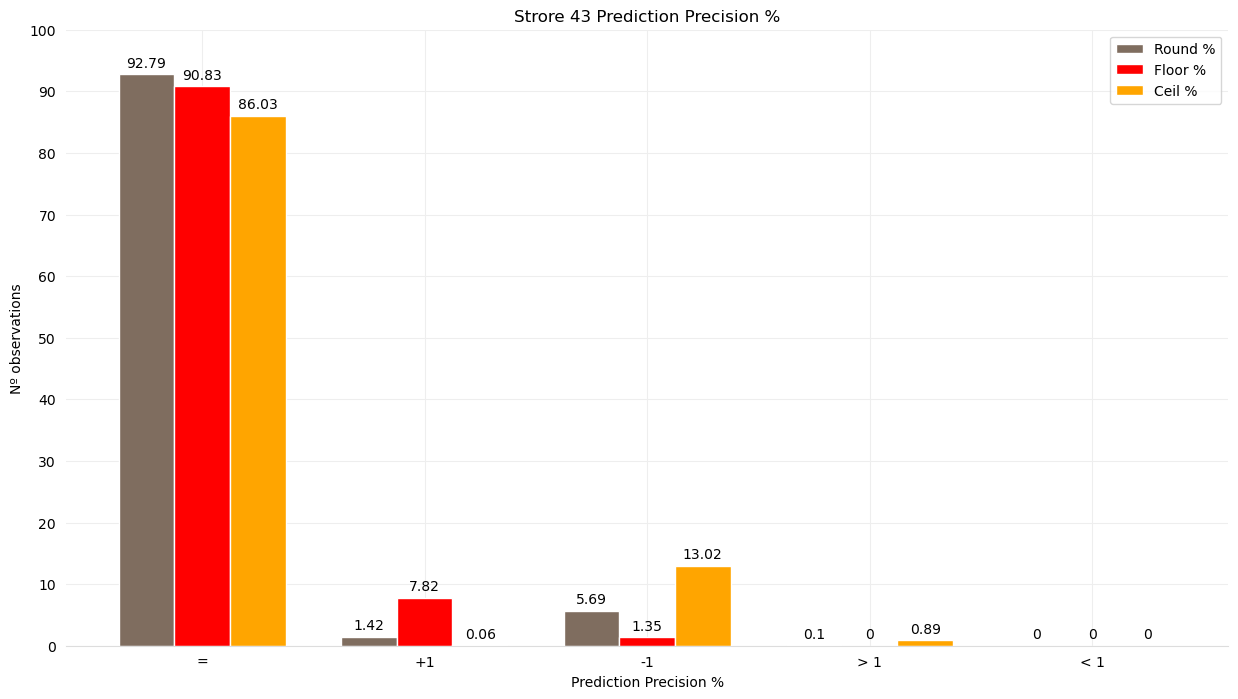

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6477 |         99 |        397 |          7 |          0  
  Floor                |       6340 |        546 |         94 |          0 |          0  
  Ceil                 |       6005 |          4 |        909 |         62 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      92.79 |       1.42 |       5.69 |        0.1 |        0.0  
  Floor % 

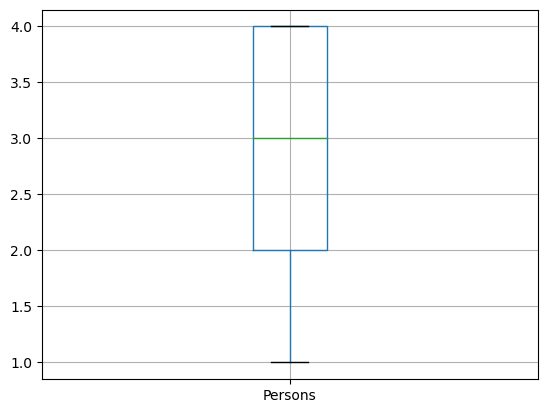

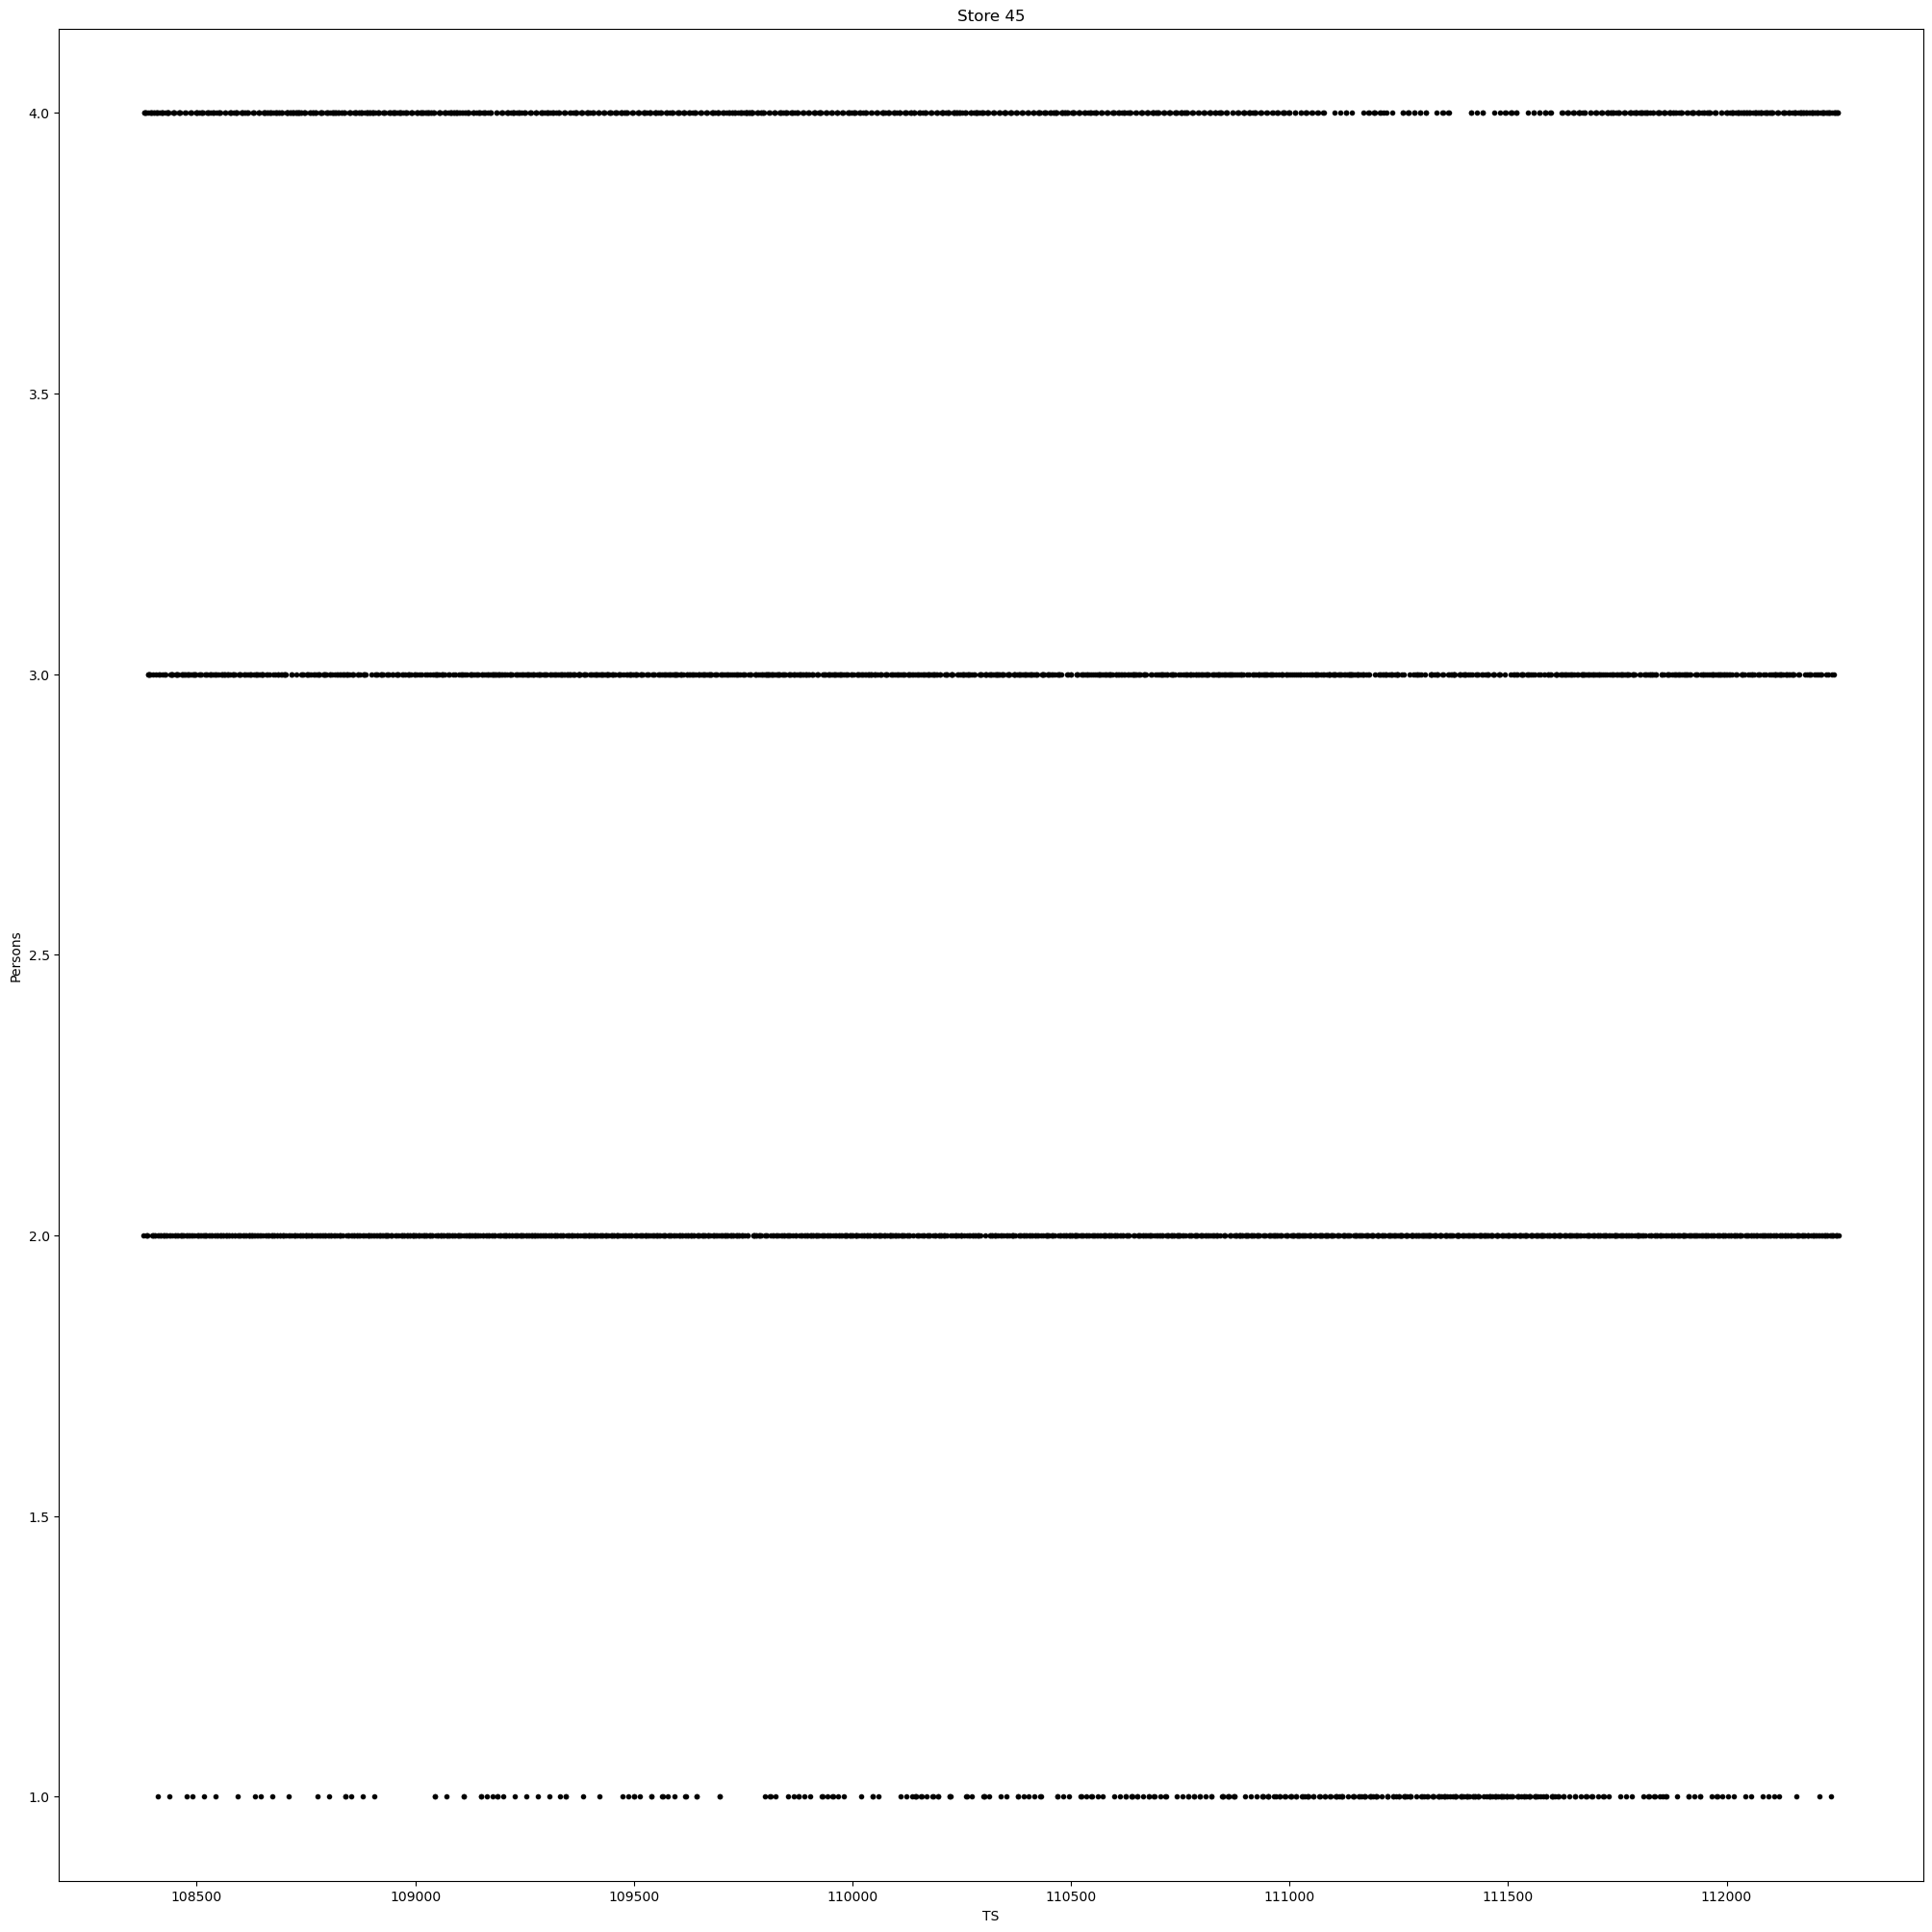

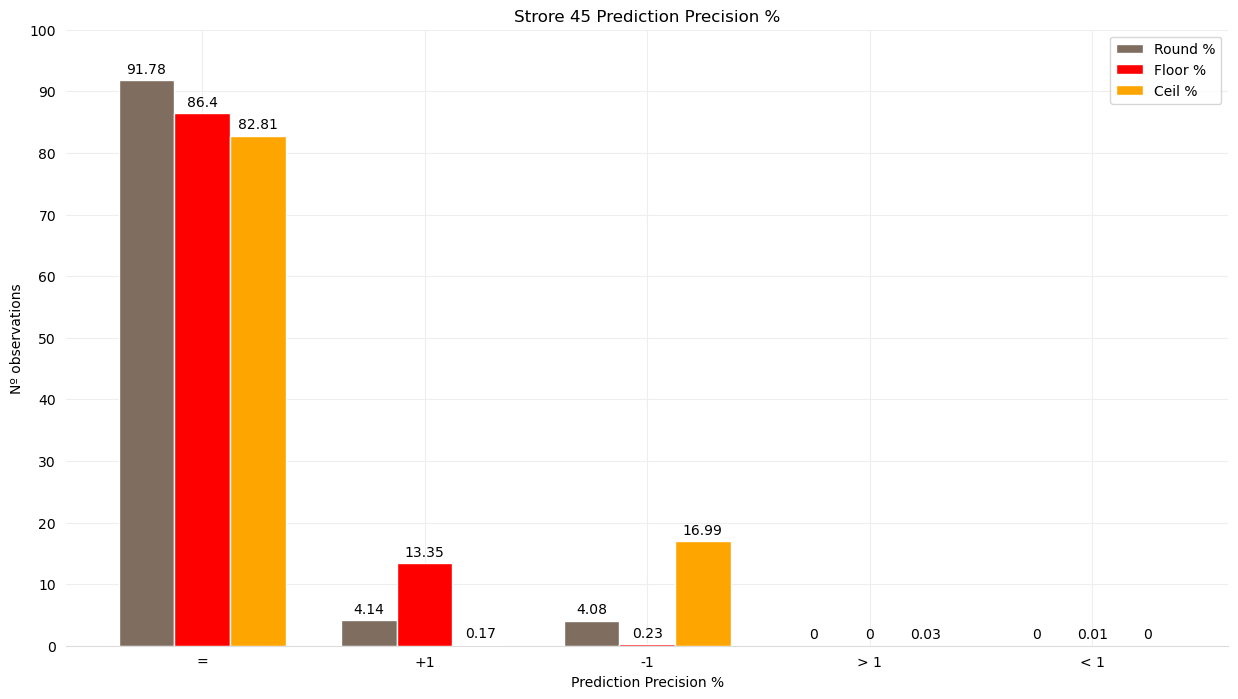

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6406 |        289 |        285 |          0 |          0  
  Floor                |       6031 |        932 |         16 |          0 |          1  
  Ceil                 |       5780 |         12 |       1186 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.78 |       4.14 |       4.08 |        0.0 |        0.0  
  Floor % 

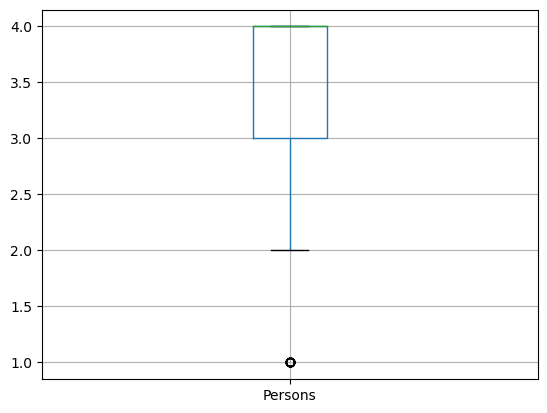

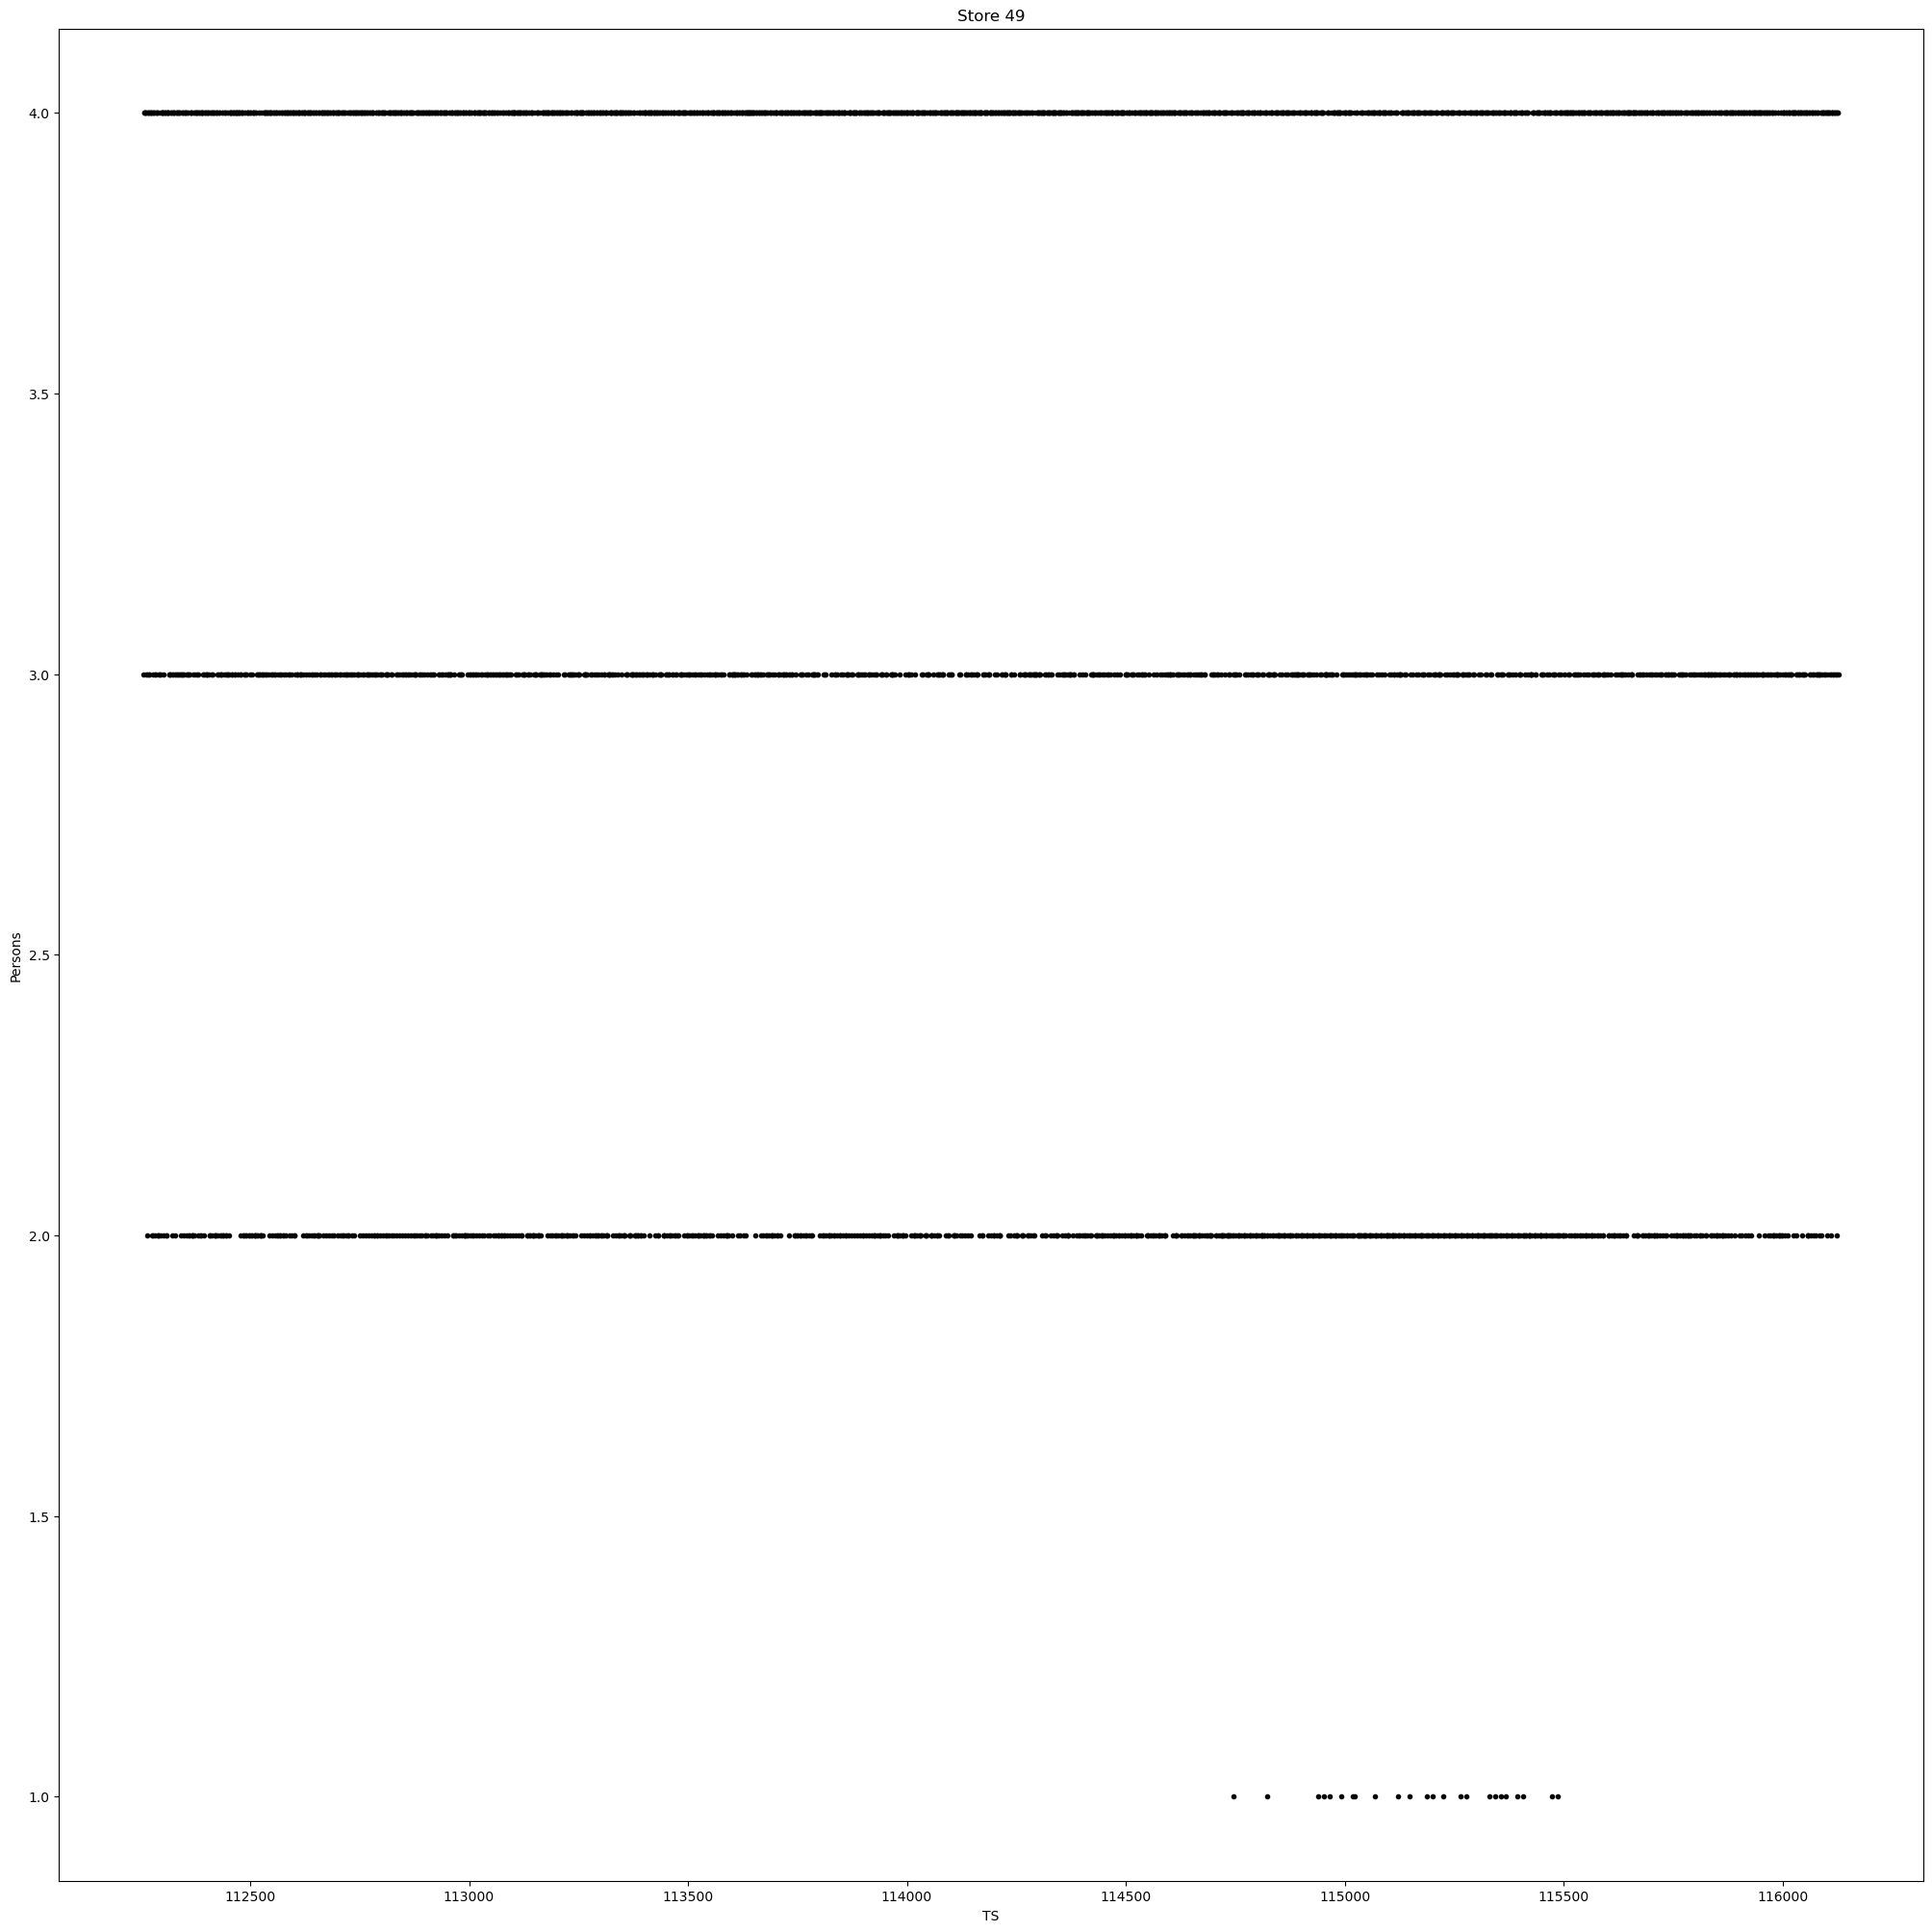

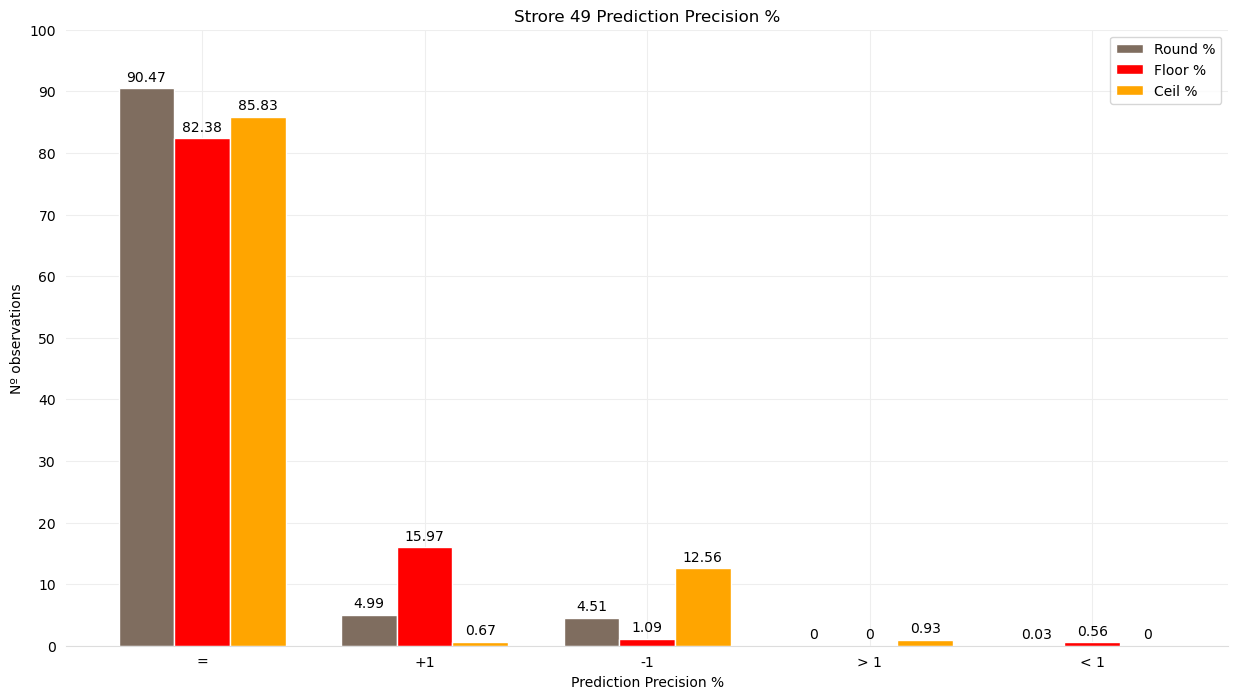

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6315 |        348 |        315 |          0 |          2  
  Floor                |       5750 |       1115 |         76 |          0 |         39  
  Ceil                 |       5991 |         47 |        877 |         65 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      90.47 |       4.99 |       4.51 |        0.0 |       0.03  
  Floor % 

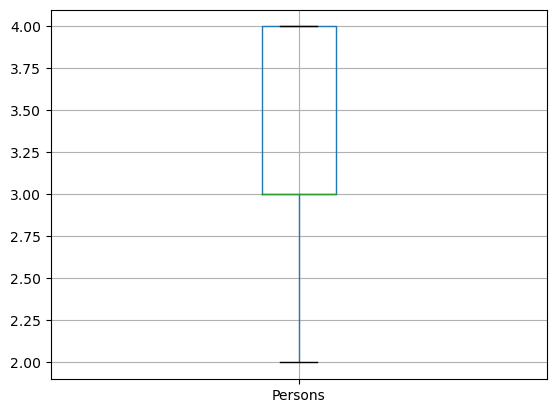

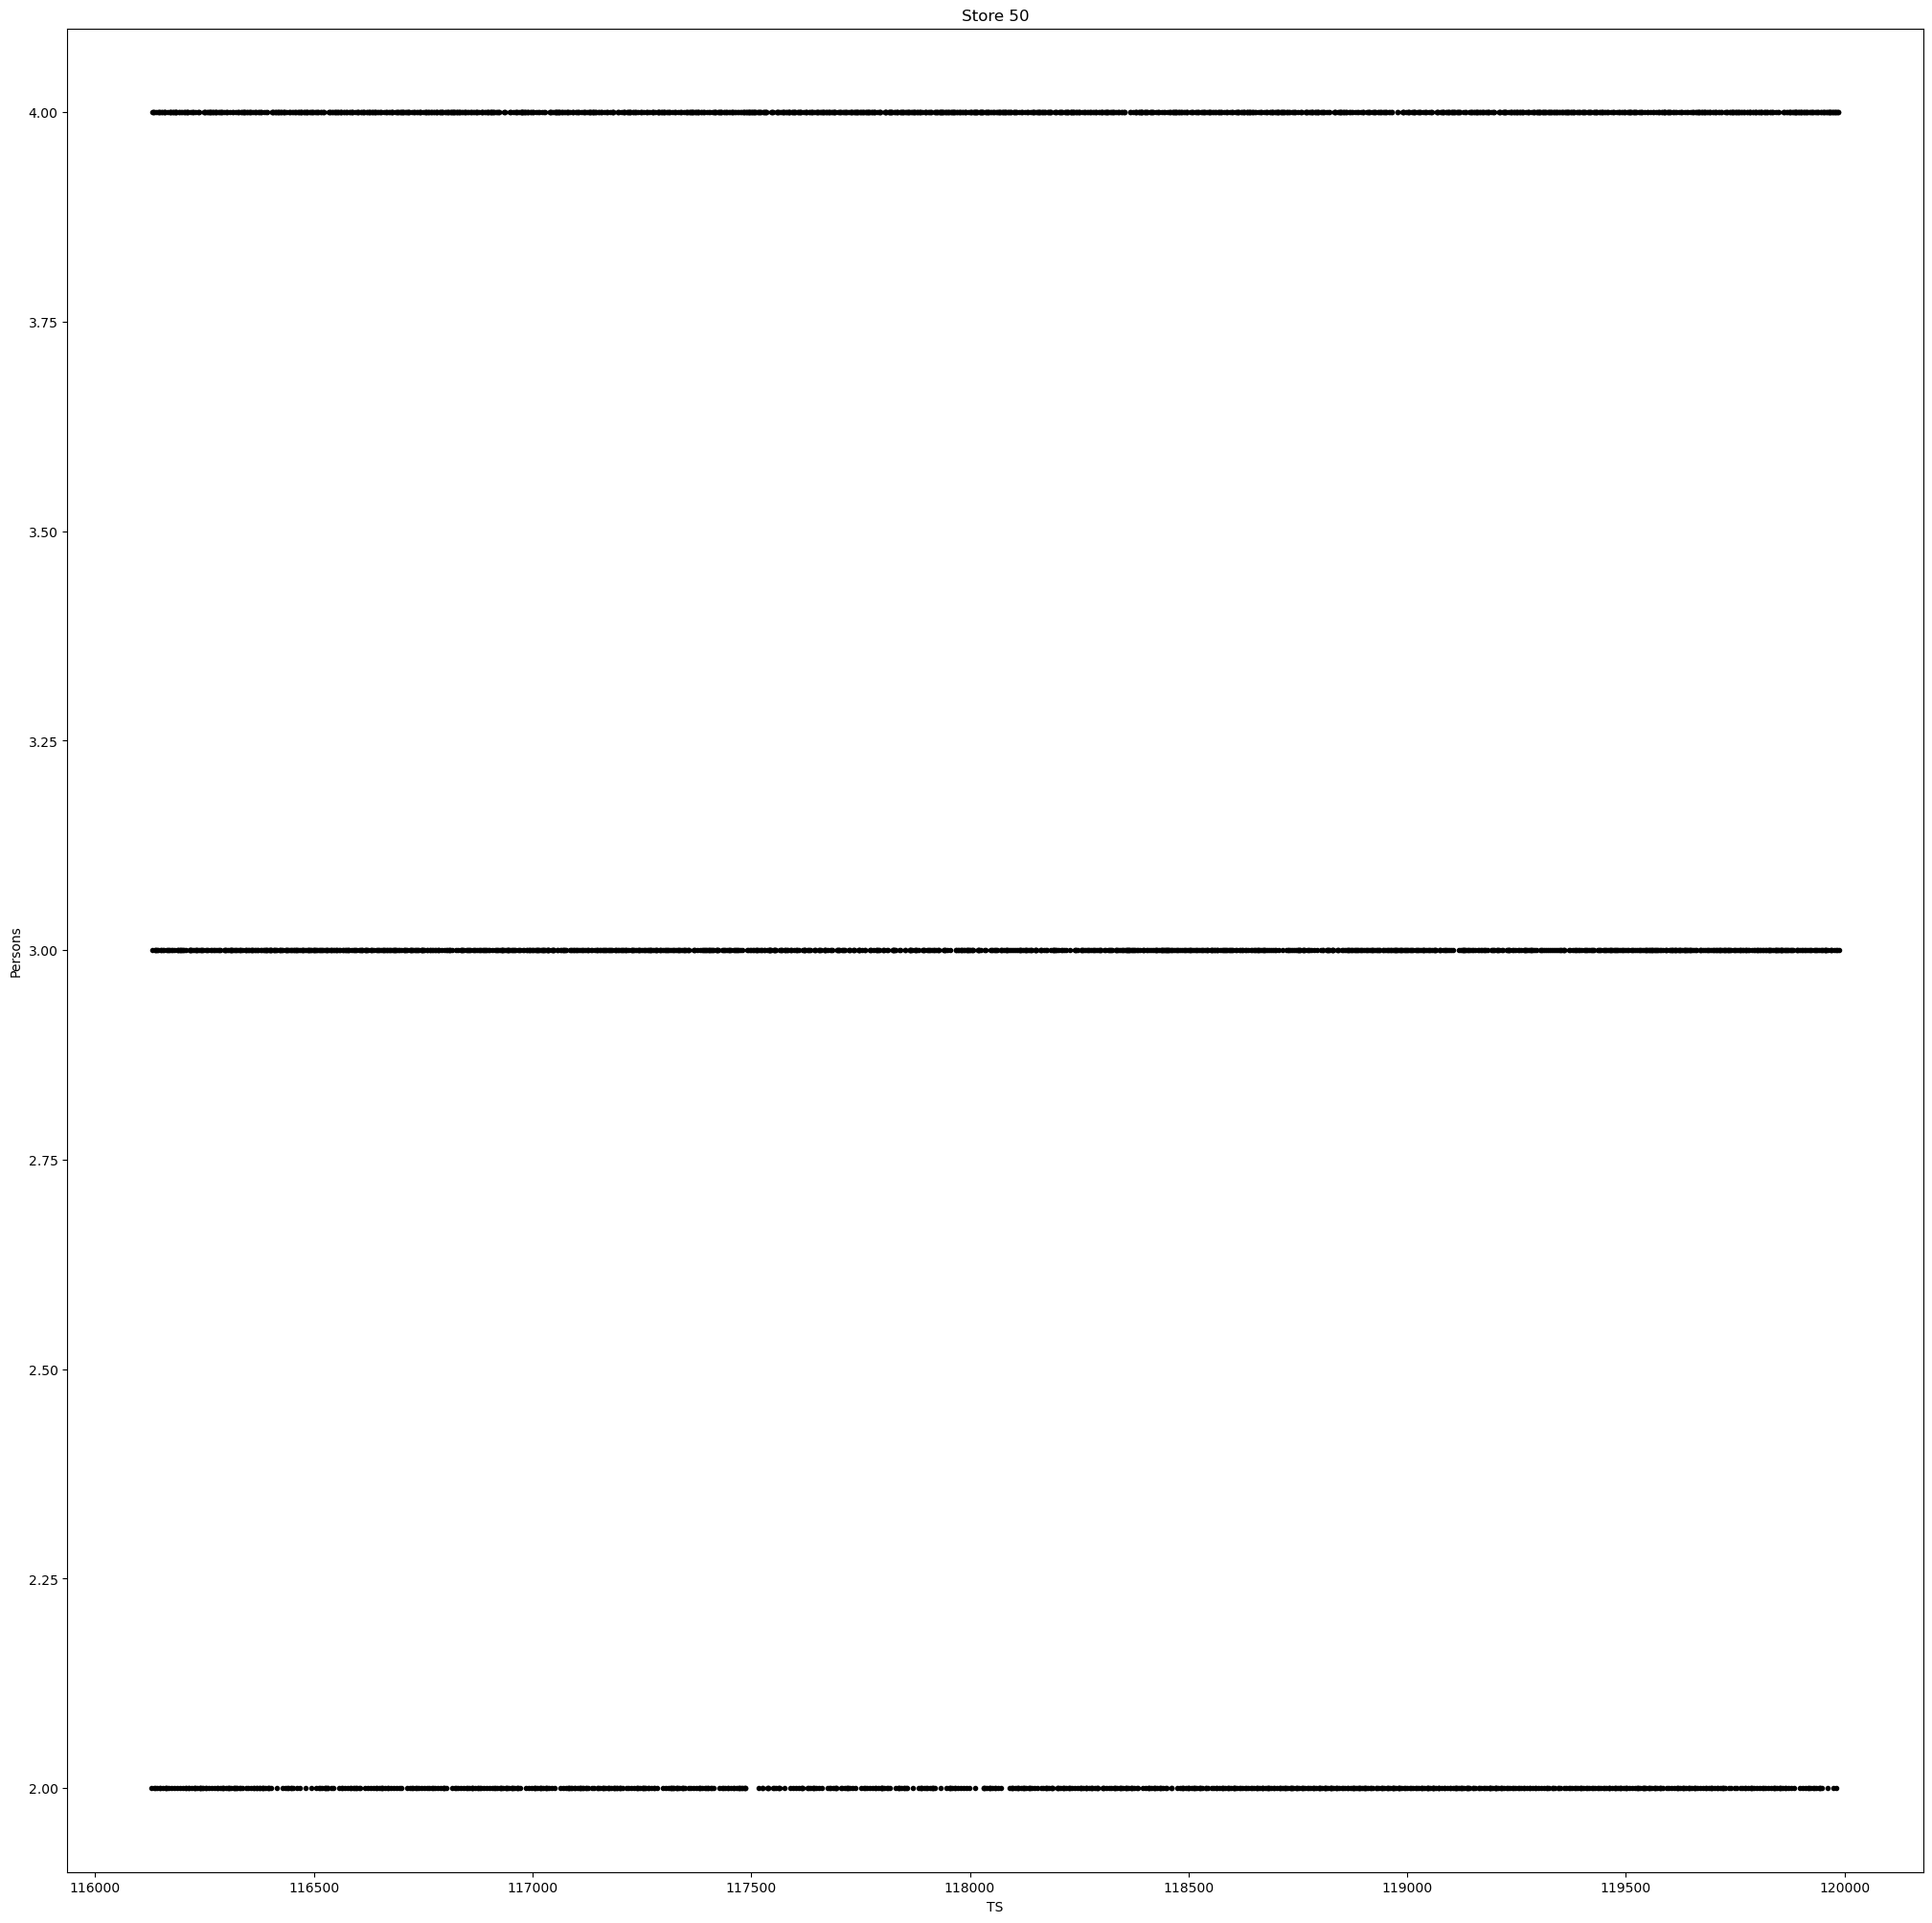

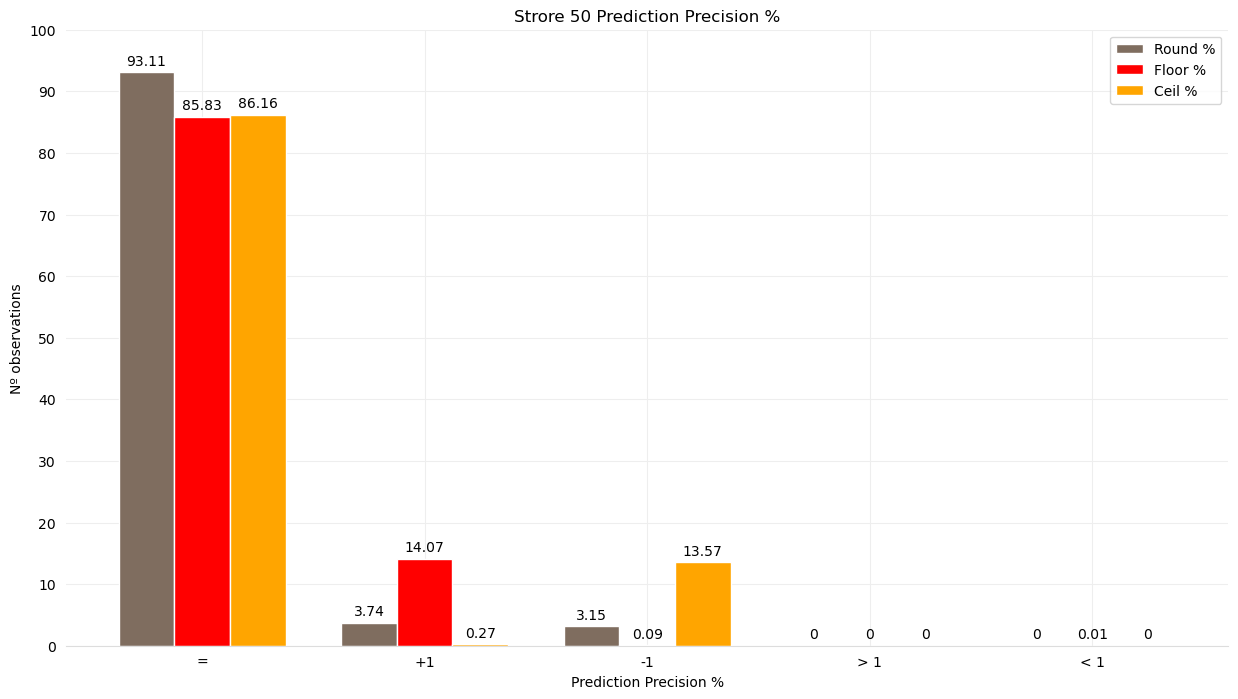

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6499 |        261 |        220 |          0 |          0  
  Floor                |       5991 |        982 |          6 |          0 |          1  
  Ceil                 |       6014 |         19 |        947 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.11 |       3.74 |       3.15 |        0.0 |        0.0  
  Floor % 

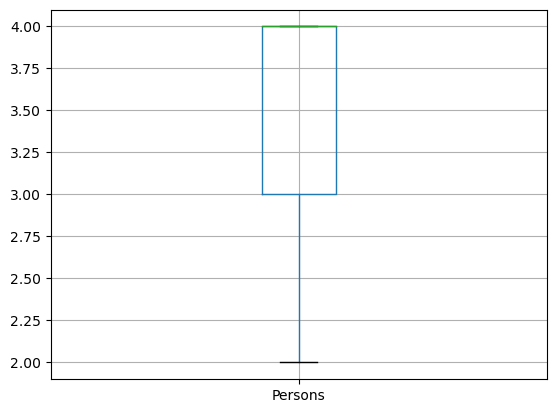

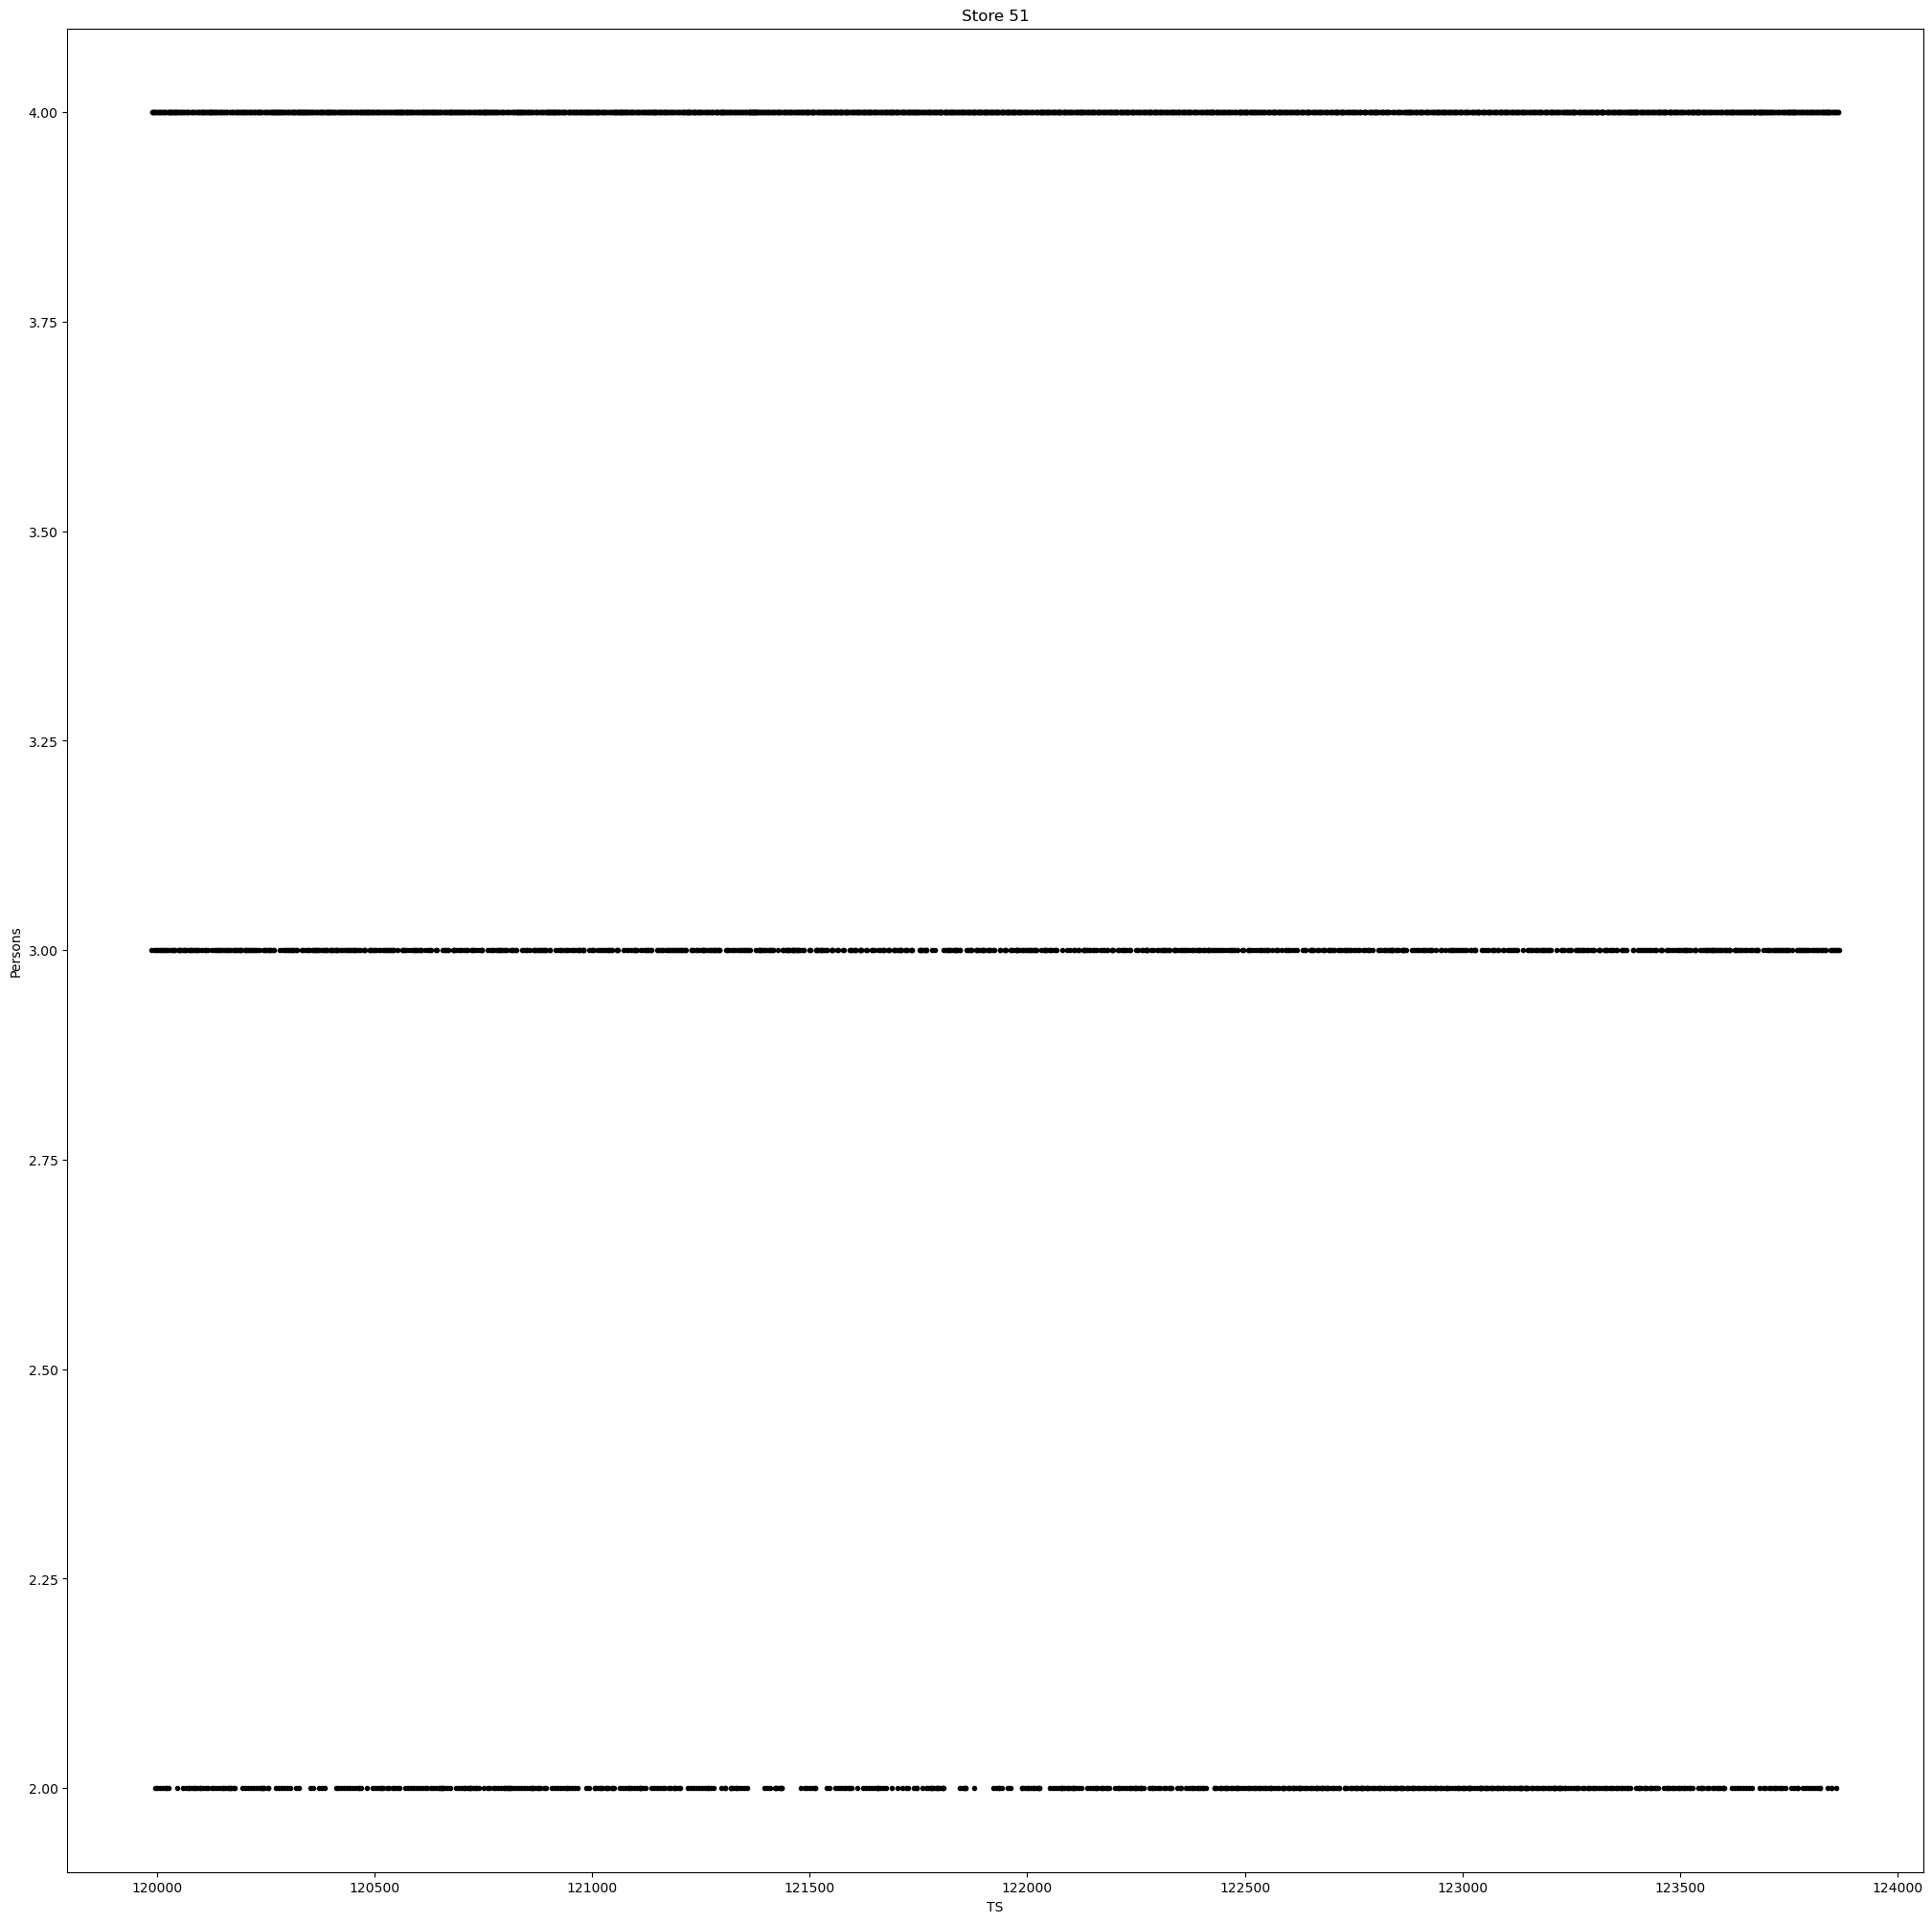

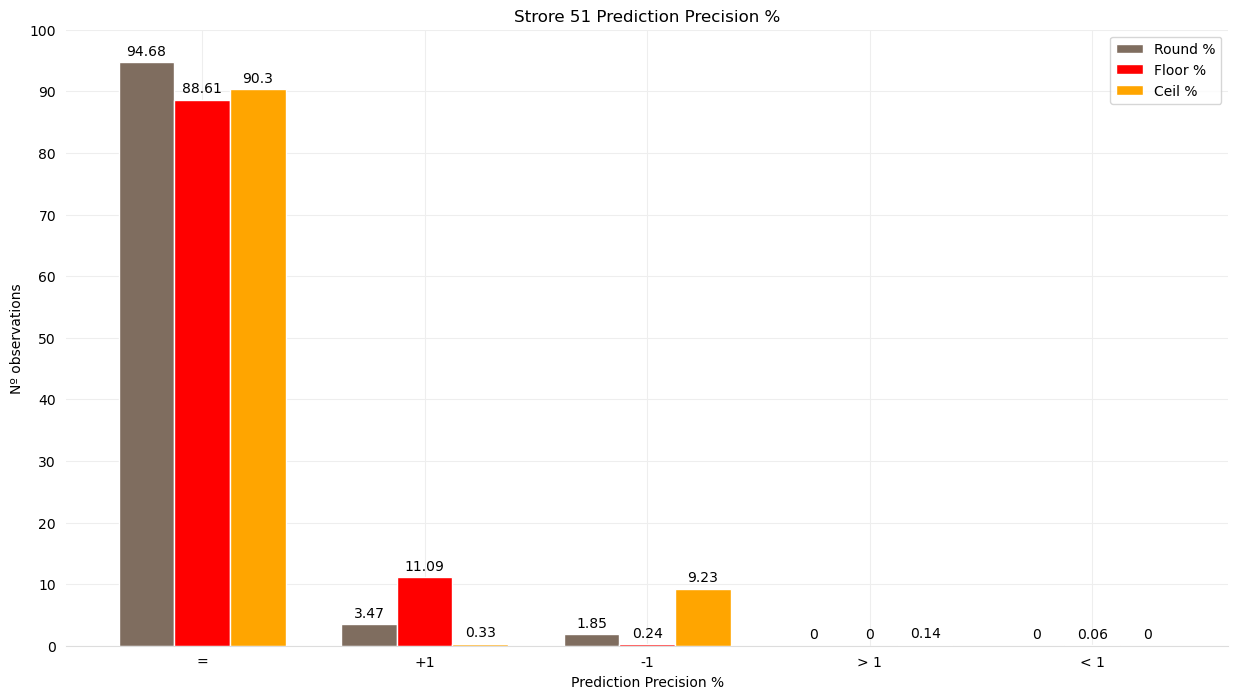

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6609 |        242 |        129 |          0 |          0  
  Floor                |       6185 |        774 |         17 |          0 |          4  
  Ceil                 |       6303 |         23 |        644 |         10 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.68 |       3.47 |       1.85 |        0.0 |        0.0  
  Floor % 

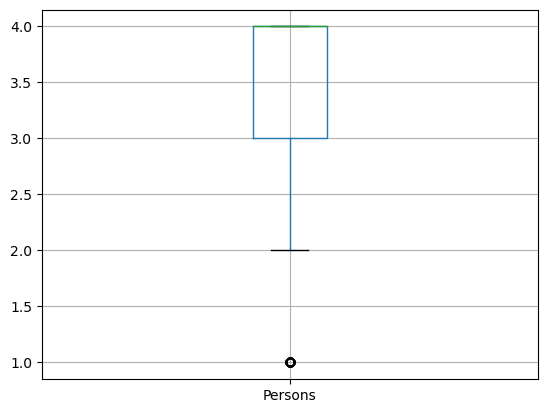

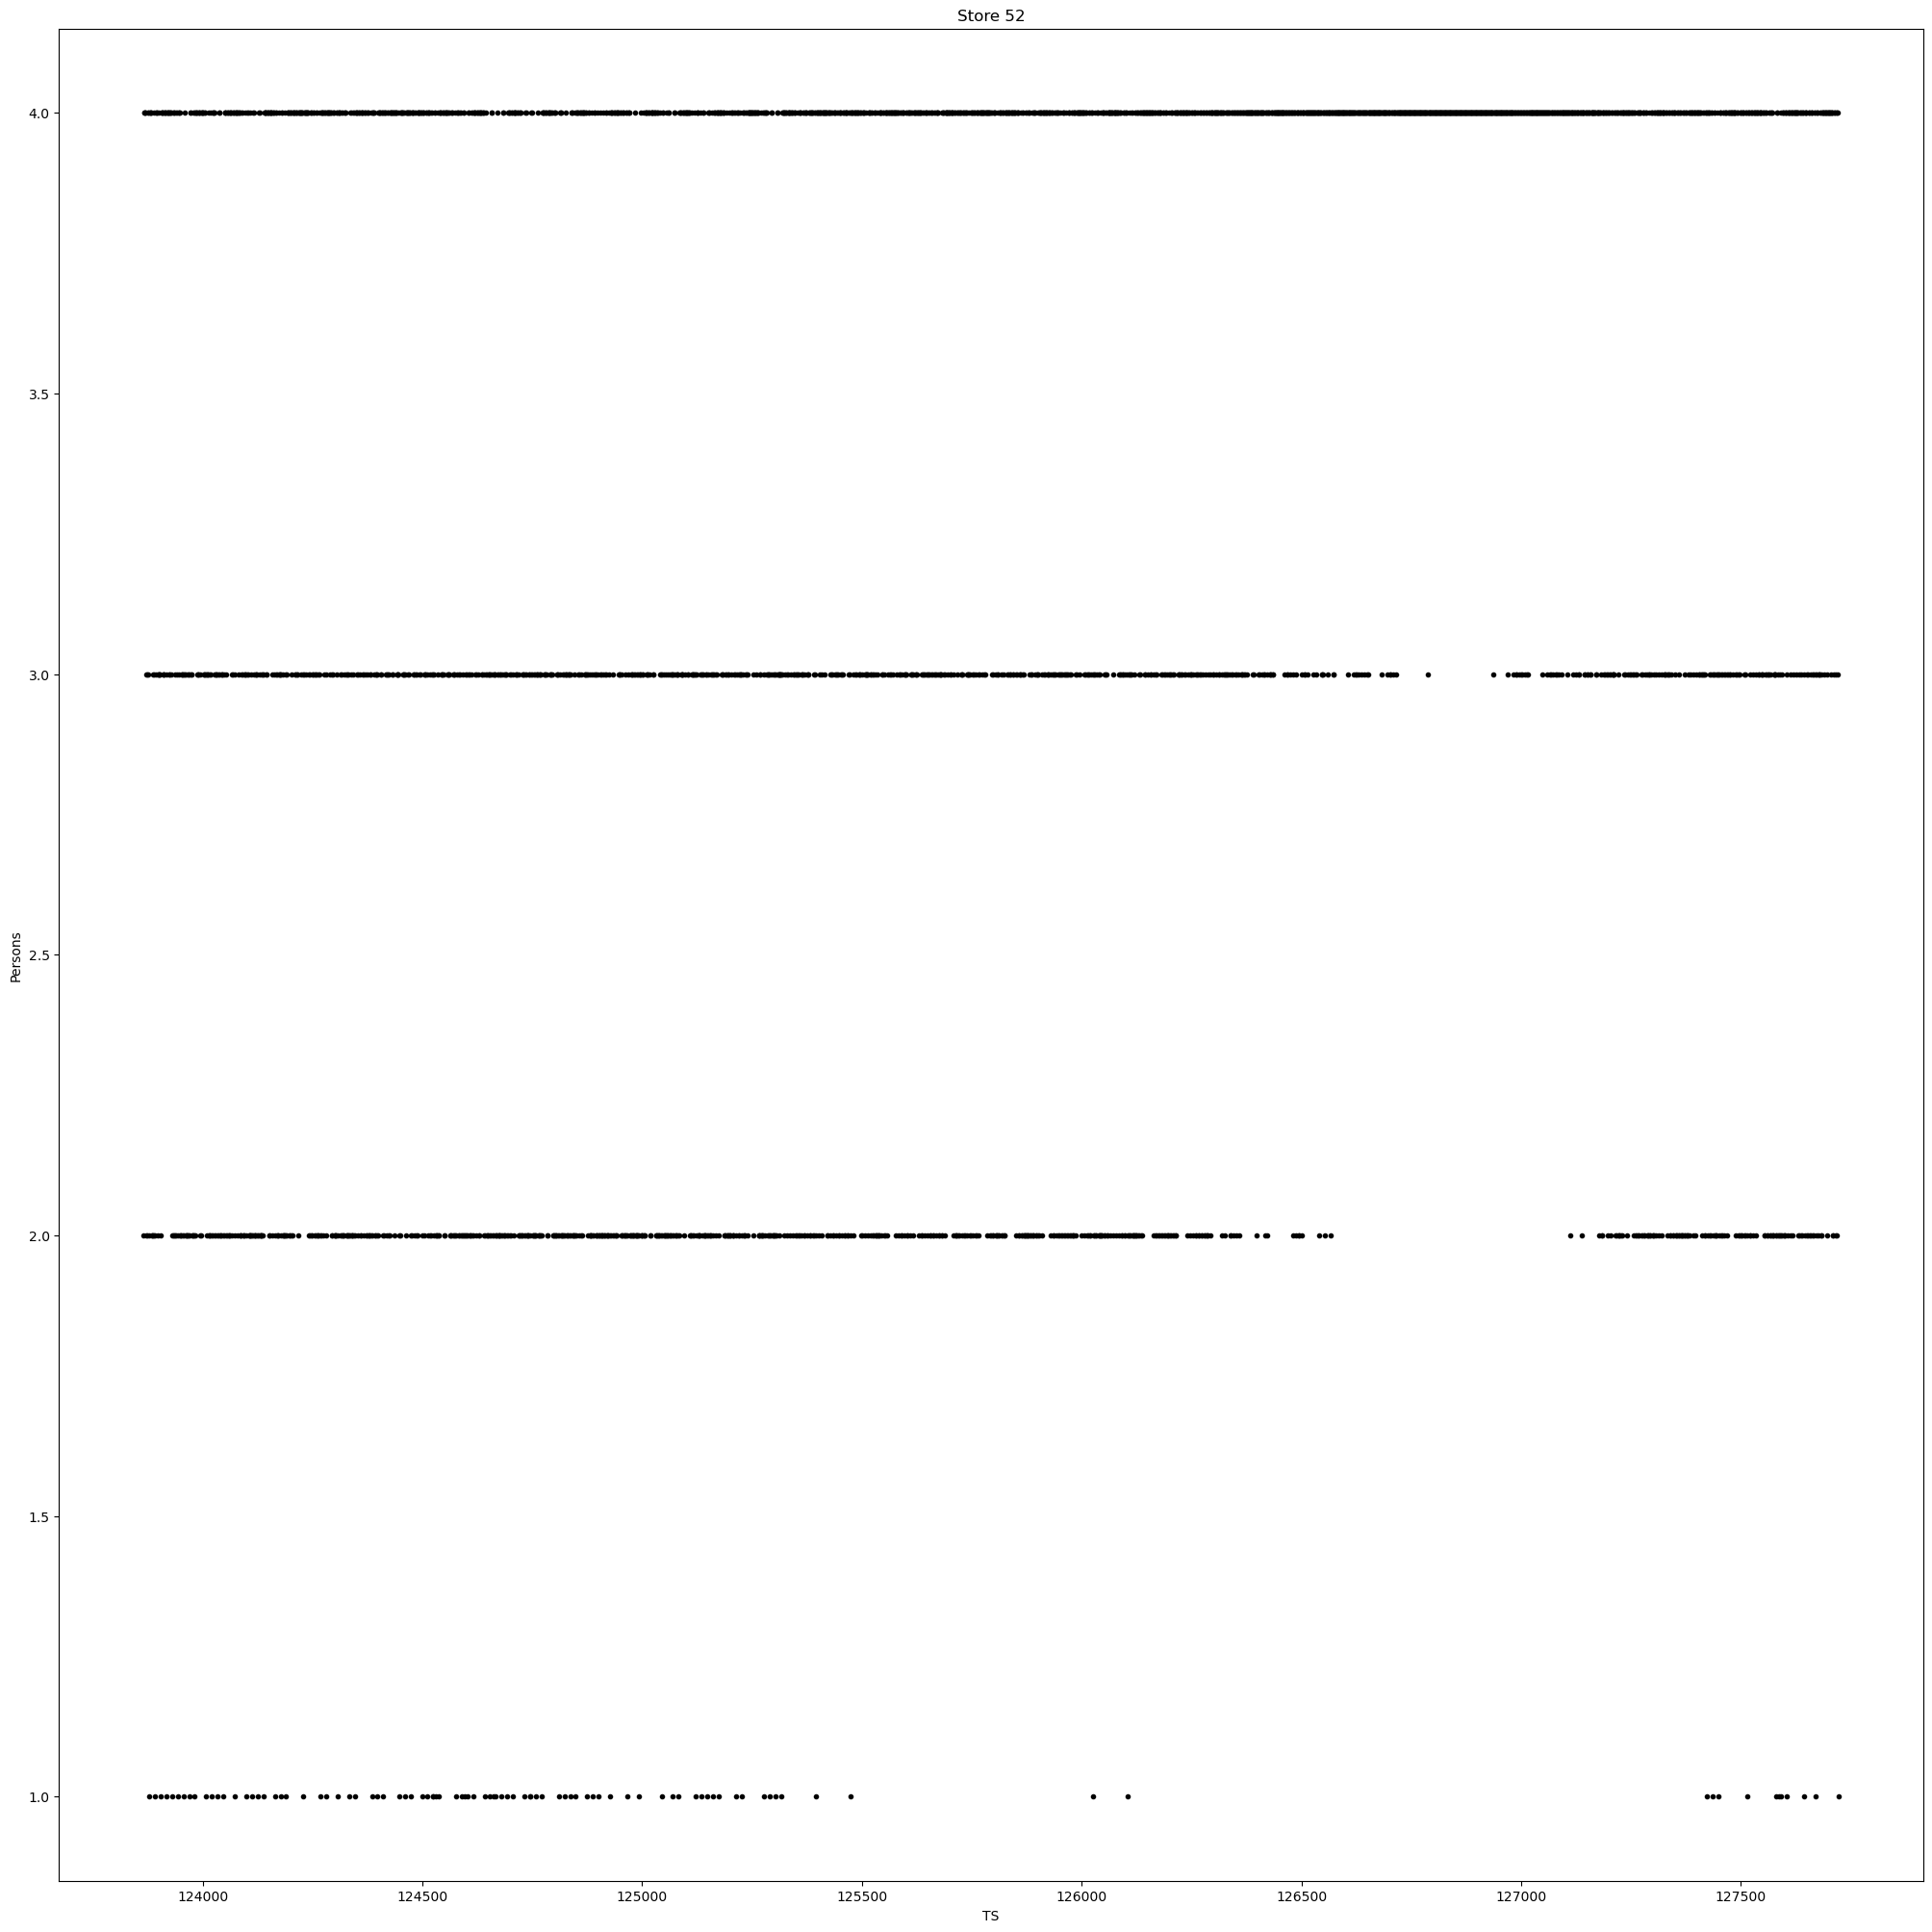

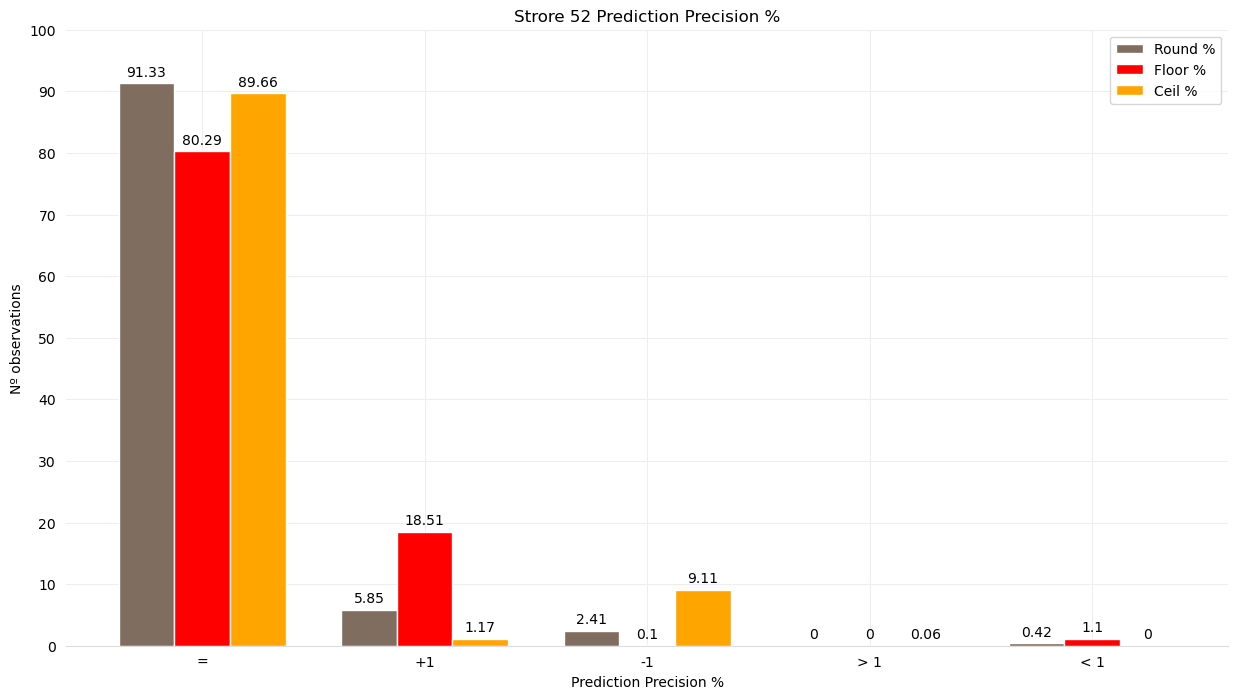

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       6375 |        408 |        168 |          0 |         29  
  Floor                |       5604 |       1292 |          7 |          0 |         77  
  Ceil                 |       6258 |         82 |        636 |          4 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.33 |       5.85 |       2.41 |        0.0 |       0.42  
  Floor % 

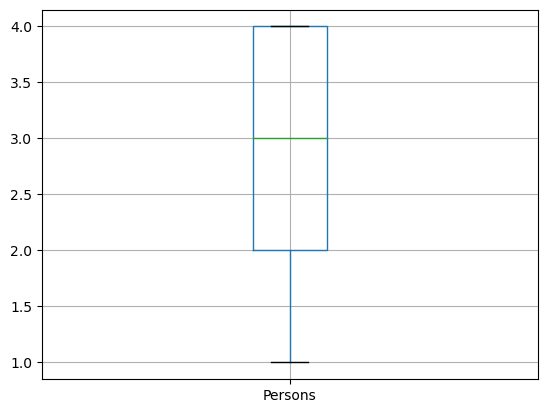

In [ ]:
stores = pd.value_counts(data_filtered['RosterCode'].values.ravel())
stores_ids = list(stores.index)
stores_ids.sort()

#print(stores)
#print(stores_ids)
#print(stores.array)

"""
print('---------------------------------------------------------------------')
print('Nº stores: ' + str(len(stores)))
print('---------------------------------------------------------------------')
"""

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt, ceil, floor
from matplotlib import pyplot
from statistics import mean, median, mode, quantiles
#import tabletext

"""
def model_metrics(y_true, y_pred):
    d_metrics = {}
    d_metrics['mse'] = np.sqrt(mean_squared_error(y_true, y_pred))
    d_metrics['mae'] = mean_absolute_error(y_true, y_pred)
    d_metrics['r2_score'] = r2_score(y_true, y_pred)
    
    return d_metrics
"""

d = {  'Store ID': []
     , 'N Records': []
     , 'N Records Agg': []
     , 'N Records Train': []
     , 'N Records Test': []
     , 'RAW MAE': []
     , 'ROUND MAE': []
     , 'FLOOR MAE': []
     , 'CEIL MAE': []}

r = pd.DataFrame(data=d)

n_usable_stores = 0

for id in stores_ids:
    store_data = data_filtered.loc[data_filtered['RosterCode'] == id]
    store_data = store_data.drop(columns=['RosterCode'])
    
    n_store_rec = store_data.shape[0]
    
    print()
    print('----------------------------------------------------------------------------------------------------------------')
    print('Store ' + str(id))
    print('----------------------------------------------------------------------------------------------------------------')
    print()
    
    #print('Nº records: ' + str(n_store_rec))

    #----------------------------------------------------------------------------------------------------------------
    """
    zeros_data = store_data.loc[store_data['Persons'] == 0]
    #print(zeros_data)
    #bad_data = zeros_data.loc[data['TicketsPrev'] > 0]
    bad_data = zeros_data.loc[zeros_data['Tickets'] > 0]
    #print(bad_data)
    
    if bad_data.empty:
        n_usable_stores += 1
    else:
        continue
        
    #print(zeros_data)
    #print(bad_data)
    """
    #----------------------------------------------------------------------------------------------------------------
    v = list(store_data['Persons'].values)
    _mean = mean(v)
    _median = median(v)
    _mode = mode(v)
    _quantiles = quantiles(v)
    max_value = max(v)
    min_value = min(v)

    #print(_mean, _median, _mode, _quantiles, min_value, max_value)
    
    headername = ["{}".format(x) for x in range(6)]
    headername[0] = 'Mean'
    headername[1] = 'Median'
    headername[2] = 'Mode'
    headername[3] = 'Quantiles'
    headername[4] = 'Min Value'
    headername[5] = 'Max Value'
    data = [[_mean, _median, _mode, str(_quantiles), min_value, max_value]]

    PrintTable(data, 
       headername, 
       [10, 10, 10, 20, 10, 10], 
       ["^","^","^","^","^","^"]).print()    
    
    boxplot = store_data.boxplot(column=['Persons'])

    fig = pyplot.figure(figsize=(25, 25))
    pyplot.plot(store_data['Persons'], 'k.')
    pyplot.title('Store ' + str(id))
    pyplot.xlabel('TS')
    pyplot.ylabel('Persons')
    pyplot.show()
    #----------------------------------------------------------------------------------------------------------------
    
    store_data_filtered = pd.DataFrame(store_data.resample('H', on='StartDate').sum())
    
    #print(store_data_filtered)
    n_store_rec_agg = store_data_filtered.shape[0]
    #print('Nº records agg: ' + str(n_store_rec_agg))
    
    store_data_filtered.reset_index(inplace=True)
    #print(store_data_filtered)
    
    store_data_filtered['Month'] = store_data_filtered['StartDate'].apply(lambda x: x.month)
    store_data_filtered['Day'] = store_data_filtered['StartDate'].apply(lambda x: x.weekday())
    store_data_filtered['Hour'] = store_data_filtered['StartDate'].apply(lambda x: x.hour)
    #print(store_data_filtered)
    
    store_data_filtered = store_data_filtered.drop(columns=['StartDate'])
    #print(store_data_filtered)
    
    #boxplot = store_data_filtered.boxplot(column=['Persons'])
    #boxplot = store_data_filtered.boxplot(column=['Persons'], by=['Persons'])
    
    store_data_filtered = store_data_filtered[['Month', 'Day', 'Hour', 'TicketsPrev', 'Persons']]
    #print(store_data_filtered)
    
    N = n_store_rec_agg
    K = N * 80 / 100
    #print(N, K, int(K))
    K = int(K)
    
    filename = 'loja_' + str(id) + '_data.csv'
    #store_data_filtered.to_csv(filename, index=False)

    X = store_data_filtered.iloc[:,:-1].values
    y = store_data_filtered.iloc[:,-1].values

    #print(X)
    #print(y)
    
    X_train = X[:-K,:]
    y_train = y[:-K]
    X_test = X[-K:]
    y_test = y[-K:]
    
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    #print(X_test)
    metrics = model_metrics(y_test, y_pred)
    #print(model_metrics(y_test, y_pred))
    
    #rmse = sqrt(metrics['mse'])
    
    r_mylist = []
    rc_mylist = []
    rf_mylist = []
    
    #print(y_pred)

    equal = [0, 0, 0]
    plus_1 = [0, 0, 0]
    minus_1 = [0, 0, 0]
    gt_1 = [0, 0, 0]
    lt_1 = [0, 0, 0]
    
    k = 0
    for el in y_pred:
        _round = round(el)
        _ceil = ceil(el)
        _floor = floor(el)

        v = y_test[k]
        
        #print(el, _round, _floor, _ceil)
        
        if v == _round:
            equal[0] += 1
        elif v == _round + 1:
            plus_1[0] += 1
        elif v == _round - 1:
            minus_1[0] += 1
        elif _round + 1 > v:
            gt_1[0] += 1
        elif _round - 1 < v:
            lt_1[0] += 1
            
        if v == _floor:
            equal[1] += 1
        elif v == _floor + 1:
            plus_1[1] += 1
        elif v == _floor - 1:
            minus_1[1] += 1
        elif _floor + 1 > v:
            gt_1[1] += 1
        elif _floor - 1 < v:
            lt_1[1] += 1
            
        if v == _ceil:
            equal[2] += 1
        elif v == _ceil + 1:
            plus_1[2] += 1
        elif v == _ceil - 1:
            minus_1[2] += 1
        elif _ceil + 1 > v:
            gt_1[2] += 1
        elif _ceil - 1 < v:
            lt_1[2] += 1
            
        r_mylist.append(_round)
        rc_mylist.append(_ceil)
        rf_mylist.append(_floor)
        
        k += 1

    """
    print(list(y_pred)[:25])
    print(r_mylist[:25])
    print(rc_mylist[:25])
    print(rf_mylist[:25])
    """
    
    N = len(r_mylist)
    
    #-------------------------------------------------------------------------------------------------------

    labs = ('=', '+1', '-1', '> 1', '< 1')
    
    vals = {
        'Round %': (round(equal[0] * 100 / N, 2), round(plus_1[0] * 100 / N, 2), round(minus_1[0] * 100 / N, 2), round(gt_1[0] * 100 / N, 2), round(lt_1[0] * 100 / N, 2)),
        'Floor %': (round(equal[1] * 100 / N, 2), round(plus_1[1] * 100 / N, 2), round(minus_1[1] * 100 / N, 2), round(gt_1[1] * 100 / N, 2), round(lt_1[1] * 100 / N, 2)),
        'Ceil %': (round(equal[2] * 100 / N, 2), round(plus_1[2] * 100 / N, 2), round(minus_1[2] * 100 / N, 2), round(gt_1[2] * 100 / N, 2), round(lt_1[2] * 100 / N, 2)),
    }
   
    x = np.arange(len(labs))
    width = 0.25
    multiplier = 0

    fig, ax = pyplot.subplots(figsize=(15, 8))

    j = 0
    for attribute, measurement in vals.items():
        offset = width * multiplier
        
        color='#7f6d5f'
        if j == 1:
            color='red'
        elif j == 2:
            color='orange'
            
        rects = ax.bar(x + offset, measurement, width, color=color, edgecolor='white', label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
        j += 1
        
    ax.set_ylabel('Nº observations')
    ax.set_xlabel('Prediction Precision %')
    ax.set_title('Strore ' + str(id) + ' Prediction Precision %')
    ax.set_xticks(x + width, labs)
    ax.legend(loc='upper right')
    #ax.set_ylim(0, 100)
    pyplot.yticks((0, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90))
    
    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')
    
    pyplot.show()    
    
    fig.savefig(str(id) + '_%_round.png')
    #-------------------------------------------------------------------------------------------------------
    """
    print(tabletext.to_text([['Method', '=', '+1', '-1', '> 1', '< 1']
                             , ['Round', equal[0], plus_1[0], minus_1[0], gt_1[0], lt_1[0]]
                             , ['Floor', equal[1], plus_1[1], minus_1[1], gt_1[1], lt_1[1]]
                             , ['Ceil', equal[2], plus_1[2], minus_1[2], gt_1[2], lt_1[2]]
                            ])) 
    """
    
    headername = ["Column {}".format(x) for x in range(6)]
    headername[0] = 'Method'
    headername[1] = '='
    headername[2] = '+1'
    headername[3] = '-1'
    headername[4] = '> 1'
    headername[5] = '< 1'
    
    data = [['Round', equal[0], plus_1[0], minus_1[0], gt_1[0], lt_1[0]]
          , ['Floor', equal[1], plus_1[1], minus_1[1], gt_1[1], lt_1[1]]
          , ['Ceil', equal[2], plus_1[2], minus_1[2], gt_1[2], lt_1[2]]]

    PrintTable(data, 
       headername, 
       [20, 10, 10, 10, 10, 10], 
       ["<",">",">",">",">",">"]).print()

    headername = ["Column {}".format(x) for x in range(6)]
    headername[0] = 'Method'
    headername[1] = '='
    headername[2] = '+1'
    headername[3] = '-1'
    headername[4] = '> 1'
    headername[5] = '< 1'
    
    data = [['Round %', round(equal[0] * 100 / N, 2), round(plus_1[0] * 100 / N, 2), round(minus_1[0] * 100 / N, 2), round(gt_1[0] * 100 / N, 2), round(lt_1[0] * 100 / N, 2)]
          , ['Floor %', round(equal[1] * 100 / N, 2), round(plus_1[1] * 100 / N, 2), round(minus_1[1] * 100 / N, 2), round(gt_1[1] * 100 / N, 2), round(lt_1[1] * 100 / N, 2)]
          , ['Ceil  %', round(equal[2] * 100 / N, 2), round(plus_1[2] * 100 / N, 2), round(minus_1[2] * 100 / N, 2), round(gt_1[2] * 100 / N, 2), round(lt_1[2] * 100 / N, 2)]
           ]

    PrintTable(data, 
       headername, 
       [20, 10, 10, 10, 10, 10], 
       ["<",">",">",">",">",">"]).print()
    #-------------------------------------------------------------------------------------------------------

    r = pd.concat([r, pd.DataFrame([[  id
                                     , n_store_rec
                                     , n_store_rec_agg
                                     , K
                                     , N-K
                                     , mean_absolute_error(y_test, y_pred)
                                     , mean_absolute_error(y_test, np.array(r_mylist))
                                     , mean_absolute_error(y_test, np.array(rf_mylist))
                                     , mean_absolute_error(y_test, np.array(rc_mylist))
                                    ]]
                                   , columns=r.columns)]
                                   , ignore_index=True)    
    
    #break

filename = 'results_data.csv'
r.to_csv(filename, index=False)

from IPython.display import HTML, display
display(HTML(r.to_html()))

#print(r.to_html())
#print(pd.DataFrame(r, columns=['Store ID', 'N Records', 'N Records Agg', 'N Records Train', 'N Records Test', 'RAW MAE', 'ROUND MAE', 'FLOOR MAE', 'CEIL MAE']))

print('----------------------------------------------------------------------------------------------------------------')
print('Nº used stores: ' + str(n_usable_stores))
print('Nº discarded stores: ' + str(len(stores) - n_usable_stores))
print('----------------------------------------------------------------------------------------------------------------')
